In [1]:
%load_ext autoreload
%autoreload 2

from typing import Literal, Union
from pathlib import Path
import csv
from datetime import datetime
import random


import pandas as pd
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import MIPROv2
from sklearn.model_selection import train_test_split

from programs import WrapperEnglishSPT, evaluate_answer
from custom_evaluation import custom_evaluate

In [2]:
lm = dspy.LM(
    "ollama_chat/deepseek-r1:14b",
    api_base="http://localhost:11434",
)
dspy.settings.configure(lm=lm)

In [3]:
lm("What is your name")

["<think>\n\n</think>\n\nGreetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have."]

In [4]:
data = pd.read_csv("dev_dwug_es.csv")
display(data.shape)

(8704, 8)

In [5]:
training_set = []

for _, row in data.iterrows():
    training_set.append(
        dspy.Example(
            sentence1=row["context_x"],
            sentence2=row["context_y"],
            target_word=row["lemma"],
            answer=int(row["judgment"]),
        ).with_inputs("sentence1", "sentence2", "target_word")
    )

In [6]:
classes_1_es = [item for item in training_set if item.answer == 1]
classes_2_es = [item for item in training_set if item.answer == 2]
classes_3_es = [item for item in training_set if item.answer == 3]
classes_4_es = [item for item in training_set if item.answer == 4]

print(len(classes_1_es))
print(len(classes_2_es))
print(len(classes_3_es))
print(len(classes_4_es))

classes_1_train, classes_1_dev = train_test_split(
    classes_1_es,
    test_size=0.2,
    random_state=42,
)

classes_1_train, classes_1_test = train_test_split(
    classes_1_train, test_size=0.2, random_state=42
)


classes_2_train, classes_2_dev = train_test_split(
    classes_2_es,
    test_size=0.2,
    random_state=42,
)
classes_2_train, classes_2_test = train_test_split(
    classes_2_train, test_size=0.2, random_state=42
)


classes_3_train, classes_3_dev = train_test_split(
    classes_3_es,
    test_size=0.2,
    random_state=42,
)
classes_3_train, classes_3_test = train_test_split(
    classes_3_train, test_size=0.2, random_state=42
)


classes_4_train, classes_4_dev = train_test_split(
    classes_4_es,
    test_size=0.2,
    random_state=42,
)
classes_4_train, classes_4_test = train_test_split(
    classes_4_train,
    test_size=0.2,
    random_state=42,
)

print(len(classes_1_train), len(classes_1_dev), len(classes_1_test))
print(len(classes_2_train), len(classes_2_dev), len(classes_2_test))
print(len(classes_3_train), len(classes_3_dev), len(classes_3_test))
print(len(classes_4_train), len(classes_4_dev), len(classes_4_test))

1406
1522
2343
3433
899 282 225
973 305 244
1499 469 375
2196 687 550


In [7]:
program_spt_prompt_en_assertions = WrapperEnglishSPT().activate_assertions()

In [8]:
custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_en_assertions,
    debug=True,
)

Evaluating: 900 examples


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  3


2025/04/17 13:22:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  1


2025/04/17 13:24:45 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 13:24:55 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 13:24:55 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


2025/04/17 13:27:33 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  1


2025/04/17 13:55:25 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 13:56:48 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 13:56:48 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0


Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  3


2025/04/17 15:24:46 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  4
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  1


2025/04/17 15:53:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 15:53:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 15:53:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  3
Prediction:  0
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2
Prediction:  1


2025/04/17 17:15:43 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3


2025/04/17 17:45:15 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 17:48:24 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 17:50:16 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0


Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


2025/04/17 19:12:05 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 19:12:05 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/17 19:12:05 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  4
Prediction:  0


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


2025/04/17 19:28:02 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  2


2025/04/17 19:47:11 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  1
Prediction:  4


2025/04/17 19:53:35 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  1


Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  1
Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4


2025/04/18 00:04:33 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 00:06:52 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 00:06:52 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  1


2025/04/18 00:32:07 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  1
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  4


Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


2025/04/18 01:31:24 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 01:31:24 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 01:31:24 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1
Prediction:  0
Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  4
Accurate examples: 355
Bad-formatted examples: 0
Accuracy: 39.44444444444444


In [9]:
%reload_ext autoreload

start_time = datetime.now()

teleprompter = MIPROv2(
    metric=evaluate_answer,
    task_model=lm,
    num_candidates=10,
    init_temperature=0.7,
    max_bootstrapped_demos=3,
    max_labeled_demos=4,
    verbose=False,
)

print("Optimizing program with MIPRO...")
optimized_program = teleprompter.compile(
    program_spt_prompt_en_assertions.deepcopy(),
    trainset=random.choices(classes_1_train, k=500)
    + random.choices(classes_2_train, k=500)
    + random.choices(classes_3_train, k=500)
    + random.choices(classes_4_train, k=500),
    valset=random.choices(classes_1_dev, k=200)
    + random.choices(classes_2_dev, k=200)
    + random.choices(classes_3_dev, k=200)
    + random.choices(classes_4_dev, k=200),
    num_trials=15,
    minibatch_size=25,
    minibatch_full_eval_steps=10,
    minibatch=True,
    requires_permission_to_run=False,
)

optimized_program.save(f"compile-models/sp/es_spt_mipro_optimized_prompt_en_deepseek-q4")

print(f"Elapsed time: {datetime.now() - start_time}")

2025/04/18 06:19:09 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==


2025/04/18 06:19:09 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.



2025/04/18 06:19:09 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Optimizing program with MIPRO...
Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:36<53:37:28, 96.57s/it]

  0%|                                                                                                      | 2/2000 [04:31<79:06:54, 142.55s/it]

  0%|▏                                                                                                     | 3/2000 [07:41<91:14:30, 164.48s/it]

  0%|▏                                                                                                     | 4/2000 [10:37<93:43:28, 169.04s/it]

  0%|▎                                                                                                     | 5/2000 [13:48<98:04:33, 176.98s/it]

  0%|▎                                                                                                     | 6/2000 [16:51<99:02:44, 178.82s/it]

  0%|▎                                                                                                     | 7/2000 [19:47<98:30:01, 177.92s/it]

  0%|▍                                                                                                     | 8/2000 [21:31<85:28:17, 154.47s/it]

  0%|▍                                                                                                     | 9/2000 [22:55<73:14:15, 132.42s/it]

  0%|▌                                                                                                    | 10/2000 [25:52<80:44:13, 146.06s/it]

  1%|▌                                                                                                    | 11/2000 [28:53<86:40:42, 156.88s/it]

  1%|▌                                                                                                    | 12/2000 [32:03<92:13:59, 167.02s/it]

  1%|▋                                                                                                    | 13/2000 [35:10<95:28:07, 172.97s/it]

  1%|▋                                                                                                    | 14/2000 [38:21<98:24:20, 178.38s/it]

  1%|▊                                                                                                   | 15/2000 [41:42<102:12:40, 185.37s/it]

  1%|▊                                                                                                    | 16/2000 [43:28<88:58:56, 161.46s/it]

  1%|▊                                                                                                    | 17/2000 [46:32<92:32:42, 168.01s/it]

  1%|▉                                                                                                    | 18/2000 [48:09<80:50:34, 146.84s/it]

  1%|▉                                                                                                    | 19/2000 [51:25<88:53:26, 161.54s/it]

  1%|█                                                                                                    | 20/2000 [54:39<94:11:15, 171.25s/it]

  1%|█                                                                                                    | 21/2000 [57:54<98:05:23, 178.44s/it]

  1%|█                                                                                                 | 22/2000 [1:01:16<101:51:20, 185.38s/it]

  1%|█▏                                                                                                | 23/2000 [1:04:21<101:44:38, 185.27s/it]

  1%|█▏                                                                                                 | 24/2000 [1:06:04<88:08:46, 160.59s/it]

  1%|█▏                                                                                                 | 25/2000 [1:09:28<95:14:59, 173.62s/it]

  1%|█▎                                                                                                 | 26/2000 [1:12:40<98:20:46, 179.35s/it]

  1%|█▎                                                                                                | 27/2000 [1:16:02<101:55:42, 185.98s/it]

  1%|█▎                                                                                                | 28/2000 [1:19:21<103:59:36, 189.85s/it]

  1%|█▍                                                                                                | 29/2000 [1:23:04<109:27:20, 199.92s/it]

  2%|█▍                                                                                                | 30/2000 [1:26:41<112:07:51, 204.91s/it]

  2%|█▌                                                                                                | 31/2000 [1:30:11<112:57:23, 206.52s/it]

  2%|█▌                                                                                                 | 32/2000 [1:32:00<96:53:27, 177.24s/it]

  2%|█▋                                                                                                 | 33/2000 [1:35:12<99:13:29, 181.60s/it]

  2%|█▋                                                                                                 | 34/2000 [1:37:11<89:02:20, 163.04s/it]

  2%|█▋                                                                                                 | 35/2000 [1:40:20<93:12:43, 170.77s/it]

  2%|█▊                                                                                                 | 37/2000 [1:44:12<79:21:49, 145.55s/it]

  2%|█▉                                                                                                 | 38/2000 [1:47:43<88:08:53, 161.74s/it]

  2%|█▉                                                                                                 | 38/2000 [1:47:43<92:42:16, 170.10s/it]

Bootstrapped 3 full traces after 38 examples for up to 1 rounds, amounting to 38 attempts.
Bootstrapping set 4/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:54<63:27:28, 114.28s/it]

  0%|                                                                                                      | 1/2000 [01:54<63:27:29, 114.28s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 5/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                     | 1/2000 [03:52<128:56:25, 232.21s/it]

  0%|                                                                                                      | 2/2000 [05:40<88:15:37, 159.03s/it]

  0%|▏                                                                                                     | 3/2000 [08:07<85:22:19, 153.90s/it]

  0%|▏                                                                                                     | 4/2000 [10:04<77:11:33, 139.23s/it]

  0%|▎                                                                                                    | 5/2000 [14:27<101:51:29, 183.80s/it]

  0%|▎                                                                                                    | 6/2000 [17:41<103:46:35, 187.36s/it]

  0%|▎                                                                                                     | 7/2000 [19:46<92:29:22, 167.07s/it]

  0%|▎                                                                                                     | 7/2000 [19:46<93:52:16, 169.56s/it]

Bootstrapped 1 full traces after 7 examples for up to 1 rounds, amounting to 7 attempts.
Bootstrapping set 6/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:38<54:27:03, 98.06s/it]

  0%|                                                                                                      | 2/2000 [03:49<65:17:56, 117.66s/it]

  0%|▏                                                                                                     | 3/2000 [07:33<92:09:18, 166.13s/it]

  0%|▏                                                                                                    | 4/2000 [11:00<101:09:41, 182.46s/it]

  0%|▏                                                                                                     | 4/2000 [11:00<91:35:04, 165.18s/it]

Bootstrapped 2 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 7/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                     | 1/2000 [03:55<130:56:35, 235.82s/it]

  0%|                                                                                                     | 2/2000 [07:32<124:28:09, 224.27s/it]

  0%|▏                                                                                                     | 3/2000 [09:24<95:59:08, 173.03s/it]

  0%|▏                                                                                                    | 4/2000 [12:42<101:27:15, 182.98s/it]

  0%|▎                                                                                                     | 5/2000 [14:17<83:55:20, 151.44s/it]

  0%|▎                                                                                                     | 6/2000 [17:46<94:42:28, 170.99s/it]

  0%|▎                                                                                                     | 7/2000 [19:42<84:38:09, 152.88s/it]

  0%|▍                                                                                                    | 8/2000 [23:51<101:30:27, 183.45s/it]

  0%|▍                                                                                                    | 9/2000 [27:24<106:39:03, 192.84s/it]

  0%|▌                                                                                                   | 10/2000 [31:29<115:24:03, 208.77s/it]

  0%|▌                                                                                                   | 10/2000 [31:29<104:25:42, 188.92s/it]

Bootstrapped 3 full traces after 10 examples for up to 1 rounds, amounting to 10 attempts.
Bootstrapping set 8/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [02:13<74:05:57, 133.45s/it]

  0%|                                                                                                      | 1/2000 [02:13<74:05:58, 133.45s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 9/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                     | 1/2000 [03:37<120:37:18, 217.23s/it]

  0%|                                                                                                     | 2/2000 [07:46<130:54:23, 235.87s/it]

  0%|▏                                                                                                    | 3/2000 [10:54<118:54:42, 214.36s/it]

  0%|▏                                                                                                    | 4/2000 [15:25<131:12:23, 236.64s/it]

  0%|▎                                                                                                    | 5/2000 [19:12<129:11:42, 233.13s/it]

  0%|▎                                                                                                    | 6/2000 [23:20<131:50:32, 238.03s/it]

2025/04/18 09:38:52 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


  0%|▎                                                                                                    | 7/2000 [27:37<135:19:40, 244.45s/it]

  0%|▎                                                                                                    | 7/2000 [27:37<131:06:44, 236.83s/it]

Bootstrapped 3 full traces after 7 examples for up to 1 rounds, amounting to 7 attempts.
Bootstrapping set 10/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                     | 1/2000 [03:48<127:06:27, 228.91s/it]

  0%|                                                                                                     | 2/2000 [07:16<120:07:40, 216.45s/it]

  0%|▏                                                                                                    | 3/2000 [10:29<113:59:48, 205.50s/it]

  0%|▏                                                                                                    | 3/2000 [10:29<116:19:38, 209.70s/it]


2025/04/18 09:51:24 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==


2025/04/18 09:51:24 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.


2025/04/18 10:09:50 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 0: You are a highly trained text data annotation tool capable of
providing subjective responses. Rate the semantic similarity of the target word in these sentences 1 and 2. Consider
only the objects/concepts the word forms refer to: ignore any common etymology and
metaphorical similarity! Ignore case! Ignore number (cat/Cats = identical meaning). Homonyms (like bat the animal vs
bat in baseball) count as unrelated. Output numeric rating: 1 is unrelated; 2 is distantly
related; 3 is closely related; 4 is identical meaning. Your response should align with a
human’s succinct judgment.



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 1: You are a meticulous semantic analyst. Your task is to evaluate the semantic similarity of a target word in two given sentences. Consider only the direct meaning and context, ignoring etymology or metaphorical uses. Assign a score from 1 (unrelated) to 4 (identical meaning), focusing solely on the specific usage in each sentence.

Example:  
If the target word is "bat" in Sentence 1 as an animal and in Sentence 2 as sports equipment, assign a low score. If both sentences use it consistently, score higher.



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Rusia quiere una Siria estable, donde pueda consolidar su posición establecida, como parte de una estrategia más amplia destinada a revertir su derrota en la Guerra Fría. El uso del país por parte de Irán como una arena para su conflicto con Israel mina este objetivo. De otro modo, Rusia enfrenta lo que, en esencia, son estados oscilantes, dispuestos a trabajar con la potencia que les ofrece el mejor acuerdo.
Sentence 2: Pero la autocomplacencia suele tender al desprecio. Y, por supuesto, con todas las otras presiones que sufre el río, como la minería de la arena por ejemplo, y un exceso de cultivos hasta el borde del río, impidiendo que los animales se reproduzcan, vemos como se acumulan más problemas para el gavial, a pesar de las buenas intenciones anteriores. Sus nidos incubando a lo largo de las riberas produciendo cientos de crias. Es una vista asombrosa.
Target Word: arena
Reasoning: Let's think step by step in orde

2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 3: The target word must be evaluated for its semantic similarity between two sentences. Consider only the specific context of each usage: if both contexts refer to the same concept (e.g., "desk" as a workspace), rate it 4. If they are unrelated or have different meanings, rate it 1. For example, "bat" as an animal vs. in baseball would be rated 1. Ignore case and number; focus solely on the specific meaning in each sentence.



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 4: You are a highly trained text data annotation tool capable of providing subjective responses. Your task is to rate the semantic similarity of the target word "despacho" in two given sentences based solely on the objects or concepts it represents, ignoring etymology and metaphors. Use the scale: 1 (unrelated), 2 (distantly related), 3 (closely related), 4 (identical meaning). Provide a brief reasoning.



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 5: Rate the semantic proximity of the target word "escritor" in the two sentences on a scale from 1 to 4. Assign 4 if the meanings are identical, 3 for closely related, 2 for distantly related, and 1 for unrelated.

Sentence 1: El cirujano y escritor Sherwin Nuland analiza el desarrollo de la terapia de electroshock...
Sentence 2: Durante este período también escribió novelas como Doña Perfecta... obra que cierra una etapa literaria...

Proposed Answer:
The word "escritor" consistently refers to Sherwin Nuland's role as a writer in both sentences. The context emphasizes his literary work without any shift in meaning.

Answer: 4



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 6: Rate the semantic similarity between "reforma" in both sentences. Consider that Sentence1 refers to literary reforms and Sentence2 to urban planning reforms. The concepts are similar in the sense of making changes but differ in context.

Answer: 2



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 7: ### Semantic Proximity Evaluation System: English Version

This system evaluates the semantic similarity between two sentences based on a target word. The goal is to assess how closely related the meanings of the target word are in each sentence.

#### Instructions for Annotators:

1. **Objective**: Rate the semantic similarity of the target word in Sentence 1 and Sentence 2 according to the specified scale (1-4). Focus solely on the objects or concepts represented by the target word, ignoring any common etymology or metaphorical similarities.

2. **Scoring Scale**:
   - **1**: The words are unrelated.
   - **2**: The words are distantly related.
   - **3**: The words are closely related.
   - **4**: The words have identical meanings.

3. **Key Considerations**:
   - **Case Insensitivity**: Treat the target word case-insensitively (e.g., "Cat" and "cats" are considered the same).
   - **Number Sensitivity**: Ignore plurali

2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 8: Identify the target word in both sentences. Determine its meaning based on context—ignore etymology or metaphorical uses. Treat homonyms as unrelated unless identical meaning. Rate similarity: 1 (unrelated), 2 (distant), 3 (close), 4 (identical). Focus solely on context-based meanings.



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 9: Pero también, les ha dado a los chinos un espacio público nacional para que —es como un curso de ciudadanía— se preparen para la futura democracia. Pero no ha cambiado el sistema político chino, y también el Gobierno central chino ha usado esta estructura de un servidor centralizado para fortalecer su poder para luchar contra el gobierno local y las diferentes facciones. ¿Cuál es el futuro?
Sentence 2: ¿Por qué? Porque esto haría necesario el criminalizar la corrupción de los diputados. En Alemania, tenemos un sistema dónde no tienes permitido sobornar a un servidor público, pero tienes permitido sobornar a un diputado. Esto está, bajo la ley Alemana, permitido. Y los miembros del parlamento no quieren cambiar esto, y es por esto que no pueden firmar la Convención de las Naciones Unidas contra el soborno en el extranjero, uno de los muy, muy pocos países que está predicando la honestidad y la buena gobernatura en todo el m

2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/18 10:57:21 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the default program...



  0%|                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                 | 0/800 [01:37<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                      | 1/800 [01:37<21:43:30, 97.89s/it]

Average Metric: 1 / 2  (50.0):   0%|                                                                       | 1/800 [03:23<21:43:30, 97.89s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                     | 2/800 [03:23<22:44:16, 102.58s/it]

Average Metric: 2 / 3  (66.7):   0%|▏                                                                     | 2/800 [04:58<22:44:16, 102.58s/it]

Average Metric: 2 / 3  (66.7):   0%|▎                                                                      | 3/800 [04:58<21:53:13, 98.86s/it]

2025/04/18 11:03:54 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 3 / 4  (75.0):   0%|▎                                                                      | 3/800 [08:19<21:53:13, 98.86s/it]

Average Metric: 3 / 4  (75.0):   0%|▎                                                                     | 4/800 [08:19<30:47:24, 139.25s/it]

Average Metric: 3 / 5  (60.0):   0%|▎                                                                     | 4/800 [10:05<30:47:24, 139.25s/it]

Average Metric: 3 / 5  (60.0):   1%|▍                                                                     | 5/800 [10:05<28:07:41, 127.37s/it]

Average Metric: 4 / 6  (66.7):   1%|▍                                                                     | 5/800 [11:46<28:07:41, 127.37s/it]

Average Metric: 4 / 6  (66.7):   1%|▌                                                                     | 6/800 [11:46<26:07:36, 118.46s/it]

Average Metric: 4 / 7  (57.1):   1%|▌                                                                     | 6/800 [13:30<26:07:36, 118.46s/it]

Average Metric: 4 / 7  (57.1):   1%|▌                                                                     | 7/800 [13:30<25:02:52, 113.71s/it]

Average Metric: 5 / 8  (62.5):   1%|▌                                                                     | 7/800 [13:30<25:02:52, 113.71s/it]

Average Metric: 6 / 9  (66.7):   1%|▋                                                                     | 8/800 [15:24<25:00:58, 113.71s/it]

Average Metric: 6 / 9  (66.7):   1%|▊                                                                      | 9/800 [15:24<18:55:49, 86.16s/it]

Average Metric: 7 / 10  (70.0):   1%|▊                                                                     | 9/800 [17:08<18:55:49, 86.16s/it]

Average Metric: 7 / 10  (70.0):   1%|▊                                                                    | 10/800 [17:08<19:54:26, 90.72s/it]

Average Metric: 8 / 11  (72.7):   1%|▊                                                                    | 10/800 [18:52<19:54:26, 90.72s/it]

Average Metric: 8 / 11  (72.7):   1%|▉                                                                    | 11/800 [18:52<20:43:04, 94.53s/it]

Average Metric: 8 / 12  (66.7):   1%|▉                                                                    | 11/800 [20:24<20:43:04, 94.53s/it]

Average Metric: 8 / 12  (66.7):   2%|█                                                                    | 12/800 [20:24<20:29:37, 93.63s/it]

Average Metric: 9 / 13  (69.2):   2%|█                                                                    | 12/800 [22:02<20:29:37, 93.63s/it]

Average Metric: 9 / 13  (69.2):   2%|█                                                                    | 13/800 [22:02<20:45:32, 94.96s/it]

Average Metric: 9 / 14  (64.3):   2%|█                                                                    | 13/800 [22:02<20:45:32, 94.96s/it]

2025/04/18 11:20:59 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 9 / 15  (60.0):   2%|█▏                                                                   | 14/800 [25:25<20:43:57, 94.96s/it]

Average Metric: 9 / 15  (60.0):   2%|█▎                                                                   | 15/800 [25:25<21:21:34, 97.95s/it]

Average Metric: 9 / 16  (56.2):   2%|█▎                                                                   | 15/800 [27:14<21:21:34, 97.95s/it]

Average Metric: 9 / 16  (56.2):   2%|█▎                                                                  | 16/800 [27:14<21:53:33, 100.53s/it]

Average Metric: 9 / 17  (52.9):   2%|█▎                                                                  | 16/800 [28:56<21:53:33, 100.53s/it]

Average Metric: 9 / 17  (52.9):   2%|█▍                                                                  | 17/800 [28:56<21:58:27, 101.03s/it]

Average Metric: 10 / 18  (55.6):   2%|█▍                                                                 | 17/800 [30:38<21:58:27, 101.03s/it]

Average Metric: 10 / 18  (55.6):   2%|█▌                                                                 | 18/800 [30:38<21:57:17, 101.07s/it]

Average Metric: 11 / 19  (57.9):   2%|█▌                                                                 | 18/800 [32:12<21:57:17, 101.07s/it]

Average Metric: 11 / 19  (57.9):   2%|█▌                                                                  | 19/800 [32:12<21:32:54, 99.33s/it]

Average Metric: 11 / 20  (55.0):   2%|█▌                                                                  | 19/800 [33:57<21:32:54, 99.33s/it]

Average Metric: 11 / 20  (55.0):   2%|█▋                                                                 | 20/800 [33:57<21:49:11, 100.71s/it]

2025/04/18 11:33:07 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 11:34:46 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 11:34:46 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 11 / 21  (52.4):   2%|█▋                                                                 | 20/800 [37:24<21:49:11, 100.71s/it]

Average Metric: 11 / 21  (52.4):   3%|█▊                                                                 | 21/800 [37:24<28:25:33, 131.37s/it]

Average Metric: 12 / 22  (54.5):   3%|█▊                                                                 | 21/800 [38:57<28:25:33, 131.37s/it]

Average Metric: 12 / 22  (54.5):   3%|█▊                                                                 | 22/800 [38:57<26:00:56, 120.38s/it]

Average Metric: 13 / 23  (56.5):   3%|█▊                                                                 | 22/800 [40:46<26:00:56, 120.38s/it]

Average Metric: 13 / 23  (56.5):   3%|█▉                                                                 | 23/800 [40:46<25:15:36, 117.04s/it]

Average Metric: 14 / 24  (58.3):   3%|█▉                                                                 | 23/800 [42:22<25:15:36, 117.04s/it]

Average Metric: 14 / 24  (58.3):   3%|██                                                                 | 24/800 [42:22<23:53:45, 110.86s/it]

Average Metric: 15 / 25  (60.0):   3%|██                                                                 | 24/800 [44:22<23:53:45, 110.86s/it]

Average Metric: 15 / 25  (60.0):   3%|██                                                                 | 25/800 [44:22<24:27:02, 113.58s/it]

Average Metric: 16 / 26  (61.5):   3%|██                                                                 | 25/800 [46:06<24:27:02, 113.58s/it]

Average Metric: 16 / 26  (61.5):   3%|██▏                                                                | 26/800 [46:06<23:45:53, 110.53s/it]

Average Metric: 17 / 27  (63.0):   3%|██▏                                                                | 26/800 [47:46<23:45:53, 110.53s/it]

Average Metric: 17 / 27  (63.0):   3%|██▎                                                                | 27/800 [47:46<23:04:43, 107.48s/it]

Average Metric: 18 / 28  (64.3):   3%|██▎                                                                | 27/800 [49:28<23:04:43, 107.48s/it]

Average Metric: 18 / 28  (64.3):   4%|██▎                                                                | 28/800 [49:28<22:39:49, 105.69s/it]

Average Metric: 19 / 29  (65.5):   4%|██▎                                                                | 28/800 [51:09<22:39:49, 105.69s/it]

Average Metric: 19 / 29  (65.5):   4%|██▍                                                                | 29/800 [51:09<22:23:20, 104.54s/it]

Average Metric: 20 / 30  (66.7):   4%|██▍                                                                | 29/800 [52:45<22:23:20, 104.54s/it]

Average Metric: 20 / 30  (66.7):   4%|██▌                                                                | 30/800 [52:45<21:48:05, 101.93s/it]

Average Metric: 21 / 31  (67.7):   4%|██▌                                                                | 30/800 [54:27<21:48:05, 101.93s/it]

Average Metric: 21 / 31  (67.7):   4%|██▌                                                                | 31/800 [54:27<21:43:45, 101.72s/it]

Average Metric: 21 / 32  (65.6):   4%|██▌                                                                | 31/800 [56:14<21:43:45, 101.72s/it]

Average Metric: 21 / 32  (65.6):   4%|██▋                                                                | 32/800 [56:14<22:03:25, 103.39s/it]

Average Metric: 21 / 33  (63.6):   4%|██▋                                                                | 32/800 [56:14<22:03:25, 103.39s/it]

Average Metric: 21 / 34  (61.8):   4%|██▊                                                                | 33/800 [57:58<22:01:41, 103.39s/it]

Average Metric: 21 / 34  (61.8):   4%|██▉                                                                 | 34/800 [57:58<16:58:11, 79.75s/it]

Average Metric: 22 / 35  (62.9):   4%|██▉                                                                 | 34/800 [59:43<16:58:11, 79.75s/it]

Average Metric: 22 / 35  (62.9):   4%|██▉                                                                 | 35/800 [59:43<18:15:07, 85.89s/it]

Average Metric: 22 / 36  (61.1):   4%|██▉                                                               | 35/800 [1:01:17<18:15:07, 85.89s/it]

Average Metric: 22 / 36  (61.1):   4%|██▉                                                               | 36/800 [1:01:17<18:42:16, 88.14s/it]

Average Metric: 22 / 37  (59.5):   4%|██▉                                                               | 36/800 [1:02:55<18:42:16, 88.14s/it]

Average Metric: 22 / 37  (59.5):   5%|███                                                               | 37/800 [1:02:55<19:15:47, 90.89s/it]

Average Metric: 22 / 38  (57.9):   5%|███                                                               | 37/800 [1:04:41<19:15:47, 90.89s/it]

Average Metric: 22 / 38  (57.9):   5%|███▏                                                              | 38/800 [1:04:41<20:05:54, 94.95s/it]

Average Metric: 22 / 39  (56.4):   5%|███▏                                                              | 38/800 [1:06:24<20:05:54, 94.95s/it]

Average Metric: 22 / 39  (56.4):   5%|███▏                                                              | 39/800 [1:06:24<20:32:46, 97.20s/it]

Average Metric: 23 / 40  (57.5):   5%|███▏                                                              | 39/800 [1:08:07<20:32:46, 97.20s/it]

Average Metric: 23 / 40  (57.5):   5%|███▎                                                              | 40/800 [1:08:07<20:54:09, 99.01s/it]

2025/04/18 12:07:04 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 24 / 41  (58.5):   5%|███▎                                                              | 40/800 [1:11:25<20:54:09, 99.01s/it]

Average Metric: 24 / 41  (58.5):   5%|███▎                                                             | 41/800 [1:11:25<26:57:12, 127.84s/it]

Average Metric: 25 / 42  (59.5):   5%|███▎                                                             | 41/800 [1:12:56<26:57:12, 127.84s/it]

Average Metric: 25 / 42  (59.5):   5%|███▍                                                             | 42/800 [1:12:56<24:41:14, 117.25s/it]

Average Metric: 26 / 43  (60.5):   5%|███▍                                                             | 42/800 [1:14:34<24:41:14, 117.25s/it]

Average Metric: 26 / 43  (60.5):   5%|███▍                                                             | 43/800 [1:14:34<23:26:02, 111.44s/it]

Average Metric: 27 / 44  (61.4):   5%|███▍                                                             | 43/800 [1:14:34<23:26:02, 111.44s/it]

Average Metric: 28 / 45  (62.2):   6%|███▌                                                             | 44/800 [1:16:18<23:24:10, 111.44s/it]

Average Metric: 28 / 45  (62.2):   6%|███▋                                                              | 45/800 [1:16:18<17:37:32, 84.04s/it]

Average Metric: 29 / 46  (63.0):   6%|███▋                                                              | 45/800 [1:17:50<17:37:32, 84.04s/it]

Average Metric: 29 / 46  (63.0):   6%|███▊                                                              | 46/800 [1:17:50<18:01:44, 86.08s/it]

Average Metric: 29 / 47  (61.7):   6%|███▊                                                              | 46/800 [1:19:28<18:01:44, 86.08s/it]

Average Metric: 29 / 47  (61.7):   6%|███▉                                                              | 47/800 [1:19:28<18:40:20, 89.27s/it]

Average Metric: 30 / 48  (62.5):   6%|███▉                                                              | 47/800 [1:21:10<18:40:20, 89.27s/it]

Average Metric: 30 / 48  (62.5):   6%|███▉                                                              | 48/800 [1:21:10<19:22:22, 92.74s/it]

Average Metric: 31 / 49  (63.3):   6%|███▉                                                              | 48/800 [1:23:00<19:22:22, 92.74s/it]

Average Metric: 31 / 49  (63.3):   6%|████                                                              | 49/800 [1:23:00<20:20:56, 97.55s/it]

Average Metric: 32 / 50  (64.0):   6%|████                                                              | 49/800 [1:24:49<20:20:56, 97.55s/it]

Average Metric: 32 / 50  (64.0):   6%|████                                                             | 50/800 [1:24:49<21:00:30, 100.84s/it]

Average Metric: 32 / 51  (62.7):   6%|████                                                             | 50/800 [1:26:30<21:00:30, 100.84s/it]

Average Metric: 32 / 51  (62.7):   6%|████▏                                                            | 51/800 [1:26:30<20:59:20, 100.88s/it]

Average Metric: 33 / 52  (63.5):   6%|████▏                                                            | 51/800 [1:28:12<20:59:20, 100.88s/it]

Average Metric: 33 / 52  (63.5):   6%|████▏                                                            | 52/800 [1:28:12<21:01:31, 101.19s/it]

Average Metric: 34 / 53  (64.2):   6%|████▏                                                            | 52/800 [1:30:01<21:01:31, 101.19s/it]

Average Metric: 34 / 53  (64.2):   7%|████▎                                                            | 53/800 [1:30:01<21:26:52, 103.36s/it]

Average Metric: 34 / 54  (63.0):   7%|████▎                                                            | 53/800 [1:30:01<21:26:52, 103.36s/it]

Average Metric: 35 / 55  (63.6):   7%|████▍                                                            | 54/800 [1:31:40<21:25:08, 103.36s/it]

Average Metric: 35 / 55  (63.6):   7%|████▌                                                             | 55/800 [1:31:40<16:17:44, 78.74s/it]

Average Metric: 36 / 56  (64.3):   7%|████▌                                                             | 55/800 [1:33:23<16:17:44, 78.74s/it]

Average Metric: 36 / 56  (64.3):   7%|████▌                                                             | 56/800 [1:33:23<17:30:53, 84.75s/it]

Average Metric: 37 / 57  (64.9):   7%|████▌                                                             | 56/800 [1:35:09<17:30:53, 84.75s/it]

Average Metric: 37 / 57  (64.9):   7%|████▋                                                             | 57/800 [1:35:09<18:37:44, 90.26s/it]

Average Metric: 38 / 58  (65.5):   7%|████▋                                                             | 57/800 [1:36:48<18:37:44, 90.26s/it]

Average Metric: 38 / 58  (65.5):   7%|████▊                                                             | 58/800 [1:36:48<19:04:56, 92.58s/it]

Average Metric: 39 / 59  (66.1):   7%|████▊                                                             | 58/800 [1:38:29<19:04:56, 92.58s/it]

Average Metric: 39 / 59  (66.1):   7%|████▊                                                             | 59/800 [1:38:29<19:34:38, 95.11s/it]

Average Metric: 40 / 60  (66.7):   7%|████▊                                                             | 59/800 [1:40:17<19:34:38, 95.11s/it]

Average Metric: 40 / 60  (66.7):   8%|████▉                                                             | 60/800 [1:40:17<20:17:39, 98.73s/it]

Average Metric: 41 / 61  (67.2):   8%|████▉                                                             | 60/800 [1:40:17<20:17:39, 98.73s/it]

Average Metric: 41 / 62  (66.1):   8%|█████                                                             | 61/800 [1:40:17<20:16:00, 98.73s/it]

Average Metric: 42 / 63  (66.7):   8%|█████                                                             | 62/800 [1:41:57<20:14:22, 98.73s/it]

Average Metric: 42 / 63  (66.7):   8%|█████▏                                                            | 63/800 [1:41:57<12:50:59, 62.77s/it]

Average Metric: 42 / 64  (65.6):   8%|█████▏                                                            | 63/800 [1:43:47<12:50:59, 62.77s/it]

Average Metric: 42 / 64  (65.6):   8%|█████▎                                                            | 64/800 [1:43:47<14:51:01, 72.64s/it]

Average Metric: 43 / 65  (66.2):   8%|█████▎                                                            | 64/800 [1:45:26<14:51:01, 72.64s/it]

Average Metric: 43 / 65  (66.2):   8%|█████▎                                                            | 65/800 [1:45:26<16:01:05, 78.46s/it]

Average Metric: 44 / 66  (66.7):   8%|█████▎                                                            | 65/800 [1:47:03<16:01:05, 78.46s/it]

Average Metric: 44 / 66  (66.7):   8%|█████▍                                                            | 66/800 [1:47:03<16:57:18, 83.16s/it]

Average Metric: 44 / 67  (65.7):   8%|█████▍                                                            | 66/800 [1:49:00<16:57:18, 83.16s/it]

Average Metric: 44 / 67  (65.7):   8%|█████▌                                                            | 67/800 [1:49:00<18:44:37, 92.06s/it]

Average Metric: 45 / 68  (66.2):   8%|█████▌                                                            | 67/800 [1:50:38<18:44:37, 92.06s/it]

Average Metric: 45 / 68  (66.2):   8%|█████▌                                                            | 68/800 [1:50:38<19:00:48, 93.51s/it]

Average Metric: 46 / 69  (66.7):   8%|█████▌                                                            | 68/800 [1:50:38<19:00:48, 93.51s/it]

Average Metric: 47 / 70  (67.1):   9%|█████▋                                                            | 69/800 [1:52:10<18:59:15, 93.51s/it]

Average Metric: 47 / 70  (67.1):   9%|█████▊                                                            | 70/800 [1:52:10<14:45:25, 72.78s/it]

Average Metric: 48 / 71  (67.6):   9%|█████▊                                                            | 70/800 [1:53:48<14:45:25, 72.78s/it]

Average Metric: 48 / 71  (67.6):   9%|█████▊                                                            | 71/800 [1:53:48<15:57:19, 78.79s/it]

Average Metric: 49 / 72  (68.1):   9%|█████▊                                                            | 71/800 [1:53:48<15:57:19, 78.79s/it]

Average Metric: 50 / 73  (68.5):   9%|█████▉                                                            | 72/800 [1:55:24<15:56:01, 78.79s/it]

Average Metric: 50 / 73  (68.5):   9%|██████                                                            | 73/800 [1:55:24<13:23:41, 66.33s/it]

2025/04/18 12:54:22 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 51 / 74  (68.9):   9%|██████                                                            | 73/800 [1:58:39<13:23:41, 66.33s/it]

Average Metric: 51 / 74  (68.9):   9%|██████                                                            | 74/800 [1:58:39<19:12:15, 95.23s/it]

Average Metric: 51 / 75  (68.0):   9%|██████                                                            | 74/800 [2:00:29<19:12:15, 95.23s/it]

Average Metric: 51 / 75  (68.0):   9%|██████▏                                                           | 75/800 [2:00:29<19:53:32, 98.78s/it]

Average Metric: 51 / 76  (67.1):   9%|██████▏                                                           | 75/800 [2:02:11<19:53:32, 98.78s/it]

Average Metric: 51 / 76  (67.1):  10%|██████▎                                                           | 76/800 [2:02:11<20:02:09, 99.63s/it]

Average Metric: 51 / 77  (66.2):  10%|██████▎                                                           | 76/800 [2:02:11<20:02:09, 99.63s/it]

Average Metric: 51 / 78  (65.4):  10%|██████▎                                                           | 77/800 [2:03:46<20:00:30, 99.63s/it]

Average Metric: 51 / 78  (65.4):  10%|██████▍                                                           | 78/800 [2:03:46<15:32:42, 77.51s/it]

Average Metric: 52 / 79  (65.8):  10%|██████▍                                                           | 78/800 [2:03:46<15:32:42, 77.51s/it]

Average Metric: 53 / 80  (66.2):  10%|██████▌                                                           | 79/800 [2:05:22<15:31:25, 77.51s/it]

Average Metric: 53 / 80  (66.2):  10%|██████▌                                                           | 80/800 [2:05:22<13:16:25, 66.37s/it]

Average Metric: 54 / 81  (66.7):  10%|██████▌                                                           | 80/800 [2:07:07<13:16:25, 66.37s/it]

Average Metric: 54 / 81  (66.7):  10%|██████▋                                                           | 81/800 [2:07:07<14:54:23, 74.64s/it]

2025/04/18 13:06:11 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 55 / 82  (67.1):  10%|██████▋                                                           | 81/800 [2:10:35<14:54:23, 74.64s/it]

Average Metric: 55 / 82  (67.1):  10%|██████▋                                                          | 82/800 [2:10:35<21:04:22, 105.66s/it]

Average Metric: 56 / 83  (67.5):  10%|██████▋                                                          | 82/800 [2:12:22<21:04:22, 105.66s/it]

Average Metric: 56 / 83  (67.5):  10%|██████▋                                                          | 83/800 [2:12:22<21:07:02, 106.03s/it]

Average Metric: 57 / 84  (67.9):  10%|██████▋                                                          | 83/800 [2:12:22<21:07:02, 106.03s/it]

Average Metric: 58 / 85  (68.2):  10%|██████▊                                                          | 84/800 [2:12:22<21:05:16, 106.03s/it]

Average Metric: 58 / 86  (67.4):  11%|██████▉                                                          | 85/800 [2:14:15<21:03:30, 106.03s/it]

Average Metric: 58 / 86  (67.4):  11%|███████                                                           | 86/800 [2:14:15<13:59:48, 70.57s/it]

Average Metric: 58 / 87  (66.7):  11%|███████                                                           | 86/800 [2:15:55<13:59:48, 70.57s/it]

Average Metric: 58 / 87  (66.7):  11%|███████▏                                                          | 87/800 [2:15:55<15:07:57, 76.41s/it]

Average Metric: 59 / 88  (67.0):  11%|███████▏                                                          | 87/800 [2:17:48<15:07:57, 76.41s/it]

Average Metric: 59 / 88  (67.0):  11%|███████▎                                                          | 88/800 [2:17:48<16:43:43, 84.58s/it]

Average Metric: 60 / 89  (67.4):  11%|███████▎                                                          | 88/800 [2:19:33<16:43:43, 84.58s/it]

Average Metric: 60 / 89  (67.4):  11%|███████▎                                                          | 89/800 [2:19:33<17:39:56, 89.45s/it]

2025/04/18 13:18:40 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 61 / 90  (67.8):  11%|███████▎                                                          | 89/800 [2:23:06<17:39:56, 89.45s/it]

Average Metric: 61 / 90  (67.8):  11%|███████▎                                                         | 90/800 [2:23:06<23:49:25, 120.80s/it]

Average Metric: 61 / 91  (67.0):  11%|███████▎                                                         | 90/800 [2:24:48<23:49:25, 120.80s/it]

Average Metric: 61 / 91  (67.0):  11%|███████▍                                                         | 91/800 [2:24:48<22:47:57, 115.76s/it]

Average Metric: 62 / 92  (67.4):  11%|███████▍                                                         | 91/800 [2:26:34<22:47:57, 115.76s/it]

Average Metric: 62 / 92  (67.4):  12%|███████▍                                                         | 92/800 [2:26:34<22:15:48, 113.20s/it]

Average Metric: 62 / 93  (66.7):  12%|███████▍                                                         | 92/800 [2:28:15<22:15:48, 113.20s/it]

Average Metric: 62 / 93  (66.7):  12%|███████▌                                                         | 93/800 [2:28:15<21:33:31, 109.78s/it]

Average Metric: 63 / 94  (67.0):  12%|███████▌                                                         | 93/800 [2:30:03<21:33:31, 109.78s/it]

Average Metric: 63 / 94  (67.0):  12%|███████▋                                                         | 94/800 [2:30:03<21:24:07, 109.13s/it]

Average Metric: 64 / 95  (67.4):  12%|███████▋                                                         | 94/800 [2:30:03<21:24:07, 109.13s/it]

Average Metric: 65 / 96  (67.7):  12%|███████▋                                                         | 95/800 [2:31:40<21:22:18, 109.13s/it]

Average Metric: 65 / 96  (67.7):  12%|███████▉                                                          | 96/800 [2:31:40<16:00:37, 81.87s/it]

Average Metric: 65 / 97  (67.0):  12%|███████▉                                                          | 96/800 [2:33:24<16:00:37, 81.87s/it]

Average Metric: 65 / 97  (67.0):  12%|████████                                                          | 97/800 [2:33:24<17:02:37, 87.28s/it]

Average Metric: 66 / 98  (67.3):  12%|████████                                                          | 97/800 [2:35:06<17:02:37, 87.28s/it]

Average Metric: 66 / 98  (67.3):  12%|████████                                                          | 98/800 [2:35:06<17:45:04, 91.03s/it]

Average Metric: 67 / 99  (67.7):  12%|████████                                                          | 98/800 [2:36:42<17:45:04, 91.03s/it]

Average Metric: 67 / 99  (67.7):  12%|████████▏                                                         | 99/800 [2:36:42<17:59:10, 92.37s/it]

Average Metric: 67 / 100  (67.0):  12%|████████                                                         | 99/800 [2:38:23<17:59:10, 92.37s/it]

Average Metric: 67 / 100  (67.0):  12%|████████                                                        | 100/800 [2:38:23<18:24:28, 94.67s/it]

Average Metric: 67 / 101  (66.3):  12%|████████                                                        | 100/800 [2:40:05<18:24:28, 94.67s/it]

Average Metric: 67 / 101  (66.3):  13%|████████                                                        | 101/800 [2:40:05<18:48:40, 96.88s/it]

Average Metric: 68 / 102  (66.7):  13%|████████                                                        | 101/800 [2:40:05<18:48:40, 96.88s/it]

Average Metric: 69 / 103  (67.0):  13%|████████▏                                                       | 102/800 [2:40:05<18:47:03, 96.88s/it]

Average Metric: 70 / 104  (67.3):  13%|████████▏                                                       | 103/800 [2:41:50<18:45:26, 96.88s/it]

Average Metric: 70 / 104  (67.3):  13%|████████▎                                                       | 104/800 [2:41:50<12:08:35, 62.81s/it]

Average Metric: 71 / 105  (67.6):  13%|████████▎                                                       | 104/800 [2:43:38<12:08:35, 62.81s/it]

Average Metric: 71 / 105  (67.6):  13%|████████▍                                                       | 105/800 [2:43:38<13:57:13, 72.28s/it]

Average Metric: 71 / 106  (67.0):  13%|████████▍                                                       | 105/800 [2:45:28<13:57:13, 72.28s/it]

Average Metric: 71 / 106  (67.0):  13%|████████▍                                                       | 106/800 [2:45:28<15:35:41, 80.90s/it]

2025/04/18 13:44:32 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:46:11 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:46:11 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 71 / 107  (66.4):  13%|████████▍                                                       | 106/800 [2:48:49<15:35:41, 80.90s/it]

Average Metric: 71 / 107  (66.4):  13%|████████▍                                                      | 107/800 [2:48:49<21:15:17, 110.41s/it]

Average Metric: 71 / 108  (65.7):  13%|████████▍                                                      | 107/800 [2:48:49<21:15:17, 110.41s/it]

Average Metric: 72 / 109  (66.1):  14%|████████▌                                                      | 108/800 [2:50:40<21:13:26, 110.41s/it]

Average Metric: 72 / 109  (66.1):  14%|████████▋                                                       | 109/800 [2:50:40<16:49:49, 87.68s/it]

2025/04/18 13:49:45 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:51:35 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:51:35 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 72 / 110  (65.5):  14%|████████▋                                                       | 109/800 [2:54:13<16:49:49, 87.68s/it]

Average Metric: 72 / 110  (65.5):  14%|████████▋                                                      | 110/800 [2:54:13<22:18:31, 116.39s/it]

Average Metric: 73 / 111  (65.8):  14%|████████▋                                                      | 110/800 [2:54:13<22:18:31, 116.39s/it]

Average Metric: 73 / 112  (65.2):  14%|████████▋                                                      | 111/800 [2:55:52<22:16:35, 116.39s/it]

Average Metric: 73 / 112  (65.2):  14%|████████▉                                                       | 112/800 [2:55:52<17:10:28, 89.87s/it]

Average Metric: 73 / 113  (64.6):  14%|████████▉                                                       | 112/800 [2:57:35<17:10:28, 89.87s/it]

Average Metric: 73 / 113  (64.6):  14%|█████████                                                       | 113/800 [2:57:35<17:43:08, 92.85s/it]2025/04/18 13:54:57 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:54:57 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 13:54:57 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 73 / 114  (64.0):  14%|█████████                                                       | 113/800 [2:57:35<17:43:08, 92.85s/it]

Average Metric: 73 / 115  (63.5):  14%|█████████                                                       | 114/800 [2:59:24<17:41:36, 92.85s/it]

Average Metric: 73 / 115  (63.5):  14%|█████████▏                                                      | 115/800 [2:59:24<14:50:47, 78.03s/it]

Average Metric: 74 / 116  (63.8):  14%|█████████▏                                                      | 115/800 [3:00:59<14:50:47, 78.03s/it]

Average Metric: 74 / 116  (63.8):  14%|█████████▎                                                      | 116/800 [3:00:59<15:30:17, 81.60s/it]

Average Metric: 75 / 117  (64.1):  14%|█████████▎                                                      | 116/800 [3:02:36<15:30:17, 81.60s/it]

Average Metric: 75 / 117  (64.1):  15%|█████████▎                                                      | 117/800 [3:02:36<16:11:29, 85.34s/it]

Average Metric: 75 / 118  (63.6):  15%|█████████▎                                                      | 117/800 [3:02:36<16:11:29, 85.34s/it]

Average Metric: 76 / 119  (63.9):  15%|█████████▍                                                      | 118/800 [3:02:36<16:10:03, 85.34s/it]

Average Metric: 77 / 120  (64.2):  15%|█████████▌                                                      | 119/800 [3:04:25<16:08:38, 85.34s/it]

Average Metric: 77 / 120  (64.2):  15%|█████████▌                                                      | 120/800 [3:04:25<11:28:54, 60.79s/it]

Average Metric: 77 / 121  (63.6):  15%|█████████▌                                                      | 120/800 [3:04:25<11:28:54, 60.79s/it]

Average Metric: 78 / 122  (63.9):  15%|█████████▋                                                      | 121/800 [3:04:25<11:27:53, 60.79s/it]

Average Metric: 79 / 123  (64.2):  15%|█████████▊                                                      | 122/800 [3:06:02<11:26:52, 60.79s/it]

Average Metric: 79 / 123  (64.2):  15%|█████████▉                                                       | 123/800 [3:06:02<9:11:23, 48.87s/it]

Average Metric: 79 / 124  (63.7):  15%|█████████▉                                                       | 123/800 [3:06:02<9:11:23, 48.87s/it]

Average Metric: 80 / 125  (64.0):  16%|██████████                                                       | 124/800 [3:06:02<9:10:34, 48.87s/it]

Average Metric: 80 / 126  (63.5):  16%|██████████▏                                                      | 125/800 [3:07:57<9:09:46, 48.87s/it]

Average Metric: 80 / 126  (63.5):  16%|██████████▏                                                      | 126/800 [3:07:57<8:24:55, 44.95s/it]

Average Metric: 81 / 127  (63.8):  16%|██████████▏                                                      | 126/800 [3:09:38<8:24:55, 44.95s/it]

Average Metric: 81 / 127  (63.8):  16%|██████████▎                                                      | 127/800 [3:09:38<9:58:59, 53.40s/it]

Average Metric: 81 / 128  (63.3):  16%|██████████▎                                                      | 127/800 [3:09:38<9:58:59, 53.40s/it]

Average Metric: 82 / 129  (63.6):  16%|██████████▍                                                      | 128/800 [3:11:20<9:58:06, 53.40s/it]

Average Metric: 82 / 129  (63.6):  16%|██████████▍                                                      | 129/800 [3:11:20<9:49:28, 52.71s/it]

Average Metric: 82 / 130  (63.1):  16%|██████████▍                                                      | 129/800 [3:13:08<9:49:28, 52.71s/it]

Average Metric: 82 / 130  (63.1):  16%|██████████▍                                                     | 130/800 [3:13:08<11:37:28, 62.46s/it]

Average Metric: 83 / 131  (63.4):  16%|██████████▍                                                     | 130/800 [3:14:44<11:37:28, 62.46s/it]

Average Metric: 83 / 131  (63.4):  16%|██████████▍                                                     | 131/800 [3:14:44<12:52:26, 69.28s/it]

Average Metric: 83 / 132  (62.9):  16%|██████████▍                                                     | 131/800 [3:14:44<12:52:26, 69.28s/it]

Average Metric: 84 / 133  (63.2):  16%|██████████▌                                                     | 132/800 [3:16:28<12:51:17, 69.28s/it]

Average Metric: 84 / 133  (63.2):  17%|██████████▋                                                     | 133/800 [3:16:28<11:38:50, 62.86s/it]

2025/04/18 14:15:41 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 14:17:18 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 14:18:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 84 / 134  (62.7):  17%|██████████▋                                                     | 133/800 [3:21:36<11:38:50, 62.86s/it]

Average Metric: 84 / 134  (62.7):  17%|██████████▌                                                    | 134/800 [3:21:36<21:02:21, 113.73s/it]

Average Metric: 85 / 135  (63.0):  17%|██████████▌                                                    | 134/800 [3:21:36<21:02:21, 113.73s/it]

Average Metric: 85 / 136  (62.5):  17%|██████████▋                                                    | 135/800 [3:23:16<21:00:27, 113.73s/it]

Average Metric: 85 / 136  (62.5):  17%|██████████▉                                                     | 136/800 [3:23:16<16:36:13, 90.02s/it]

Average Metric: 86 / 137  (62.8):  17%|██████████▉                                                     | 136/800 [3:23:16<16:36:13, 90.02s/it]

Average Metric: 87 / 138  (63.0):  17%|██████████▉                                                     | 137/800 [3:24:55<16:34:43, 90.02s/it]

Average Metric: 87 / 138  (63.0):  17%|███████████                                                     | 138/800 [3:24:55<13:58:32, 76.00s/it]

Average Metric: 87 / 139  (62.6):  17%|███████████                                                     | 138/800 [3:26:42<13:58:32, 76.00s/it]

Average Metric: 87 / 139  (62.6):  17%|███████████                                                     | 139/800 [3:26:42<15:04:29, 82.10s/it]

2025/04/18 14:25:42 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 88 / 140  (62.9):  17%|███████████                                                     | 139/800 [3:30:02<15:04:29, 82.10s/it]

Average Metric: 88 / 140  (62.9):  18%|███████████                                                    | 140/800 [3:30:02<19:50:27, 108.22s/it]

Average Metric: 89 / 141  (63.1):  18%|███████████                                                    | 140/800 [3:30:02<19:50:27, 108.22s/it]

Average Metric: 90 / 142  (63.4):  18%|███████████                                                    | 141/800 [3:30:02<19:48:38, 108.22s/it]

Average Metric: 91 / 143  (63.6):  18%|███████████▏                                                   | 142/800 [3:30:02<19:46:50, 108.22s/it]

Average Metric: 91 / 144  (63.2):  18%|███████████▎                                                   | 143/800 [3:31:47<19:45:02, 108.22s/it]

Average Metric: 91 / 144  (63.2):  18%|███████████▌                                                    | 144/800 [3:31:47<11:21:57, 62.37s/it]

Average Metric: 92 / 145  (63.4):  18%|███████████▌                                                    | 144/800 [3:31:47<11:21:57, 62.37s/it]

Average Metric: 92 / 146  (63.0):  18%|███████████▌                                                    | 145/800 [3:33:27<11:20:55, 62.37s/it]

Average Metric: 92 / 146  (63.0):  18%|███████████▋                                                    | 146/800 [3:33:27<10:41:09, 58.82s/it]

Average Metric: 92 / 147  (62.6):  18%|███████████▋                                                    | 146/800 [3:33:27<10:41:09, 58.82s/it]

Average Metric: 92 / 148  (62.2):  18%|███████████▊                                                    | 147/800 [3:35:04<10:40:10, 58.82s/it]

Average Metric: 92 / 148  (62.2):  18%|███████████▊                                                    | 148/800 [3:35:04<10:07:39, 55.92s/it]

Average Metric: 93 / 149  (62.4):  18%|███████████▊                                                    | 148/800 [3:35:04<10:07:39, 55.92s/it]

Average Metric: 94 / 150  (62.7):  19%|███████████▉                                                    | 149/800 [3:36:47<10:06:43, 55.92s/it]

Average Metric: 94 / 150  (62.7):  19%|████████████▏                                                    | 150/800 [3:36:47<9:52:09, 54.66s/it]

Average Metric: 95 / 151  (62.9):  19%|████████████▏                                                    | 150/800 [3:36:47<9:52:09, 54.66s/it]

Average Metric: 96 / 152  (63.2):  19%|████████████▎                                                    | 151/800 [3:38:19<9:51:14, 54.66s/it]

Average Metric: 96 / 152  (63.2):  19%|████████████▎                                                    | 152/800 [3:38:19<9:22:47, 52.11s/it]

Average Metric: 96 / 153  (62.7):  19%|████████████▎                                                    | 152/800 [3:40:01<9:22:47, 52.11s/it]

Average Metric: 96 / 153  (62.7):  19%|████████████▏                                                   | 153/800 [3:40:01<10:54:12, 60.67s/it]

Average Metric: 97 / 154  (63.0):  19%|████████████▏                                                   | 153/800 [3:41:43<10:54:12, 60.67s/it]

Average Metric: 97 / 154  (63.0):  19%|████████████▎                                                   | 154/800 [3:41:43<12:23:01, 69.01s/it]

Average Metric: 98 / 155  (63.2):  19%|████████████▎                                                   | 154/800 [3:41:43<12:23:01, 69.01s/it]

Average Metric: 98 / 156  (62.8):  19%|████████████▍                                                   | 155/800 [3:43:38<12:21:52, 69.01s/it]

Average Metric: 98 / 156  (62.8):  20%|████████████▍                                                   | 156/800 [3:43:38<11:36:00, 64.85s/it]

Average Metric: 99 / 157  (63.1):  20%|████████████▍                                                   | 156/800 [3:45:33<11:36:00, 64.85s/it]

Average Metric: 99 / 157  (63.1):  20%|████████████▌                                                   | 157/800 [3:45:33<13:25:23, 75.15s/it]

Average Metric: 100 / 158  (63.3):  20%|████████████▎                                                  | 157/800 [3:47:19<13:25:23, 75.15s/it]

Average Metric: 100 / 158  (63.3):  20%|████████████▍                                                  | 158/800 [3:47:19<14:37:15, 81.99s/it]

Average Metric: 100 / 159  (62.9):  20%|████████████▍                                                  | 158/800 [3:47:19<14:37:15, 81.99s/it]

Average Metric: 101 / 160  (63.1):  20%|████████████▌                                                  | 159/800 [3:49:01<14:35:53, 81.99s/it]

Average Metric: 101 / 160  (63.1):  20%|████████████▌                                                  | 160/800 [3:49:01<12:26:06, 69.95s/it]

Average Metric: 101 / 161  (62.7):  20%|████████████▌                                                  | 160/800 [3:50:46<12:26:06, 69.95s/it]

Average Metric: 101 / 161  (62.7):  20%|████████████▋                                                  | 161/800 [3:50:46<13:46:16, 77.58s/it]

Average Metric: 102 / 162  (63.0):  20%|████████████▋                                                  | 161/800 [3:50:46<13:46:16, 77.58s/it]

Average Metric: 103 / 163  (63.2):  20%|████████████▊                                                  | 162/800 [3:50:46<13:44:58, 77.58s/it]

Average Metric: 103 / 164  (62.8):  20%|████████████▊                                                  | 163/800 [3:52:27<13:43:41, 77.58s/it]

Average Metric: 103 / 164  (62.8):  20%|█████████████                                                   | 164/800 [3:52:27<9:56:33, 56.28s/it]

Average Metric: 103 / 165  (62.4):  20%|█████████████                                                   | 164/800 [3:52:27<9:56:33, 56.28s/it]

Average Metric: 103 / 166  (62.0):  21%|█████████████▏                                                  | 165/800 [3:54:12<9:55:36, 56.28s/it]

Average Metric: 103 / 166  (62.0):  21%|█████████████▎                                                  | 166/800 [3:54:12<9:41:40, 55.05s/it]

Average Metric: 104 / 167  (62.3):  21%|█████████████▎                                                  | 166/800 [3:56:00<9:41:40, 55.05s/it]

Average Metric: 104 / 167  (62.3):  21%|█████████████▏                                                 | 167/800 [3:56:00<11:23:13, 64.76s/it]

Average Metric: 105 / 168  (62.5):  21%|█████████████▏                                                 | 167/800 [3:56:00<11:23:13, 64.76s/it]

Average Metric: 106 / 169  (62.7):  21%|█████████████▏                                                 | 168/800 [3:56:00<11:22:08, 64.76s/it]

Average Metric: 107 / 170  (62.9):  21%|█████████████▎                                                 | 169/800 [3:57:36<11:21:03, 64.76s/it]

Average Metric: 107 / 170  (62.9):  21%|█████████████▌                                                  | 170/800 [3:57:36<8:49:45, 50.45s/it]

Average Metric: 108 / 171  (63.2):  21%|█████████████▌                                                  | 170/800 [3:57:36<8:49:45, 50.45s/it]

Average Metric: 108 / 172  (62.8):  21%|█████████████▋                                                  | 171/800 [3:59:39<8:48:55, 50.45s/it]

Average Metric: 108 / 172  (62.8):  22%|█████████████▊                                                  | 172/800 [3:59:39<9:21:45, 53.67s/it]

Average Metric: 109 / 173  (63.0):  22%|█████████████▊                                                  | 172/800 [3:59:39<9:21:45, 53.67s/it]

Average Metric: 110 / 174  (63.2):  22%|█████████████▊                                                  | 173/800 [4:01:33<9:20:51, 53.67s/it]

Average Metric: 110 / 174  (63.2):  22%|█████████████▉                                                  | 174/800 [4:01:33<9:29:32, 54.59s/it]

Average Metric: 111 / 175  (63.4):  22%|█████████████▉                                                  | 174/800 [4:03:10<9:29:32, 54.59s/it]

Average Metric: 111 / 175  (63.4):  22%|█████████████▊                                                 | 175/800 [4:03:10<10:46:31, 62.07s/it]

2025/04/18 15:02:14 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:04:06 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:04:06 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 111 / 176  (63.1):  22%|█████████████▊                                                 | 175/800 [4:06:44<10:46:31, 62.07s/it]

Average Metric: 111 / 176  (63.1):  22%|█████████████▊                                                 | 176/800 [4:06:44<16:02:36, 92.56s/it]

Average Metric: 112 / 177  (63.3):  22%|█████████████▊                                                 | 176/800 [4:06:44<16:02:36, 92.56s/it]

Average Metric: 112 / 178  (62.9):  22%|█████████████▉                                                 | 177/800 [4:08:37<16:01:04, 92.56s/it]

Average Metric: 112 / 178  (62.9):  22%|██████████████                                                 | 178/800 [4:08:37<13:42:53, 79.38s/it]

Average Metric: 112 / 179  (62.6):  22%|██████████████                                                 | 178/800 [4:10:16<13:42:53, 79.38s/it]

Average Metric: 112 / 179  (62.6):  22%|██████████████                                                 | 179/800 [4:10:16<14:23:06, 83.39s/it]

Average Metric: 112 / 180  (62.2):  22%|██████████████                                                 | 179/800 [4:12:00<14:23:06, 83.39s/it]

Average Metric: 112 / 180  (62.2):  22%|██████████████▏                                                | 180/800 [4:12:00<15:11:04, 88.17s/it]

Average Metric: 113 / 181  (62.4):  22%|██████████████▏                                                | 180/800 [4:12:00<15:11:04, 88.17s/it]

Average Metric: 114 / 182  (62.6):  23%|██████████████▎                                                | 181/800 [4:12:00<15:09:36, 88.17s/it]

Average Metric: 115 / 183  (62.8):  23%|██████████████▎                                                | 182/800 [4:12:00<15:08:08, 88.17s/it]

Average Metric: 116 / 184  (63.0):  23%|██████████████▍                                                | 183/800 [4:13:48<15:06:40, 88.17s/it]

Average Metric: 116 / 184  (63.0):  23%|██████████████▋                                                 | 184/800 [4:13:48<9:09:32, 53.53s/it]

Average Metric: 117 / 185  (63.2):  23%|██████████████▋                                                 | 184/800 [4:13:48<9:09:32, 53.53s/it]

Average Metric: 117 / 186  (62.9):  23%|██████████████▊                                                 | 185/800 [4:15:31<9:08:38, 53.53s/it]

Average Metric: 117 / 186  (62.9):  23%|██████████████▉                                                 | 186/800 [4:15:31<9:01:34, 52.92s/it]

Average Metric: 118 / 187  (63.1):  23%|██████████████▉                                                 | 186/800 [4:15:31<9:01:34, 52.92s/it]

Average Metric: 119 / 188  (63.3):  23%|██████████████▉                                                 | 187/800 [4:17:20<9:00:41, 52.92s/it]

Average Metric: 119 / 188  (63.3):  24%|███████████████                                                 | 188/800 [4:17:20<9:05:10, 53.45s/it]

Average Metric: 120 / 189  (63.5):  24%|███████████████                                                 | 188/800 [4:17:20<9:05:10, 53.45s/it]

Average Metric: 121 / 190  (63.7):  24%|███████████████                                                 | 189/800 [4:17:20<9:04:16, 53.45s/it]

Average Metric: 121 / 191  (63.4):  24%|███████████████▏                                                | 190/800 [4:17:20<9:03:23, 53.45s/it]

Average Metric: 122 / 192  (63.5):  24%|███████████████▎                                                | 191/800 [4:17:20<9:02:29, 53.45s/it]

Average Metric: 123 / 193  (63.7):  24%|███████████████▎                                                | 192/800 [4:17:20<9:01:36, 53.45s/it]

Average Metric: 124 / 194  (63.9):  24%|███████████████▍                                                | 193/800 [4:17:20<9:00:42, 53.45s/it]

2025/04/18 15:14:42 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:14:42 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:14:42 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 124 / 195  (63.6):  24%|███████████████▌                                                | 194/800 [4:17:20<8:59:49, 53.45s/it]

Average Metric: 125 / 196  (63.8):  24%|███████████████▌                                                | 195/800 [4:17:20<8:58:56, 53.45s/it]

Average Metric: 126 / 197  (64.0):  24%|███████████████▋                                                | 196/800 [4:17:20<8:58:02, 53.45s/it]

Average Metric: 127 / 198  (64.1):  25%|███████████████▊                                                | 197/800 [4:17:20<8:57:09, 53.45s/it]

Average Metric: 127 / 199  (63.8):  25%|███████████████▊                                                | 198/800 [4:17:20<8:56:15, 53.45s/it]

Average Metric: 128 / 200  (64.0):  25%|███████████████▉                                                | 199/800 [4:17:20<8:55:22, 53.45s/it]

Average Metric: 128 / 201  (63.7):  25%|████████████████                                                | 200/800 [4:18:56<8:54:28, 53.45s/it]

Average Metric: 128 / 201  (63.7):  25%|████████████████                                                | 201/800 [4:18:56<3:17:54, 19.82s/it]

Average Metric: 128 / 202  (63.4):  25%|████████████████                                                | 201/800 [4:20:49<3:17:54, 19.82s/it]

Average Metric: 128 / 202  (63.4):  25%|████████████████▏                                               | 202/800 [4:20:49<4:26:16, 26.72s/it]

Average Metric: 129 / 203  (63.5):  25%|████████████████▏                                               | 202/800 [4:22:23<4:26:16, 26.72s/it]

Average Metric: 129 / 203  (63.5):  25%|████████████████▏                                               | 203/800 [4:22:23<5:29:58, 33.16s/it]

Average Metric: 129 / 204  (63.2):  25%|████████████████▏                                               | 203/800 [4:24:06<5:29:58, 33.16s/it]

Average Metric: 129 / 204  (63.2):  26%|████████████████▎                                               | 204/800 [4:24:06<6:53:24, 41.62s/it]

Average Metric: 129 / 205  (62.9):  26%|████████████████▎                                               | 204/800 [4:25:46<6:53:24, 41.62s/it]

Average Metric: 129 / 205  (62.9):  26%|████████████████▍                                               | 205/800 [4:25:46<8:17:49, 50.20s/it]

Average Metric: 129 / 206  (62.6):  26%|████████████████▍                                               | 205/800 [4:27:30<8:17:49, 50.20s/it]

Average Metric: 129 / 206  (62.6):  26%|████████████████▍                                               | 206/800 [4:27:30<9:48:54, 59.49s/it]

Average Metric: 129 / 207  (62.3):  26%|████████████████▍                                               | 206/800 [4:29:10<9:48:54, 59.49s/it]

Average Metric: 129 / 207  (62.3):  26%|████████████████▎                                              | 207/800 [4:29:10<11:07:54, 67.58s/it]

2025/04/18 15:28:15 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:29:51 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:29:51 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 129 / 208  (62.0):  26%|████████████████▎                                              | 207/800 [4:32:29<11:07:54, 67.58s/it]

Average Metric: 129 / 208  (62.0):  26%|████████████████▍                                              | 208/800 [4:32:29<15:53:48, 96.67s/it]

Average Metric: 129 / 209  (61.7):  26%|████████████████▍                                              | 208/800 [4:34:07<15:53:48, 96.67s/it]

Average Metric: 129 / 209  (61.7):  26%|████████████████▍                                              | 209/800 [4:34:07<15:54:25, 96.90s/it]

Average Metric: 130 / 210  (61.9):  26%|████████████████▍                                              | 209/800 [4:35:46<15:54:25, 96.90s/it]

Average Metric: 130 / 210  (61.9):  26%|████████████████▌                                              | 210/800 [4:35:46<15:58:59, 97.52s/it]

Average Metric: 130 / 211  (61.6):  26%|████████████████▌                                              | 210/800 [4:37:26<15:58:59, 97.52s/it]

Average Metric: 130 / 211  (61.6):  26%|████████████████▌                                              | 211/800 [4:37:26<16:03:31, 98.15s/it]

2025/04/18 15:36:39 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:38:12 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 15:38:12 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 130 / 212  (61.3):  26%|████████████████▌                                              | 211/800 [4:40:50<16:03:31, 98.15s/it]

Average Metric: 130 / 212  (61.3):  26%|████████████████▍                                             | 212/800 [4:40:50<20:46:41, 127.21s/it]

Average Metric: 130 / 213  (61.0):  26%|████████████████▍                                             | 212/800 [4:42:41<20:46:41, 127.21s/it]

Average Metric: 130 / 213  (61.0):  27%|████████████████▌                                             | 213/800 [4:42:41<20:00:15, 122.68s/it]

Average Metric: 130 / 214  (60.7):  27%|████████████████▌                                             | 213/800 [4:44:28<20:00:15, 122.68s/it]

Average Metric: 130 / 214  (60.7):  27%|████████████████▌                                             | 214/800 [4:44:28<19:13:23, 118.09s/it]

Average Metric: 130 / 215  (60.5):  27%|████████████████▌                                             | 214/800 [4:46:20<19:13:23, 118.09s/it]

Average Metric: 130 / 215  (60.5):  27%|████████████████▋                                             | 215/800 [4:46:20<18:55:21, 116.45s/it]

Average Metric: 131 / 216  (60.6):  27%|████████████████▋                                             | 215/800 [4:47:59<18:55:21, 116.45s/it]

Average Metric: 131 / 216  (60.6):  27%|████████████████▋                                             | 216/800 [4:47:59<18:02:25, 111.21s/it]

Average Metric: 131 / 217  (60.4):  27%|████████████████▋                                             | 216/800 [4:47:59<18:02:25, 111.21s/it]

Average Metric: 131 / 218  (60.1):  27%|████████████████▊                                             | 217/800 [4:47:59<18:00:34, 111.21s/it]

Average Metric: 132 / 219  (60.3):  27%|████████████████▉                                             | 218/800 [4:49:33<17:58:43, 111.21s/it]

Average Metric: 132 / 219  (60.3):  27%|█████████████████▏                                             | 219/800 [4:49:33<10:46:40, 66.78s/it]

Average Metric: 132 / 220  (60.0):  27%|█████████████████▏                                             | 219/800 [4:51:21<10:46:40, 66.78s/it]

Average Metric: 132 / 220  (60.0):  28%|█████████████████▎                                             | 220/800 [4:51:21<12:08:18, 75.34s/it]

Average Metric: 133 / 221  (60.2):  28%|█████████████████▎                                             | 220/800 [4:51:21<12:08:18, 75.34s/it]

Average Metric: 133 / 222  (59.9):  28%|█████████████████▍                                             | 221/800 [4:53:12<12:07:03, 75.34s/it]

Average Metric: 133 / 222  (59.9):  28%|█████████████████▍                                             | 222/800 [4:53:12<10:54:13, 67.91s/it]

Average Metric: 133 / 223  (59.6):  28%|█████████████████▍                                             | 222/800 [4:54:49<10:54:13, 67.91s/it]

Average Metric: 133 / 223  (59.6):  28%|█████████████████▌                                             | 223/800 [4:54:49<11:52:49, 74.12s/it]

Average Metric: 134 / 224  (59.8):  28%|█████████████████▌                                             | 223/800 [4:56:49<11:52:49, 74.12s/it]

Average Metric: 134 / 224  (59.8):  28%|█████████████████▋                                             | 224/800 [4:56:49<13:34:00, 84.79s/it]

Average Metric: 134 / 225  (59.6):  28%|█████████████████▋                                             | 224/800 [4:58:21<13:34:00, 84.79s/it]

Average Metric: 134 / 225  (59.6):  28%|█████████████████▋                                             | 225/800 [4:58:21<13:50:05, 86.62s/it]

Average Metric: 134 / 226  (59.3):  28%|█████████████████▋                                             | 225/800 [4:58:21<13:50:05, 86.62s/it]

Average Metric: 134 / 227  (59.0):  28%|█████████████████▊                                             | 226/800 [5:00:05<13:48:38, 86.62s/it]

Average Metric: 134 / 227  (59.0):  28%|█████████████████▉                                             | 227/800 [5:00:05<11:29:18, 72.18s/it]

Average Metric: 134 / 228  (58.8):  28%|█████████████████▉                                             | 227/800 [5:00:05<11:29:18, 72.18s/it]

Average Metric: 134 / 229  (58.5):  28%|█████████████████▉                                             | 228/800 [5:01:53<11:28:06, 72.18s/it]

Average Metric: 134 / 229  (58.5):  29%|██████████████████                                             | 229/800 [5:01:53<10:21:52, 65.35s/it]

Average Metric: 134 / 230  (58.3):  29%|██████████████████                                             | 229/800 [5:03:30<10:21:52, 65.35s/it]

Average Metric: 134 / 230  (58.3):  29%|██████████████████                                             | 230/800 [5:03:30<11:23:29, 71.95s/it]

Average Metric: 135 / 231  (58.4):  29%|██████████████████                                             | 230/800 [5:03:30<11:23:29, 71.95s/it]

Average Metric: 135 / 232  (58.2):  29%|██████████████████▏                                            | 231/800 [5:05:08<11:22:17, 71.95s/it]

Average Metric: 135 / 232  (58.2):  29%|██████████████████▌                                             | 232/800 [5:05:08<9:59:39, 63.34s/it]

Average Metric: 135 / 233  (57.9):  29%|██████████████████▌                                             | 232/800 [5:06:43<9:59:39, 63.34s/it]

Average Metric: 135 / 233  (57.9):  29%|██████████████████▎                                            | 233/800 [5:06:43<11:02:17, 70.08s/it]

Average Metric: 135 / 234  (57.7):  29%|██████████████████▎                                            | 233/800 [5:08:24<11:02:17, 70.08s/it]

Average Metric: 135 / 234  (57.7):  29%|██████████████████▍                                            | 234/800 [5:08:24<12:09:09, 77.30s/it]

Average Metric: 135 / 235  (57.4):  29%|██████████████████▍                                            | 234/800 [5:09:53<12:09:09, 77.30s/it]

Average Metric: 135 / 235  (57.4):  29%|██████████████████▌                                            | 235/800 [5:09:53<12:35:54, 80.27s/it]

Average Metric: 135 / 236  (57.2):  29%|██████████████████▌                                            | 235/800 [5:11:41<12:35:54, 80.27s/it]

Average Metric: 135 / 236  (57.2):  30%|██████████████████▌                                            | 236/800 [5:11:41<13:41:13, 87.36s/it]

Average Metric: 135 / 237  (57.0):  30%|██████████████████▌                                            | 236/800 [5:13:17<13:41:13, 87.36s/it]

Average Metric: 135 / 237  (57.0):  30%|██████████████████▋                                            | 237/800 [5:13:17<14:02:03, 89.74s/it]

Average Metric: 135 / 238  (56.7):  30%|██████████████████▋                                            | 237/800 [5:15:01<14:02:03, 89.74s/it]

Average Metric: 135 / 238  (56.7):  30%|██████████████████▋                                            | 238/800 [5:15:01<14:38:51, 93.83s/it]

Average Metric: 135 / 239  (56.5):  30%|██████████████████▋                                            | 238/800 [5:16:45<14:38:51, 93.83s/it]

Average Metric: 135 / 239  (56.5):  30%|██████████████████▊                                            | 239/800 [5:16:45<15:04:19, 96.72s/it]

Average Metric: 135 / 240  (56.2):  30%|██████████████████▊                                            | 239/800 [5:18:48<15:04:19, 96.72s/it]

Average Metric: 135 / 240  (56.2):  30%|██████████████████▌                                           | 240/800 [5:18:48<16:14:46, 104.44s/it]

Average Metric: 135 / 241  (56.0):  30%|██████████████████▌                                           | 240/800 [5:20:31<16:14:46, 104.44s/it]

Average Metric: 135 / 241  (56.0):  30%|██████████████████▋                                           | 241/800 [5:20:31<16:09:09, 104.02s/it]

Average Metric: 135 / 242  (55.8):  30%|██████████████████▋                                           | 241/800 [5:20:31<16:09:09, 104.02s/it]

Average Metric: 135 / 243  (55.6):  30%|██████████████████▊                                           | 242/800 [5:22:07<16:07:25, 104.02s/it]

Average Metric: 135 / 243  (55.6):  30%|███████████████████▏                                           | 243/800 [5:22:07<12:08:23, 78.46s/it]

Average Metric: 135 / 244  (55.3):  30%|███████████████████▏                                           | 243/800 [5:23:57<12:08:23, 78.46s/it]

Average Metric: 135 / 244  (55.3):  30%|███████████████████▏                                           | 244/800 [5:23:57<13:18:05, 86.12s/it]

Average Metric: 135 / 245  (55.1):  30%|███████████████████▏                                           | 244/800 [5:25:46<13:18:05, 86.12s/it]

Average Metric: 135 / 245  (55.1):  31%|███████████████████▎                                           | 245/800 [5:25:46<14:11:41, 92.08s/it]

Average Metric: 135 / 246  (54.9):  31%|███████████████████▎                                           | 245/800 [5:27:24<14:11:41, 92.08s/it]

Average Metric: 135 / 246  (54.9):  31%|███████████████████▎                                           | 246/800 [5:27:24<14:24:32, 93.63s/it]

Average Metric: 136 / 247  (55.1):  31%|███████████████████▎                                           | 246/800 [5:29:11<14:24:32, 93.63s/it]

Average Metric: 136 / 247  (55.1):  31%|███████████████████▍                                           | 247/800 [5:29:11<14:58:33, 97.49s/it]

Average Metric: 136 / 248  (54.8):  31%|███████████████████▍                                           | 247/800 [5:30:46<14:58:33, 97.49s/it]

Average Metric: 136 / 248  (54.8):  31%|███████████████████▌                                           | 248/800 [5:30:46<14:51:01, 96.85s/it]

Average Metric: 137 / 249  (55.0):  31%|███████████████████▌                                           | 248/800 [5:32:31<14:51:01, 96.85s/it]

Average Metric: 137 / 249  (55.0):  31%|███████████████████▌                                           | 249/800 [5:32:31<15:09:12, 99.01s/it]

Average Metric: 137 / 250  (54.8):  31%|███████████████████▌                                           | 249/800 [5:34:16<15:09:12, 99.01s/it]

Average Metric: 137 / 250  (54.8):  31%|███████████████████▍                                          | 250/800 [5:34:16<15:25:26, 100.96s/it]

Average Metric: 137 / 251  (54.6):  31%|███████████████████▍                                          | 250/800 [5:35:57<15:25:26, 100.96s/it]

Average Metric: 137 / 251  (54.6):  31%|███████████████████▍                                          | 251/800 [5:35:57<15:23:18, 100.91s/it]

Average Metric: 138 / 252  (54.8):  31%|███████████████████▍                                          | 251/800 [5:37:39<15:23:18, 100.91s/it]

Average Metric: 138 / 252  (54.8):  32%|███████████████████▌                                          | 252/800 [5:37:39<15:23:22, 101.10s/it]

Average Metric: 138 / 253  (54.5):  32%|███████████████████▌                                          | 252/800 [5:39:14<15:23:22, 101.10s/it]

Average Metric: 138 / 253  (54.5):  32%|███████████████████▉                                           | 253/800 [5:39:14<15:06:05, 99.39s/it]

Average Metric: 138 / 254  (54.3):  32%|███████████████████▉                                           | 253/800 [5:40:50<15:06:05, 99.39s/it]

Average Metric: 138 / 254  (54.3):  32%|████████████████████                                           | 254/800 [5:40:50<14:56:17, 98.49s/it]

2025/04/18 16:40:05 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 138 / 255  (54.1):  32%|████████████████████                                           | 254/800 [5:44:20<14:56:17, 98.49s/it]

Average Metric: 138 / 255  (54.1):  32%|███████████████████▊                                          | 255/800 [5:44:20<19:57:11, 131.80s/it]

Average Metric: 138 / 256  (53.9):  32%|███████████████████▊                                          | 255/800 [5:45:58<19:57:11, 131.80s/it]

Average Metric: 138 / 256  (53.9):  32%|███████████████████▊                                          | 256/800 [5:45:58<18:21:29, 121.49s/it]

Average Metric: 138 / 257  (53.7):  32%|███████████████████▊                                          | 256/800 [5:47:37<18:21:29, 121.49s/it]

Average Metric: 138 / 257  (53.7):  32%|███████████████████▉                                          | 257/800 [5:47:37<17:18:53, 114.80s/it]

Average Metric: 139 / 258  (53.9):  32%|███████████████████▉                                          | 257/800 [5:49:29<17:18:53, 114.80s/it]

Average Metric: 139 / 258  (53.9):  32%|███████████████████▉                                          | 258/800 [5:49:29<17:09:16, 113.94s/it]

Average Metric: 139 / 259  (53.7):  32%|███████████████████▉                                          | 258/800 [5:50:58<17:09:16, 113.94s/it]

Average Metric: 139 / 259  (53.7):  32%|████████████████████                                          | 259/800 [5:50:58<16:01:39, 106.65s/it]

Average Metric: 139 / 260  (53.5):  32%|████████████████████                                          | 259/800 [5:52:36<16:01:39, 106.65s/it]

Average Metric: 139 / 260  (53.5):  32%|████████████████████▏                                         | 260/800 [5:52:36<15:34:37, 103.85s/it]

Average Metric: 139 / 261  (53.3):  32%|████████████████████▏                                         | 260/800 [5:54:16<15:34:37, 103.85s/it]

Average Metric: 139 / 261  (53.3):  33%|████████████████████▏                                         | 261/800 [5:54:16<15:22:29, 102.69s/it]

Average Metric: 139 / 262  (53.1):  33%|████████████████████▏                                         | 261/800 [5:56:08<15:22:29, 102.69s/it]

Average Metric: 139 / 262  (53.1):  33%|████████████████████▎                                         | 262/800 [5:56:08<15:46:21, 105.54s/it]

Average Metric: 140 / 263  (53.2):  33%|████████████████████▎                                         | 262/800 [5:59:34<15:46:21, 105.54s/it]

Average Metric: 140 / 263  (53.2):  33%|████████████████████▍                                         | 263/800 [5:59:34<20:13:51, 135.63s/it]

Average Metric: 140 / 264  (53.0):  33%|████████████████████▍                                         | 263/800 [6:01:25<20:13:51, 135.63s/it]

Average Metric: 140 / 264  (53.0):  33%|████████████████████▍                                         | 264/800 [6:01:25<19:06:04, 128.29s/it]

Average Metric: 140 / 265  (52.8):  33%|████████████████████▍                                         | 264/800 [6:03:14<19:06:04, 128.29s/it]

Average Metric: 140 / 265  (52.8):  33%|████████████████████▌                                         | 265/800 [6:03:14<18:13:43, 122.66s/it]

Average Metric: 140 / 266  (52.6):  33%|████████████████████▌                                         | 265/800 [6:04:49<18:13:43, 122.66s/it]

Average Metric: 140 / 266  (52.6):  33%|████████████████████▌                                         | 266/800 [6:04:49<16:56:11, 114.18s/it]

Average Metric: 140 / 267  (52.4):  33%|████████████████████▌                                         | 266/800 [6:06:25<16:56:11, 114.18s/it]

Average Metric: 140 / 267  (52.4):  33%|████████████████████▋                                         | 267/800 [6:06:25<16:07:21, 108.90s/it]

Average Metric: 140 / 268  (52.2):  33%|████████████████████▋                                         | 267/800 [6:08:08<16:07:21, 108.90s/it]

Average Metric: 140 / 268  (52.2):  34%|████████████████████▊                                         | 268/800 [6:08:08<15:48:51, 107.01s/it]

Average Metric: 140 / 269  (52.0):  34%|████████████████████▊                                         | 268/800 [6:09:53<15:48:51, 107.01s/it]

Average Metric: 140 / 269  (52.0):  34%|████████████████████▊                                         | 269/800 [6:09:53<15:40:26, 106.26s/it]

Average Metric: 140 / 270  (51.9):  34%|████████████████████▊                                         | 269/800 [6:11:31<15:40:26, 106.26s/it]

Average Metric: 140 / 270  (51.9):  34%|████████████████████▉                                         | 270/800 [6:11:31<15:17:09, 103.83s/it]

Average Metric: 140 / 271  (51.7):  34%|████████████████████▉                                         | 270/800 [6:13:13<15:17:09, 103.83s/it]

Average Metric: 140 / 271  (51.7):  34%|█████████████████████                                         | 271/800 [6:13:13<15:12:25, 103.49s/it]

Average Metric: 140 / 272  (51.5):  34%|█████████████████████                                         | 271/800 [6:14:59<15:12:25, 103.49s/it]

Average Metric: 140 / 272  (51.5):  34%|█████████████████████                                         | 272/800 [6:14:59<15:16:50, 104.19s/it]

Average Metric: 140 / 273  (51.3):  34%|█████████████████████                                         | 272/800 [6:14:59<15:16:50, 104.19s/it]

Average Metric: 141 / 274  (51.5):  34%|█████████████████████▏                                        | 273/800 [6:16:39<15:15:06, 104.19s/it]

Average Metric: 141 / 274  (51.5):  34%|█████████████████████▌                                         | 274/800 [6:16:39<11:33:34, 79.11s/it]

Average Metric: 141 / 275  (51.3):  34%|█████████████████████▌                                         | 274/800 [6:18:18<11:33:34, 79.11s/it]

Average Metric: 141 / 275  (51.3):  34%|█████████████████████▋                                         | 275/800 [6:18:18<12:15:23, 84.05s/it]

Average Metric: 141 / 276  (51.1):  34%|█████████████████████▋                                         | 275/800 [6:19:58<12:15:23, 84.05s/it]

Average Metric: 141 / 276  (51.1):  34%|█████████████████████▋                                         | 276/800 [6:19:58<12:51:34, 88.35s/it]

Average Metric: 141 / 277  (50.9):  34%|█████████████████████▋                                         | 276/800 [6:21:39<12:51:34, 88.35s/it]

Average Metric: 141 / 277  (50.9):  35%|█████████████████████▊                                         | 277/800 [6:21:39<13:19:28, 91.72s/it]

Average Metric: 141 / 278  (50.7):  35%|█████████████████████▊                                         | 277/800 [6:23:26<13:19:28, 91.72s/it]

Average Metric: 141 / 278  (50.7):  35%|█████████████████████▉                                         | 278/800 [6:23:26<13:55:56, 96.09s/it]

Average Metric: 141 / 279  (50.5):  35%|█████████████████████▉                                         | 278/800 [6:25:02<13:55:56, 96.09s/it]

Average Metric: 141 / 279  (50.5):  35%|█████████████████████▉                                         | 279/800 [6:25:02<13:54:02, 96.05s/it]

Average Metric: 141 / 280  (50.4):  35%|█████████████████████▉                                         | 279/800 [6:25:02<13:54:02, 96.05s/it]

Average Metric: 141 / 281  (50.2):  35%|██████████████████████                                         | 280/800 [6:26:47<13:52:26, 96.05s/it]

Average Metric: 141 / 281  (50.2):  35%|██████████████████████▏                                        | 281/800 [6:26:47<11:00:11, 76.32s/it]

Average Metric: 141 / 282  (50.0):  35%|██████████████████████▏                                        | 281/800 [6:28:27<11:00:11, 76.32s/it]

Average Metric: 141 / 282  (50.0):  35%|██████████████████████▏                                        | 282/800 [6:28:27<11:49:21, 82.16s/it]

Average Metric: 141 / 283  (49.8):  35%|██████████████████████▏                                        | 282/800 [6:28:27<11:49:21, 82.16s/it]

Average Metric: 141 / 284  (49.6):  35%|██████████████████████▎                                        | 283/800 [6:30:22<11:47:59, 82.16s/it]

Average Metric: 141 / 284  (49.6):  36%|██████████████████████▎                                        | 284/800 [6:30:22<10:18:59, 71.97s/it]

Average Metric: 142 / 285  (49.8):  36%|██████████████████████▎                                        | 284/800 [6:32:03<10:18:59, 71.97s/it]

Average Metric: 142 / 285  (49.8):  36%|██████████████████████▍                                        | 285/800 [6:32:03<11:14:31, 78.58s/it]

Average Metric: 142 / 286  (49.7):  36%|██████████████████████▍                                        | 285/800 [6:33:52<11:14:31, 78.58s/it]

Average Metric: 142 / 286  (49.7):  36%|██████████████████████▌                                        | 286/800 [6:33:52<12:18:03, 86.15s/it]

Average Metric: 142 / 287  (49.5):  36%|██████████████████████▌                                        | 286/800 [6:35:38<12:18:03, 86.15s/it]

Average Metric: 142 / 287  (49.5):  36%|██████████████████████▌                                        | 287/800 [6:35:38<12:59:26, 91.16s/it]

Average Metric: 142 / 288  (49.3):  36%|██████████████████████▌                                        | 287/800 [6:35:38<12:59:26, 91.16s/it]

Average Metric: 142 / 289  (49.1):  36%|██████████████████████▋                                        | 288/800 [6:35:38<12:57:55, 91.16s/it]

Average Metric: 142 / 290  (49.0):  36%|██████████████████████▊                                        | 289/800 [6:37:16<12:56:24, 91.16s/it]

Average Metric: 142 / 290  (49.0):  36%|███████████████████████▏                                        | 290/800 [6:37:16<8:33:10, 60.37s/it]

Average Metric: 142 / 291  (48.8):  36%|███████████████████████▏                                        | 290/800 [6:39:19<8:33:10, 60.37s/it]

Average Metric: 142 / 291  (48.8):  36%|██████████████████████▉                                        | 291/800 [6:39:19<10:19:09, 72.98s/it]

Average Metric: 142 / 292  (48.6):  36%|██████████████████████▉                                        | 291/800 [6:40:49<10:19:09, 72.98s/it]

Average Metric: 142 / 292  (48.6):  36%|██████████████████████▉                                        | 292/800 [6:40:49<10:50:30, 76.83s/it]

Average Metric: 143 / 293  (48.8):  36%|██████████████████████▉                                        | 292/800 [6:42:44<10:50:30, 76.83s/it]

Average Metric: 143 / 293  (48.8):  37%|███████████████████████                                        | 293/800 [6:42:44<12:05:39, 85.88s/it]

Average Metric: 143 / 294  (48.6):  37%|███████████████████████                                        | 293/800 [6:44:36<12:05:39, 85.88s/it]

2025/04/18 17:41:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.
Average Metric: 143 / 294  (48.6):  37%|███████████████████████▏                                       | 294/800 [6:44:36<13:00:49, 92.59s/it]

2025/04/18 17:41:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 17:41:58 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 143 / 295  (48.5):  37%|███████████████████████▏                                       | 294/800 [6:44:36<13:00:49, 92.59s/it]

Average Metric: 143 / 296  (48.3):  37%|███████████████████████▏                                       | 295/800 [6:44:36<12:59:16, 92.59s/it]

Average Metric: 143 / 297  (48.1):  37%|███████████████████████▎                                       | 296/800 [6:46:13<12:57:44, 92.59s/it]

Average Metric: 143 / 297  (48.1):  37%|███████████████████████▊                                        | 297/800 [6:46:13<8:32:35, 61.14s/it]

Average Metric: 143 / 298  (48.0):  37%|███████████████████████▊                                        | 297/800 [6:47:54<8:32:35, 61.14s/it]

Average Metric: 143 / 298  (48.0):  37%|███████████████████████▊                                        | 298/800 [6:47:54<9:37:31, 69.03s/it]

Average Metric: 143 / 299  (47.8):  37%|███████████████████████▊                                        | 298/800 [6:49:41<9:37:31, 69.03s/it]

Average Metric: 143 / 299  (47.8):  37%|███████████████████████▌                                       | 299/800 [6:49:41<10:46:41, 77.45s/it]

Average Metric: 143 / 300  (47.7):  37%|███████████████████████▌                                       | 299/800 [6:51:13<10:46:41, 77.45s/it]

Average Metric: 143 / 300  (47.7):  38%|███████████████████████▋                                       | 300/800 [6:51:13<11:14:05, 80.89s/it]

Average Metric: 144 / 301  (47.8):  38%|███████████████████████▋                                       | 300/800 [6:53:03<11:14:05, 80.89s/it]

Average Metric: 144 / 301  (47.8):  38%|███████████████████████▋                                       | 301/800 [6:53:03<12:15:51, 88.48s/it]

Average Metric: 144 / 302  (47.7):  38%|███████████████████████▋                                       | 301/800 [6:53:03<12:15:51, 88.48s/it]

Average Metric: 144 / 303  (47.5):  38%|███████████████████████▊                                       | 302/800 [6:54:46<12:14:22, 88.48s/it]

Average Metric: 144 / 303  (47.5):  38%|███████████████████████▊                                       | 303/800 [6:54:46<10:02:44, 72.77s/it]

Average Metric: 144 / 304  (47.4):  38%|███████████████████████▊                                       | 303/800 [6:56:26<10:02:44, 72.77s/it]

Average Metric: 144 / 304  (47.4):  38%|███████████████████████▉                                       | 304/800 [6:56:26<10:53:22, 79.04s/it]

Average Metric: 145 / 305  (47.5):  38%|███████████████████████▉                                       | 304/800 [6:58:10<10:53:22, 79.04s/it]

Average Metric: 145 / 305  (47.5):  38%|████████████████████████                                       | 305/800 [6:58:10<11:43:45, 85.30s/it]

Average Metric: 145 / 306  (47.4):  38%|████████████████████████                                       | 305/800 [6:59:51<11:43:45, 85.30s/it]

Average Metric: 145 / 306  (47.4):  38%|████████████████████████                                       | 306/800 [6:59:51<12:16:59, 89.51s/it]

Average Metric: 145 / 307  (47.2):  38%|████████████████████████                                       | 306/800 [7:01:40<12:16:59, 89.51s/it]

Average Metric: 145 / 307  (47.2):  38%|████████████████████████▏                                      | 307/800 [7:01:40<12:57:37, 94.64s/it]

Average Metric: 145 / 308  (47.1):  38%|████████████████████████▏                                      | 307/800 [7:03:29<12:57:37, 94.64s/it]

Average Metric: 145 / 308  (47.1):  38%|████████████████████████▎                                      | 308/800 [7:03:29<13:30:52, 98.89s/it]

Average Metric: 145 / 309  (46.9):  38%|████████████████████████▎                                      | 308/800 [7:03:29<13:30:52, 98.89s/it]

Average Metric: 145 / 310  (46.8):  39%|████████████████████████▎                                      | 309/800 [7:03:29<13:29:13, 98.89s/it]

Average Metric: 146 / 311  (46.9):  39%|████████████████████████▍                                      | 310/800 [7:05:18<13:27:34, 98.89s/it]

Average Metric: 146 / 311  (46.9):  39%|████████████████████████▉                                       | 311/800 [7:05:18<8:46:45, 64.63s/it]

Average Metric: 146 / 312  (46.8):  39%|████████████████████████▉                                       | 311/800 [7:05:18<8:46:45, 64.63s/it]

Average Metric: 146 / 313  (46.6):  39%|████████████████████████▉                                       | 312/800 [7:05:18<8:45:41, 64.63s/it]

Average Metric: 146 / 314  (46.5):  39%|█████████████████████████                                       | 313/800 [7:05:18<8:44:36, 64.63s/it]

Average Metric: 147 / 315  (46.7):  39%|█████████████████████████                                       | 314/800 [7:06:54<8:43:31, 64.63s/it]

Average Metric: 147 / 315  (46.7):  39%|█████████████████████████▏                                      | 315/800 [7:06:54<5:54:57, 43.91s/it]

Average Metric: 147 / 316  (46.5):  39%|█████████████████████████▏                                      | 315/800 [7:08:42<5:54:57, 43.91s/it]

Average Metric: 147 / 316  (46.5):  40%|█████████████████████████▎                                      | 316/800 [7:08:42<7:13:47, 53.78s/it]

Average Metric: 147 / 317  (46.4):  40%|█████████████████████████▎                                      | 316/800 [7:10:20<7:13:47, 53.78s/it]

Average Metric: 147 / 317  (46.4):  40%|█████████████████████████▎                                      | 317/800 [7:10:20<8:17:46, 61.84s/it]

Average Metric: 147 / 318  (46.2):  40%|█████████████████████████▎                                      | 317/800 [7:12:18<8:17:46, 61.84s/it]

Average Metric: 147 / 318  (46.2):  40%|█████████████████████████▍                                      | 318/800 [7:12:18<9:48:30, 73.26s/it]

Average Metric: 148 / 319  (46.4):  40%|█████████████████████████▍                                      | 318/800 [7:15:41<9:48:30, 73.26s/it]

Average Metric: 148 / 319  (46.4):  40%|████████████████████████▋                                     | 319/800 [7:15:41<13:42:37, 102.61s/it]

Average Metric: 148 / 320  (46.2):  40%|████████████████████████▋                                     | 319/800 [7:17:37<13:42:37, 102.61s/it]

Average Metric: 148 / 320  (46.2):  40%|████████████████████████▊                                     | 320/800 [7:17:37<14:06:58, 105.87s/it]

Average Metric: 148 / 321  (46.1):  40%|████████████████████████▊                                     | 320/800 [7:17:37<14:06:58, 105.87s/it]

Average Metric: 148 / 322  (46.0):  40%|████████████████████████▉                                     | 321/800 [7:19:24<14:05:12, 105.87s/it]

Average Metric: 148 / 322  (46.0):  40%|█████████████████████████▎                                     | 322/800 [7:19:24<11:12:52, 84.46s/it]

Average Metric: 148 / 323  (45.8):  40%|█████████████████████████▎                                     | 322/800 [7:21:25<11:12:52, 84.46s/it]

Average Metric: 148 / 323  (45.8):  40%|█████████████████████████▍                                     | 323/800 [7:21:25<12:16:22, 92.63s/it]

Average Metric: 148 / 324  (45.7):  40%|█████████████████████████▍                                     | 323/800 [7:21:25<12:16:22, 92.63s/it]

Average Metric: 148 / 325  (45.5):  40%|█████████████████████████▌                                     | 324/800 [7:23:02<12:14:49, 92.63s/it]

Average Metric: 148 / 325  (45.5):  41%|██████████████████████████                                      | 325/800 [7:23:02<9:56:09, 75.30s/it]

Average Metric: 148 / 326  (45.4):  41%|██████████████████████████                                      | 325/800 [7:23:02<9:56:09, 75.30s/it]

Average Metric: 148 / 327  (45.3):  41%|██████████████████████████                                      | 326/800 [7:24:53<9:54:53, 75.30s/it]

Average Metric: 148 / 327  (45.3):  41%|██████████████████████████▏                                     | 327/800 [7:24:53<8:57:18, 68.16s/it]

Average Metric: 148 / 328  (45.1):  41%|██████████████████████████▏                                     | 327/800 [7:26:38<8:57:18, 68.16s/it]

Average Metric: 148 / 328  (45.1):  41%|██████████████████████████▏                                     | 328/800 [7:26:38<9:55:32, 75.71s/it]

Average Metric: 148 / 329  (45.0):  41%|██████████████████████████▏                                     | 328/800 [7:28:30<9:55:32, 75.71s/it]

Average Metric: 148 / 329  (45.0):  41%|█████████████████████████▉                                     | 329/800 [7:28:30<10:58:31, 83.89s/it]

Average Metric: 148 / 330  (44.8):  41%|█████████████████████████▉                                     | 329/800 [7:30:05<10:58:31, 83.89s/it]

Average Metric: 148 / 330  (44.8):  41%|█████████████████████████▉                                     | 330/800 [7:30:05<11:18:34, 86.63s/it]

Average Metric: 148 / 331  (44.7):  41%|█████████████████████████▉                                     | 330/800 [7:30:05<11:18:34, 86.63s/it]

Average Metric: 148 / 332  (44.6):  41%|██████████████████████████                                     | 331/800 [7:31:43<11:17:07, 86.63s/it]

Average Metric: 148 / 332  (44.6):  42%|██████████████████████████▌                                     | 332/800 [7:31:43<9:15:15, 71.19s/it]

Average Metric: 148 / 333  (44.4):  42%|██████████████████████████▌                                     | 332/800 [7:33:18<9:15:15, 71.19s/it]

Average Metric: 148 / 333  (44.4):  42%|██████████████████████████▋                                     | 333/800 [7:33:18<9:56:25, 76.63s/it]

Average Metric: 148 / 334  (44.3):  42%|██████████████████████████▋                                     | 333/800 [7:34:59<9:56:25, 76.63s/it]

Average Metric: 148 / 334  (44.3):  42%|██████████████████████████▎                                    | 334/800 [7:34:59<10:41:05, 82.54s/it]

Average Metric: 148 / 335  (44.2):  42%|██████████████████████████▎                                    | 334/800 [7:36:41<10:41:05, 82.54s/it]

Average Metric: 148 / 335  (44.2):  42%|██████████████████████████▍                                    | 335/800 [7:36:41<11:19:16, 87.65s/it]

Average Metric: 148 / 336  (44.0):  42%|██████████████████████████▍                                    | 335/800 [7:38:18<11:19:16, 87.65s/it]

Average Metric: 148 / 336  (44.0):  42%|██████████████████████████▍                                    | 336/800 [7:38:18<11:37:22, 90.18s/it]

Average Metric: 149 / 337  (44.2):  42%|██████████████████████████▍                                    | 336/800 [7:39:59<11:37:22, 90.18s/it]

Average Metric: 149 / 337  (44.2):  42%|██████████████████████████▌                                    | 337/800 [7:39:59<11:58:18, 93.08s/it]

Average Metric: 150 / 338  (44.4):  42%|██████████████████████████▌                                    | 337/800 [7:41:35<11:58:18, 93.08s/it]

Average Metric: 150 / 338  (44.4):  42%|██████████████████████████▌                                    | 338/800 [7:41:35<12:03:56, 94.02s/it]

Average Metric: 150 / 339  (44.2):  42%|██████████████████████████▌                                    | 338/800 [7:41:35<12:03:56, 94.02s/it]

Average Metric: 150 / 340  (44.1):  42%|██████████████████████████▋                                    | 339/800 [7:43:09<12:02:22, 94.02s/it]

Average Metric: 150 / 340  (44.1):  42%|███████████████████████████▏                                    | 340/800 [7:43:09<9:18:52, 72.90s/it]

Average Metric: 150 / 341  (44.0):  42%|███████████████████████████▏                                    | 340/800 [7:44:42<9:18:52, 72.90s/it]

Average Metric: 150 / 341  (44.0):  43%|███████████████████████████▎                                    | 341/800 [7:44:42<9:54:24, 77.70s/it]

Average Metric: 150 / 342  (43.9):  43%|███████████████████████████▎                                    | 341/800 [7:44:42<9:54:24, 77.70s/it]

Average Metric: 151 / 343  (44.0):  43%|███████████████████████████▎                                    | 342/800 [7:46:20<9:53:06, 77.70s/it]

Average Metric: 151 / 343  (44.0):  43%|███████████████████████████▍                                    | 343/800 [7:46:20<8:23:00, 66.04s/it]

Average Metric: 151 / 344  (43.9):  43%|███████████████████████████▍                                    | 343/800 [7:46:20<8:23:00, 66.04s/it]

Average Metric: 151 / 345  (43.8):  43%|███████████████████████████▌                                    | 344/800 [7:47:53<8:21:54, 66.04s/it]

Average Metric: 151 / 345  (43.8):  43%|███████████████████████████▌                                    | 345/800 [7:47:53<7:25:39, 58.77s/it]

Average Metric: 151 / 346  (43.6):  43%|███████████████████████████▌                                    | 345/800 [7:47:53<7:25:39, 58.77s/it]

Average Metric: 151 / 347  (43.5):  43%|███████████████████████████▋                                    | 346/800 [7:47:53<7:24:41, 58.77s/it]

Average Metric: 151 / 348  (43.4):  43%|███████████████████████████▊                                    | 347/800 [7:49:28<7:23:42, 58.77s/it]

Average Metric: 151 / 348  (43.4):  44%|███████████████████████████▊                                    | 348/800 [7:49:28<5:53:20, 46.90s/it]

Average Metric: 151 / 349  (43.3):  44%|███████████████████████████▊                                    | 348/800 [7:51:05<5:53:20, 46.90s/it]

Average Metric: 151 / 349  (43.3):  44%|███████████████████████████▉                                    | 349/800 [7:51:05<6:56:57, 55.47s/it]

Average Metric: 152 / 350  (43.4):  44%|███████████████████████████▉                                    | 349/800 [7:52:43<6:56:57, 55.47s/it]

Average Metric: 152 / 350  (43.4):  44%|████████████████████████████                                    | 350/800 [7:52:43<7:59:46, 63.97s/it]

Average Metric: 152 / 351  (43.3):  44%|████████████████████████████                                    | 350/800 [7:52:43<7:59:46, 63.97s/it]

Average Metric: 152 / 352  (43.2):  44%|████████████████████████████                                    | 351/800 [7:54:23<7:58:42, 63.97s/it]

Average Metric: 152 / 352  (43.2):  44%|████████████████████████████▏                                   | 352/800 [7:54:23<7:20:38, 59.01s/it]

Average Metric: 152 / 353  (43.1):  44%|████████████████████████████▏                                   | 352/800 [7:56:03<7:20:38, 59.01s/it]

Average Metric: 152 / 353  (43.1):  44%|████████████████████████████▏                                   | 353/800 [7:56:03<8:21:23, 67.30s/it]

Average Metric: 152 / 354  (42.9):  44%|████████████████████████████▏                                   | 353/800 [7:56:03<8:21:23, 67.30s/it]

Average Metric: 152 / 355  (42.8):  44%|████████████████████████████▎                                   | 354/800 [7:56:03<8:20:15, 67.30s/it]

Average Metric: 152 / 356  (42.7):  44%|████████████████████████████▍                                   | 355/800 [7:56:03<8:19:08, 67.30s/it]

Average Metric: 152 / 357  (42.6):  44%|████████████████████████████▍                                   | 356/800 [7:56:03<8:18:01, 67.30s/it]

Average Metric: 152 / 358  (42.5):  45%|████████████████████████████▌                                   | 357/800 [7:56:03<8:16:54, 67.30s/it]

Average Metric: 152 / 359  (42.3):  45%|████████████████████████████▋                                   | 358/800 [7:57:48<8:15:46, 67.30s/it]

Average Metric: 152 / 359  (42.3):  45%|████████████████████████████▋                                   | 359/800 [7:57:48<4:21:11, 35.54s/it]

Average Metric: 152 / 360  (42.2):  45%|████████████████████████████▋                                   | 359/800 [7:59:27<4:21:11, 35.54s/it]

Average Metric: 152 / 360  (42.2):  45%|████████████████████████████▊                                   | 360/800 [7:59:27<5:21:51, 43.89s/it]

Average Metric: 152 / 361  (42.1):  45%|████████████████████████████▊                                   | 360/800 [7:59:27<5:21:51, 43.89s/it]

Average Metric: 153 / 362  (42.3):  45%|████████████████████████████▉                                   | 361/800 [7:59:27<5:21:07, 43.89s/it]

Average Metric: 154 / 363  (42.4):  45%|████████████████████████████▉                                   | 362/800 [8:01:02<5:20:23, 43.89s/it]

Average Metric: 154 / 363  (42.4):  45%|█████████████████████████████                                   | 363/800 [8:01:02<4:47:26, 39.47s/it]

Average Metric: 154 / 364  (42.3):  45%|█████████████████████████████                                   | 363/800 [8:01:02<4:47:26, 39.47s/it]

Average Metric: 154 / 365  (42.2):  46%|█████████████████████████████                                   | 364/800 [8:01:02<4:46:47, 39.47s/it]

Average Metric: 154 / 366  (42.1):  46%|█████████████████████████████▏                                  | 365/800 [8:02:44<4:46:07, 39.47s/it]

Average Metric: 154 / 366  (42.1):  46%|█████████████████████████████▎                                  | 366/800 [8:02:44<4:32:24, 37.66s/it]

Average Metric: 155 / 367  (42.2):  46%|█████████████████████████████▎                                  | 366/800 [8:04:16<4:32:24, 37.66s/it]

Average Metric: 155 / 367  (42.2):  46%|█████████████████████████████▎                                  | 367/800 [8:04:16<5:26:15, 45.21s/it]

Average Metric: 155 / 368  (42.1):  46%|█████████████████████████████▎                                  | 367/800 [8:04:16<5:26:15, 45.21s/it]

Average Metric: 155 / 369  (42.0):  46%|█████████████████████████████▍                                  | 368/800 [8:04:16<5:25:29, 45.21s/it]

Average Metric: 155 / 370  (41.9):  46%|█████████████████████████████▌                                  | 369/800 [8:05:59<5:24:44, 45.21s/it]

Average Metric: 155 / 370  (41.9):  46%|█████████████████████████████▌                                  | 370/800 [8:05:59<4:54:52, 41.14s/it]

Average Metric: 155 / 371  (41.8):  46%|█████████████████████████████▌                                  | 370/800 [8:05:59<4:54:52, 41.14s/it]

Average Metric: 156 / 372  (41.9):  46%|█████████████████████████████▋                                  | 371/800 [8:05:59<4:54:10, 41.14s/it]

Average Metric: 156 / 373  (41.8):  46%|█████████████████████████████▊                                  | 372/800 [8:07:32<4:53:29, 41.14s/it]

Average Metric: 156 / 373  (41.8):  47%|█████████████████████████████▊                                  | 373/800 [8:07:32<4:27:43, 37.62s/it]

Average Metric: 157 / 374  (42.0):  47%|█████████████████████████████▊                                  | 373/800 [8:09:09<4:27:43, 37.62s/it]

Average Metric: 157 / 374  (42.0):  47%|█████████████████████████████▉                                  | 374/800 [8:09:09<5:27:33, 46.13s/it]

Average Metric: 158 / 375  (42.1):  47%|█████████████████████████████▉                                  | 374/800 [8:10:44<5:27:33, 46.13s/it]

Average Metric: 158 / 375  (42.1):  47%|██████████████████████████████                                  | 375/800 [8:10:44<6:25:15, 54.39s/it]

Average Metric: 158 / 376  (42.0):  47%|██████████████████████████████                                  | 375/800 [8:10:44<6:25:15, 54.39s/it]

Average Metric: 158 / 377  (41.9):  47%|██████████████████████████████                                  | 376/800 [8:10:44<6:24:21, 54.39s/it]

Average Metric: 158 / 378  (41.8):  47%|██████████████████████████████▏                                 | 377/800 [8:12:27<6:23:26, 54.39s/it]

Average Metric: 158 / 378  (41.8):  47%|██████████████████████████████▏                                 | 378/800 [8:12:27<5:22:54, 45.91s/it]

Average Metric: 158 / 379  (41.7):  47%|██████████████████████████████▏                                 | 378/800 [8:12:27<5:22:54, 45.91s/it]

Average Metric: 158 / 380  (41.6):  47%|██████████████████████████████▎                                 | 379/800 [8:14:05<5:22:08, 45.91s/it]

Average Metric: 158 / 380  (41.6):  48%|██████████████████████████████▍                                 | 380/800 [8:14:05<5:28:01, 46.86s/it]

Average Metric: 158 / 381  (41.5):  48%|██████████████████████████████▍                                 | 380/800 [8:14:05<5:28:01, 46.86s/it]

Average Metric: 158 / 382  (41.4):  48%|██████████████████████████████▍                                 | 381/800 [8:14:05<5:27:14, 46.86s/it]

Average Metric: 158 / 383  (41.3):  48%|██████████████████████████████▌                                 | 382/800 [8:15:36<5:26:27, 46.86s/it]

Average Metric: 158 / 383  (41.3):  48%|██████████████████████████████▋                                 | 383/800 [8:15:36<4:41:40, 40.53s/it]

Average Metric: 158 / 384  (41.1):  48%|██████████████████████████████▋                                 | 383/800 [8:17:11<4:41:40, 40.53s/it]

Average Metric: 158 / 384  (41.1):  48%|██████████████████████████████▋                                 | 384/800 [8:17:11<5:38:59, 48.89s/it]

Average Metric: 158 / 385  (41.0):  48%|██████████████████████████████▋                                 | 384/800 [8:17:11<5:38:59, 48.89s/it]

Average Metric: 158 / 386  (40.9):  48%|██████████████████████████████▊                                 | 385/800 [8:18:41<5:38:10, 48.89s/it]

Average Metric: 158 / 386  (40.9):  48%|██████████████████████████████▉                                 | 386/800 [8:18:41<5:29:01, 47.69s/it]

Average Metric: 158 / 387  (40.8):  48%|██████████████████████████████▉                                 | 386/800 [8:18:41<5:29:01, 47.69s/it]

Average Metric: 158 / 388  (40.7):  48%|██████████████████████████████▉                                 | 387/800 [8:20:24<5:28:14, 47.69s/it]

Average Metric: 158 / 388  (40.7):  48%|███████████████████████████████                                 | 388/800 [8:20:24<5:35:45, 48.90s/it]

Average Metric: 158 / 389  (40.6):  48%|███████████████████████████████                                 | 388/800 [8:20:24<5:35:45, 48.90s/it]

Average Metric: 158 / 390  (40.5):  49%|███████████████████████████████                                 | 389/800 [8:20:24<5:34:56, 48.90s/it]

Average Metric: 159 / 391  (40.7):  49%|███████████████████████████████▏                                | 390/800 [8:22:07<5:34:08, 48.90s/it]

Average Metric: 159 / 391  (40.7):  49%|███████████████████████████████▎                                | 391/800 [8:22:07<4:53:38, 43.08s/it]

Average Metric: 159 / 392  (40.6):  49%|███████████████████████████████▎                                | 391/800 [8:23:38<4:53:38, 43.08s/it]

Average Metric: 159 / 392  (40.6):  49%|███████████████████████████████▎                                | 392/800 [8:23:38<5:44:53, 50.72s/it]

Average Metric: 159 / 393  (40.5):  49%|███████████████████████████████▎                                | 392/800 [8:25:16<5:44:53, 50.72s/it]

Average Metric: 159 / 393  (40.5):  49%|███████████████████████████████▍                                | 393/800 [8:25:16<6:42:13, 59.30s/it]

Average Metric: 160 / 394  (40.6):  49%|███████████████████████████████▍                                | 393/800 [8:25:16<6:42:13, 59.30s/it]

Average Metric: 160 / 395  (40.5):  49%|███████████████████████████████▌                                | 394/800 [8:25:16<6:41:14, 59.30s/it]

Average Metric: 160 / 396  (40.4):  49%|███████████████████████████████▌                                | 395/800 [8:26:45<6:40:14, 59.30s/it]

Average Metric: 160 / 396  (40.4):  50%|███████████████████████████████▋                                | 396/800 [8:26:45<5:12:04, 46.35s/it]

Average Metric: 160 / 397  (40.3):  50%|███████████████████████████████▋                                | 396/800 [8:26:45<5:12:04, 46.35s/it]

Average Metric: 161 / 398  (40.5):  50%|███████████████████████████████▊                                | 397/800 [8:28:33<5:11:17, 46.35s/it]

Average Metric: 161 / 398  (40.5):  50%|███████████████████████████████▊                                | 398/800 [8:28:33<5:25:37, 48.60s/it]

Average Metric: 161 / 399  (40.4):  50%|███████████████████████████████▊                                | 398/800 [8:28:33<5:25:37, 48.60s/it]

Average Metric: 161 / 400  (40.2):  50%|███████████████████████████████▉                                | 399/800 [8:30:12<5:24:48, 48.60s/it]

Average Metric: 161 / 400  (40.2):  50%|████████████████████████████████                                | 400/800 [8:30:12<5:25:18, 48.80s/it]

Average Metric: 162 / 401  (40.4):  50%|████████████████████████████████                                | 400/800 [8:31:54<5:25:18, 48.80s/it]

Average Metric: 162 / 401  (40.4):  50%|████████████████████████████████                                | 401/800 [8:31:54<6:26:16, 58.09s/it]

Average Metric: 163 / 402  (40.5):  50%|████████████████████████████████                                | 401/800 [8:31:54<6:26:16, 58.09s/it]

Average Metric: 163 / 403  (40.4):  50%|████████████████████████████████▏                               | 402/800 [8:33:22<6:25:18, 58.09s/it]

Average Metric: 163 / 403  (40.4):  50%|████████████████████████████████▏                               | 403/800 [8:33:22<5:53:48, 53.47s/it]

Average Metric: 164 / 404  (40.6):  50%|████████████████████████████████▏                               | 403/800 [8:35:02<5:53:48, 53.47s/it]

Average Metric: 164 / 404  (40.6):  50%|████████████████████████████████▎                               | 404/800 [8:35:02<6:51:26, 62.34s/it]

Average Metric: 164 / 405  (40.5):  50%|████████████████████████████████▎                               | 404/800 [8:36:40<6:51:26, 62.34s/it]

Average Metric: 164 / 405  (40.5):  51%|████████████████████████████████▍                               | 405/800 [8:36:40<7:40:59, 70.02s/it]

Average Metric: 164 / 406  (40.4):  51%|████████████████████████████████▍                               | 405/800 [8:38:20<7:40:59, 70.02s/it]

Average Metric: 164 / 406  (40.4):  51%|████████████████████████████████▍                               | 406/800 [8:38:20<8:25:53, 77.04s/it]

Average Metric: 164 / 407  (40.3):  51%|████████████████████████████████▍                               | 406/800 [8:40:18<8:25:53, 77.04s/it]

Average Metric: 164 / 407  (40.3):  51%|████████████████████████████████▌                               | 407/800 [8:40:18<9:32:53, 87.46s/it]

Average Metric: 165 / 408  (40.4):  51%|████████████████████████████████▌                               | 407/800 [8:41:52<9:32:53, 87.46s/it]

Average Metric: 165 / 408  (40.4):  51%|████████████████████████████████▋                               | 408/800 [8:41:52<9:41:52, 89.06s/it]

Average Metric: 165 / 409  (40.3):  51%|████████████████████████████████▋                               | 408/800 [8:43:36<9:41:52, 89.06s/it]

Average Metric: 165 / 409  (40.3):  51%|████████████████████████████████▏                              | 409/800 [8:43:36<10:08:25, 93.36s/it]

Average Metric: 165 / 410  (40.2):  51%|████████████████████████████████▏                              | 409/800 [8:45:10<10:08:25, 93.36s/it]

Average Metric: 165 / 410  (40.2):  51%|████████████████████████████████▎                              | 410/800 [8:45:10<10:07:06, 93.40s/it]

Average Metric: 166 / 411  (40.4):  51%|████████████████████████████████▎                              | 410/800 [8:46:50<10:07:06, 93.40s/it]

Average Metric: 166 / 411  (40.4):  51%|████████████████████████████████▎                              | 411/800 [8:46:50<10:17:47, 95.29s/it]

Average Metric: 166 / 412  (40.3):  51%|████████████████████████████████▎                              | 411/800 [8:48:28<10:17:47, 95.29s/it]

Average Metric: 166 / 412  (40.3):  52%|████████████████████████████████▍                              | 412/800 [8:48:28<10:21:56, 96.18s/it]

Average Metric: 166 / 413  (40.2):  52%|████████████████████████████████▍                              | 412/800 [8:50:10<10:21:56, 96.18s/it]

Average Metric: 166 / 413  (40.2):  52%|████████████████████████████████▌                              | 413/800 [8:50:10<10:31:26, 97.90s/it]

Average Metric: 167 / 414  (40.3):  52%|████████████████████████████████▌                              | 413/800 [8:51:50<10:31:26, 97.90s/it]

Average Metric: 167 / 414  (40.3):  52%|████████████████████████████████▌                              | 414/800 [8:51:50<10:33:41, 98.50s/it]

Average Metric: 167 / 415  (40.2):  52%|████████████████████████████████▌                              | 414/800 [8:53:25<10:33:41, 98.50s/it]

Average Metric: 167 / 415  (40.2):  52%|████████████████████████████████▋                              | 415/800 [8:53:25<10:25:57, 97.55s/it]

Average Metric: 167 / 416  (40.1):  52%|████████████████████████████████▋                              | 415/800 [8:55:14<10:25:57, 97.55s/it]

Average Metric: 167 / 416  (40.1):  52%|████████████████████████████████▏                             | 416/800 [8:55:14<10:46:05, 100.95s/it]

Average Metric: 167 / 417  (40.0):  52%|████████████████████████████████▏                             | 416/800 [8:57:01<10:46:05, 100.95s/it]

Average Metric: 167 / 417  (40.0):  52%|████████████████████████████████▎                             | 417/800 [8:57:01<10:55:46, 102.73s/it]

Average Metric: 168 / 418  (40.2):  52%|████████████████████████████████▎                             | 417/800 [8:58:43<10:55:46, 102.73s/it]

Average Metric: 168 / 418  (40.2):  52%|████████████████████████████████▍                             | 418/800 [8:58:43<10:51:51, 102.39s/it]

Average Metric: 169 / 419  (40.3):  52%|████████████████████████████████▍                             | 418/800 [9:00:20<10:51:51, 102.39s/it]

Average Metric: 169 / 419  (40.3):  52%|████████████████████████████████▍                             | 419/800 [9:00:20<10:39:47, 100.75s/it]

Average Metric: 169 / 420  (40.2):  52%|████████████████████████████████▍                             | 419/800 [9:01:55<10:39:47, 100.75s/it]

Average Metric: 169 / 420  (40.2):  52%|█████████████████████████████████                              | 420/800 [9:01:55<10:27:50, 99.13s/it]

Average Metric: 169 / 421  (40.1):  52%|█████████████████████████████████                              | 420/800 [9:01:55<10:27:50, 99.13s/it]

Average Metric: 169 / 422  (40.0):  53%|█████████████████████████████████▏                             | 421/800 [9:03:41<10:26:11, 99.13s/it]

Average Metric: 169 / 422  (40.0):  53%|█████████████████████████████████▊                              | 422/800 [9:03:41<8:10:34, 77.87s/it]

Average Metric: 169 / 423  (40.0):  53%|█████████████████████████████████▊                              | 422/800 [9:05:25<8:10:34, 77.87s/it]

Average Metric: 169 / 423  (40.0):  53%|█████████████████████████████████▊                              | 423/800 [9:05:25<8:49:26, 84.26s/it]

Average Metric: 169 / 424  (39.9):  53%|█████████████████████████████████▊                              | 423/800 [9:07:10<8:49:26, 84.26s/it]

Average Metric: 169 / 424  (39.9):  53%|█████████████████████████████████▉                              | 424/800 [9:07:10<9:22:10, 89.71s/it]

Average Metric: 170 / 425  (40.0):  53%|█████████████████████████████████▉                              | 424/800 [9:08:53<9:22:10, 89.71s/it]

Average Metric: 170 / 425  (40.0):  53%|██████████████████████████████████                              | 425/800 [9:08:53<9:43:04, 93.29s/it]

Average Metric: 170 / 426  (39.9):  53%|██████████████████████████████████                              | 425/800 [9:10:38<9:43:04, 93.29s/it]

Average Metric: 170 / 426  (39.9):  53%|█████████████████████████████████▌                             | 426/800 [9:10:38<10:02:23, 96.64s/it]

Average Metric: 171 / 427  (40.0):  53%|█████████████████████████████████▌                             | 426/800 [9:12:22<10:02:23, 96.64s/it]

Average Metric: 171 / 427  (40.0):  53%|█████████████████████████████████▋                             | 427/800 [9:12:22<10:14:24, 98.83s/it]

Average Metric: 172 / 428  (40.2):  53%|█████████████████████████████████▋                             | 427/800 [9:14:04<10:14:24, 98.83s/it]

Average Metric: 172 / 428  (40.2):  54%|█████████████████████████████████▋                             | 428/800 [9:14:04<10:17:20, 99.57s/it]

Average Metric: 172 / 429  (40.1):  54%|█████████████████████████████████▋                             | 428/800 [9:15:40<10:17:20, 99.57s/it]

Average Metric: 172 / 429  (40.1):  54%|█████████████████████████████████▊                             | 429/800 [9:15:40<10:09:55, 98.64s/it]

Average Metric: 172 / 430  (40.0):  54%|█████████████████████████████████▊                             | 429/800 [9:17:15<10:09:55, 98.64s/it]

Average Metric: 172 / 430  (40.0):  54%|█████████████████████████████████▊                             | 430/800 [9:17:15<10:02:03, 97.63s/it]

Average Metric: 172 / 431  (39.9):  54%|█████████████████████████████████▊                             | 430/800 [9:18:58<10:02:03, 97.63s/it]

Average Metric: 172 / 431  (39.9):  54%|█████████████████████████████████▉                             | 431/800 [9:18:58<10:08:41, 98.97s/it]

Average Metric: 172 / 432  (39.8):  54%|█████████████████████████████████▉                             | 431/800 [9:20:45<10:08:41, 98.97s/it]

Average Metric: 172 / 432  (39.8):  54%|█████████████████████████████████▍                            | 432/800 [9:20:45<10:22:00, 101.41s/it]

Average Metric: 173 / 433  (40.0):  54%|█████████████████████████████████▍                            | 432/800 [9:22:38<10:22:00, 101.41s/it]

Average Metric: 173 / 433  (40.0):  54%|█████████████████████████████████▌                            | 433/800 [9:22:38<10:42:52, 105.10s/it]

Average Metric: 174 / 434  (40.1):  54%|█████████████████████████████████▌                            | 433/800 [9:24:31<10:42:52, 105.10s/it]

Average Metric: 174 / 434  (40.1):  54%|█████████████████████████████████▋                            | 434/800 [9:24:31<10:55:13, 107.41s/it]

Average Metric: 175 / 435  (40.2):  54%|█████████████████████████████████▋                            | 434/800 [9:26:09<10:55:13, 107.41s/it]

Average Metric: 175 / 435  (40.2):  54%|█████████████████████████████████▋                            | 435/800 [9:26:09<10:36:33, 104.64s/it]

Average Metric: 175 / 436  (40.1):  54%|█████████████████████████████████▋                            | 435/800 [9:27:56<10:36:33, 104.64s/it]

Average Metric: 175 / 436  (40.1):  55%|█████████████████████████████████▊                            | 436/800 [9:27:56<10:38:46, 105.29s/it]

Average Metric: 175 / 437  (40.0):  55%|█████████████████████████████████▊                            | 436/800 [9:29:40<10:38:46, 105.29s/it]

Average Metric: 175 / 437  (40.0):  55%|█████████████████████████████████▊                            | 437/800 [9:29:40<10:34:37, 104.90s/it]

Average Metric: 175 / 438  (40.0):  55%|█████████████████████████████████▊                            | 437/800 [9:31:15<10:34:37, 104.90s/it]

Average Metric: 175 / 438  (40.0):  55%|█████████████████████████████████▉                            | 438/800 [9:31:15<10:14:27, 101.84s/it]

Average Metric: 176 / 439  (40.1):  55%|█████████████████████████████████▉                            | 438/800 [9:31:15<10:14:27, 101.84s/it]

Average Metric: 176 / 440  (40.0):  55%|██████████████████████████████████                            | 439/800 [9:32:54<10:12:45, 101.84s/it]

Average Metric: 176 / 440  (40.0):  55%|███████████████████████████████████▏                            | 440/800 [9:32:54<7:45:51, 77.64s/it]

Average Metric: 176 / 441  (39.9):  55%|███████████████████████████████████▏                            | 440/800 [9:32:54<7:45:51, 77.64s/it]

Average Metric: 176 / 442  (39.8):  55%|███████████████████████████████████▎                            | 441/800 [9:34:38<7:44:34, 77.64s/it]

Average Metric: 176 / 442  (39.8):  55%|███████████████████████████████████▎                            | 442/800 [9:34:38<6:42:42, 67.49s/it]

Average Metric: 176 / 443  (39.7):  55%|███████████████████████████████████▎                            | 442/800 [9:36:30<6:42:42, 67.49s/it]

Average Metric: 176 / 443  (39.7):  55%|███████████████████████████████████▍                            | 443/800 [9:36:30<7:39:43, 77.27s/it]

Average Metric: 176 / 444  (39.6):  55%|███████████████████████████████████▍                            | 443/800 [9:38:18<7:39:43, 77.27s/it]

Average Metric: 176 / 444  (39.6):  56%|███████████████████████████████████▌                            | 444/800 [9:38:18<8:22:05, 84.62s/it]

Average Metric: 176 / 445  (39.6):  56%|███████████████████████████████████▌                            | 444/800 [9:40:00<8:22:05, 84.62s/it]

Average Metric: 176 / 445  (39.6):  56%|███████████████████████████████████▌                            | 445/800 [9:40:00<8:47:02, 89.08s/it]

Average Metric: 176 / 446  (39.5):  56%|███████████████████████████████████▌                            | 445/800 [9:41:40<8:47:02, 89.08s/it]

Average Metric: 176 / 446  (39.5):  56%|███████████████████████████████████▋                            | 446/800 [9:41:40<9:03:36, 92.14s/it]

Average Metric: 176 / 447  (39.4):  56%|███████████████████████████████████▋                            | 446/800 [9:43:18<9:03:36, 92.14s/it]

Average Metric: 176 / 447  (39.4):  56%|███████████████████████████████████▊                            | 447/800 [9:43:18<9:11:08, 93.68s/it]

Average Metric: 176 / 448  (39.3):  56%|███████████████████████████████████▊                            | 447/800 [9:45:03<9:11:08, 93.68s/it]

Average Metric: 176 / 448  (39.3):  56%|███████████████████████████████████▊                            | 448/800 [9:45:03<9:27:58, 96.81s/it]

Average Metric: 177 / 449  (39.4):  56%|███████████████████████████████████▊                            | 448/800 [9:46:47<9:27:58, 96.81s/it]

Average Metric: 177 / 449  (39.4):  56%|███████████████████████████████████▉                            | 449/800 [9:46:47<9:39:22, 99.04s/it]

Average Metric: 178 / 450  (39.6):  56%|███████████████████████████████████▉                            | 449/800 [9:48:36<9:39:22, 99.04s/it]

Average Metric: 178 / 450  (39.6):  56%|███████████████████████████████████▍                           | 450/800 [9:48:36<9:54:50, 101.97s/it]

Average Metric: 179 / 451  (39.7):  56%|███████████████████████████████████▍                           | 450/800 [9:50:22<9:54:50, 101.97s/it]

Average Metric: 179 / 451  (39.7):  56%|███████████████████████████████████▌                           | 451/800 [9:50:22<9:58:46, 102.94s/it]

Average Metric: 179 / 452  (39.6):  56%|███████████████████████████████████▌                           | 451/800 [9:51:54<9:58:46, 102.94s/it]

Average Metric: 179 / 452  (39.6):  56%|████████████████████████████████████▏                           | 452/800 [9:51:54<9:39:41, 99.95s/it]

Average Metric: 179 / 453  (39.5):  56%|████████████████████████████████████▏                           | 452/800 [9:53:42<9:39:41, 99.95s/it]

Average Metric: 179 / 453  (39.5):  57%|███████████████████████████████████▋                           | 453/800 [9:53:42<9:51:09, 102.22s/it]

Average Metric: 179 / 454  (39.4):  57%|███████████████████████████████████▋                           | 453/800 [9:55:17<9:51:09, 102.22s/it]

Average Metric: 179 / 454  (39.4):  57%|███████████████████████████████████▊                           | 454/800 [9:55:17<9:37:04, 100.07s/it]

Average Metric: 179 / 455  (39.3):  57%|███████████████████████████████████▊                           | 454/800 [9:55:17<9:37:04, 100.07s/it]

Average Metric: 179 / 456  (39.3):  57%|███████████████████████████████████▊                           | 455/800 [9:55:17<9:35:24, 100.07s/it]

Average Metric: 179 / 457  (39.2):  57%|███████████████████████████████████▉                           | 456/800 [9:57:00<9:33:44, 100.07s/it]

Average Metric: 179 / 457  (39.2):  57%|████████████████████████████████████▌                           | 457/800 [9:57:00<6:01:02, 63.16s/it]

Average Metric: 179 / 458  (39.1):  57%|████████████████████████████████████▌                           | 457/800 [9:58:49<6:01:02, 63.16s/it]

Average Metric: 179 / 458  (39.1):  57%|████████████████████████████████████▋                           | 458/800 [9:58:49<6:56:01, 72.99s/it]

Average Metric: 179 / 459  (39.0):  57%|████████████████████████████████████                           | 458/800 [10:00:29<6:56:01, 72.99s/it]

Average Metric: 179 / 459  (39.0):  57%|████████████████████████████████████▏                          | 459/800 [10:00:29<7:29:36, 79.11s/it]

Average Metric: 179 / 460  (38.9):  57%|████████████████████████████████████▏                          | 459/800 [10:00:29<7:29:36, 79.11s/it]

Average Metric: 179 / 461  (38.8):  57%|████████████████████████████████████▏                          | 460/800 [10:02:13<7:28:17, 79.11s/it]

Average Metric: 179 / 461  (38.8):  58%|████████████████████████████████████▎                          | 461/800 [10:02:13<6:25:48, 68.29s/it]

Average Metric: 179 / 462  (38.7):  58%|████████████████████████████████████▎                          | 461/800 [10:04:05<6:25:48, 68.29s/it]

Average Metric: 179 / 462  (38.7):  58%|████████████████████████████████████▍                          | 462/800 [10:04:05<7:18:56, 77.92s/it]

Average Metric: 180 / 463  (38.9):  58%|████████████████████████████████████▍                          | 462/800 [10:05:39<7:18:56, 77.92s/it]

Average Metric: 180 / 463  (38.9):  58%|████████████████████████████████████▍                          | 463/800 [10:05:39<7:39:18, 81.77s/it]

Average Metric: 180 / 464  (38.8):  58%|████████████████████████████████████▍                          | 463/800 [10:07:20<7:39:18, 81.77s/it]

Average Metric: 180 / 464  (38.8):  58%|████████████████████████████████████▌                          | 464/800 [10:07:20<8:05:32, 86.70s/it]

Average Metric: 181 / 465  (38.9):  58%|████████████████████████████████████▌                          | 464/800 [10:09:04<8:05:32, 86.70s/it]

Average Metric: 181 / 465  (38.9):  58%|████████████████████████████████████▌                          | 465/800 [10:09:04<8:30:14, 91.39s/it]

Average Metric: 182 / 466  (39.1):  58%|████████████████████████████████████▌                          | 465/800 [10:10:38<8:30:14, 91.39s/it]

Average Metric: 182 / 466  (39.1):  58%|████████████████████████████████████▋                          | 466/800 [10:10:38<8:33:39, 92.28s/it]

Average Metric: 182 / 467  (39.0):  58%|████████████████████████████████████▋                          | 466/800 [10:12:18<8:33:39, 92.28s/it]

Average Metric: 182 / 467  (39.0):  58%|████████████████████████████████████▊                          | 467/800 [10:12:18<8:43:07, 94.26s/it]

Average Metric: 182 / 468  (38.9):  58%|████████████████████████████████████▊                          | 467/800 [10:13:56<8:43:07, 94.26s/it]

Average Metric: 182 / 468  (38.9):  58%|████████████████████████████████████▊                          | 468/800 [10:13:56<8:47:25, 95.32s/it]

Average Metric: 183 / 469  (39.0):  58%|████████████████████████████████████▊                          | 468/800 [10:17:14<8:47:25, 95.32s/it]

Average Metric: 183 / 469  (39.0):  59%|███████████████████████████████████▊                         | 469/800 [10:17:14<11:32:13, 125.48s/it]

Average Metric: 183 / 470  (38.9):  59%|███████████████████████████████████▊                         | 469/800 [10:18:55<11:32:13, 125.48s/it]

Average Metric: 183 / 470  (38.9):  59%|███████████████████████████████████▊                         | 470/800 [10:18:55<10:49:31, 118.10s/it]

Average Metric: 183 / 471  (38.9):  59%|███████████████████████████████████▊                         | 470/800 [10:20:41<10:49:31, 118.10s/it]

Average Metric: 183 / 471  (38.9):  59%|███████████████████████████████████▉                         | 471/800 [10:20:41<10:28:33, 114.63s/it]

Average Metric: 183 / 472  (38.8):  59%|███████████████████████████████████▉                         | 471/800 [10:22:20<10:28:33, 114.63s/it]

Average Metric: 183 / 472  (38.8):  59%|███████████████████████████████████▉                         | 472/800 [10:22:20<10:01:14, 109.98s/it]

Average Metric: 184 / 473  (38.9):  59%|███████████████████████████████████▉                         | 472/800 [10:24:06<10:01:14, 109.98s/it]

Average Metric: 184 / 473  (38.9):  59%|████████████████████████████████████▋                         | 473/800 [10:24:06<9:52:27, 108.71s/it]

Average Metric: 184 / 474  (38.8):  59%|████████████████████████████████████▋                         | 473/800 [10:25:36<9:52:27, 108.71s/it]

Average Metric: 184 / 474  (38.8):  59%|████████████████████████████████████▋                         | 474/800 [10:25:36<9:21:11, 103.29s/it]

Average Metric: 184 / 475  (38.7):  59%|████████████████████████████████████▋                         | 474/800 [10:25:36<9:21:11, 103.29s/it]

Average Metric: 184 / 476  (38.7):  59%|████████████████████████████████████▊                         | 475/800 [10:27:13<9:19:28, 103.29s/it]

Average Metric: 184 / 476  (38.7):  60%|█████████████████████████████████████▍                         | 476/800 [10:27:13<7:01:41, 78.09s/it]

Average Metric: 184 / 477  (38.6):  60%|█████████████████████████████████████▍                         | 476/800 [10:28:59<7:01:41, 78.09s/it]

Average Metric: 184 / 477  (38.6):  60%|█████████████████████████████████████▌                         | 477/800 [10:28:59<7:37:25, 84.97s/it]

Average Metric: 184 / 478  (38.5):  60%|█████████████████████████████████████▌                         | 477/800 [10:30:42<7:37:25, 84.97s/it]

Average Metric: 184 / 478  (38.5):  60%|█████████████████████████████████████▋                         | 478/800 [10:30:42<8:01:01, 89.63s/it]

Average Metric: 184 / 479  (38.4):  60%|█████████████████████████████████████▋                         | 478/800 [10:32:20<8:01:01, 89.63s/it]

Average Metric: 184 / 479  (38.4):  60%|█████████████████████████████████████▋                         | 479/800 [10:32:20<8:10:54, 91.76s/it]

Average Metric: 185 / 480  (38.5):  60%|█████████████████████████████████████▋                         | 479/800 [10:34:09<8:10:54, 91.76s/it]

Average Metric: 185 / 480  (38.5):  60%|█████████████████████████████████████▊                         | 480/800 [10:34:09<8:35:29, 96.65s/it]

Average Metric: 185 / 481  (38.5):  60%|█████████████████████████████████████▊                         | 480/800 [10:35:57<8:35:29, 96.65s/it]

Average Metric: 185 / 481  (38.5):  60%|█████████████████████████████████████▎                        | 481/800 [10:35:57<8:51:45, 100.02s/it]

Average Metric: 185 / 482  (38.4):  60%|█████████████████████████████████████▎                        | 481/800 [10:37:34<8:51:45, 100.02s/it]

Average Metric: 185 / 482  (38.4):  60%|█████████████████████████████████████▉                         | 482/800 [10:37:34<8:45:22, 99.13s/it]

Average Metric: 185 / 483  (38.3):  60%|█████████████████████████████████████▉                         | 482/800 [10:39:12<8:45:22, 99.13s/it]

Average Metric: 185 / 483  (38.3):  60%|██████████████████████████████████████                         | 483/800 [10:39:12<8:41:06, 98.63s/it]

Average Metric: 186 / 484  (38.4):  60%|██████████████████████████████████████                         | 483/800 [10:40:55<8:41:06, 98.63s/it]

Average Metric: 186 / 484  (38.4):  60%|██████████████████████████████████████                         | 484/800 [10:40:55<8:46:19, 99.94s/it]

Average Metric: 187 / 485  (38.6):  60%|██████████████████████████████████████                         | 484/800 [10:42:37<8:46:19, 99.94s/it]

Average Metric: 187 / 485  (38.6):  61%|█████████████████████████████████████▌                        | 485/800 [10:42:37<8:48:48, 100.73s/it]

Average Metric: 187 / 486  (38.5):  61%|█████████████████████████████████████▌                        | 485/800 [10:44:19<8:48:48, 100.73s/it]

Average Metric: 187 / 486  (38.5):  61%|█████████████████████████████████████▋                        | 486/800 [10:44:19<8:47:46, 100.85s/it]

Average Metric: 187 / 487  (38.4):  61%|█████████████████████████████████████▋                        | 486/800 [10:46:04<8:47:46, 100.85s/it]

Average Metric: 187 / 487  (38.4):  61%|█████████████████████████████████████▋                        | 487/800 [10:46:04<8:52:51, 102.15s/it]

Average Metric: 187 / 488  (38.3):  61%|█████████████████████████████████████▋                        | 487/800 [10:46:04<8:52:51, 102.15s/it]

Average Metric: 188 / 489  (38.4):  61%|█████████████████████████████████████▊                        | 488/800 [10:47:46<8:51:09, 102.15s/it]

Average Metric: 188 / 489  (38.4):  61%|██████████████████████████████████████▌                        | 489/800 [10:47:46<6:47:20, 78.59s/it]

2025/04/18 21:46:47 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 188 / 490  (38.4):  61%|██████████████████████████████████████▌                        | 489/800 [10:51:13<6:47:20, 78.59s/it]

Average Metric: 188 / 490  (38.4):  61%|█████████████████████████████████████▉                        | 490/800 [10:51:13<9:30:02, 110.33s/it]

Average Metric: 189 / 491  (38.5):  61%|█████████████████████████████████████▉                        | 490/800 [10:52:59<9:30:02, 110.33s/it]

Average Metric: 189 / 491  (38.5):  61%|██████████████████████████████████████                        | 491/800 [10:52:59<9:23:02, 109.33s/it]

Average Metric: 189 / 492  (38.4):  61%|██████████████████████████████████████                        | 491/800 [10:54:36<9:23:02, 109.33s/it]

Average Metric: 189 / 492  (38.4):  62%|██████████████████████████████████████▏                       | 492/800 [10:54:36<9:03:55, 105.96s/it]

Average Metric: 190 / 493  (38.5):  62%|██████████████████████████████████████▏                       | 492/800 [10:54:36<9:03:55, 105.96s/it]

Average Metric: 190 / 494  (38.5):  62%|██████████████████████████████████████▏                       | 493/800 [10:56:10<9:02:09, 105.96s/it]

Average Metric: 190 / 494  (38.5):  62%|██████████████████████████████████████▉                        | 494/800 [10:56:10<6:49:25, 80.28s/it]

Average Metric: 190 / 495  (38.4):  62%|██████████████████████████████████████▉                        | 494/800 [10:57:52<6:49:25, 80.28s/it]

Average Metric: 190 / 495  (38.4):  62%|██████████████████████████████████████▉                        | 495/800 [10:57:52<7:14:17, 85.44s/it]

Average Metric: 190 / 496  (38.3):  62%|██████████████████████████████████████▉                        | 495/800 [10:59:40<7:14:17, 85.44s/it]

Average Metric: 190 / 496  (38.3):  62%|███████████████████████████████████████                        | 496/800 [10:59:40<7:41:52, 91.16s/it]

Average Metric: 191 / 497  (38.4):  62%|███████████████████████████████████████                        | 496/800 [11:01:21<7:41:52, 91.16s/it]

Average Metric: 191 / 497  (38.4):  62%|███████████████████████████████████████▏                       | 497/800 [11:01:21<7:53:44, 93.81s/it]

Average Metric: 191 / 498  (38.4):  62%|███████████████████████████████████████▏                       | 497/800 [11:03:05<7:53:44, 93.81s/it]

Average Metric: 191 / 498  (38.4):  62%|███████████████████████████████████████▏                       | 498/800 [11:03:05<8:06:11, 96.60s/it]

Average Metric: 191 / 499  (38.3):  62%|███████████████████████████████████████▏                       | 498/800 [11:05:00<8:06:11, 96.60s/it]

Average Metric: 191 / 499  (38.3):  62%|██████████████████████████████████████▋                       | 499/800 [11:05:00<8:29:27, 101.55s/it]

Average Metric: 191 / 500  (38.2):  62%|██████████████████████████████████████▋                       | 499/800 [11:06:27<8:29:27, 101.55s/it]

Average Metric: 191 / 500  (38.2):  62%|███████████████████████████████████████▍                       | 500/800 [11:06:27<8:08:11, 97.64s/it]

Average Metric: 191 / 501  (38.1):  62%|███████████████████████████████████████▍                       | 500/800 [11:06:27<8:08:11, 97.64s/it]

Average Metric: 192 / 502  (38.2):  63%|███████████████████████████████████████▍                       | 501/800 [11:06:27<8:06:33, 97.64s/it]

Average Metric: 192 / 503  (38.2):  63%|███████████████████████████████████████▌                       | 502/800 [11:06:27<8:04:56, 97.64s/it]

Average Metric: 192 / 504  (38.1):  63%|███████████████████████████████████████▌                       | 503/800 [11:08:02<8:03:18, 97.64s/it]

Average Metric: 192 / 504  (38.1):  63%|███████████████████████████████████████▋                       | 504/800 [11:08:02<4:14:46, 51.64s/it]

Average Metric: 192 / 505  (38.0):  63%|███████████████████████████████████████▋                       | 504/800 [11:09:55<4:14:46, 51.64s/it]

Average Metric: 192 / 505  (38.0):  63%|███████████████████████████████████████▊                       | 505/800 [11:09:55<5:08:37, 62.77s/it]

Average Metric: 193 / 506  (38.1):  63%|███████████████████████████████████████▊                       | 505/800 [11:11:33<5:08:37, 62.77s/it]

Average Metric: 193 / 506  (38.1):  63%|███████████████████████████████████████▊                       | 506/800 [11:11:33<5:43:44, 70.15s/it]

Average Metric: 194 / 507  (38.3):  63%|███████████████████████████████████████▊                       | 506/800 [11:13:15<5:43:44, 70.15s/it]

Average Metric: 194 / 507  (38.3):  63%|███████████████████████████████████████▉                       | 507/800 [11:13:15<6:17:41, 77.34s/it]

Average Metric: 194 / 508  (38.2):  63%|███████████████████████████████████████▉                       | 507/800 [11:14:53<6:17:41, 77.34s/it]

Average Metric: 194 / 508  (38.2):  64%|████████████████████████████████████████                       | 508/800 [11:14:53<6:41:11, 82.44s/it]

Average Metric: 195 / 509  (38.3):  64%|████████████████████████████████████████                       | 508/800 [11:16:48<6:41:11, 82.44s/it]

Average Metric: 195 / 509  (38.3):  64%|████████████████████████████████████████                       | 509/800 [11:16:48<7:19:52, 90.70s/it]

Average Metric: 195 / 510  (38.2):  64%|████████████████████████████████████████                       | 509/800 [11:18:33<7:19:52, 90.70s/it]

Average Metric: 195 / 510  (38.2):  64%|████████████████████████████████████████▏                      | 510/800 [11:18:33<7:37:22, 94.63s/it]

Average Metric: 196 / 511  (38.4):  64%|████████████████████████████████████████▏                      | 510/800 [11:20:13<7:37:22, 94.63s/it]

Average Metric: 196 / 511  (38.4):  64%|████████████████████████████████████████▏                      | 511/800 [11:20:13<7:43:00, 96.13s/it]

Average Metric: 196 / 512  (38.3):  64%|████████████████████████████████████████▏                      | 511/800 [11:22:08<7:43:00, 96.13s/it]

Average Metric: 196 / 512  (38.3):  64%|███████████████████████████████████████▋                      | 512/800 [11:22:08<8:07:52, 101.64s/it]

Average Metric: 196 / 513  (38.2):  64%|███████████████████████████████████████▋                      | 512/800 [11:23:44<8:07:52, 101.64s/it]

Average Metric: 196 / 513  (38.2):  64%|████████████████████████████████████████▍                      | 513/800 [11:23:44<7:57:54, 99.91s/it]

Average Metric: 196 / 514  (38.1):  64%|████████████████████████████████████████▍                      | 513/800 [11:25:26<7:57:54, 99.91s/it]

Average Metric: 196 / 514  (38.1):  64%|███████████████████████████████████████▊                      | 514/800 [11:25:26<7:58:59, 100.49s/it]

Average Metric: 196 / 515  (38.1):  64%|███████████████████████████████████████▊                      | 514/800 [11:27:04<7:58:59, 100.49s/it]

Average Metric: 196 / 515  (38.1):  64%|████████████████████████████████████████▌                      | 515/800 [11:27:04<7:54:32, 99.90s/it]

Average Metric: 196 / 516  (38.0):  64%|████████████████████████████████████████▌                      | 515/800 [11:28:39<7:54:32, 99.90s/it]

Average Metric: 196 / 516  (38.0):  64%|████████████████████████████████████████▋                      | 516/800 [11:28:39<7:45:16, 98.30s/it]

Average Metric: 196 / 517  (37.9):  64%|████████████████████████████████████████▋                      | 516/800 [11:30:11<7:45:16, 98.30s/it]

Average Metric: 196 / 517  (37.9):  65%|████████████████████████████████████████▋                      | 517/800 [11:30:11<7:35:23, 96.55s/it]

Average Metric: 196 / 518  (37.8):  65%|████████████████████████████████████████▋                      | 517/800 [11:32:10<7:35:23, 96.55s/it]

Average Metric: 196 / 518  (37.8):  65%|████████████████████████████████████████▏                     | 518/800 [11:32:10<8:05:15, 103.25s/it]

Average Metric: 196 / 519  (37.8):  65%|████████████████████████████████████████▏                     | 518/800 [11:33:55<8:05:15, 103.25s/it]

Average Metric: 196 / 519  (37.8):  65%|████████████████████████████████████████▏                     | 519/800 [11:33:55<8:06:01, 103.78s/it]

Average Metric: 197 / 520  (37.9):  65%|████████████████████████████████████████▏                     | 519/800 [11:35:31<8:06:01, 103.78s/it]

Average Metric: 197 / 520  (37.9):  65%|████████████████████████████████████████▎                     | 520/800 [11:35:31<7:53:35, 101.48s/it]

Average Metric: 198 / 521  (38.0):  65%|████████████████████████████████████████▎                     | 520/800 [11:35:31<7:53:35, 101.48s/it]

Average Metric: 198 / 522  (37.9):  65%|████████████████████████████████████████▍                     | 521/800 [11:37:11<7:51:54, 101.48s/it]

Average Metric: 198 / 522  (37.9):  65%|█████████████████████████████████████████                      | 522/800 [11:37:11<5:59:14, 77.54s/it]

Average Metric: 198 / 523  (37.9):  65%|█████████████████████████████████████████                      | 522/800 [11:38:45<5:59:14, 77.54s/it]

Average Metric: 198 / 523  (37.9):  65%|█████████████████████████████████████████▏                     | 523/800 [11:38:45<6:17:22, 81.74s/it]

Average Metric: 198 / 524  (37.8):  65%|█████████████████████████████████████████▏                     | 523/800 [11:38:45<6:17:22, 81.74s/it]

Average Metric: 198 / 525  (37.7):  66%|█████████████████████████████████████████▎                     | 524/800 [11:40:29<6:16:00, 81.74s/it]

Average Metric: 198 / 525  (37.7):  66%|█████████████████████████████████████████▎                     | 525/800 [11:40:29<5:17:49, 69.34s/it]

Average Metric: 198 / 526  (37.6):  66%|█████████████████████████████████████████▎                     | 525/800 [11:42:20<5:17:49, 69.34s/it]

Average Metric: 198 / 526  (37.6):  66%|█████████████████████████████████████████▍                     | 526/800 [11:42:20<5:59:57, 78.82s/it]

Average Metric: 199 / 527  (37.8):  66%|█████████████████████████████████████████▍                     | 526/800 [11:43:59<5:59:57, 78.82s/it]

Average Metric: 199 / 527  (37.8):  66%|█████████████████████████████████████████▌                     | 527/800 [11:43:59<6:21:56, 83.94s/it]

Average Metric: 199 / 528  (37.7):  66%|█████████████████████████████████████████▌                     | 527/800 [11:45:37<6:21:56, 83.94s/it]

Average Metric: 199 / 528  (37.7):  66%|█████████████████████████████████████████▌                     | 528/800 [11:45:37<6:36:30, 87.46s/it]

Average Metric: 199 / 529  (37.6):  66%|█████████████████████████████████████████▌                     | 528/800 [11:47:21<6:36:30, 87.46s/it]

Average Metric: 199 / 529  (37.6):  66%|█████████████████████████████████████████▋                     | 529/800 [11:47:21<6:55:10, 91.92s/it]

Average Metric: 199 / 530  (37.5):  66%|█████████████████████████████████████████▋                     | 529/800 [11:49:04<6:55:10, 91.92s/it]

Average Metric: 199 / 530  (37.5):  66%|█████████████████████████████████████████▋                     | 530/800 [11:49:04<7:07:52, 95.08s/it]

Average Metric: 199 / 531  (37.5):  66%|█████████████████████████████████████████▋                     | 530/800 [11:50:41<7:07:52, 95.08s/it]

Average Metric: 199 / 531  (37.5):  66%|█████████████████████████████████████████▊                     | 531/800 [11:50:41<7:09:36, 95.82s/it]

Average Metric: 199 / 532  (37.4):  66%|█████████████████████████████████████████▊                     | 531/800 [11:50:41<7:09:36, 95.82s/it]

Average Metric: 199 / 533  (37.3):  66%|█████████████████████████████████████████▉                     | 532/800 [11:52:25<7:08:00, 95.82s/it]

Average Metric: 199 / 533  (37.3):  67%|█████████████████████████████████████████▉                     | 533/800 [11:52:25<5:38:49, 76.14s/it]

Average Metric: 200 / 534  (37.5):  67%|█████████████████████████████████████████▉                     | 533/800 [11:54:25<5:38:49, 76.14s/it]

Average Metric: 200 / 534  (37.5):  67%|██████████████████████████████████████████                     | 534/800 [11:54:25<6:24:25, 86.71s/it]

Average Metric: 201 / 535  (37.6):  67%|██████████████████████████████████████████                     | 534/800 [11:56:02<6:24:25, 86.71s/it]

Average Metric: 201 / 535  (37.6):  67%|██████████████████████████████████████████▏                    | 535/800 [11:56:02<6:34:53, 89.41s/it]

2025/04/18 22:55:13 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 22:56:53 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/18 22:58:40 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 201 / 536  (37.5):  67%|██████████████████████████████████████████▏                    | 535/800 [12:01:18<6:34:53, 89.41s/it]

Average Metric: 201 / 536  (37.5):  67%|████████████████████████████████████████▊                    | 536/800 [12:01:18<11:00:42, 150.16s/it]

Average Metric: 201 / 537  (37.4):  67%|████████████████████████████████████████▊                    | 536/800 [12:01:18<11:00:42, 150.16s/it]

Average Metric: 202 / 538  (37.5):  67%|████████████████████████████████████████▉                    | 537/800 [12:03:02<10:58:12, 150.16s/it]

Average Metric: 202 / 538  (37.5):  67%|█████████████████████████████████████████▋                    | 538/800 [12:03:02<7:49:42, 107.57s/it]

Average Metric: 203 / 539  (37.7):  67%|█████████████████████████████████████████▋                    | 538/800 [12:03:02<7:49:42, 107.57s/it]

Average Metric: 203 / 540  (37.6):  67%|█████████████████████████████████████████▊                    | 539/800 [12:04:40<7:47:54, 107.57s/it]

Average Metric: 203 / 540  (37.6):  68%|██████████████████████████████████████████▌                    | 540/800 [12:04:40<6:08:46, 85.10s/it]

Average Metric: 203 / 541  (37.5):  68%|██████████████████████████████████████████▌                    | 540/800 [12:06:25<6:08:46, 85.10s/it]

Average Metric: 203 / 541  (37.5):  68%|██████████████████████████████████████████▌                    | 541/800 [12:06:25<6:25:51, 89.39s/it]

Average Metric: 204 / 542  (37.6):  68%|██████████████████████████████████████████▌                    | 541/800 [12:08:02<6:25:51, 89.39s/it]

Average Metric: 204 / 542  (37.6):  68%|██████████████████████████████████████████▋                    | 542/800 [12:08:02<6:32:12, 91.21s/it]

Average Metric: 205 / 543  (37.8):  68%|██████████████████████████████████████████▋                    | 542/800 [12:09:46<6:32:12, 91.21s/it]

Average Metric: 205 / 543  (37.8):  68%|██████████████████████████████████████████▊                    | 543/800 [12:09:46<6:44:09, 94.36s/it]

Average Metric: 205 / 544  (37.7):  68%|██████████████████████████████████████████▊                    | 543/800 [12:09:46<6:44:09, 94.36s/it]

Average Metric: 205 / 545  (37.6):  68%|██████████████████████████████████████████▊                    | 544/800 [12:09:46<6:42:35, 94.36s/it]

Average Metric: 206 / 546  (37.7):  68%|██████████████████████████████████████████▉                    | 545/800 [12:11:26<6:41:00, 94.36s/it]

Average Metric: 206 / 546  (37.7):  68%|██████████████████████████████████████████▉                    | 546/800 [12:11:26<4:26:00, 62.84s/it]

Average Metric: 206 / 547  (37.7):  68%|██████████████████████████████████████████▉                    | 546/800 [12:13:13<4:26:00, 62.84s/it]

Average Metric: 206 / 547  (37.7):  68%|███████████████████████████████████████████                    | 547/800 [12:13:13<5:01:25, 71.49s/it]

Average Metric: 206 / 548  (37.6):  68%|███████████████████████████████████████████                    | 547/800 [12:15:06<5:01:25, 71.49s/it]

Average Metric: 206 / 548  (37.6):  68%|███████████████████████████████████████████▏                   | 548/800 [12:15:06<5:38:39, 80.63s/it]

Average Metric: 207 / 549  (37.7):  68%|███████████████████████████████████████████▏                   | 548/800 [12:16:51<5:38:39, 80.63s/it]

Average Metric: 207 / 549  (37.7):  69%|███████████████████████████████████████████▏                   | 549/800 [12:16:51<6:01:28, 86.41s/it]

Average Metric: 207 / 550  (37.6):  69%|███████████████████████████████████████████▏                   | 549/800 [12:18:31<6:01:28, 86.41s/it]

Average Metric: 207 / 550  (37.6):  69%|███████████████████████████████████████████▎                   | 550/800 [12:18:31<6:14:36, 89.91s/it]

Average Metric: 207 / 551  (37.6):  69%|███████████████████████████████████████████▎                   | 550/800 [12:18:31<6:14:36, 89.91s/it]

Average Metric: 208 / 552  (37.7):  69%|███████████████████████████████████████████▍                   | 551/800 [12:20:16<6:13:06, 89.91s/it]

Average Metric: 208 / 552  (37.7):  69%|███████████████████████████████████████████▍                   | 552/800 [12:20:16<5:06:56, 74.26s/it]

Average Metric: 209 / 553  (37.8):  69%|███████████████████████████████████████████▍                   | 552/800 [12:20:16<5:06:56, 74.26s/it]

Average Metric: 210 / 554  (37.9):  69%|███████████████████████████████████████████▌                   | 553/800 [12:22:04<5:05:42, 74.26s/it]

Average Metric: 210 / 554  (37.9):  69%|███████████████████████████████████████████▋                   | 554/800 [12:22:04<4:32:52, 66.56s/it]

Average Metric: 210 / 555  (37.8):  69%|███████████████████████████████████████████▋                   | 554/800 [12:23:53<4:32:52, 66.56s/it]

Average Metric: 210 / 555  (37.8):  69%|███████████████████████████████████████████▋                   | 555/800 [12:23:53<5:08:20, 75.51s/it]

Average Metric: 210 / 556  (37.8):  69%|███████████████████████████████████████████▋                   | 555/800 [12:25:42<5:08:20, 75.51s/it]

Average Metric: 210 / 556  (37.8):  70%|███████████████████████████████████████████▊                   | 556/800 [12:25:42<5:39:04, 83.38s/it]

Average Metric: 211 / 557  (37.9):  70%|███████████████████████████████████████████▊                   | 556/800 [12:27:25<5:39:04, 83.38s/it]

Average Metric: 211 / 557  (37.9):  70%|███████████████████████████████████████████▊                   | 557/800 [12:27:25<5:57:00, 88.15s/it]

Average Metric: 212 / 558  (38.0):  70%|███████████████████████████████████████████▊                   | 557/800 [12:29:05<5:57:00, 88.15s/it]

Average Metric: 212 / 558  (38.0):  70%|███████████████████████████████████████████▉                   | 558/800 [12:29:05<6:08:18, 91.32s/it]

Average Metric: 212 / 559  (37.9):  70%|███████████████████████████████████████████▉                   | 558/800 [12:30:44<6:08:18, 91.32s/it]

Average Metric: 212 / 559  (37.9):  70%|████████████████████████████████████████████                   | 559/800 [12:30:44<6:15:18, 93.44s/it]

Average Metric: 213 / 560  (38.0):  70%|████████████████████████████████████████████                   | 559/800 [12:32:34<6:15:18, 93.44s/it]

Average Metric: 213 / 560  (38.0):  70%|████████████████████████████████████████████                   | 560/800 [12:32:34<6:32:16, 98.07s/it]

Average Metric: 213 / 561  (38.0):  70%|████████████████████████████████████████████                   | 560/800 [12:32:34<6:32:16, 98.07s/it]

Average Metric: 213 / 562  (37.9):  70%|████████████████████████████████████████████▏                  | 561/800 [12:32:34<6:30:38, 98.07s/it]

Average Metric: 213 / 563  (37.8):  70%|████████████████████████████████████████████▎                  | 562/800 [12:34:13<6:29:00, 98.07s/it]

Average Metric: 213 / 563  (37.8):  70%|████████████████████████████████████████████▎                  | 563/800 [12:34:13<4:07:07, 62.57s/it]

Average Metric: 213 / 564  (37.8):  70%|████████████████████████████████████████████▎                  | 563/800 [12:35:58<4:07:07, 62.57s/it]

Average Metric: 213 / 564  (37.8):  70%|████████████████████████████████████████████▍                  | 564/800 [12:35:58<4:40:21, 71.28s/it]

Average Metric: 214 / 565  (37.9):  70%|████████████████████████████████████████████▍                  | 564/800 [12:37:35<4:40:21, 71.28s/it]

Average Metric: 214 / 565  (37.9):  71%|████████████████████████████████████████████▍                  | 565/800 [12:37:35<5:02:34, 77.25s/it]

Average Metric: 214 / 566  (37.8):  71%|████████████████████████████████████████████▍                  | 565/800 [12:39:21<5:02:34, 77.25s/it]

Average Metric: 214 / 566  (37.8):  71%|████████████████████████████████████████████▌                  | 566/800 [12:39:21<5:28:36, 84.26s/it]

Average Metric: 214 / 567  (37.7):  71%|████████████████████████████████████████████▌                  | 566/800 [12:41:03<5:28:36, 84.26s/it]

Average Metric: 214 / 567  (37.7):  71%|████████████████████████████████████████████▋                  | 567/800 [12:41:03<5:44:48, 88.79s/it]

Average Metric: 214 / 568  (37.7):  71%|████████████████████████████████████████████▋                  | 567/800 [12:42:42<5:44:48, 88.79s/it]

Average Metric: 214 / 568  (37.7):  71%|████████████████████████████████████████████▋                  | 568/800 [12:42:42<5:53:51, 91.52s/it]

Average Metric: 214 / 569  (37.6):  71%|████████████████████████████████████████████▋                  | 568/800 [12:44:24<5:53:51, 91.52s/it]

Average Metric: 214 / 569  (37.6):  71%|████████████████████████████████████████████▊                  | 569/800 [12:44:24<6:03:28, 94.41s/it]

Average Metric: 214 / 570  (37.5):  71%|████████████████████████████████████████████▊                  | 569/800 [12:46:10<6:03:28, 94.41s/it]

Average Metric: 214 / 570  (37.5):  71%|████████████████████████████████████████████▉                  | 570/800 [12:46:10<6:14:52, 97.79s/it]

Average Metric: 215 / 571  (37.7):  71%|████████████████████████████████████████████▉                  | 570/800 [12:47:53<6:14:52, 97.79s/it]

Average Metric: 215 / 571  (37.7):  71%|████████████████████████████████████████████▉                  | 571/800 [12:47:53<6:18:53, 99.27s/it]

Average Metric: 215 / 572  (37.6):  71%|████████████████████████████████████████████▉                  | 571/800 [12:49:34<6:18:53, 99.27s/it]

Average Metric: 215 / 572  (37.6):  72%|█████████████████████████████████████████████                  | 572/800 [12:49:34<6:19:55, 99.98s/it]

Average Metric: 215 / 573  (37.5):  72%|█████████████████████████████████████████████                  | 572/800 [12:49:34<6:19:55, 99.98s/it]

Average Metric: 215 / 574  (37.5):  72%|█████████████████████████████████████████████                  | 573/800 [12:51:18<6:18:15, 99.98s/it]

Average Metric: 215 / 574  (37.5):  72%|█████████████████████████████████████████████▏                 | 574/800 [12:51:18<4:54:20, 78.14s/it]

Average Metric: 216 / 575  (37.6):  72%|█████████████████████████████████████████████▏                 | 574/800 [12:51:18<4:54:20, 78.14s/it]

Average Metric: 216 / 576  (37.5):  72%|█████████████████████████████████████████████▎                 | 575/800 [12:53:10<4:53:02, 78.14s/it]

Average Metric: 216 / 576  (37.5):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:53:10<4:18:40, 69.29s/it]

Average Metric: 216 / 577  (37.4):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:53:10<4:18:40, 69.29s/it]

Average Metric: 216 / 578  (37.4):  72%|█████████████████████████████████████████████▍                 | 577/800 [12:54:50<4:17:30, 69.29s/it]

Average Metric: 216 / 578  (37.4):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:54:50<3:50:42, 62.35s/it]

Average Metric: 216 / 579  (37.3):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:54:50<3:50:42, 62.35s/it]

Average Metric: 216 / 580  (37.2):  72%|█████████████████████████████████████████████▌                 | 579/800 [12:56:26<3:49:39, 62.35s/it]

Average Metric: 216 / 580  (37.2):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:56:26<3:30:39, 57.45s/it]

Average Metric: 216 / 581  (37.2):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:58:06<3:30:39, 57.45s/it]

Average Metric: 216 / 581  (37.2):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:58:06<4:00:37, 65.92s/it]

Average Metric: 216 / 582  (37.1):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:59:32<4:00:37, 65.92s/it]

Average Metric: 216 / 582  (37.1):  73%|█████████████████████████████████████████████▊                 | 582/800 [12:59:32<4:15:21, 70.28s/it]

Average Metric: 216 / 583  (37.0):  73%|█████████████████████████████████████████████▊                 | 582/800 [13:01:21<4:15:21, 70.28s/it]

Average Metric: 216 / 583  (37.0):  73%|█████████████████████████████████████████████▉                 | 583/800 [13:01:21<4:47:15, 79.43s/it]

Average Metric: 216 / 584  (37.0):  73%|█████████████████████████████████████████████▉                 | 583/800 [13:01:21<4:47:15, 79.43s/it]

Average Metric: 216 / 585  (36.9):  73%|█████████████████████████████████████████████▉                 | 584/800 [13:03:10<4:45:55, 79.43s/it]

Average Metric: 216 / 585  (36.9):  73%|██████████████████████████████████████████████                 | 585/800 [13:03:10<4:08:14, 69.28s/it]

Average Metric: 216 / 586  (36.9):  73%|██████████████████████████████████████████████                 | 585/800 [13:04:49<4:08:14, 69.28s/it]

Average Metric: 216 / 586  (36.9):  73%|██████████████████████████████████████████████▏                | 586/800 [13:04:49<4:30:56, 75.96s/it]

Average Metric: 216 / 587  (36.8):  73%|██████████████████████████████████████████████▏                | 586/800 [13:06:35<4:30:56, 75.96s/it]

Average Metric: 216 / 587  (36.8):  73%|██████████████████████████████████████████████▏                | 587/800 [13:06:35<4:55:21, 83.20s/it]

Average Metric: 216 / 588  (36.7):  73%|██████████████████████████████████████████████▏                | 587/800 [13:06:35<4:55:21, 83.20s/it]

Average Metric: 216 / 589  (36.7):  74%|██████████████████████████████████████████████▎                | 588/800 [13:06:35<4:53:57, 83.20s/it]

Average Metric: 217 / 590  (36.8):  74%|██████████████████████████████████████████████▍                | 589/800 [13:08:15<4:52:34, 83.20s/it]

Average Metric: 217 / 590  (36.8):  74%|██████████████████████████████████████████████▍                | 590/800 [13:08:15<3:22:39, 57.90s/it]

Average Metric: 217 / 591  (36.7):  74%|██████████████████████████████████████████████▍                | 590/800 [13:10:06<3:22:39, 57.90s/it]

Average Metric: 217 / 591  (36.7):  74%|██████████████████████████████████████████████▌                | 591/800 [13:10:06<3:57:30, 68.18s/it]

Average Metric: 217 / 592  (36.7):  74%|██████████████████████████████████████████████▌                | 591/800 [13:12:01<3:57:30, 68.18s/it]

Average Metric: 217 / 592  (36.7):  74%|██████████████████████████████████████████████▌                | 592/800 [13:12:01<4:31:57, 78.45s/it]

Average Metric: 217 / 593  (36.6):  74%|██████████████████████████████████████████████▌                | 592/800 [13:13:57<4:31:57, 78.45s/it]

Average Metric: 217 / 593  (36.6):  74%|██████████████████████████████████████████████▋                | 593/800 [13:13:57<5:01:14, 87.32s/it]

Average Metric: 217 / 594  (36.5):  74%|██████████████████████████████████████████████▋                | 593/800 [13:15:46<5:01:14, 87.32s/it]

Average Metric: 217 / 594  (36.5):  74%|██████████████████████████████████████████████▊                | 594/800 [13:15:46<5:18:59, 92.91s/it]

2025/04/19 00:14:54 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.
Average Metric: 217 / 595  (36.5):  74%|██████████████████████████████████████████████▊                | 594/800 [13:17:32<5:18:59, 92.91s/it]

Average Metric: 217 / 595  (36.5):  74%|██████████████████████████████████████████████▊                | 595/800 [13:17:32<5:28:54, 96.26s/it]

Average Metric: 217 / 596  (36.4):  74%|██████████████████████████████████████████████▊                | 595/800 [13:17:32<5:28:54, 96.26s/it]

Average Metric: 218 / 597  (36.5):  74%|██████████████████████████████████████████████▉                | 596/800 [13:19:13<5:27:17, 96.26s/it]

Average Metric: 218 / 597  (36.5):  75%|███████████████████████████████████████████████                | 597/800 [13:19:13<4:18:57, 76.54s/it]

Average Metric: 219 / 598  (36.6):  75%|███████████████████████████████████████████████                | 597/800 [13:19:13<4:18:57, 76.54s/it]

Average Metric: 219 / 599  (36.6):  75%|███████████████████████████████████████████████                | 598/800 [13:21:02<4:17:41, 76.54s/it]

Average Metric: 219 / 599  (36.6):  75%|███████████████████████████████████████████████▏               | 599/800 [13:21:02<3:48:19, 68.16s/it]

Average Metric: 220 / 600  (36.7):  75%|███████████████████████████████████████████████▏               | 599/800 [13:22:42<3:48:19, 68.16s/it]

Average Metric: 220 / 600  (36.7):  75%|███████████████████████████████████████████████▎               | 600/800 [13:22:42<4:10:00, 75.00s/it]

Average Metric: 220 / 601  (36.6):  75%|███████████████████████████████████████████████▎               | 600/800 [13:24:23<4:10:00, 75.00s/it]

Average Metric: 220 / 601  (36.6):  75%|███████████████████████████████████████████████▎               | 601/800 [13:24:23<4:29:01, 81.11s/it]

Average Metric: 220 / 602  (36.5):  75%|███████████████████████████████████████████████▎               | 601/800 [13:26:15<4:29:01, 81.11s/it]

Average Metric: 220 / 602  (36.5):  75%|███████████████████████████████████████████████▍               | 602/800 [13:26:15<4:52:52, 88.75s/it]

Average Metric: 221 / 603  (36.7):  75%|███████████████████████████████████████████████▍               | 602/800 [13:27:55<4:52:52, 88.75s/it]

Average Metric: 221 / 603  (36.7):  75%|███████████████████████████████████████████████▍               | 603/800 [13:27:55<5:01:21, 91.79s/it]

Average Metric: 222 / 604  (36.8):  75%|███████████████████████████████████████████████▍               | 603/800 [13:29:42<5:01:21, 91.79s/it]

Average Metric: 222 / 604  (36.8):  76%|███████████████████████████████████████████████▌               | 604/800 [13:29:42<5:13:09, 95.87s/it]

Average Metric: 223 / 605  (36.9):  76%|███████████████████████████████████████████████▌               | 604/800 [13:31:21<5:13:09, 95.87s/it]

Average Metric: 223 / 605  (36.9):  76%|███████████████████████████████████████████████▋               | 605/800 [13:31:21<5:14:41, 96.83s/it]

2025/04/19 00:30:17 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/19 00:32:00 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/19 00:32:00 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 223 / 606  (36.8):  76%|███████████████████████████████████████████████▋               | 605/800 [13:34:38<5:14:41, 96.83s/it]

Average Metric: 223 / 606  (36.8):  76%|██████████████████████████████████████████████▉               | 606/800 [13:34:38<6:45:59, 125.56s/it]

Average Metric: 224 / 607  (36.9):  76%|██████████████████████████████████████████████▉               | 606/800 [13:36:33<6:45:59, 125.56s/it]

Average Metric: 224 / 607  (36.9):  76%|███████████████████████████████████████████████               | 607/800 [13:36:33<6:33:16, 122.26s/it]

Average Metric: 225 / 608  (37.0):  76%|███████████████████████████████████████████████               | 607/800 [13:38:09<6:33:16, 122.26s/it]

Average Metric: 225 / 608  (37.0):  76%|███████████████████████████████████████████████               | 608/800 [13:38:09<6:06:43, 114.60s/it]

Average Metric: 226 / 609  (37.1):  76%|███████████████████████████████████████████████               | 608/800 [13:39:48<6:06:43, 114.60s/it]

Average Metric: 226 / 609  (37.1):  76%|███████████████████████████████████████████████▏              | 609/800 [13:39:48<5:50:38, 110.15s/it]

Average Metric: 226 / 610  (37.0):  76%|███████████████████████████████████████████████▏              | 609/800 [13:41:40<5:50:38, 110.15s/it]

Average Metric: 226 / 610  (37.0):  76%|███████████████████████████████████████████████▎              | 610/800 [13:41:40<5:50:48, 110.78s/it]

Average Metric: 227 / 611  (37.2):  76%|███████████████████████████████████████████████▎              | 610/800 [13:43:27<5:50:48, 110.78s/it]

Average Metric: 227 / 611  (37.2):  76%|███████████████████████████████████████████████▎              | 611/800 [13:43:27<5:44:51, 109.48s/it]

Average Metric: 228 / 612  (37.3):  76%|███████████████████████████████████████████████▎              | 611/800 [13:45:09<5:44:51, 109.48s/it]

Average Metric: 228 / 612  (37.3):  76%|███████████████████████████████████████████████▍              | 612/800 [13:45:09<5:35:52, 107.20s/it]

Average Metric: 228 / 613  (37.2):  76%|███████████████████████████████████████████████▍              | 612/800 [13:46:49<5:35:52, 107.20s/it]

Average Metric: 228 / 613  (37.2):  77%|███████████████████████████████████████████████▌              | 613/800 [13:46:49<5:27:34, 105.10s/it]

Average Metric: 228 / 614  (37.1):  77%|███████████████████████████████████████████████▌              | 613/800 [13:48:28<5:27:34, 105.10s/it]

Average Metric: 228 / 614  (37.1):  77%|███████████████████████████████████████████████▌              | 614/800 [13:48:28<5:19:59, 103.22s/it]

Average Metric: 229 / 615  (37.2):  77%|███████████████████████████████████████████████▌              | 614/800 [13:50:11<5:19:59, 103.22s/it]

Average Metric: 229 / 615  (37.2):  77%|███████████████████████████████████████████████▋              | 615/800 [13:50:11<5:17:56, 103.12s/it]

Average Metric: 230 / 616  (37.3):  77%|███████████████████████████████████████████████▋              | 615/800 [13:51:56<5:17:56, 103.12s/it]

Average Metric: 230 / 616  (37.3):  77%|███████████████████████████████████████████████▋              | 616/800 [13:51:56<5:18:02, 103.71s/it]

Average Metric: 231 / 617  (37.4):  77%|███████████████████████████████████████████████▋              | 616/800 [13:53:41<5:18:02, 103.71s/it]

Average Metric: 231 / 617  (37.4):  77%|███████████████████████████████████████████████▊              | 617/800 [13:53:41<5:17:55, 104.24s/it]

Average Metric: 232 / 618  (37.5):  77%|███████████████████████████████████████████████▊              | 617/800 [13:55:22<5:17:55, 104.24s/it]

Average Metric: 232 / 618  (37.5):  77%|███████████████████████████████████████████████▉              | 618/800 [13:55:22<5:12:53, 103.15s/it]

Average Metric: 233 / 619  (37.6):  77%|███████████████████████████████████████████████▉              | 618/800 [13:56:57<5:12:53, 103.15s/it]

Average Metric: 233 / 619  (37.6):  77%|███████████████████████████████████████████████▉              | 619/800 [13:56:57<5:03:55, 100.75s/it]

Average Metric: 233 / 620  (37.6):  77%|███████████████████████████████████████████████▉              | 619/800 [13:58:31<5:03:55, 100.75s/it]

Average Metric: 233 / 620  (37.6):  78%|████████████████████████████████████████████████▊              | 620/800 [13:58:31<4:56:28, 98.83s/it]

Average Metric: 233 / 621  (37.5):  78%|████████████████████████████████████████████████▊              | 620/800 [14:00:17<4:56:28, 98.83s/it]

Average Metric: 233 / 621  (37.5):  78%|████████████████████████████████████████████████▏             | 621/800 [14:00:17<5:00:36, 100.76s/it]

Average Metric: 233 / 622  (37.5):  78%|████████████████████████████████████████████████▏             | 621/800 [14:02:06<5:00:36, 100.76s/it]

Average Metric: 233 / 622  (37.5):  78%|████████████████████████████████████████████████▏             | 622/800 [14:02:06<5:06:25, 103.29s/it]

Average Metric: 233 / 623  (37.4):  78%|████████████████████████████████████████████████▏             | 622/800 [14:03:55<5:06:25, 103.29s/it]

Average Metric: 233 / 623  (37.4):  78%|████████████████████████████████████████████████▎             | 623/800 [14:03:55<5:09:48, 105.02s/it]

Average Metric: 234 / 624  (37.5):  78%|████████████████████████████████████████████████▎             | 623/800 [14:05:31<5:09:48, 105.02s/it]

Average Metric: 234 / 624  (37.5):  78%|████████████████████████████████████████████████▎             | 624/800 [14:05:31<5:00:20, 102.39s/it]

Average Metric: 235 / 625  (37.6):  78%|████████████████████████████████████████████████▎             | 624/800 [14:07:11<5:00:20, 102.39s/it]

Average Metric: 235 / 625  (37.6):  78%|████████████████████████████████████████████████▍             | 625/800 [14:07:11<4:56:36, 101.69s/it]

Average Metric: 236 / 626  (37.7):  78%|████████████████████████████████████████████████▍             | 625/800 [14:08:53<4:56:36, 101.69s/it]

Average Metric: 236 / 626  (37.7):  78%|████████████████████████████████████████████████▌             | 626/800 [14:08:53<4:55:06, 101.76s/it]

Average Metric: 237 / 627  (37.8):  78%|████████████████████████████████████████████████▌             | 626/800 [14:10:43<4:55:06, 101.76s/it]

Average Metric: 237 / 627  (37.8):  78%|████████████████████████████████████████████████▌             | 627/800 [14:10:43<5:00:11, 104.11s/it]

Average Metric: 238 / 628  (37.9):  78%|████████████████████████████████████████████████▌             | 627/800 [14:12:32<5:00:11, 104.11s/it]

Average Metric: 238 / 628  (37.9):  78%|████████████████████████████████████████████████▋             | 628/800 [14:12:32<5:03:12, 105.77s/it]

Average Metric: 239 / 629  (38.0):  78%|████████████████████████████████████████████████▋             | 628/800 [14:14:19<5:03:12, 105.77s/it]

Average Metric: 239 / 629  (38.0):  79%|████████████████████████████████████████████████▋             | 629/800 [14:14:19<5:02:04, 105.99s/it]

Average Metric: 240 / 630  (38.1):  79%|████████████████████████████████████████████████▋             | 629/800 [14:15:51<5:02:04, 105.99s/it]

Average Metric: 240 / 630  (38.1):  79%|████████████████████████████████████████████████▊             | 630/800 [14:15:51<4:48:32, 101.84s/it]

Average Metric: 240 / 631  (38.0):  79%|████████████████████████████████████████████████▊             | 630/800 [14:19:09<4:48:32, 101.84s/it]

Average Metric: 240 / 631  (38.0):  79%|████████████████████████████████████████████████▉             | 631/800 [14:19:09<6:08:09, 130.71s/it]

Average Metric: 241 / 632  (38.1):  79%|████████████████████████████████████████████████▉             | 631/800 [14:21:04<6:08:09, 130.71s/it]

Average Metric: 241 / 632  (38.1):  79%|████████████████████████████████████████████████▉             | 632/800 [14:21:04<5:52:54, 126.04s/it]

Average Metric: 241 / 633  (38.1):  79%|████████████████████████████████████████████████▉             | 632/800 [14:22:40<5:52:54, 126.04s/it]

Average Metric: 241 / 633  (38.1):  79%|█████████████████████████████████████████████████             | 633/800 [14:22:40<5:26:00, 117.13s/it]

Average Metric: 242 / 634  (38.2):  79%|█████████████████████████████████████████████████             | 633/800 [14:24:19<5:26:00, 117.13s/it]

Average Metric: 242 / 634  (38.2):  79%|█████████████████████████████████████████████████▏            | 634/800 [14:24:19<5:09:01, 111.70s/it]

Average Metric: 243 / 635  (38.3):  79%|█████████████████████████████████████████████████▏            | 634/800 [14:26:04<5:09:01, 111.70s/it]

Average Metric: 243 / 635  (38.3):  79%|█████████████████████████████████████████████████▏            | 635/800 [14:26:04<5:01:33, 109.66s/it]

Average Metric: 243 / 636  (38.2):  79%|█████████████████████████████████████████████████▏            | 635/800 [14:27:45<5:01:33, 109.66s/it]

Average Metric: 243 / 636  (38.2):  80%|█████████████████████████████████████████████████▎            | 636/800 [14:27:45<4:52:22, 106.96s/it]

Average Metric: 244 / 637  (38.3):  80%|█████████████████████████████████████████████████▎            | 636/800 [14:29:22<4:52:22, 106.96s/it]

Average Metric: 244 / 637  (38.3):  80%|█████████████████████████████████████████████████▎            | 637/800 [14:29:22<4:42:18, 103.92s/it]

Average Metric: 245 / 638  (38.4):  80%|█████████████████████████████████████████████████▎            | 637/800 [14:30:59<4:42:18, 103.92s/it]

Average Metric: 245 / 638  (38.4):  80%|█████████████████████████████████████████████████▍            | 638/800 [14:30:59<4:34:58, 101.84s/it]

Average Metric: 246 / 639  (38.5):  80%|█████████████████████████████████████████████████▍            | 638/800 [14:32:42<4:34:58, 101.84s/it]

Average Metric: 246 / 639  (38.5):  80%|█████████████████████████████████████████████████▌            | 639/800 [14:32:42<4:34:17, 102.22s/it]

Average Metric: 246 / 640  (38.4):  80%|█████████████████████████████████████████████████▌            | 639/800 [14:34:23<4:34:17, 102.22s/it]

Average Metric: 246 / 640  (38.4):  80%|█████████████████████████████████████████████████▌            | 640/800 [14:34:23<4:31:48, 101.93s/it]

Average Metric: 247 / 641  (38.5):  80%|█████████████████████████████████████████████████▌            | 640/800 [14:34:23<4:31:48, 101.93s/it]

Average Metric: 247 / 642  (38.5):  80%|█████████████████████████████████████████████████▋            | 641/800 [14:36:00<4:30:06, 101.93s/it]

Average Metric: 247 / 642  (38.5):  80%|██████████████████████████████████████████████████▌            | 642/800 [14:36:00<3:23:11, 77.16s/it]

Average Metric: 247 / 643  (38.4):  80%|██████████████████████████████████████████████████▌            | 642/800 [14:37:37<3:23:11, 77.16s/it]

Average Metric: 247 / 643  (38.4):  80%|██████████████████████████████████████████████████▋            | 643/800 [14:37:37<3:34:47, 82.09s/it]

Average Metric: 247 / 644  (38.4):  80%|██████████████████████████████████████████████████▋            | 643/800 [14:39:12<3:34:47, 82.09s/it]

Average Metric: 247 / 644  (38.4):  80%|██████████████████████████████████████████████████▋            | 644/800 [14:39:12<3:42:29, 85.57s/it]

Average Metric: 247 / 645  (38.3):  80%|██████████████████████████████████████████████████▋            | 644/800 [14:40:53<3:42:29, 85.57s/it]

Average Metric: 247 / 645  (38.3):  81%|██████████████████████████████████████████████████▊            | 645/800 [14:40:53<3:51:41, 89.69s/it]

Average Metric: 248 / 646  (38.4):  81%|██████████████████████████████████████████████████▊            | 645/800 [14:42:31<3:51:41, 89.69s/it]

Average Metric: 248 / 646  (38.4):  81%|██████████████████████████████████████████████████▊            | 646/800 [14:42:31<3:56:15, 92.05s/it]

Average Metric: 249 / 647  (38.5):  81%|██████████████████████████████████████████████████▊            | 646/800 [14:44:11<3:56:15, 92.05s/it]

Average Metric: 249 / 647  (38.5):  81%|██████████████████████████████████████████████████▉            | 647/800 [14:44:11<4:00:36, 94.36s/it]

Average Metric: 250 / 648  (38.6):  81%|██████████████████████████████████████████████████▉            | 647/800 [14:45:50<4:00:36, 94.36s/it]

Average Metric: 250 / 648  (38.6):  81%|███████████████████████████████████████████████████            | 648/800 [14:45:50<4:02:28, 95.71s/it]

Average Metric: 251 / 649  (38.7):  81%|███████████████████████████████████████████████████            | 648/800 [14:47:36<4:02:28, 95.71s/it]

Average Metric: 251 / 649  (38.7):  81%|███████████████████████████████████████████████████            | 649/800 [14:47:36<4:08:26, 98.72s/it]

Average Metric: 251 / 650  (38.6):  81%|███████████████████████████████████████████████████            | 649/800 [14:49:14<4:08:26, 98.72s/it]

Average Metric: 251 / 650  (38.6):  81%|███████████████████████████████████████████████████▏           | 650/800 [14:49:14<4:06:13, 98.49s/it]

Average Metric: 251 / 651  (38.6):  81%|███████████████████████████████████████████████████▏           | 650/800 [14:50:57<4:06:13, 98.49s/it]

Average Metric: 251 / 651  (38.6):  81%|███████████████████████████████████████████████████▎           | 651/800 [14:50:57<4:08:06, 99.91s/it]

Average Metric: 252 / 652  (38.7):  81%|███████████████████████████████████████████████████▎           | 651/800 [14:50:57<4:08:06, 99.91s/it]

Average Metric: 253 / 653  (38.7):  82%|███████████████████████████████████████████████████▎           | 652/800 [14:52:37<4:06:27, 99.91s/it]

Average Metric: 253 / 653  (38.7):  82%|███████████████████████████████████████████████████▍           | 653/800 [14:52:37<3:08:24, 76.90s/it]

Average Metric: 253 / 654  (38.7):  82%|███████████████████████████████████████████████████▍           | 653/800 [14:54:14<3:08:24, 76.90s/it]

Average Metric: 253 / 654  (38.7):  82%|███████████████████████████████████████████████████▌           | 654/800 [14:54:14<3:19:34, 82.01s/it]

Average Metric: 253 / 655  (38.6):  82%|███████████████████████████████████████████████████▌           | 654/800 [14:55:55<3:19:34, 82.01s/it]

Average Metric: 253 / 655  (38.6):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:55:55<3:29:52, 86.85s/it]

Average Metric: 254 / 656  (38.7):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:57:33<3:29:52, 86.85s/it]

Average Metric: 254 / 656  (38.7):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:57:33<3:35:40, 89.86s/it]

Average Metric: 254 / 657  (38.7):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:59:15<3:35:40, 89.86s/it]

Average Metric: 254 / 657  (38.7):  82%|███████████████████████████████████████████████████▋           | 657/800 [14:59:15<3:42:16, 93.26s/it]

Average Metric: 255 / 658  (38.8):  82%|███████████████████████████████████████████████████▋           | 657/800 [15:00:51<3:42:16, 93.26s/it]

Average Metric: 255 / 658  (38.8):  82%|███████████████████████████████████████████████████▊           | 658/800 [15:00:51<3:42:15, 93.92s/it]

Average Metric: 256 / 659  (38.8):  82%|███████████████████████████████████████████████████▊           | 658/800 [15:02:29<3:42:15, 93.92s/it]

Average Metric: 256 / 659  (38.8):  82%|███████████████████████████████████████████████████▉           | 659/800 [15:02:29<3:43:51, 95.26s/it]

Average Metric: 256 / 660  (38.8):  82%|███████████████████████████████████████████████████▉           | 659/800 [15:04:13<3:43:51, 95.26s/it]

Average Metric: 256 / 660  (38.8):  82%|███████████████████████████████████████████████████▉           | 660/800 [15:04:13<3:47:49, 97.64s/it]

Average Metric: 256 / 661  (38.7):  82%|███████████████████████████████████████████████████▉           | 660/800 [15:04:13<3:47:49, 97.64s/it]

Average Metric: 257 / 662  (38.8):  83%|████████████████████████████████████████████████████           | 661/800 [15:04:13<3:46:11, 97.64s/it]

Average Metric: 258 / 663  (38.9):  83%|████████████████████████████████████████████████████▏          | 662/800 [15:05:50<3:44:33, 97.64s/it]

Average Metric: 258 / 663  (38.9):  83%|████████████████████████████████████████████████████▏          | 663/800 [15:05:50<2:20:19, 61.45s/it]

Average Metric: 259 / 664  (39.0):  83%|████████████████████████████████████████████████████▏          | 663/800 [15:07:32<2:20:19, 61.45s/it]

Average Metric: 259 / 664  (39.0):  83%|████████████████████████████████████████████████████▎          | 664/800 [15:07:32<2:38:26, 69.90s/it]

Average Metric: 260 / 665  (39.1):  83%|████████████████████████████████████████████████████▎          | 664/800 [15:07:32<2:38:26, 69.90s/it]

Average Metric: 260 / 666  (39.0):  83%|████████████████████████████████████████████████████▎          | 665/800 [15:07:32<2:37:16, 69.90s/it]

Average Metric: 261 / 667  (39.1):  83%|████████████████████████████████████████████████████▍          | 666/800 [15:09:15<2:36:06, 69.90s/it]

Average Metric: 261 / 667  (39.1):  83%|████████████████████████████████████████████████████▌          | 667/800 [15:09:15<1:57:44, 53.11s/it]

Average Metric: 261 / 668  (39.1):  83%|████████████████████████████████████████████████████▌          | 667/800 [15:09:15<1:57:44, 53.11s/it]

Average Metric: 261 / 669  (39.0):  84%|████████████████████████████████████████████████████▌          | 668/800 [15:11:01<1:56:51, 53.11s/it]

Average Metric: 261 / 669  (39.0):  84%|████████████████████████████████████████████████████▋          | 669/800 [15:11:01<1:55:49, 53.05s/it]

Average Metric: 261 / 670  (39.0):  84%|████████████████████████████████████████████████████▋          | 669/800 [15:12:47<1:55:49, 53.05s/it]

Average Metric: 261 / 670  (39.0):  84%|████████████████████████████████████████████████████▊          | 670/800 [15:12:47<2:15:43, 62.64s/it]

Average Metric: 261 / 671  (38.9):  84%|████████████████████████████████████████████████████▊          | 670/800 [15:14:30<2:15:43, 62.64s/it]

Average Metric: 261 / 671  (38.9):  84%|████████████████████████████████████████████████████▊          | 671/800 [15:14:30<2:32:45, 71.05s/it]

Average Metric: 262 / 672  (39.0):  84%|████████████████████████████████████████████████████▊          | 671/800 [15:16:16<2:32:45, 71.05s/it]

Average Metric: 262 / 672  (39.0):  84%|████████████████████████████████████████████████████▉          | 672/800 [15:16:16<2:48:20, 78.91s/it]

Average Metric: 262 / 673  (38.9):  84%|████████████████████████████████████████████████████▉          | 672/800 [15:17:58<2:48:20, 78.91s/it]

Average Metric: 262 / 673  (38.9):  84%|████████████████████████████████████████████████████▉          | 673/800 [15:17:58<2:58:53, 84.52s/it]

Average Metric: 263 / 674  (39.0):  84%|████████████████████████████████████████████████████▉          | 673/800 [15:19:40<2:58:53, 84.52s/it]

Average Metric: 263 / 674  (39.0):  84%|█████████████████████████████████████████████████████          | 674/800 [15:19:40<3:06:48, 88.96s/it]

Average Metric: 264 / 675  (39.1):  84%|█████████████████████████████████████████████████████          | 674/800 [15:21:19<3:06:48, 88.96s/it]

Average Metric: 264 / 675  (39.1):  84%|█████████████████████████████████████████████████████▏         | 675/800 [15:21:19<3:11:15, 91.80s/it]

Average Metric: 265 / 676  (39.2):  84%|█████████████████████████████████████████████████████▏         | 675/800 [15:23:01<3:11:15, 91.80s/it]

Average Metric: 265 / 676  (39.2):  84%|█████████████████████████████████████████████████████▏         | 676/800 [15:23:01<3:15:31, 94.61s/it]

Average Metric: 266 / 677  (39.3):  84%|█████████████████████████████████████████████████████▏         | 676/800 [15:24:44<3:15:31, 94.61s/it]

Average Metric: 266 / 677  (39.3):  85%|█████████████████████████████████████████████████████▎         | 677/800 [15:24:44<3:18:46, 96.96s/it]

Average Metric: 266 / 678  (39.2):  85%|█████████████████████████████████████████████████████▎         | 677/800 [15:26:41<3:18:46, 96.96s/it]

Average Metric: 266 / 678  (39.2):  85%|████████████████████████████████████████████████████▌         | 678/800 [15:26:41<3:28:54, 102.74s/it]

Average Metric: 267 / 679  (39.3):  85%|████████████████████████████████████████████████████▌         | 678/800 [15:28:25<3:28:54, 102.74s/it]

Average Metric: 267 / 679  (39.3):  85%|████████████████████████████████████████████████████▌         | 679/800 [15:28:25<3:28:20, 103.31s/it]

Average Metric: 268 / 680  (39.4):  85%|████████████████████████████████████████████████████▌         | 679/800 [15:30:09<3:28:20, 103.31s/it]

Average Metric: 268 / 680  (39.4):  85%|████████████████████████████████████████████████████▋         | 680/800 [15:30:09<3:26:33, 103.28s/it]

Average Metric: 268 / 681  (39.4):  85%|████████████████████████████████████████████████████▋         | 680/800 [15:31:52<3:26:33, 103.28s/it]

Average Metric: 268 / 681  (39.4):  85%|████████████████████████████████████████████████████▊         | 681/800 [15:31:52<3:25:10, 103.45s/it]

Average Metric: 269 / 682  (39.4):  85%|████████████████████████████████████████████████████▊         | 681/800 [15:33:32<3:25:10, 103.45s/it]

Average Metric: 269 / 682  (39.4):  85%|████████████████████████████████████████████████████▊         | 682/800 [15:33:32<3:21:12, 102.31s/it]

Average Metric: 269 / 683  (39.4):  85%|████████████████████████████████████████████████████▊         | 682/800 [15:35:17<3:21:12, 102.31s/it]

Average Metric: 269 / 683  (39.4):  85%|████████████████████████████████████████████████████▉         | 683/800 [15:35:17<3:21:11, 103.18s/it]

Average Metric: 270 / 684  (39.5):  85%|████████████████████████████████████████████████████▉         | 683/800 [15:37:05<3:21:11, 103.18s/it]

Average Metric: 270 / 684  (39.5):  86%|█████████████████████████████████████████████████████         | 684/800 [15:37:05<3:22:06, 104.54s/it]

Average Metric: 270 / 685  (39.4):  86%|█████████████████████████████████████████████████████         | 684/800 [15:38:47<3:22:06, 104.54s/it]

Average Metric: 270 / 685  (39.4):  86%|█████████████████████████████████████████████████████         | 685/800 [15:38:47<3:18:51, 103.75s/it]

Average Metric: 271 / 686  (39.5):  86%|█████████████████████████████████████████████████████         | 685/800 [15:40:27<3:18:51, 103.75s/it]

Average Metric: 271 / 686  (39.5):  86%|█████████████████████████████████████████████████████▏        | 686/800 [15:40:27<3:15:03, 102.66s/it]

Average Metric: 271 / 687  (39.4):  86%|█████████████████████████████████████████████████████▏        | 686/800 [15:42:12<3:15:03, 102.66s/it]

Average Metric: 271 / 687  (39.4):  86%|█████████████████████████████████████████████████████▏        | 687/800 [15:42:12<3:14:27, 103.25s/it]

Average Metric: 271 / 688  (39.4):  86%|█████████████████████████████████████████████████████▏        | 687/800 [15:43:54<3:14:27, 103.25s/it]

Average Metric: 271 / 688  (39.4):  86%|█████████████████████████████████████████████████████▎        | 688/800 [15:43:54<3:12:20, 103.04s/it]

Average Metric: 271 / 689  (39.3):  86%|█████████████████████████████████████████████████████▎        | 688/800 [15:45:46<3:12:20, 103.04s/it]

Average Metric: 271 / 689  (39.3):  86%|█████████████████████████████████████████████████████▍        | 689/800 [15:45:46<3:15:32, 105.69s/it]

Average Metric: 272 / 690  (39.4):  86%|█████████████████████████████████████████████████████▍        | 689/800 [15:47:24<3:15:32, 105.69s/it]

Average Metric: 272 / 690  (39.4):  86%|█████████████████████████████████████████████████████▍        | 690/800 [15:47:24<3:09:17, 103.25s/it]

Average Metric: 272 / 691  (39.4):  86%|█████████████████████████████████████████████████████▍        | 690/800 [15:47:24<3:09:17, 103.25s/it]

Average Metric: 272 / 692  (39.3):  86%|█████████████████████████████████████████████████████▌        | 691/800 [15:49:06<3:07:34, 103.25s/it]

Average Metric: 272 / 692  (39.3):  86%|██████████████████████████████████████████████████████▍        | 692/800 [15:49:06<2:22:30, 79.17s/it]

Average Metric: 273 / 693  (39.4):  86%|██████████████████████████████████████████████████████▍        | 692/800 [15:50:50<2:22:30, 79.17s/it]

Average Metric: 273 / 693  (39.4):  87%|██████████████████████████████████████████████████████▌        | 693/800 [15:50:50<2:32:06, 85.29s/it]

Average Metric: 274 / 694  (39.5):  87%|██████████████████████████████████████████████████████▌        | 693/800 [15:52:36<2:32:06, 85.29s/it]

Average Metric: 274 / 694  (39.5):  87%|██████████████████████████████████████████████████████▋        | 694/800 [15:52:36<2:40:21, 90.77s/it]

Average Metric: 274 / 695  (39.4):  87%|██████████████████████████████████████████████████████▋        | 694/800 [15:54:24<2:40:21, 90.77s/it]

Average Metric: 274 / 695  (39.4):  87%|██████████████████████████████████████████████████████▋        | 695/800 [15:54:24<2:47:11, 95.54s/it]

Average Metric: 274 / 696  (39.4):  87%|██████████████████████████████████████████████████████▋        | 695/800 [15:56:13<2:47:11, 95.54s/it]

Average Metric: 274 / 696  (39.4):  87%|██████████████████████████████████████████████████████▊        | 696/800 [15:56:13<2:51:49, 99.13s/it]

Average Metric: 275 / 697  (39.5):  87%|██████████████████████████████████████████████████████▊        | 696/800 [15:57:53<2:51:49, 99.13s/it]

Average Metric: 275 / 697  (39.5):  87%|██████████████████████████████████████████████████████▉        | 697/800 [15:57:53<2:50:54, 99.56s/it]

Average Metric: 275 / 698  (39.4):  87%|██████████████████████████████████████████████████████▉        | 697/800 [15:59:38<2:50:54, 99.56s/it]

Average Metric: 275 / 698  (39.4):  87%|██████████████████████████████████████████████████████        | 698/800 [15:59:38<2:51:38, 100.97s/it]

Average Metric: 276 / 699  (39.5):  87%|██████████████████████████████████████████████████████        | 698/800 [16:01:20<2:51:38, 100.97s/it]

Average Metric: 276 / 699  (39.5):  87%|██████████████████████████████████████████████████████▏       | 699/800 [16:01:20<2:50:39, 101.38s/it]

Average Metric: 276 / 700  (39.4):  87%|██████████████████████████████████████████████████████▏       | 699/800 [16:03:04<2:50:39, 101.38s/it]

Average Metric: 276 / 700  (39.4):  88%|██████████████████████████████████████████████████████▎       | 700/800 [16:03:04<2:50:08, 102.08s/it]

Average Metric: 276 / 701  (39.4):  88%|██████████████████████████████████████████████████████▎       | 700/800 [16:04:50<2:50:08, 102.08s/it]

Average Metric: 276 / 701  (39.4):  88%|██████████████████████████████████████████████████████▎       | 701/800 [16:04:50<2:50:19, 103.23s/it]

Average Metric: 277 / 702  (39.5):  88%|██████████████████████████████████████████████████████▎       | 701/800 [16:06:46<2:50:19, 103.23s/it]

Average Metric: 277 / 702  (39.5):  88%|██████████████████████████████████████████████████████▍       | 702/800 [16:06:46<2:55:07, 107.22s/it]

Average Metric: 277 / 703  (39.4):  88%|██████████████████████████████████████████████████████▍       | 702/800 [16:08:38<2:55:07, 107.22s/it]

Average Metric: 277 / 703  (39.4):  88%|██████████████████████████████████████████████████████▍       | 703/800 [16:08:38<2:55:28, 108.54s/it]

Average Metric: 278 / 704  (39.5):  88%|██████████████████████████████████████████████████████▍       | 703/800 [16:08:38<2:55:28, 108.54s/it]

Average Metric: 278 / 705  (39.4):  88%|██████████████████████████████████████████████████████▌       | 704/800 [16:10:24<2:53:39, 108.54s/it]

Average Metric: 278 / 705  (39.4):  88%|███████████████████████████████████████████████████████▌       | 705/800 [16:10:24<2:11:30, 83.06s/it]

Average Metric: 279 / 706  (39.5):  88%|███████████████████████████████████████████████████████▌       | 705/800 [16:12:11<2:11:30, 83.06s/it]

Average Metric: 279 / 706  (39.5):  88%|███████████████████████████████████████████████████████▌       | 706/800 [16:12:11<2:19:15, 88.89s/it]

Average Metric: 280 / 707  (39.6):  88%|███████████████████████████████████████████████████████▌       | 706/800 [16:13:59<2:19:15, 88.89s/it]

Average Metric: 280 / 707  (39.6):  88%|███████████████████████████████████████████████████████▋       | 707/800 [16:13:59<2:25:35, 93.93s/it]

Average Metric: 280 / 708  (39.5):  88%|███████████████████████████████████████████████████████▋       | 707/800 [16:15:40<2:25:35, 93.93s/it]

Average Metric: 280 / 708  (39.5):  88%|███████████████████████████████████████████████████████▊       | 708/800 [16:15:40<2:27:04, 95.92s/it]

Average Metric: 281 / 709  (39.6):  88%|███████████████████████████████████████████████████████▊       | 708/800 [16:17:22<2:27:04, 95.92s/it]

Average Metric: 281 / 709  (39.6):  89%|███████████████████████████████████████████████████████▊       | 709/800 [16:17:22<2:27:59, 97.58s/it]

Average Metric: 281 / 710  (39.6):  89%|███████████████████████████████████████████████████████▊       | 709/800 [16:19:08<2:27:59, 97.58s/it]

Average Metric: 281 / 710  (39.6):  89%|███████████████████████████████████████████████████████▉       | 710/800 [16:19:08<2:29:59, 99.99s/it]

Average Metric: 281 / 711  (39.5):  89%|███████████████████████████████████████████████████████▉       | 710/800 [16:20:55<2:29:59, 99.99s/it]

Average Metric: 281 / 711  (39.5):  89%|███████████████████████████████████████████████████████       | 711/800 [16:20:55<2:31:21, 102.04s/it]

Average Metric: 282 / 712  (39.6):  89%|███████████████████████████████████████████████████████       | 711/800 [16:22:48<2:31:21, 102.04s/it]

Average Metric: 282 / 712  (39.6):  89%|███████████████████████████████████████████████████████▏      | 712/800 [16:22:48<2:34:23, 105.27s/it]

Average Metric: 282 / 713  (39.6):  89%|███████████████████████████████████████████████████████▏      | 712/800 [16:24:37<2:34:23, 105.27s/it]

Average Metric: 282 / 713  (39.6):  89%|███████████████████████████████████████████████████████▎      | 713/800 [16:24:37<2:34:03, 106.24s/it]

Average Metric: 282 / 714  (39.5):  89%|███████████████████████████████████████████████████████▎      | 713/800 [16:26:19<2:34:03, 106.24s/it]

Average Metric: 282 / 714  (39.5):  89%|███████████████████████████████████████████████████████▎      | 714/800 [16:26:19<2:30:33, 105.05s/it]

Average Metric: 282 / 715  (39.4):  89%|███████████████████████████████████████████████████████▎      | 714/800 [16:28:00<2:30:33, 105.05s/it]

Average Metric: 282 / 715  (39.4):  89%|███████████████████████████████████████████████████████▍      | 715/800 [16:28:00<2:27:05, 103.83s/it]

Average Metric: 282 / 716  (39.4):  89%|███████████████████████████████████████████████████████▍      | 715/800 [16:29:38<2:27:05, 103.83s/it]

Average Metric: 282 / 716  (39.4):  90%|███████████████████████████████████████████████████████▍      | 716/800 [16:29:38<2:22:49, 102.01s/it]

Average Metric: 282 / 717  (39.3):  90%|███████████████████████████████████████████████████████▍      | 716/800 [16:31:33<2:22:49, 102.01s/it]

Average Metric: 282 / 717  (39.3):  90%|███████████████████████████████████████████████████████▌      | 717/800 [16:31:33<2:26:28, 105.88s/it]

Average Metric: 283 / 718  (39.4):  90%|███████████████████████████████████████████████████████▌      | 717/800 [16:33:12<2:26:28, 105.88s/it]

Average Metric: 283 / 718  (39.4):  90%|███████████████████████████████████████████████████████▋      | 718/800 [16:33:12<2:21:53, 103.82s/it]

Average Metric: 283 / 719  (39.4):  90%|███████████████████████████████████████████████████████▋      | 718/800 [16:33:12<2:21:53, 103.82s/it]

Average Metric: 283 / 720  (39.3):  90%|███████████████████████████████████████████████████████▋      | 719/800 [16:34:49<2:20:09, 103.82s/it]

Average Metric: 283 / 720  (39.3):  90%|████████████████████████████████████████████████████████▋      | 720/800 [16:34:49<1:44:30, 78.38s/it]

Average Metric: 284 / 721  (39.4):  90%|████████████████████████████████████████████████████████▋      | 720/800 [16:36:43<1:44:30, 78.38s/it]

Average Metric: 284 / 721  (39.4):  90%|████████████████████████████████████████████████████████▊      | 721/800 [16:36:43<1:54:43, 87.13s/it]

Average Metric: 285 / 722  (39.5):  90%|████████████████████████████████████████████████████████▊      | 721/800 [16:38:17<1:54:43, 87.13s/it]

Average Metric: 285 / 722  (39.5):  90%|████████████████████████████████████████████████████████▊      | 722/800 [16:38:17<1:55:49, 89.10s/it]

2025/04/19 03:37:25 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 286 / 723  (39.6):  90%|████████████████████████████████████████████████████████▊      | 722/800 [16:41:45<1:55:49, 89.10s/it]

Average Metric: 286 / 723  (39.6):  90%|████████████████████████████████████████████████████████      | 723/800 [16:41:45<2:35:32, 121.20s/it]

Average Metric: 287 / 724  (39.6):  90%|████████████████████████████████████████████████████████      | 723/800 [16:43:22<2:35:32, 121.20s/it]

Average Metric: 287 / 724  (39.6):  90%|████████████████████████████████████████████████████████      | 724/800 [16:43:22<2:25:02, 114.51s/it]

Average Metric: 288 / 725  (39.7):  90%|████████████████████████████████████████████████████████      | 724/800 [16:43:22<2:25:02, 114.51s/it]

Average Metric: 288 / 726  (39.7):  91%|████████████████████████████████████████████████████████▏     | 725/800 [16:45:14<2:23:07, 114.51s/it]

Average Metric: 288 / 726  (39.7):  91%|█████████████████████████████████████████████████████████▏     | 726/800 [16:45:14<1:49:10, 88.51s/it]

Average Metric: 289 / 727  (39.8):  91%|█████████████████████████████████████████████████████████▏     | 726/800 [16:47:00<1:49:10, 88.51s/it]

Average Metric: 289 / 727  (39.8):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [16:47:00<1:52:53, 92.79s/it]

Average Metric: 289 / 728  (39.7):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [16:47:00<1:52:53, 92.79s/it]

Average Metric: 289 / 729  (39.6):  91%|█████████████████████████████████████████████████████████▎     | 728/800 [16:48:51<1:51:21, 92.79s/it]

Average Metric: 289 / 729  (39.6):  91%|█████████████████████████████████████████████████████████▍     | 729/800 [16:48:51<1:31:49, 77.60s/it]

Average Metric: 289 / 730  (39.6):  91%|█████████████████████████████████████████████████████████▍     | 729/800 [16:50:32<1:31:49, 77.60s/it]

Average Metric: 289 / 730  (39.6):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [16:50:32<1:36:42, 82.90s/it]

Average Metric: 289 / 731  (39.5):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [16:50:32<1:36:42, 82.90s/it]

Average Metric: 289 / 732  (39.5):  91%|█████████████████████████████████████████████████████████▌     | 731/800 [16:52:28<1:35:20, 82.90s/it]

Average Metric: 289 / 732  (39.5):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [16:52:28<1:22:45, 73.02s/it]

Average Metric: 289 / 733  (39.4):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [16:52:28<1:22:45, 73.02s/it]

Average Metric: 290 / 734  (39.5):  92%|█████████████████████████████████████████████████████████▋     | 733/800 [16:52:28<1:21:32, 73.02s/it]

Average Metric: 290 / 735  (39.5):  92%|█████████████████████████████████████████████████████████▊     | 734/800 [16:54:11<1:20:19, 73.02s/it]

Average Metric: 290 / 735  (39.5):  92%|███████████████████████████████████████████████████████████▋     | 735/800 [16:54:11<59:59, 55.38s/it]

Average Metric: 291 / 736  (39.5):  92%|███████████████████████████████████████████████████████████▋     | 735/800 [16:55:57<59:59, 55.38s/it]

Average Metric: 291 / 736  (39.5):  92%|█████████████████████████████████████████████████████████▉     | 736/800 [16:55:57<1:08:40, 64.38s/it]

Average Metric: 291 / 737  (39.5):  92%|█████████████████████████████████████████████████████████▉     | 736/800 [16:57:44<1:08:40, 64.38s/it]

Average Metric: 291 / 737  (39.5):  92%|██████████████████████████████████████████████████████████     | 737/800 [16:57:44<1:16:48, 73.16s/it]

Average Metric: 292 / 738  (39.6):  92%|██████████████████████████████████████████████████████████     | 737/800 [16:59:33<1:16:48, 73.16s/it]

Average Metric: 292 / 738  (39.6):  92%|██████████████████████████████████████████████████████████     | 738/800 [16:59:33<1:23:53, 81.18s/it]

Average Metric: 293 / 739  (39.6):  92%|██████████████████████████████████████████████████████████     | 738/800 [16:59:33<1:23:53, 81.18s/it]

Average Metric: 294 / 740  (39.7):  92%|██████████████████████████████████████████████████████████▏    | 739/800 [16:59:33<1:22:32, 81.18s/it]

Average Metric: 295 / 741  (39.8):  92%|██████████████████████████████████████████████████████████▎    | 740/800 [17:01:27<1:21:10, 81.18s/it]

Average Metric: 295 / 741  (39.8):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [17:01:27<59:01, 60.02s/it]

Average Metric: 296 / 742  (39.9):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [17:03:03<59:01, 60.02s/it]

Average Metric: 296 / 742  (39.9):  93%|██████████████████████████████████████████████████████████▍    | 742/800 [17:03:03<1:04:37, 66.85s/it]

Average Metric: 297 / 743  (40.0):  93%|██████████████████████████████████████████████████████████▍    | 742/800 [17:04:50<1:04:37, 66.85s/it]

Average Metric: 297 / 743  (40.0):  93%|██████████████████████████████████████████████████████████▌    | 743/800 [17:04:50<1:11:39, 75.43s/it]

Average Metric: 298 / 744  (40.1):  93%|██████████████████████████████████████████████████████████▌    | 743/800 [17:06:41<1:11:39, 75.43s/it]

Average Metric: 298 / 744  (40.1):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [17:06:41<1:18:04, 83.66s/it]

Average Metric: 299 / 745  (40.1):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [17:08:27<1:18:04, 83.66s/it]

Average Metric: 299 / 745  (40.1):  93%|██████████████████████████████████████████████████████████▋    | 745/800 [17:08:27<1:21:52, 89.31s/it]

Average Metric: 300 / 746  (40.2):  93%|██████████████████████████████████████████████████████████▋    | 745/800 [17:08:27<1:21:52, 89.31s/it]

Average Metric: 300 / 747  (40.2):  93%|██████████████████████████████████████████████████████████▋    | 746/800 [17:08:27<1:20:22, 89.31s/it]

Average Metric: 300 / 748  (40.1):  93%|██████████████████████████████████████████████████████████▊    | 747/800 [17:08:27<1:18:53, 89.31s/it]

Average Metric: 301 / 749  (40.2):  94%|██████████████████████████████████████████████████████████▉    | 748/800 [17:10:15<1:17:24, 89.31s/it]

Average Metric: 301 / 749  (40.2):  94%|████████████████████████████████████████████████████████████▊    | 749/800 [17:10:15<44:39, 52.53s/it]

Average Metric: 302 / 750  (40.3):  94%|████████████████████████████████████████████████████████████▊    | 749/800 [17:12:10<44:39, 52.53s/it]

Average Metric: 302 / 750  (40.3):  94%|████████████████████████████████████████████████████████████▉    | 750/800 [17:12:10<52:53, 63.47s/it]

Average Metric: 302 / 751  (40.2):  94%|████████████████████████████████████████████████████████████▉    | 750/800 [17:13:54<52:53, 63.47s/it]

Average Metric: 302 / 751  (40.2):  94%|█████████████████████████████████████████████████████████████    | 751/800 [17:13:54<58:24, 71.51s/it]

Average Metric: 303 / 752  (40.3):  94%|█████████████████████████████████████████████████████████████    | 751/800 [17:15:46<58:24, 71.51s/it]

Average Metric: 303 / 752  (40.3):  94%|███████████████████████████████████████████████████████████▏   | 752/800 [17:15:46<1:04:24, 80.52s/it]

Average Metric: 304 / 753  (40.4):  94%|███████████████████████████████████████████████████████████▏   | 752/800 [17:17:23<1:04:24, 80.52s/it]

Average Metric: 304 / 753  (40.4):  94%|███████████████████████████████████████████████████████████▎   | 753/800 [17:17:23<1:06:12, 84.53s/it]

Average Metric: 304 / 754  (40.3):  94%|███████████████████████████████████████████████████████████▎   | 753/800 [17:19:06<1:06:12, 84.53s/it]

Average Metric: 304 / 754  (40.3):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [17:19:06<1:08:22, 89.19s/it]

Average Metric: 304 / 755  (40.3):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [17:20:52<1:08:22, 89.19s/it]

Average Metric: 304 / 755  (40.3):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [17:20:52<1:10:14, 93.65s/it]

Average Metric: 305 / 756  (40.3):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [17:22:31<1:10:14, 93.65s/it]

Average Metric: 305 / 756  (40.3):  94%|███████████████████████████████████████████████████████████▌   | 756/800 [17:22:31<1:09:43, 95.08s/it]

Average Metric: 306 / 757  (40.4):  94%|███████████████████████████████████████████████████████████▌   | 756/800 [17:24:34<1:09:43, 95.08s/it]

Average Metric: 306 / 757  (40.4):  95%|██████████████████████████████████████████████████████████▋   | 757/800 [17:24:34<1:13:46, 102.95s/it]

Average Metric: 307 / 758  (40.5):  95%|██████████████████████████████████████████████████████████▋   | 757/800 [17:24:34<1:13:46, 102.95s/it]

Average Metric: 308 / 759  (40.6):  95%|██████████████████████████████████████████████████████████▋   | 758/800 [17:26:27<1:12:03, 102.95s/it]

Average Metric: 308 / 759  (40.6):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [17:26:27<56:07, 82.14s/it]

Average Metric: 308 / 760  (40.5):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [17:28:14<56:07, 82.14s/it]

Average Metric: 308 / 760  (40.5):  95%|█████████████████████████████████████████████████████████████▊   | 760/800 [17:28:14<58:52, 88.32s/it]

Average Metric: 308 / 761  (40.5):  95%|█████████████████████████████████████████████████████████████▊   | 760/800 [17:30:03<58:52, 88.32s/it]

Average Metric: 308 / 761  (40.5):  95%|███████████████████████████████████████████████████████████▉   | 761/800 [17:30:03<1:00:50, 93.60s/it]

Average Metric: 309 / 762  (40.6):  95%|███████████████████████████████████████████████████████████▉   | 761/800 [17:31:44<1:00:50, 93.60s/it]

Average Metric: 309 / 762  (40.6):  95%|████████████████████████████████████████████████████████████   | 762/800 [17:31:44<1:00:30, 95.54s/it]

Average Metric: 310 / 763  (40.6):  95%|████████████████████████████████████████████████████████████   | 762/800 [17:31:44<1:00:30, 95.54s/it]

Average Metric: 310 / 764  (40.6):  95%|█████████████████████████████████████████████████████████████▉   | 763/800 [17:31:44<58:54, 95.54s/it]

Average Metric: 310 / 765  (40.5):  96%|██████████████████████████████████████████████████████████████   | 764/800 [17:33:42<57:19, 95.54s/it]

Average Metric: 310 / 765  (40.5):  96%|██████████████████████████████████████████████████████████████▏  | 765/800 [17:33:42<38:11, 65.48s/it]

Average Metric: 311 / 766  (40.6):  96%|██████████████████████████████████████████████████████████████▏  | 765/800 [17:35:28<38:11, 65.48s/it]

Average Metric: 311 / 766  (40.6):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [17:35:28<41:46, 73.71s/it]

Average Metric: 312 / 767  (40.7):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [17:37:04<41:46, 73.71s/it]

Average Metric: 312 / 767  (40.7):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [17:37:04<43:14, 78.64s/it]

Average Metric: 313 / 768  (40.8):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [17:37:04<43:14, 78.64s/it]

Average Metric: 313 / 769  (40.7):  96%|██████████████████████████████████████████████████████████████▍  | 768/800 [17:38:45<41:56, 78.64s/it]

Average Metric: 313 / 769  (40.7):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [17:38:45<34:57, 67.65s/it]

Average Metric: 314 / 770  (40.8):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [17:40:26<34:57, 67.65s/it]

Average Metric: 314 / 770  (40.8):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [17:40:26<37:27, 74.92s/it]

Average Metric: 315 / 771  (40.9):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [17:42:27<37:27, 74.92s/it]

Average Metric: 315 / 771  (40.9):  96%|██████████████████████████████████████████████████████████████▋  | 771/800 [17:42:27<41:33, 85.97s/it]

Average Metric: 315 / 772  (40.8):  96%|██████████████████████████████████████████████████████████████▋  | 771/800 [17:44:08<41:33, 85.97s/it]

Average Metric: 315 / 772  (40.8):  96%|██████████████████████████████████████████████████████████████▋  | 772/800 [17:44:08<41:50, 89.66s/it]

Average Metric: 316 / 773  (40.9):  96%|██████████████████████████████████████████████████████████████▋  | 772/800 [17:45:54<41:50, 89.66s/it]

Average Metric: 316 / 773  (40.9):  97%|██████████████████████████████████████████████████████████████▊  | 773/800 [17:45:54<42:18, 94.00s/it]

Average Metric: 316 / 774  (40.8):  97%|██████████████████████████████████████████████████████████████▊  | 773/800 [17:47:36<42:18, 94.00s/it]

Average Metric: 316 / 774  (40.8):  97%|██████████████████████████████████████████████████████████████▉  | 774/800 [17:47:36<41:42, 96.25s/it]

Average Metric: 316 / 775  (40.8):  97%|██████████████████████████████████████████████████████████████▉  | 774/800 [17:49:29<41:42, 96.25s/it]

Average Metric: 316 / 775  (40.8):  97%|██████████████████████████████████████████████████████████████  | 775/800 [17:49:29<42:05, 101.04s/it]

Average Metric: 317 / 776  (40.9):  97%|██████████████████████████████████████████████████████████████  | 775/800 [17:49:29<42:05, 101.04s/it]

Average Metric: 318 / 777  (40.9):  97%|██████████████████████████████████████████████████████████████  | 776/800 [17:51:21<40:24, 101.04s/it]

Average Metric: 318 / 777  (40.9):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [17:51:21<31:01, 80.92s/it]

Average Metric: 318 / 778  (40.9):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [17:53:02<31:01, 80.92s/it]

Average Metric: 318 / 778  (40.9):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [17:53:02<31:27, 85.80s/it]

Average Metric: 319 / 779  (40.9):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [17:54:54<31:27, 85.80s/it]

Average Metric: 319 / 779  (40.9):  97%|███████████████████████████████████████████████████████████████▎ | 779/800 [17:54:54<32:25, 92.63s/it]

Average Metric: 319 / 780  (40.9):  97%|███████████████████████████████████████████████████████████████▎ | 779/800 [17:56:41<32:25, 92.63s/it]

Average Metric: 319 / 780  (40.9):  98%|███████████████████████████████████████████████████████████████▍ | 780/800 [17:56:41<32:09, 96.47s/it]

Average Metric: 319 / 781  (40.8):  98%|███████████████████████████████████████████████████████████████▍ | 780/800 [17:56:41<32:09, 96.47s/it]

Average Metric: 320 / 782  (40.9):  98%|███████████████████████████████████████████████████████████████▍ | 781/800 [17:58:20<30:32, 96.47s/it]

Average Metric: 320 / 782  (40.9):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [17:58:20<22:47, 75.98s/it]

Average Metric: 320 / 783  (40.9):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [18:00:19<22:47, 75.98s/it]

Average Metric: 320 / 783  (40.9):  98%|███████████████████████████████████████████████████████████████▌ | 783/800 [18:00:19<24:24, 86.14s/it]

Average Metric: 321 / 784  (40.9):  98%|███████████████████████████████████████████████████████████████▌ | 783/800 [18:00:19<24:24, 86.14s/it]

Average Metric: 322 / 785  (41.0):  98%|███████████████████████████████████████████████████████████████▋ | 784/800 [18:02:08<22:58, 86.14s/it]

Average Metric: 322 / 785  (41.0):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [18:02:08<18:22, 73.47s/it]

Average Metric: 323 / 786  (41.1):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [18:02:08<18:22, 73.47s/it]

Average Metric: 323 / 787  (41.0):  98%|███████████████████████████████████████████████████████████████▊ | 786/800 [18:02:08<17:08, 73.47s/it]

Average Metric: 323 / 788  (41.0):  98%|███████████████████████████████████████████████████████████████▉ | 787/800 [18:03:58<15:55, 73.47s/it]

Average Metric: 323 / 788  (41.0):  98%|████████████████████████████████████████████████████████████████ | 788/800 [18:03:58<11:16, 56.38s/it]

Average Metric: 323 / 789  (40.9):  98%|████████████████████████████████████████████████████████████████ | 788/800 [18:05:43<11:16, 56.38s/it]

Average Metric: 323 / 789  (40.9):  99%|████████████████████████████████████████████████████████████████ | 789/800 [18:05:43<11:57, 65.20s/it]

Average Metric: 323 / 790  (40.9):  99%|████████████████████████████████████████████████████████████████ | 789/800 [18:07:34<11:57, 65.20s/it]

Average Metric: 323 / 790  (40.9):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [18:07:34<12:25, 74.52s/it]

Average Metric: 324 / 791  (41.0):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [18:09:15<12:25, 74.52s/it]

Average Metric: 324 / 791  (41.0):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [18:09:15<12:04, 80.50s/it]

Average Metric: 325 / 792  (41.0):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [18:09:15<12:04, 80.50s/it]

Average Metric: 325 / 793  (41.0):  99%|████████████████████████████████████████████████████████████████▎| 792/800 [18:10:55<10:44, 80.50s/it]

Average Metric: 325 / 793  (41.0):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [18:10:55<08:00, 68.60s/it]

Average Metric: 326 / 794  (41.1):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [18:10:55<08:00, 68.60s/it]

Average Metric: 327 / 795  (41.1):  99%|████████████████████████████████████████████████████████████████▌| 794/800 [18:10:55<06:51, 68.60s/it]

Average Metric: 327 / 796  (41.1):  99%|████████████████████████████████████████████████████████████████▌| 795/800 [18:12:37<05:42, 68.60s/it]

Average Metric: 327 / 796  (41.1): 100%|████████████████████████████████████████████████████████████████▋| 796/800 [18:12:37<03:30, 52.72s/it]

Average Metric: 327 / 797  (41.0): 100%|████████████████████████████████████████████████████████████████▋| 796/800 [18:12:37<03:30, 52.72s/it]

Average Metric: 328 / 798  (41.1): 100%|████████████████████████████████████████████████████████████████▊| 797/800 [18:14:20<02:38, 52.72s/it]

Average Metric: 328 / 798  (41.1): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [18:14:20<01:44, 52.40s/it]

Average Metric: 329 / 799  (41.2): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [18:14:20<01:44, 52.40s/it]

Average Metric: 329 / 800  (41.1): 100%|████████████████████████████████████████████████████████████████▉| 799/800 [18:17:46<00:52, 52.40s/it]

Average Metric: 329 / 800  (41.1): 100%|█████████████████████████████████████████████████████████████████| 800/800 [18:17:46<00:00, 67.64s/it]

Average Metric: 329 / 800  (41.1): 100%|█████████████████████████████████████████████████████████████████| 800/800 [18:17:46<00:00, 82.33s/it]


2025/04/19 05:15:08 INFO dspy.evaluate.evaluate: Average Metric: 329 / 800 (41.1%)


2025/04/19 05:15:08 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 41.12



2025/04/19 05:15:08 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==


2025/04/19 05:15:08 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.



/home/fzamora/miniconda3/envs/ex/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/19 05:15:08 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [03:35<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|██▉                                                                      | 1/25 [03:35<1:26:20, 215.85s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                     | 1/25 [07:10<1:26:20, 215.85s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▊                                                                  | 2/25 [07:10<1:22:31, 215.30s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▊                                                                  | 2/25 [09:04<1:22:31, 215.30s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▋                                                               | 3/25 [09:04<1:01:55, 168.87s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▋                                                               | 3/25 [12:29<1:01:55, 168.87s/it]

Average Metric: 3 / 4  (75.0):  16%|███████████▌                                                            | 4/25 [12:29<1:04:04, 183.09s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▌                                                            | 4/25 [14:52<1:04:04, 183.09s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [14:52<56:11, 168.59s/it]

Average Metric: 4 / 6  (66.7):  20%|██████████████▊                                                           | 5/25 [16:34<56:11, 168.59s/it]

Average Metric: 4 / 6  (66.7):  24%|█████████████████▊                                                        | 6/25 [16:34<46:14, 146.05s/it]

Average Metric: 5 / 7  (71.4):  24%|█████████████████▊                                                        | 6/25 [20:09<46:14, 146.05s/it]

Average Metric: 5 / 7  (71.4):  28%|████████████████████▋                                                     | 7/25 [20:09<50:32, 168.45s/it]

Average Metric: 5 / 8  (62.5):  28%|████████████████████▋                                                     | 7/25 [23:34<50:32, 168.45s/it]

Average Metric: 5 / 8  (62.5):  32%|███████████████████████▋                                                  | 8/25 [23:34<51:05, 180.33s/it]

Average Metric: 6 / 9  (66.7):  32%|███████████████████████▋                                                  | 8/25 [27:15<51:05, 180.33s/it]

Average Metric: 6 / 9  (66.7):  36%|██████████████████████████▋                                               | 9/25 [27:15<51:25, 192.85s/it]

Average Metric: 7 / 10  (70.0):  36%|██████████████████████████▎                                              | 9/25 [30:39<51:25, 192.85s/it]

Average Metric: 7 / 10  (70.0):  40%|████████████████████████████▊                                           | 10/25 [30:39<49:04, 196.32s/it]

Average Metric: 8 / 11  (72.7):  40%|████████████████████████████▊                                           | 10/25 [34:16<49:04, 196.32s/it]

Average Metric: 8 / 11  (72.7):  44%|███████████████████████████████▋                                        | 11/25 [34:16<47:19, 202.81s/it]

Average Metric: 8 / 12  (66.7):  44%|███████████████████████████████▋                                        | 11/25 [36:05<47:19, 202.81s/it]

Average Metric: 8 / 12  (66.7):  48%|██████████████████████████████████▌                                     | 12/25 [36:05<37:44, 174.16s/it]

Average Metric: 8 / 13  (61.5):  48%|██████████████████████████████████▌                                     | 12/25 [39:44<37:44, 174.16s/it]

Average Metric: 8 / 13  (61.5):  52%|█████████████████████████████████████▍                                  | 13/25 [39:44<37:31, 187.64s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [43:22<37:31, 187.64s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▎                               | 14/25 [43:22<36:06, 196.99s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [47:09<36:06, 196.99s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▏                            | 15/25 [47:09<34:18, 205.90s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████▏                            | 15/25 [50:40<34:18, 205.90s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████                          | 16/25 [50:40<31:07, 207.49s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [52:40<31:07, 207.49s/it]

Average Metric: 9 / 17  (52.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [52:40<24:10, 181.30s/it]

Average Metric: 10 / 18  (55.6):  68%|████████████████████████████████████████████████▎                      | 17/25 [54:24<24:10, 181.30s/it]

Average Metric: 10 / 18  (55.6):  72%|███████████████████████████████████████████████████                    | 18/25 [54:24<18:25, 157.87s/it]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████                    | 18/25 [57:48<18:25, 157.87s/it]

Average Metric: 10 / 19  (52.6):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [57:48<17:11, 171.94s/it]

Average Metric: 11 / 20  (55.0):  76%|████████████████████████████████████████████████████▍                | 19/25 [1:01:14<17:11, 171.94s/it]

Average Metric: 11 / 20  (55.0):  80%|███████████████████████████████████████████████████████▏             | 20/25 [1:01:14<15:10, 182.06s/it]

Average Metric: 11 / 21  (52.4):  80%|███████████████████████████████████████████████████████▏             | 20/25 [1:04:54<15:10, 182.06s/it]

Average Metric: 11 / 21  (52.4):  84%|█████████████████████████████████████████████████████████▉           | 21/25 [1:04:54<12:54, 193.55s/it]

Average Metric: 11 / 22  (50.0):  84%|█████████████████████████████████████████████████████████▉           | 21/25 [1:08:24<12:54, 193.55s/it]

Average Metric: 11 / 22  (50.0):  88%|████████████████████████████████████████████████████████████▋        | 22/25 [1:08:24<09:55, 198.44s/it]

Average Metric: 11 / 23  (47.8):  88%|████████████████████████████████████████████████████████████▋        | 22/25 [1:11:56<09:55, 198.44s/it]

Average Metric: 11 / 23  (47.8):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:11:56<06:44, 202.33s/it]

Average Metric: 12 / 24  (50.0):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:13:59<06:44, 202.33s/it]

Average Metric: 12 / 24  (50.0):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:13:59<02:58, 178.57s/it]

Average Metric: 13 / 25  (52.0):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:17:34<02:58, 178.57s/it]

Average Metric: 13 / 25  (52.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:17:34<00:00, 189.70s/it]

Average Metric: 13 / 25  (52.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:17:34<00:00, 186.19s/it]


2025/04/19 06:32:43 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0]


2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 06:32:43 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [03:37<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|██▉                                                                      | 1/25 [03:37<1:26:48, 217.01s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                     | 1/25 [07:25<1:26:48, 217.01s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▊                                                                  | 2/25 [07:25<1:25:41, 223.56s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▊                                                                  | 2/25 [11:06<1:25:41, 223.56s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▋                                                               | 3/25 [11:06<1:21:36, 222.58s/it]

Average Metric: 3 / 4  (75.0):  12%|████████▋                                                               | 3/25 [11:06<1:21:36, 222.58s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▌                                                            | 4/25 [13:03<1:17:54, 222.58s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [13:03<43:15, 129.76s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [16:28<43:15, 129.76s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [16:28<47:55, 151.34s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [20:09<47:55, 151.34s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [20:09<51:28, 171.58s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [23:42<51:28, 171.58s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [23:42<52:07, 183.95s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [25:37<52:07, 183.95s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [25:37<43:35, 163.49s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [28:57<43:35, 163.49s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [28:57<43:35, 174.34s/it]

Average Metric: 4 / 11  (36.4):  40%|████████████████████████████▊                                           | 10/25 [32:28<43:35, 174.34s/it]

Average Metric: 4 / 11  (36.4):  44%|███████████████████████████████▋                                        | 11/25 [32:28<43:11, 185.13s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [35:59<43:11, 185.13s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [35:59<41:49, 193.04s/it]

Average Metric: 5 / 13  (38.5):  48%|██████████████████████████████████▌                                     | 12/25 [39:29<41:49, 193.04s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▍                                  | 13/25 [39:29<39:37, 198.12s/it]

Average Metric: 5 / 14  (35.7):  52%|█████████████████████████████████████▍                                  | 13/25 [43:06<39:37, 198.12s/it]

Average Metric: 5 / 14  (35.7):  56%|████████████████████████████████████████▎                               | 14/25 [43:06<37:21, 203.75s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [46:33<37:21, 203.75s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [46:33<34:06, 204.66s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [50:09<34:06, 204.66s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [50:09<31:11, 207.99s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [53:28<31:11, 207.99s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [53:28<27:21, 205.25s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [56:59<27:21, 205.25s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [56:59<24:09, 207.11s/it]

Average Metric: 7 / 19  (36.8):  72%|██████████████████████████████████████████████████▍                   | 18/25 [1:00:43<24:09, 207.11s/it]

Average Metric: 7 / 19  (36.8):  76%|█████████████████████████████████████████████████████▏                | 19/25 [1:00:43<21:12, 212.02s/it]

Average Metric: 7 / 20  (35.0):  76%|█████████████████████████████████████████████████████▏                | 19/25 [1:04:16<21:12, 212.02s/it]

Average Metric: 7 / 20  (35.0):  80%|████████████████████████████████████████████████████████              | 20/25 [1:04:16<17:42, 212.51s/it]

Average Metric: 8 / 21  (38.1):  80%|████████████████████████████████████████████████████████              | 20/25 [1:07:56<17:42, 212.51s/it]

Average Metric: 8 / 21  (38.1):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:07:56<14:18, 214.56s/it]

Average Metric: 8 / 22  (36.4):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:11:39<14:18, 214.56s/it]

Average Metric: 8 / 22  (36.4):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:11:39<10:51, 217.18s/it]

Average Metric: 8 / 23  (34.8):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:13:31<10:51, 217.18s/it]

Average Metric: 8 / 23  (34.8):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:13:31<06:11, 185.51s/it]

Average Metric: 8 / 24  (33.3):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:16:55<06:11, 185.51s/it]

Average Metric: 8 / 24  (33.3):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:16:55<03:11, 191.20s/it]

Average Metric: 8 / 25  (32.0):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:20:34<03:11, 191.20s/it]

Average Metric: 8 / 25  (32.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:20:34<00:00, 199.54s/it]

Average Metric: 8 / 25  (32.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:20:34<00:00, 193.38s/it]


2025/04/19 07:53:17 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0]


2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 07:53:17 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [03:42<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|██▉                                                                      | 1/25 [03:42<1:28:57, 222.38s/it]

Average Metric: 0 / 2  (0.0):   4%|██▉                                                                      | 1/25 [07:14<1:28:57, 222.38s/it]

Average Metric: 0 / 2  (0.0):   8%|█████▊                                                                   | 2/25 [07:14<1:23:00, 216.53s/it]

Average Metric: 0 / 3  (0.0):   8%|█████▊                                                                   | 2/25 [10:52<1:23:00, 216.53s/it]

Average Metric: 0 / 3  (0.0):  12%|████████▊                                                                | 3/25 [10:52<1:19:33, 216.99s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▋                                                               | 3/25 [14:21<1:19:33, 216.99s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▌                                                            | 4/25 [14:21<1:14:51, 213.87s/it]

Average Metric: 1 / 5  (20.0):  16%|███████████▌                                                            | 4/25 [17:56<1:14:51, 213.87s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▍                                                         | 5/25 [17:56<1:11:24, 214.20s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▍                                                         | 5/25 [19:54<1:11:24, 214.20s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [19:54<57:32, 181.72s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [21:47<57:32, 181.72s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [21:47<47:46, 159.24s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████▋                                                     | 7/25 [25:12<47:46, 159.24s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████▋                                                  | 8/25 [25:12<49:14, 173.81s/it]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████▋                                                  | 8/25 [28:59<49:14, 173.81s/it]

Average Metric: 2 / 9  (22.2):  36%|██████████████████████████▋                                               | 9/25 [28:59<50:46, 190.42s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [31:01<50:46, 190.42s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [31:01<42:19, 169.29s/it]

Average Metric: 3 / 11  (27.3):  40%|████████████████████████████▊                                           | 10/25 [34:29<42:19, 169.29s/it]

Average Metric: 3 / 11  (27.3):  44%|███████████████████████████████▋                                        | 11/25 [34:29<42:13, 180.99s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [38:02<42:13, 180.99s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [38:02<41:19, 190.70s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [39:58<41:19, 190.70s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [39:58<33:39, 168.28s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [43:21<33:39, 168.28s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [43:21<32:45, 178.65s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [46:57<32:45, 178.65s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [46:57<31:38, 189.89s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████▏                            | 15/25 [50:40<31:38, 189.89s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████                          | 16/25 [50:40<29:58, 199.86s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [54:25<29:58, 199.86s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [54:25<27:39, 207.40s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [58:00<27:39, 207.40s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [58:00<24:28, 209.74s/it]

Average Metric: 7 / 19  (36.8):  72%|██████████████████████████████████████████████████▍                   | 18/25 [1:01:50<24:28, 209.74s/it]

Average Metric: 7 / 19  (36.8):  76%|█████████████████████████████████████████████████████▏                | 19/25 [1:01:50<21:35, 215.92s/it]

Average Metric: 8 / 20  (40.0):  76%|█████████████████████████████████████████████████████▏                | 19/25 [1:05:23<21:35, 215.92s/it]

Average Metric: 8 / 20  (40.0):  80%|████████████████████████████████████████████████████████              | 20/25 [1:05:23<17:55, 215.02s/it]

Average Metric: 8 / 21  (38.1):  80%|████████████████████████████████████████████████████████              | 20/25 [1:09:08<17:55, 215.02s/it]

Average Metric: 8 / 21  (38.1):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:09:08<14:31, 217.87s/it]

Average Metric: 9 / 22  (40.9):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:11:17<14:31, 217.87s/it]

Average Metric: 9 / 22  (40.9):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:11:17<09:33, 191.10s/it]

Average Metric: 9 / 23  (39.1):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:14:38<09:33, 191.10s/it]

Average Metric: 9 / 23  (39.1):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:14:38<06:28, 194.13s/it]

Average Metric: 10 / 24  (41.7):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:16:44<06:28, 194.13s/it]

Average Metric: 10 / 24  (41.7):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:16:44<02:53, 173.90s/it]

Average Metric: 10 / 25  (40.0):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:20:16<02:53, 173.90s/it]

Average Metric: 10 / 25  (40.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:20:16<00:00, 185.24s/it]

Average Metric: 10 / 25  (40.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:20:16<00:00, 192.66s/it]


2025/04/19 09:13:34 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 6'].


2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0]


2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 09:13:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [03:44<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▊                                                                    | 1/25 [03:44<1:29:43, 224.31s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                     | 1/25 [05:40<1:29:43, 224.31s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▊                                                                  | 2/25 [05:40<1:01:42, 160.99s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▊                                                                  | 2/25 [09:23<1:01:42, 160.99s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▋                                                               | 3/25 [09:23<1:09:16, 188.95s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▋                                                               | 3/25 [12:59<1:09:16, 188.95s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▌                                                            | 4/25 [12:59<1:09:56, 199.82s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▌                                                            | 4/25 [16:42<1:09:56, 199.82s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▍                                                         | 5/25 [16:42<1:09:25, 208.25s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▍                                                         | 5/25 [20:25<1:09:25, 208.25s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▎                                                      | 6/25 [20:25<1:07:31, 213.22s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▎                                                      | 6/25 [23:53<1:07:31, 213.22s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▏                                                   | 7/25 [23:53<1:03:24, 211.36s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▏                                                   | 7/25 [27:10<1:03:24, 211.36s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [27:10<58:37, 206.89s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [30:36<58:37, 206.89s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [30:36<55:03, 206.49s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [33:50<55:03, 206.49s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [33:50<50:42, 202.82s/it]

Average Metric: 4 / 11  (36.4):  40%|████████████████████████████▊                                           | 10/25 [35:54<50:42, 202.82s/it]

Average Metric: 4 / 11  (36.4):  44%|███████████████████████████████▋                                        | 11/25 [35:54<41:38, 178.48s/it]

Average Metric: 4 / 12  (33.3):  44%|███████████████████████████████▋                                        | 11/25 [39:09<41:38, 178.48s/it]

Average Metric: 4 / 12  (33.3):  48%|██████████████████████████████████▌                                     | 12/25 [39:09<39:45, 183.52s/it]

Average Metric: 4 / 13  (30.8):  48%|██████████████████████████████████▌                                     | 12/25 [42:37<39:45, 183.52s/it]

Average Metric: 4 / 13  (30.8):  52%|█████████████████████████████████████▍                                  | 13/25 [42:37<38:12, 191.03s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▍                                  | 13/25 [46:05<38:12, 191.03s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▎                               | 14/25 [46:05<35:59, 196.30s/it]

Average Metric: 5 / 15  (33.3):  56%|████████████████████████████████████████▎                               | 14/25 [48:01<35:59, 196.30s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████▏                            | 15/25 [48:01<28:40, 172.04s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [49:40<28:40, 172.04s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [49:40<22:29, 149.98s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [51:29<22:29, 149.98s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [51:29<18:21, 137.69s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [54:38<18:21, 137.69s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [54:38<17:51, 153.07s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [56:20<17:51, 153.07s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [56:20<13:46, 137.68s/it]

Average Metric: 8 / 20  (40.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [59:26<13:46, 137.68s/it]

Average Metric: 8 / 20  (40.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [59:26<12:40, 152.18s/it]

Average Metric: 8 / 21  (38.1):  80%|████████████████████████████████████████████████████████              | 20/25 [1:02:34<12:40, 152.18s/it]

Average Metric: 8 / 21  (38.1):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:02:34<10:51, 162.84s/it]

Average Metric: 9 / 22  (40.9):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:05:40<10:51, 162.84s/it]

Average Metric: 9 / 22  (40.9):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:05:40<08:29, 169.83s/it]

Average Metric: 10 / 23  (43.5):  88%|████████████████████████████████████████████████████████████▋        | 22/25 [1:09:04<08:29, 169.83s/it]

Average Metric: 10 / 23  (43.5):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:09:04<06:00, 180.20s/it]

Average Metric: 11 / 24  (45.8):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:12:18<06:00, 180.20s/it]

Average Metric: 11 / 24  (45.8):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:12:18<03:04, 184.20s/it]

Average Metric: 11 / 25  (44.0):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:14:01<03:04, 184.20s/it]

Average Metric: 11 / 25  (44.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:14:01<00:00, 160.12s/it]

Average Metric: 11 / 25  (44.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:14:01<00:00, 177.68s/it]


2025/04/19 10:27:36 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0]


2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 10:27:36 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [03:06<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▊                                                                    | 1/25 [03:06<1:14:38, 186.60s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                     | 1/25 [06:16<1:14:38, 186.60s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▊                                                                  | 2/25 [06:16<1:12:10, 188.29s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▊                                                                  | 2/25 [09:33<1:12:10, 188.29s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▋                                                               | 3/25 [09:33<1:10:32, 192.37s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▋                                                               | 3/25 [12:40<1:10:32, 192.37s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▌                                                            | 4/25 [12:40<1:06:34, 190.21s/it]

Average Metric: 1 / 5  (20.0):  16%|███████████▌                                                            | 4/25 [14:22<1:06:34, 190.21s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [14:22<52:47, 158.35s/it]

Average Metric: 1 / 6  (16.7):  20%|██████████████▊                                                           | 5/25 [17:22<52:47, 158.35s/it]

Average Metric: 1 / 6  (16.7):  24%|█████████████████▊                                                        | 6/25 [17:22<52:30, 165.81s/it]

Average Metric: 1 / 7  (14.3):  24%|█████████████████▊                                                        | 6/25 [20:32<52:30, 165.81s/it]

Average Metric: 1 / 7  (14.3):  28%|████████████████████▋                                                     | 7/25 [20:32<52:05, 173.65s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████▋                                                     | 7/25 [23:40<52:05, 173.65s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████▋                                                  | 8/25 [23:40<50:30, 178.28s/it]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████▋                                                  | 8/25 [25:36<50:30, 178.28s/it]

Average Metric: 1 / 9  (11.1):  36%|██████████████████████████▋                                               | 9/25 [25:36<42:22, 158.89s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▎                                              | 9/25 [28:51<42:22, 158.89s/it]

Average Metric: 2 / 10  (20.0):  40%|████████████████████████████▊                                           | 10/25 [28:51<42:31, 170.09s/it]

Average Metric: 3 / 11  (27.3):  40%|████████████████████████████▊                                           | 10/25 [32:10<42:31, 170.09s/it]

Average Metric: 3 / 11  (27.3):  44%|███████████████████████████████▋                                        | 11/25 [32:10<41:42, 178.77s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [35:28<41:42, 178.77s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [35:28<39:59, 184.56s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [38:43<39:59, 184.56s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [38:43<37:34, 187.84s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▍                                  | 13/25 [42:13<37:34, 187.84s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▎                               | 14/25 [42:13<35:40, 194.56s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [45:26<35:40, 194.56s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [45:26<32:20, 194.05s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████▏                            | 15/25 [48:43<32:20, 194.05s/it]

Average Metric: 4 / 16  (25.0):  64%|██████████████████████████████████████████████                          | 16/25 [48:43<29:15, 195.08s/it]

Average Metric: 4 / 17  (23.5):  64%|██████████████████████████████████████████████                          | 16/25 [50:35<29:15, 195.08s/it]

Average Metric: 4 / 17  (23.5):  68%|████████████████████████████████████████████████▉                       | 17/25 [50:35<22:38, 169.86s/it]

Average Metric: 4 / 18  (22.2):  68%|████████████████████████████████████████████████▉                       | 17/25 [53:53<22:38, 169.86s/it]

Average Metric: 4 / 18  (22.2):  72%|███████████████████████████████████████████████████▊                    | 18/25 [53:53<20:48, 178.37s/it]

Average Metric: 5 / 19  (26.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [57:06<20:48, 178.37s/it]

Average Metric: 5 / 19  (26.3):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [57:06<18:17, 182.89s/it]

Average Metric: 5 / 20  (25.0):  76%|█████████████████████████████████████████████████████▏                | 19/25 [1:00:33<18:17, 182.89s/it]

Average Metric: 5 / 20  (25.0):  80%|████████████████████████████████████████████████████████              | 20/25 [1:00:33<15:50, 190.04s/it]

Average Metric: 5 / 21  (23.8):  80%|████████████████████████████████████████████████████████              | 20/25 [1:03:58<15:50, 190.04s/it]

Average Metric: 5 / 21  (23.8):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:03:58<12:58, 194.59s/it]

Average Metric: 5 / 22  (22.7):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:07:11<12:58, 194.59s/it]

Average Metric: 5 / 22  (22.7):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:07:11<09:41, 193.95s/it]

Average Metric: 5 / 23  (21.7):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:10:20<09:41, 193.95s/it]

Average Metric: 5 / 23  (21.7):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:10:20<06:25, 192.67s/it]

Average Metric: 5 / 24  (20.8):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:12:08<06:25, 192.67s/it]

Average Metric: 5 / 24  (20.8):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:12:08<02:47, 167.23s/it]

Average Metric: 5 / 25  (20.0):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:15:04<02:47, 167.23s/it]

Average Metric: 5 / 25  (20.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:15:04<00:00, 169.78s/it]

Average Metric: 5 / 25  (20.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:15:04<00:00, 180.17s/it]


2025/04/19 11:42:40 INFO dspy.evaluate.evaluate: Average Metric: 5 / 25 (20.0%)


2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 20.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 8'].


2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0]


2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 11:42:40 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:43<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:43<41:25, 103.56s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:20<41:25, 103.56s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:20<38:13, 99.71s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [04:53<38:13, 99.71s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [04:53<35:22, 96.46s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:33<35:22, 96.46s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:33<34:14, 97.84s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [08:01<34:14, 97.84s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████                                                            | 5/25 [08:01<31:31, 94.58s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████                                                            | 5/25 [09:36<31:31, 94.58s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████                                                         | 6/25 [09:36<29:58, 94.67s/it]

Average Metric: 2 / 7  (28.6):  24%|██████████████████                                                         | 6/25 [11:09<29:58, 94.67s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████                                                      | 7/25 [11:09<28:10, 93.90s/it]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████                                                      | 7/25 [12:43<28:10, 93.90s/it]

Average Metric: 2 / 8  (25.0):  32%|████████████████████████                                                   | 8/25 [12:43<26:41, 94.19s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████                                                   | 8/25 [14:21<26:41, 94.19s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████                                                | 9/25 [14:21<25:23, 95.21s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▋                                               | 9/25 [15:53<25:23, 95.21s/it]

Average Metric: 3 / 10  (30.0):  40%|█████████████████████████████▏                                           | 10/25 [15:53<23:35, 94.36s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [17:27<23:35, 94.36s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [17:27<21:57, 94.14s/it]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████                                         | 11/25 [20:33<21:57, 94.14s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [20:33<26:29, 122.26s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [23:33<26:29, 122.26s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [23:33<27:56, 139.73s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [25:22<27:56, 139.73s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [25:22<23:54, 130.41s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [26:51<23:54, 130.41s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [26:51<19:39, 117.91s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████▏                            | 15/25 [28:33<19:39, 117.91s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████                          | 16/25 [28:33<16:56, 112.98s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [31:28<16:56, 112.98s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:28<17:34, 131.79s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [34:25<17:34, 131.79s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [34:25<16:56, 145.27s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [36:02<16:56, 145.27s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [36:02<13:04, 130.82s/it]

Average Metric: 8 / 20  (40.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [37:43<13:04, 130.82s/it]

Average Metric: 8 / 20  (40.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:43<10:08, 121.73s/it]

Average Metric: 8 / 21  (38.1):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [40:39<10:08, 121.73s/it]

Average Metric: 8 / 21  (38.1):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [40:39<09:12, 138.02s/it]

Average Metric: 8 / 22  (36.4):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [42:28<09:12, 138.02s/it]

Average Metric: 8 / 22  (36.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [42:28<06:27, 129.29s/it]

Average Metric: 9 / 23  (39.1):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [45:24<06:27, 129.29s/it]

Average Metric: 9 / 23  (39.1):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [45:24<04:46, 143.44s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [47:09<04:46, 143.44s/it]

Average Metric: 9 / 24  (37.5):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [47:09<02:11, 132.00s/it]

Average Metric: 9 / 25  (36.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [48:53<02:11, 132.00s/it]

Average Metric: 9 / 25  (36.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [48:53<00:00, 123.48s/it]

Average Metric: 9 / 25  (36.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [48:53<00:00, 117.34s/it]


2025/04/19 12:31:34 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 3'].


2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0]


2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 12:31:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:28<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:28<35:34, 88.93s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [04:34<35:34, 88.93s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [04:34<55:56, 145.95s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                     | 2/25 [07:37<55:56, 145.95s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                  | 3/25 [07:37<59:39, 162.70s/it]

Average Metric: 0 / 4  (0.0):  12%|█████████                                                                  | 3/25 [10:47<59:39, 162.70s/it]

Average Metric: 0 / 4  (0.0):  16%|███████████▋                                                             | 4/25 [10:47<1:00:41, 173.39s/it]

Average Metric: 0 / 5  (0.0):  16%|███████████▋                                                             | 4/25 [14:02<1:00:41, 173.39s/it]

Average Metric: 0 / 5  (0.0):  20%|██████████████▌                                                          | 5/25 [14:02<1:00:27, 181.38s/it]

Average Metric: 0 / 6  (0.0):  20%|██████████████▌                                                          | 5/25 [17:13<1:00:27, 181.38s/it]

Average Metric: 0 / 6  (0.0):  24%|██████████████████                                                         | 6/25 [17:13<58:23, 184.40s/it]

Average Metric: 0 / 7  (0.0):  24%|██████████████████                                                         | 6/25 [20:24<58:23, 184.40s/it]

Average Metric: 0 / 7  (0.0):  28%|█████████████████████                                                      | 7/25 [20:24<56:01, 186.74s/it]

Average Metric: 0 / 8  (0.0):  28%|█████████████████████                                                      | 7/25 [23:24<56:01, 186.74s/it]

Average Metric: 0 / 8  (0.0):  32%|████████████████████████                                                   | 8/25 [23:24<52:18, 184.59s/it]

Average Metric: 0 / 9  (0.0):  32%|████████████████████████                                                   | 8/25 [26:25<52:18, 184.59s/it]

Average Metric: 0 / 9  (0.0):  36%|███████████████████████████                                                | 9/25 [26:25<48:52, 183.30s/it]

Average Metric: 0 / 10  (0.0):  36%|██████████████████████████▋                                               | 9/25 [26:25<48:52, 183.30s/it]

Average Metric: 0 / 11  (0.0):  40%|█████████████████████████████▏                                           | 10/25 [29:34<45:49, 183.30s/it]

Average Metric: 0 / 11  (0.0):  44%|████████████████████████████████                                         | 11/25 [29:34<32:59, 141.42s/it]

Average Metric: 1 / 12  (8.3):  44%|████████████████████████████████                                         | 11/25 [31:13<32:59, 141.42s/it]

Average Metric: 1 / 12  (8.3):  48%|███████████████████████████████████                                      | 12/25 [31:13<28:21, 130.85s/it]

Average Metric: 2 / 13  (15.4):  48%|██████████████████████████████████▌                                     | 12/25 [34:08<28:21, 130.85s/it]

Average Metric: 2 / 13  (15.4):  52%|█████████████████████████████████████▍                                  | 13/25 [34:08<28:29, 142.44s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [37:22<28:29, 142.44s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [37:22<28:42, 156.61s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [40:31<28:42, 156.61s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [40:31<27:37, 165.78s/it]

Average Metric: 5 / 16  (31.2):  60%|███████████████████████████████████████████▏                            | 15/25 [43:37<27:37, 165.78s/it]

Average Metric: 5 / 16  (31.2):  64%|██████████████████████████████████████████████                          | 16/25 [43:37<25:44, 171.64s/it]

Average Metric: 5 / 17  (29.4):  64%|██████████████████████████████████████████████                          | 16/25 [45:21<25:44, 171.64s/it]

Average Metric: 5 / 17  (29.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [45:21<20:15, 151.95s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [48:19<20:15, 151.95s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [48:19<18:36, 159.51s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [51:39<18:36, 159.51s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [51:39<17:08, 171.50s/it]

Average Metric: 7 / 20  (35.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [53:27<17:08, 171.50s/it]

Average Metric: 7 / 20  (35.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [53:27<12:43, 152.68s/it]

Average Metric: 8 / 21  (38.1):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [56:20<12:43, 152.68s/it]

Average Metric: 8 / 21  (38.1):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [56:20<10:35, 158.83s/it]

Average Metric: 9 / 22  (40.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [58:14<10:35, 158.83s/it]

Average Metric: 9 / 22  (40.9):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [58:14<07:16, 145.50s/it]

Average Metric: 10 / 23  (43.5):  88%|████████████████████████████████████████████████████████████▋        | 22/25 [1:01:15<07:16, 145.50s/it]

Average Metric: 10 / 23  (43.5):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:01:15<05:11, 155.94s/it]

Average Metric: 11 / 24  (45.8):  92%|███████████████████████████████████████████████████████████████▍     | 23/25 [1:02:54<05:11, 155.94s/it]

Average Metric: 11 / 24  (45.8):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:02:54<02:18, 139.00s/it]

Average Metric: 11 / 25  (44.0):  96%|██████████████████████████████████████████████████████████████████▏  | 24/25 [1:05:47<02:18, 139.00s/it]

Average Metric: 11 / 25  (44.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:05:47<00:00, 149.20s/it]

Average Metric: 11 / 25  (44.0): 100%|█████████████████████████████████████████████████████████████████████| 25/25 [1:05:47<00:00, 157.91s/it]


2025/04/19 13:37:21 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0]


2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 13:37:21 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [03:11<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|██▉                                                                      | 1/25 [03:11<1:16:38, 191.62s/it]

Average Metric: 0 / 2  (0.0):   4%|██▉                                                                      | 1/25 [04:47<1:16:38, 191.62s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [04:47<51:49, 135.20s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [08:02<51:49, 135.20s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [08:02<59:32, 162.36s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [09:44<59:32, 162.36s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [09:44<48:33, 138.73s/it]

Average Metric: 1 / 5  (20.0):  16%|███████████▊                                                              | 4/25 [12:35<48:33, 138.73s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [12:35<50:09, 150.46s/it]

Average Metric: 1 / 6  (16.7):  20%|██████████████▊                                                           | 5/25 [15:50<50:09, 150.46s/it]

Average Metric: 1 / 6  (16.7):  24%|█████████████████▊                                                        | 6/25 [15:50<52:22, 165.42s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [18:53<52:22, 165.42s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [18:53<51:22, 171.27s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████▋                                                     | 7/25 [21:57<51:22, 171.27s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████▋                                                  | 8/25 [21:57<49:38, 175.20s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [25:04<49:38, 175.20s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [25:04<47:43, 178.98s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [28:11<47:43, 178.98s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [28:11<45:21, 181.44s/it]

Average Metric: 3 / 11  (27.3):  40%|████████████████████████████▊                                           | 10/25 [31:23<45:21, 181.44s/it]

Average Metric: 3 / 11  (27.3):  44%|███████████████████████████████▋                                        | 11/25 [31:23<43:04, 184.63s/it]

Average Metric: 3 / 12  (25.0):  44%|███████████████████████████████▋                                        | 11/25 [33:18<43:04, 184.63s/it]

Average Metric: 3 / 12  (25.0):  48%|██████████████████████████████████▌                                     | 12/25 [33:18<35:25, 163.50s/it]

Average Metric: 3 / 13  (23.1):  48%|██████████████████████████████████▌                                     | 12/25 [36:14<35:25, 163.50s/it]

Average Metric: 3 / 13  (23.1):  52%|█████████████████████████████████████▍                                  | 13/25 [36:14<33:28, 167.34s/it]

Average Metric: 3 / 14  (21.4):  52%|█████████████████████████████████████▍                                  | 13/25 [39:14<33:28, 167.34s/it]

Average Metric: 3 / 14  (21.4):  56%|████████████████████████████████████████▎                               | 14/25 [39:14<31:23, 171.26s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [42:22<31:23, 171.26s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [42:22<29:22, 176.20s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████▏                            | 15/25 [44:09<29:22, 176.20s/it]

Average Metric: 4 / 16  (25.0):  64%|██████████████████████████████████████████████                          | 16/25 [44:09<23:18, 155.34s/it]

Average Metric: 4 / 17  (23.5):  64%|██████████████████████████████████████████████                          | 16/25 [47:03<23:18, 155.34s/it]

Average Metric: 4 / 17  (23.5):  68%|████████████████████████████████████████████████▉                       | 17/25 [47:03<21:28, 161.02s/it]

Average Metric: 5 / 18  (27.8):  68%|████████████████████████████████████████████████▉                       | 17/25 [48:40<21:28, 161.02s/it]

Average Metric: 5 / 18  (27.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [48:40<16:31, 141.68s/it]

Average Metric: 5 / 19  (26.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [51:41<16:31, 141.68s/it]

Average Metric: 5 / 19  (26.3):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [51:41<15:20, 153.50s/it]

Average Metric: 5 / 20  (25.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [54:54<15:20, 153.50s/it]

Average Metric: 5 / 20  (25.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [54:54<13:47, 165.42s/it]

Average Metric: 6 / 21  (28.6):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [57:58<13:47, 165.42s/it]

Average Metric: 6 / 21  (28.6):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [57:58<11:24, 171.08s/it]

Average Metric: 7 / 22  (31.8):  84%|██████████████████████████████████████████████████████████▊           | 21/25 [1:01:10<11:24, 171.08s/it]

Average Metric: 7 / 22  (31.8):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:01:10<08:51, 177.31s/it]

Average Metric: 7 / 23  (30.4):  88%|█████████████████████████████████████████████████████████████▌        | 22/25 [1:04:16<08:51, 177.31s/it]

Average Metric: 7 / 23  (30.4):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:04:16<05:59, 179.90s/it]

Average Metric: 7 / 24  (29.2):  92%|████████████████████████████████████████████████████████████████▍     | 23/25 [1:07:15<05:59, 179.90s/it]

Average Metric: 7 / 24  (29.2):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:07:15<02:59, 179.69s/it]

Average Metric: 8 / 25  (32.0):  96%|███████████████████████████████████████████████████████████████████▏  | 24/25 [1:10:31<02:59, 179.69s/it]

Average Metric: 8 / 25  (32.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:10:31<00:00, 184.53s/it]

Average Metric: 8 / 25  (32.0): 100%|██████████████████████████████████████████████████████████████████████| 25/25 [1:10:31<00:00, 169.27s/it]


2025/04/19 14:47:53 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 4'].


2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0]


2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 14:47:53 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:40<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:40<40:01, 100.06s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [04:43<40:01, 100.06s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [04:43<57:09, 149.09s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [06:26<57:09, 149.09s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [06:26<46:59, 128.16s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [09:30<46:59, 128.16s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [09:30<52:32, 150.14s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [11:11<52:32, 150.14s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [11:11<44:10, 132.53s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [12:52<44:10, 132.53s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [12:52<38:32, 121.73s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [14:39<38:32, 121.73s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [14:39<35:01, 116.73s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [17:31<35:01, 116.73s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [17:31<38:03, 134.31s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [19:14<38:03, 134.31s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [19:14<33:13, 124.58s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [20:37<33:13, 124.58s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [20:37<27:58, 111.90s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [22:08<27:58, 111.90s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [22:08<24:36, 105.44s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [23:50<24:36, 105.44s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [23:50<22:37, 104.45s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [25:27<22:37, 104.45s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [25:27<20:25, 102.14s/it]

Average Metric: 7 / 14  (50.0):  52%|█████████████████████████████████████▍                                  | 13/25 [28:22<20:25, 102.14s/it]

Average Metric: 7 / 14  (50.0):  56%|████████████████████████████████████████▎                               | 14/25 [28:22<22:45, 124.10s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [31:22<22:45, 124.10s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▏                            | 15/25 [31:22<23:30, 141.10s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▏                            | 15/25 [33:16<23:30, 141.10s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████                          | 16/25 [33:16<19:54, 132.76s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████                          | 16/25 [36:10<19:54, 132.76s/it]

Average Metric: 9 / 17  (52.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [36:10<19:22, 145.33s/it]

Average Metric: 10 / 18  (55.6):  68%|████████████████████████████████████████████████▎                      | 17/25 [38:00<19:22, 145.33s/it]

Average Metric: 10 / 18  (55.6):  72%|███████████████████████████████████████████████████                    | 18/25 [38:00<15:42, 134.58s/it]

Average Metric: 11 / 19  (57.9):  72%|███████████████████████████████████████████████████                    | 18/25 [39:30<15:42, 134.58s/it]

Average Metric: 11 / 19  (57.9):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [39:30<12:08, 121.36s/it]

Average Metric: 11 / 20  (55.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [42:32<12:08, 121.36s/it]

Average Metric: 11 / 20  (55.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [42:32<11:36, 139.34s/it]

Average Metric: 11 / 21  (52.4):  80%|████████████████████████████████████████████████████████▊              | 20/25 [45:42<11:36, 139.34s/it]

Average Metric: 11 / 21  (52.4):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [45:42<10:18, 154.52s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [48:53<10:18, 154.52s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [48:53<08:16, 165.53s/it]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [52:05<08:16, 165.53s/it]

Average Metric: 12 / 23  (52.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [52:05<05:46, 173.39s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [55:11<05:46, 173.39s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [55:11<02:57, 177.38s/it]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [58:11<02:57, 177.38s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [58:11<00:00, 178.11s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [58:11<00:00, 139.66s/it]


2025/04/19 15:46:05 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0]


2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 15:46:05 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:38<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:38<39:28, 98.67s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [03:12<39:28, 98.67s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:12<36:50, 96.10s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [04:41<36:50, 96.10s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [04:41<33:53, 92.43s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:13<33:53, 92.43s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:13<32:24, 92.57s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [07:44<32:24, 92.57s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████                                                            | 5/25 [07:44<30:34, 91.75s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████                                                            | 5/25 [09:23<30:34, 91.75s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████                                                         | 6/25 [09:23<29:54, 94.45s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████                                                         | 6/25 [11:00<29:54, 94.45s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████                                                      | 7/25 [11:00<28:31, 95.10s/it]

Average Metric: 1 / 8  (12.5):  28%|█████████████████████                                                      | 7/25 [12:38<28:31, 95.10s/it]

Average Metric: 1 / 8  (12.5):  32%|████████████████████████                                                   | 8/25 [12:38<27:11, 95.99s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████                                                   | 8/25 [14:19<27:11, 95.99s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████                                                | 9/25 [14:19<26:04, 97.80s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▋                                               | 9/25 [15:51<26:04, 97.80s/it]

Average Metric: 2 / 10  (20.0):  40%|█████████████████████████████▏                                           | 10/25 [15:51<23:59, 96.00s/it]

Average Metric: 2 / 11  (18.2):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [19:04<23:59, 96.00s/it]

Average Metric: 2 / 11  (18.2):  44%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 11/25 [19:04<29:16, 125.48s/it]

Average Metric: 2 / 12  (16.7):  44%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 11/25 [22:28<29:16, 125.48s/it]

Average Metric: 2 / 12  (16.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 12/25 [22:28<32:24, 149.60s/it]

Average Metric: 2 / 13  (15.4):  48%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 12/25 [24:17<32:24, 149.60s/it]

Average Metric: 2 / 13  (15.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 13/25 [24:17<27:26, 137.22s/it]

Average Metric: 2 / 14  (14.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 13/25 [25:55<27:26, 137.22s/it]

Average Metric: 2 / 14  (14.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 14/25 [25:55<22:59, 125.45s/it]

Average Metric: 2 / 15  (13.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 14/25 [27:34<22:59, 125.45s/it]

Average Metric: 2 / 15  (13.3):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [27:34<19:34, 117.47s/it]

Average Metric: 3 / 16  (18.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [29:07<19:34, 117.47s/it]

Average Metric: 3 / 16  (18.8):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [29:07<16:29, 109.99s/it]

Average Metric: 3 / 17  (17.6):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [30:47<16:29, 109.99s/it]

Average Metric: 3 / 17  (17.6):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [30:47<14:15, 106.95s/it]

Average Metric: 4 / 18  (22.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [33:58<14:15, 106.95s/it]

Average Metric: 4 / 18  (22.2):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 18/25 [33:58<15:26, 132.35s/it]

Average Metric: 5 / 19  (26.3):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 18/25 [35:41<15:26, 132.35s/it]

Average Metric: 5 / 19  (26.3):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [35:41<12:20, 123.41s/it]

Average Metric: 6 / 20  (30.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [39:01<12:20, 123.41s/it]

Average Metric: 6 / 20  (30.0):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [39:01<12:12, 146.43s/it]

Average Metric: 6 / 21  (28.6):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [42:16<12:12, 146.43s/it]

Average Metric: 6 / 21  (28.6):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [42:16<10:44, 161.04s/it]

Average Metric: 6 / 22  (27.3):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [44:11<10:44, 161.04s/it]

Average Metric: 6 / 22  (27.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [44:11<07:21, 147.03s/it]

Average Metric: 7 / 23  (30.4):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [45:48<07:21, 147.03s/it]

Average Metric: 7 / 23  (30.4):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [45:48<04:24, 132.23s/it]

Average Metric: 8 / 24  (33.3):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [48:51<04:24, 132.23s/it]

Average Metric: 8 / 24  (33.3):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [48:51<02:27, 147.54s/it]

Average Metric: 8 / 25  (32.0):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [52:09<02:27, 147.54s/it]

Average Metric: 8 / 25  (32.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [52:09<00:00, 162.57s/it]

Average Metric: 8 / 25  (32.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [52:09<00:00, 125.18s/it]


2025/04/19 16:38:14 INFO dspy.evaluate.evaluate: Average Metric: 8 / 25 (32.0%)


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 32.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0]


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12]


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====


2025/04/19 16:38:14 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 52.0) from minibatch trials...


  0%|                                                                                                                                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                                                                                                                                 | 0/800 [01:46<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|▏                                                                                                                                                                                    | 1/800 [01:46<23:41:08, 106.72s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                                                                                                                                     | 1/800 [04:50<23:41:08, 106.72s/it]

Average Metric: 1 / 2  (50.0):   0%|▍                                                                                                                                                                                     | 2/800 [04:50<33:39:00, 151.81s/it]

Average Metric: 2 / 3  (66.7):   0%|▍                                                                                                                                                                                     | 2/800 [07:56<33:39:00, 151.81s/it]

Average Metric: 2 / 3  (66.7):   0%|▋                                                                                                                                                                                     | 3/800 [07:56<37:06:05, 167.59s/it]

Average Metric: 3 / 4  (75.0):   0%|▋                                                                                                                                                                                     | 3/800 [11:07<37:06:05, 167.59s/it]

Average Metric: 3 / 4  (75.0):   0%|▉                                                                                                                                                                                     | 4/800 [11:07<39:03:42, 176.66s/it]

Average Metric: 3 / 5  (60.0):   0%|▉                                                                                                                                                                                     | 4/800 [14:31<39:03:42, 176.66s/it]

Average Metric: 3 / 5  (60.0):   1%|█▏                                                                                                                                                                                    | 5/800 [14:31<41:13:58, 186.72s/it]

Average Metric: 4 / 6  (66.7):   1%|█▏                                                                                                                                                                                    | 5/800 [17:49<41:13:58, 186.72s/it]

Average Metric: 4 / 6  (66.7):   1%|█▎                                                                                                                                                                                    | 6/800 [17:49<42:03:05, 190.66s/it]

Average Metric: 5 / 7  (71.4):   1%|█▎                                                                                                                                                                                    | 6/800 [21:10<42:03:05, 190.66s/it]

Average Metric: 5 / 7  (71.4):   1%|█▌                                                                                                                                                                                    | 7/800 [21:10<42:42:45, 193.90s/it]

Average Metric: 6 / 8  (75.0):   1%|█▌                                                                                                                                                                                    | 7/800 [24:35<42:42:45, 193.90s/it]

Average Metric: 6 / 8  (75.0):   1%|█▊                                                                                                                                                                                    | 8/800 [24:35<43:25:08, 197.36s/it]

Average Metric: 7 / 9  (77.8):   1%|█▊                                                                                                                                                                                    | 8/800 [27:52<43:25:08, 197.36s/it]

Average Metric: 7 / 9  (77.8):   1%|██                                                                                                                                                                                    | 9/800 [27:52<43:23:32, 197.49s/it]

Average Metric: 8 / 10  (80.0):   1%|██                                                                                                                                                                                   | 9/800 [29:36<43:23:32, 197.49s/it]

Average Metric: 8 / 10  (80.0):   1%|██▎                                                                                                                                                                                 | 10/800 [29:36<36:58:36, 168.50s/it]

Average Metric: 8 / 11  (72.7):   1%|██▎                                                                                                                                                                                 | 10/800 [32:48<36:58:36, 168.50s/it]

Average Metric: 8 / 11  (72.7):   1%|██▍                                                                                                                                                                                 | 11/800 [32:48<38:30:59, 175.74s/it]

Average Metric: 8 / 12  (66.7):   1%|██▍                                                                                                                                                                                 | 11/800 [36:10<38:30:59, 175.74s/it]

Average Metric: 8 / 12  (66.7):   2%|██▋                                                                                                                                                                                 | 12/800 [36:10<40:11:31, 183.62s/it]

Average Metric: 8 / 13  (61.5):   2%|██▋                                                                                                                                                                                 | 12/800 [39:22<40:11:31, 183.62s/it]

Average Metric: 8 / 13  (61.5):   2%|██▉                                                                                                                                                                                 | 13/800 [39:22<40:42:15, 186.20s/it]

Average Metric: 9 / 14  (64.3):   2%|██▉                                                                                                                                                                                 | 13/800 [39:22<40:42:15, 186.20s/it]

Average Metric: 10 / 15  (66.7):   2%|███▏                                                                                                                                                                               | 14/800 [42:20<40:39:09, 186.20s/it]

Average Metric: 10 / 15  (66.7):   2%|███▎                                                                                                                                                                               | 15/800 [42:20<30:47:14, 141.19s/it]

Average Metric: 11 / 16  (68.8):   2%|███▎                                                                                                                                                                               | 15/800 [45:29<30:47:14, 141.19s/it]

Average Metric: 11 / 16  (68.8):   2%|███▌                                                                                                                                                                               | 16/800 [45:29<33:18:37, 152.96s/it]

Average Metric: 11 / 17  (64.7):   2%|███▌                                                                                                                                                                               | 16/800 [48:52<33:18:37, 152.96s/it]

Average Metric: 11 / 17  (64.7):   2%|███▊                                                                                                                                                                               | 17/800 [48:52<36:08:58, 166.21s/it]

Average Metric: 12 / 18  (66.7):   2%|███▊                                                                                                                                                                               | 17/800 [52:11<36:08:58, 166.21s/it]

Average Metric: 12 / 18  (66.7):   2%|████                                                                                                                                                                               | 18/800 [52:11<38:02:43, 175.14s/it]

Average Metric: 13 / 19  (68.4):   2%|████                                                                                                                                                                               | 18/800 [55:38<38:02:43, 175.14s/it]

Average Metric: 13 / 19  (68.4):   2%|████▎                                                                                                                                                                              | 19/800 [55:38<39:53:27, 183.88s/it]

Average Metric: 14 / 20  (70.0):   2%|████▎                                                                                                                                                                              | 19/800 [59:03<39:53:27, 183.88s/it]

Average Metric: 14 / 20  (70.0):   2%|████▍                                                                                                                                                                              | 20/800 [59:03<41:11:41, 190.13s/it]

Average Metric: 14 / 21  (66.7):   2%|████▍                                                                                                                                                                            | 20/800 [1:02:29<41:11:41, 190.13s/it]

Average Metric: 14 / 21  (66.7):   3%|████▋                                                                                                                                                                            | 21/800 [1:02:29<42:07:45, 194.69s/it]

Average Metric: 14 / 22  (63.6):   3%|████▋                                                                                                                                                                            | 21/800 [1:05:54<42:07:45, 194.69s/it]

Average Metric: 14 / 22  (63.6):   3%|████▊                                                                                                                                                                            | 22/800 [1:05:54<42:40:56, 197.50s/it]

Average Metric: 15 / 23  (65.2):   3%|████▊                                                                                                                                                                            | 22/800 [1:09:04<42:40:56, 197.50s/it]

Average Metric: 15 / 23  (65.2):   3%|█████                                                                                                                                                                            | 23/800 [1:09:04<42:12:00, 195.52s/it]

Average Metric: 16 / 24  (66.7):   3%|█████                                                                                                                                                                            | 23/800 [1:12:21<42:12:00, 195.52s/it]

Average Metric: 16 / 24  (66.7):   3%|█████▎                                                                                                                                                                           | 24/800 [1:12:21<42:13:56, 195.92s/it]

Average Metric: 16 / 25  (64.0):   3%|█████▎                                                                                                                                                                           | 24/800 [1:12:21<42:13:56, 195.92s/it]

Average Metric: 17 / 26  (65.4):   3%|█████▌                                                                                                                                                                           | 25/800 [1:15:43<42:10:40, 195.92s/it]

Average Metric: 17 / 26  (65.4):   3%|█████▊                                                                                                                                                                           | 26/800 [1:15:43<32:46:12, 152.42s/it]

Average Metric: 18 / 27  (66.7):   3%|█████▊                                                                                                                                                                           | 26/800 [1:19:10<32:46:12, 152.42s/it]

Average Metric: 18 / 27  (66.7):   3%|█████▉                                                                                                                                                                           | 27/800 [1:19:10<35:35:54, 165.79s/it]

Average Metric: 19 / 28  (67.9):   3%|█████▉                                                                                                                                                                           | 27/800 [1:22:31<35:35:54, 165.79s/it]

Average Metric: 19 / 28  (67.9):   4%|██████▏                                                                                                                                                                          | 28/800 [1:22:31<37:31:24, 174.98s/it]

Average Metric: 20 / 29  (69.0):   4%|██████▏                                                                                                                                                                          | 28/800 [1:25:48<37:31:24, 174.98s/it]

Average Metric: 20 / 29  (69.0):   4%|██████▍                                                                                                                                                                          | 29/800 [1:25:48<38:46:44, 181.07s/it]

Average Metric: 21 / 30  (70.0):   4%|██████▍                                                                                                                                                                          | 29/800 [1:25:48<38:46:44, 181.07s/it]

Average Metric: 21 / 31  (67.7):   4%|██████▋                                                                                                                                                                          | 30/800 [1:29:03<38:43:43, 181.07s/it]

Average Metric: 21 / 31  (67.7):   4%|██████▊                                                                                                                                                                          | 31/800 [1:29:03<30:50:54, 144.41s/it]

Average Metric: 21 / 32  (65.6):   4%|██████▊                                                                                                                                                                          | 31/800 [1:30:59<30:50:54, 144.41s/it]

Average Metric: 21 / 32  (65.6):   4%|███████                                                                                                                                                                          | 32/800 [1:30:59<29:24:24, 137.84s/it]

Average Metric: 21 / 33  (63.6):   4%|███████                                                                                                                                                                          | 32/800 [1:30:59<29:24:24, 137.84s/it]

Average Metric: 22 / 34  (64.7):   4%|███████▎                                                                                                                                                                         | 33/800 [1:32:31<29:22:06, 137.84s/it]

Average Metric: 22 / 34  (64.7):   4%|███████▌                                                                                                                                                                         | 34/800 [1:32:31<21:25:03, 100.66s/it]

Average Metric: 23 / 35  (65.7):   4%|███████▌                                                                                                                                                                         | 34/800 [1:35:48<21:25:03, 100.66s/it]

Average Metric: 23 / 35  (65.7):   4%|███████▋                                                                                                                                                                         | 35/800 [1:35:48<25:56:51, 122.11s/it]

Average Metric: 23 / 36  (63.9):   4%|███████▋                                                                                                                                                                         | 35/800 [1:39:06<25:56:51, 122.11s/it]

Average Metric: 23 / 36  (63.9):   4%|███████▉                                                                                                                                                                         | 36/800 [1:39:06<29:50:08, 140.59s/it]

Average Metric: 23 / 37  (62.2):   4%|███████▉                                                                                                                                                                         | 36/800 [1:42:27<29:50:08, 140.59s/it]

Average Metric: 23 / 37  (62.2):   5%|████████▏                                                                                                                                                                        | 37/800 [1:42:27<33:06:10, 156.19s/it]

Average Metric: 24 / 38  (63.2):   5%|████████▏                                                                                                                                                                        | 37/800 [1:45:42<33:06:10, 156.19s/it]

Average Metric: 24 / 38  (63.2):   5%|████████▍                                                                                                                                                                        | 38/800 [1:45:42<35:16:38, 166.66s/it]

Average Metric: 25 / 39  (64.1):   5%|████████▍                                                                                                                                                                        | 38/800 [1:45:42<35:16:38, 166.66s/it]

Average Metric: 26 / 40  (65.0):   5%|████████▋                                                                                                                                                                        | 39/800 [1:45:42<35:13:51, 166.66s/it]

Average Metric: 27 / 41  (65.9):   5%|████████▊                                                                                                                                                                        | 40/800 [1:49:16<35:11:05, 166.66s/it]

Average Metric: 27 / 41  (65.9):   5%|█████████                                                                                                                                                                        | 41/800 [1:49:16<24:21:02, 115.50s/it]

Average Metric: 27 / 42  (64.3):   5%|█████████                                                                                                                                                                        | 41/800 [1:50:58<24:21:02, 115.50s/it]

Average Metric: 27 / 42  (64.3):   5%|█████████▎                                                                                                                                                                       | 42/800 [1:50:58<23:46:45, 112.94s/it]

Average Metric: 28 / 43  (65.1):   5%|█████████▎                                                                                                                                                                       | 42/800 [1:52:37<23:46:45, 112.94s/it]

Average Metric: 28 / 43  (65.1):   5%|█████████▌                                                                                                                                                                       | 43/800 [1:52:37<23:03:08, 109.63s/it]

Average Metric: 29 / 44  (65.9):   5%|█████████▌                                                                                                                                                                       | 43/800 [1:52:37<23:03:08, 109.63s/it]

Average Metric: 30 / 45  (66.7):   6%|█████████▋                                                                                                                                                                       | 44/800 [1:55:48<23:01:19, 109.63s/it]

Average Metric: 30 / 45  (66.7):   6%|█████████▉                                                                                                                                                                       | 45/800 [1:55:48<21:49:52, 104.10s/it]

Average Metric: 31 / 46  (67.4):   6%|█████████▉                                                                                                                                                                       | 45/800 [1:58:58<21:49:52, 104.10s/it]

Average Metric: 31 / 46  (67.4):   6%|██████████▏                                                                                                                                                                      | 46/800 [1:58:58<25:44:19, 122.89s/it]

Average Metric: 32 / 47  (68.1):   6%|██████████▏                                                                                                                                                                      | 46/800 [2:02:19<25:44:19, 122.89s/it]

Average Metric: 32 / 47  (68.1):   6%|██████████▍                                                                                                                                                                      | 47/800 [2:02:19<29:35:03, 141.44s/it]

Average Metric: 33 / 48  (68.8):   6%|██████████▍                                                                                                                                                                      | 47/800 [2:05:31<29:35:03, 141.44s/it]

Average Metric: 33 / 48  (68.8):   6%|██████████▌                                                                                                                                                                      | 48/800 [2:05:31<32:14:10, 154.32s/it]

Average Metric: 33 / 49  (67.3):   6%|██████████▌                                                                                                                                                                      | 48/800 [2:08:46<32:14:10, 154.32s/it]

Average Metric: 33 / 49  (67.3):   6%|██████████▊                                                                                                                                                                      | 49/800 [2:08:46<34:28:29, 165.26s/it]

Average Metric: 34 / 50  (68.0):   6%|██████████▊                                                                                                                                                                      | 49/800 [2:12:00<34:28:29, 165.26s/it]

Average Metric: 34 / 50  (68.0):   6%|███████████                                                                                                                                                                      | 50/800 [2:12:00<36:01:48, 172.95s/it]

Average Metric: 35 / 51  (68.6):   6%|███████████                                                                                                                                                                      | 50/800 [2:12:00<36:01:48, 172.95s/it]

Average Metric: 36 / 52  (69.2):   6%|███████████▎                                                                                                                                                                     | 51/800 [2:13:57<35:58:55, 172.95s/it]

Average Metric: 36 / 52  (69.2):   6%|███████████▌                                                                                                                                                                     | 52/800 [2:13:57<25:28:25, 122.60s/it]

Average Metric: 37 / 53  (69.8):   6%|███████████▌                                                                                                                                                                     | 52/800 [2:17:03<25:28:25, 122.60s/it]

Average Metric: 37 / 53  (69.8):   7%|███████████▋                                                                                                                                                                     | 53/800 [2:17:03<28:36:17, 137.85s/it]

Average Metric: 38 / 54  (70.4):   7%|███████████▋                                                                                                                                                                     | 53/800 [2:17:03<28:36:17, 137.85s/it]

Average Metric: 38 / 55  (69.1):   7%|███████████▉                                                                                                                                                                     | 54/800 [2:20:15<28:33:59, 137.85s/it]

Average Metric: 38 / 55  (69.1):   7%|████████████▏                                                                                                                                                                    | 55/800 [2:20:15<25:01:42, 120.94s/it]

Average Metric: 39 / 56  (69.6):   7%|████████████▏                                                                                                                                                                    | 55/800 [2:23:40<25:01:42, 120.94s/it]

Average Metric: 39 / 56  (69.6):   7%|████████████▍                                                                                                                                                                    | 56/800 [2:23:40<28:53:26, 139.79s/it]

Average Metric: 39 / 57  (68.4):   7%|████████████▍                                                                                                                                                                    | 56/800 [2:26:53<28:53:26, 139.79s/it]

Average Metric: 39 / 57  (68.4):   7%|████████████▌                                                                                                                                                                    | 57/800 [2:26:53<31:30:51, 152.69s/it]

Average Metric: 40 / 58  (69.0):   7%|████████████▌                                                                                                                                                                    | 57/800 [2:30:10<31:30:51, 152.69s/it]

Average Metric: 40 / 58  (69.0):   7%|████████████▊                                                                                                                                                                    | 58/800 [2:30:10<33:47:36, 163.96s/it]

Average Metric: 40 / 59  (67.8):   7%|████████████▊                                                                                                                                                                    | 58/800 [2:33:34<33:47:36, 163.96s/it]

Average Metric: 40 / 59  (67.8):   7%|█████████████                                                                                                                                                                    | 59/800 [2:33:34<35:59:42, 174.88s/it]

Average Metric: 41 / 60  (68.3):   7%|█████████████                                                                                                                                                                    | 59/800 [2:36:39<35:59:42, 174.88s/it]

Average Metric: 41 / 60  (68.3):   8%|█████████████▎                                                                                                                                                                   | 60/800 [2:36:39<36:30:02, 177.57s/it]

Average Metric: 42 / 61  (68.9):   8%|█████████████▎                                                                                                                                                                   | 60/800 [2:36:39<36:30:02, 177.57s/it]

Average Metric: 43 / 62  (69.4):   8%|█████████████▍                                                                                                                                                                   | 61/800 [2:36:39<36:27:04, 177.57s/it]

Average Metric: 44 / 63  (69.8):   8%|█████████████▋                                                                                                                                                                   | 62/800 [2:36:39<36:24:06, 177.57s/it]

Average Metric: 44 / 64  (68.8):   8%|█████████████▉                                                                                                                                                                   | 63/800 [2:39:57<36:21:09, 177.57s/it]

Average Metric: 44 / 64  (68.8):   8%|██████████████▏                                                                                                                                                                   | 64/800 [2:39:57<20:14:22, 99.00s/it]

Average Metric: 45 / 65  (69.2):   8%|██████████████▏                                                                                                                                                                   | 64/800 [2:43:07<20:14:22, 99.00s/it]

Average Metric: 45 / 65  (69.2):   8%|██████████████▍                                                                                                                                                                  | 65/800 [2:43:07<23:33:43, 115.41s/it]

Average Metric: 46 / 66  (69.7):   8%|██████████████▍                                                                                                                                                                  | 65/800 [2:46:22<23:33:43, 115.41s/it]

Average Metric: 46 / 66  (69.7):   8%|██████████████▌                                                                                                                                                                  | 66/800 [2:46:22<26:50:58, 131.69s/it]

Average Metric: 47 / 67  (70.1):   8%|██████████████▌                                                                                                                                                                  | 66/800 [2:49:43<26:50:58, 131.69s/it]

Average Metric: 47 / 67  (70.1):   8%|██████████████▊                                                                                                                                                                  | 67/800 [2:49:43<29:59:17, 147.28s/it]

Average Metric: 48 / 68  (70.6):   8%|██████████████▊                                                                                                                                                                  | 67/800 [2:53:02<29:59:17, 147.28s/it]

Average Metric: 48 / 68  (70.6):   8%|███████████████                                                                                                                                                                  | 68/800 [2:53:02<32:33:12, 160.10s/it]

Average Metric: 49 / 69  (71.0):   8%|███████████████                                                                                                                                                                  | 68/800 [2:53:02<32:33:12, 160.10s/it]

Average Metric: 49 / 70  (70.0):   9%|███████████████▎                                                                                                                                                                 | 69/800 [2:56:17<32:30:31, 160.10s/it]

Average Metric: 49 / 70  (70.0):   9%|███████████████▍                                                                                                                                                                 | 70/800 [2:56:17<27:13:47, 134.28s/it]

Average Metric: 50 / 71  (70.4):   9%|███████████████▍                                                                                                                                                                 | 70/800 [2:59:31<27:13:47, 134.28s/it]

Average Metric: 50 / 71  (70.4):   9%|███████████████▋                                                                                                                                                                 | 71/800 [2:59:31<29:56:31, 147.86s/it]

Average Metric: 50 / 72  (69.4):   9%|███████████████▋                                                                                                                                                                 | 71/800 [2:59:31<29:56:31, 147.86s/it]

Average Metric: 51 / 73  (69.9):   9%|███████████████▉                                                                                                                                                                 | 72/800 [3:02:45<29:54:03, 147.86s/it]

Average Metric: 51 / 73  (69.9):   9%|████████████████▏                                                                                                                                                                | 73/800 [3:02:45<25:48:38, 127.81s/it]

Average Metric: 52 / 74  (70.3):   9%|████████████████▏                                                                                                                                                                | 73/800 [3:04:34<25:48:38, 127.81s/it]

Average Metric: 52 / 74  (70.3):   9%|████████████████▎                                                                                                                                                                | 74/800 [3:04:34<24:56:46, 123.70s/it]

Average Metric: 53 / 75  (70.7):   9%|████████████████▎                                                                                                                                                                | 74/800 [3:07:39<24:56:46, 123.70s/it]

Average Metric: 53 / 75  (70.7):   9%|████████████████▌                                                                                                                                                                | 75/800 [3:07:39<27:51:36, 138.34s/it]

Average Metric: 54 / 76  (71.1):   9%|████████████████▌                                                                                                                                                                | 75/800 [3:10:48<27:51:36, 138.34s/it]

Average Metric: 54 / 76  (71.1):  10%|████████████████▊                                                                                                                                                                | 76/800 [3:10:48<30:24:16, 151.18s/it]

Average Metric: 55 / 77  (71.4):  10%|████████████████▊                                                                                                                                                                | 76/800 [3:10:48<30:24:16, 151.18s/it]

Average Metric: 56 / 78  (71.8):  10%|█████████████████                                                                                                                                                                | 77/800 [3:12:30<30:21:45, 151.18s/it]

Average Metric: 56 / 78  (71.8):  10%|█████████████████▎                                                                                                                                                               | 78/800 [3:12:30<21:52:51, 109.10s/it]

Average Metric: 57 / 79  (72.2):  10%|█████████████████▎                                                                                                                                                               | 78/800 [3:12:30<21:52:51, 109.10s/it]

Average Metric: 58 / 80  (72.5):  10%|█████████████████▍                                                                                                                                                               | 79/800 [3:15:20<21:51:02, 109.10s/it]

Average Metric: 58 / 80  (72.5):  10%|█████████████████▋                                                                                                                                                               | 80/800 [3:15:20<20:00:50, 100.07s/it]

Average Metric: 59 / 81  (72.8):  10%|█████████████████▋                                                                                                                                                               | 80/800 [3:18:22<20:00:50, 100.07s/it]

Average Metric: 59 / 81  (72.8):  10%|█████████████████▉                                                                                                                                                               | 81/800 [3:18:22<23:26:59, 117.41s/it]

Average Metric: 60 / 82  (73.2):  10%|█████████████████▉                                                                                                                                                               | 81/800 [3:21:28<23:26:59, 117.41s/it]

Average Metric: 60 / 82  (73.2):  10%|██████████████████▏                                                                                                                                                              | 82/800 [3:21:28<26:35:11, 133.30s/it]

Average Metric: 61 / 83  (73.5):  10%|██████████████████▏                                                                                                                                                              | 82/800 [3:24:39<26:35:11, 133.30s/it]

Average Metric: 61 / 83  (73.5):  10%|██████████████████▎                                                                                                                                                              | 83/800 [3:24:39<29:23:07, 147.54s/it]

Average Metric: 62 / 84  (73.8):  10%|██████████████████▎                                                                                                                                                              | 83/800 [3:24:39<29:23:07, 147.54s/it]

Average Metric: 63 / 85  (74.1):  10%|██████████████████▌                                                                                                                                                              | 84/800 [3:24:39<29:20:39, 147.54s/it]

Average Metric: 64 / 86  (74.4):  11%|██████████████████▊                                                                                                                                                              | 85/800 [3:27:47<29:18:12, 147.54s/it]

Average Metric: 64 / 86  (74.4):  11%|███████████████████                                                                                                                                                              | 86/800 [3:27:47<20:35:46, 103.85s/it]

Average Metric: 65 / 87  (74.7):  11%|███████████████████                                                                                                                                                              | 86/800 [3:31:00<20:35:46, 103.85s/it]

Average Metric: 65 / 87  (74.7):  11%|███████████████████▏                                                                                                                                                             | 87/800 [3:31:00<24:00:52, 121.25s/it]

Average Metric: 66 / 88  (75.0):  11%|███████████████████▏                                                                                                                                                             | 87/800 [3:32:37<24:00:52, 121.25s/it]

Average Metric: 66 / 88  (75.0):  11%|███████████████████▍                                                                                                                                                             | 88/800 [3:32:37<22:56:10, 115.97s/it]

Average Metric: 66 / 89  (74.2):  11%|███████████████████▍                                                                                                                                                             | 88/800 [3:34:17<22:56:10, 115.97s/it]

Average Metric: 66 / 89  (74.2):  11%|███████████████████▋                                                                                                                                                             | 89/800 [3:34:17<22:10:26, 112.27s/it]

Average Metric: 67 / 90  (74.4):  11%|███████████████████▋                                                                                                                                                             | 89/800 [3:35:54<22:10:26, 112.27s/it]

Average Metric: 67 / 90  (74.4):  11%|███████████████████▉                                                                                                                                                             | 90/800 [3:35:54<21:22:14, 108.36s/it]

Average Metric: 67 / 91  (73.6):  11%|███████████████████▉                                                                                                                                                             | 90/800 [3:38:47<21:22:14, 108.36s/it]

Average Metric: 67 / 91  (73.6):  11%|████████████████████▏                                                                                                                                                            | 91/800 [3:38:47<24:42:16, 125.44s/it]

Average Metric: 68 / 92  (73.9):  11%|████████████████████▏                                                                                                                                                            | 91/800 [3:41:57<24:42:16, 125.44s/it]

Average Metric: 68 / 92  (73.9):  12%|████████████████████▎                                                                                                                                                            | 92/800 [3:41:57<28:13:25, 143.51s/it]

Average Metric: 69 / 93  (74.2):  12%|████████████████████▎                                                                                                                                                            | 92/800 [3:41:57<28:13:25, 143.51s/it]

Average Metric: 70 / 94  (74.5):  12%|████████████████████▌                                                                                                                                                            | 93/800 [3:44:59<28:11:01, 143.51s/it]

Average Metric: 70 / 94  (74.5):  12%|████████████████████▊                                                                                                                                                            | 94/800 [3:44:59<23:34:57, 120.25s/it]

Average Metric: 70 / 95  (73.7):  12%|████████████████████▊                                                                                                                                                            | 94/800 [3:44:59<23:34:57, 120.25s/it]

Average Metric: 71 / 96  (74.0):  12%|█████████████████████                                                                                                                                                            | 95/800 [3:46:35<23:32:56, 120.25s/it]

Average Metric: 71 / 96  (74.0):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [3:46:35<18:03:35, 92.35s/it]

Average Metric: 71 / 97  (73.2):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [3:49:49<18:03:35, 92.35s/it]

Average Metric: 71 / 97  (73.2):  12%|█████████████████████▍                                                                                                                                                           | 97/800 [3:49:49<22:20:28, 114.41s/it]

Average Metric: 72 / 98  (73.5):  12%|█████████████████████▍                                                                                                                                                           | 97/800 [3:52:53<22:20:28, 114.41s/it]

Average Metric: 72 / 98  (73.5):  12%|█████████████████████▋                                                                                                                                                           | 98/800 [3:52:53<25:29:46, 130.75s/it]

Average Metric: 72 / 99  (72.7):  12%|█████████████████████▋                                                                                                                                                           | 98/800 [3:52:53<25:29:46, 130.75s/it]

Average Metric: 72 / 100  (72.0):  12%|█████████████████████▊                                                                                                                                                          | 99/800 [3:56:07<25:27:35, 130.75s/it]

Average Metric: 72 / 100  (72.0):  12%|█████████████████████▉                                                                                                                                                         | 100/800 [3:56:07<22:47:43, 117.23s/it]

Average Metric: 72 / 101  (71.3):  12%|█████████████████████▉                                                                                                                                                         | 100/800 [3:59:14<22:47:43, 117.23s/it]

Average Metric: 72 / 101  (71.3):  13%|██████████████████████                                                                                                                                                         | 101/800 [3:59:14<25:45:21, 132.65s/it]

Average Metric: 73 / 102  (71.6):  13%|██████████████████████                                                                                                                                                         | 101/800 [3:59:14<25:45:21, 132.65s/it]

Average Metric: 74 / 103  (71.8):  13%|██████████████████████▎                                                                                                                                                        | 102/800 [3:59:14<25:43:08, 132.65s/it]

Average Metric: 74 / 104  (71.2):  13%|██████████████████████▌                                                                                                                                                        | 103/800 [4:02:27<25:40:56, 132.65s/it]

Average Metric: 74 / 104  (71.2):  13%|██████████████████████▉                                                                                                                                                         | 104/800 [4:02:27<19:11:52, 99.30s/it]

Average Metric: 75 / 105  (71.4):  13%|██████████████████████▉                                                                                                                                                         | 104/800 [4:04:12<19:11:52, 99.30s/it]

Average Metric: 75 / 105  (71.4):  13%|██████████████████████▉                                                                                                                                                        | 105/800 [4:04:12<19:22:17, 100.34s/it]

Average Metric: 76 / 106  (71.7):  13%|██████████████████████▉                                                                                                                                                        | 105/800 [4:07:05<19:22:17, 100.34s/it]

Average Metric: 76 / 106  (71.7):  13%|███████████████████████▏                                                                                                                                                       | 106/800 [4:07:05<22:19:29, 115.81s/it]

Average Metric: 77 / 107  (72.0):  13%|███████████████████████▏                                                                                                                                                       | 106/800 [4:10:12<22:19:29, 115.81s/it]

Average Metric: 77 / 107  (72.0):  13%|███████████████████████▍                                                                                                                                                       | 107/800 [4:10:12<25:28:33, 132.34s/it]

Average Metric: 77 / 108  (71.3):  13%|███████████████████████▍                                                                                                                                                       | 107/800 [4:10:12<25:28:33, 132.34s/it]

Average Metric: 78 / 109  (71.6):  14%|███████████████████████▋                                                                                                                                                       | 108/800 [4:13:17<25:26:21, 132.34s/it]

Average Metric: 78 / 109  (71.6):  14%|███████████████████████▊                                                                                                                                                       | 109/800 [4:13:17<22:21:06, 116.45s/it]

Average Metric: 78 / 110  (70.9):  14%|███████████████████████▊                                                                                                                                                       | 109/800 [4:16:21<22:21:06, 116.45s/it]

Average Metric: 78 / 110  (70.9):  14%|████████████████████████                                                                                                                                                       | 110/800 [4:16:21<25:10:52, 131.38s/it]

Average Metric: 78 / 111  (70.3):  14%|████████████████████████                                                                                                                                                       | 110/800 [4:16:21<25:10:52, 131.38s/it]

Average Metric: 79 / 112  (70.5):  14%|████████████████████████▎                                                                                                                                                      | 111/800 [4:19:29<25:08:41, 131.38s/it]

Average Metric: 79 / 112  (70.5):  14%|████████████████████████▌                                                                                                                                                      | 112/800 [4:19:29<22:20:38, 116.92s/it]

Average Metric: 79 / 113  (69.9):  14%|████████████████████████▌                                                                                                                                                      | 112/800 [4:22:32<22:20:38, 116.92s/it]

Average Metric: 79 / 113  (69.9):  14%|████████████████████████▋                                                                                                                                                      | 113/800 [4:22:32<25:02:09, 131.19s/it]

Average Metric: 79 / 114  (69.3):  14%|████████████████████████▋                                                                                                                                                      | 113/800 [4:22:32<25:02:09, 131.19s/it]

Average Metric: 80 / 115  (69.6):  14%|████████████████████████▉                                                                                                                                                      | 114/800 [4:25:37<24:59:58, 131.19s/it]

Average Metric: 80 / 115  (69.6):  14%|█████████████████████████▏                                                                                                                                                     | 115/800 [4:25:37<22:10:39, 116.55s/it]

Average Metric: 81 / 116  (69.8):  14%|█████████████████████████▏                                                                                                                                                     | 115/800 [4:27:12<22:10:39, 116.55s/it]

Average Metric: 81 / 116  (69.8):  14%|█████████████████████████▍                                                                                                                                                     | 116/800 [4:27:12<21:14:31, 111.80s/it]

Average Metric: 82 / 117  (70.1):  14%|█████████████████████████▍                                                                                                                                                     | 116/800 [4:30:12<21:14:31, 111.80s/it]

Average Metric: 82 / 117  (70.1):  15%|█████████████████████████▌                                                                                                                                                     | 117/800 [4:30:12<24:15:55, 127.90s/it]

Average Metric: 83 / 118  (70.3):  15%|█████████████████████████▌                                                                                                                                                     | 117/800 [4:30:12<24:15:55, 127.90s/it]

Average Metric: 84 / 119  (70.6):  15%|█████████████████████████▊                                                                                                                                                     | 118/800 [4:30:12<24:13:47, 127.90s/it]

Average Metric: 85 / 120  (70.8):  15%|██████████████████████████                                                                                                                                                     | 119/800 [4:30:12<24:11:39, 127.90s/it]

Average Metric: 86 / 121  (71.1):  15%|██████████████████████████▎                                                                                                                                                    | 120/800 [4:30:12<24:09:31, 127.90s/it]

Average Metric: 87 / 122  (71.3):  15%|██████████████████████████▍                                                                                                                                                    | 121/800 [4:30:12<24:07:23, 127.90s/it]

Average Metric: 88 / 123  (71.5):  15%|██████████████████████████▋                                                                                                                                                    | 122/800 [4:33:19<24:05:15, 127.90s/it]

Average Metric: 88 / 123  (71.5):  15%|███████████████████████████                                                                                                                                                     | 123/800 [4:33:19<11:53:27, 63.23s/it]

Average Metric: 89 / 124  (71.8):  15%|███████████████████████████                                                                                                                                                     | 123/800 [4:33:19<11:53:27, 63.23s/it]

Average Metric: 90 / 125  (72.0):  16%|███████████████████████████▎                                                                                                                                                    | 124/800 [4:33:19<11:52:23, 63.23s/it]

Average Metric: 91 / 126  (72.2):  16%|███████████████████████████▌                                                                                                                                                    | 125/800 [4:36:32<11:51:20, 63.23s/it]

Average Metric: 91 / 126  (72.2):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [4:36:32<11:54:20, 63.59s/it]

Average Metric: 92 / 127  (72.4):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [4:39:42<11:54:20, 63.59s/it]

Average Metric: 92 / 127  (72.4):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [4:39:42<15:02:41, 80.48s/it]

Average Metric: 93 / 128  (72.7):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [4:39:42<15:02:41, 80.48s/it]

Average Metric: 94 / 129  (72.9):  16%|████████████████████████████▏                                                                                                                                                   | 128/800 [4:41:27<15:01:20, 80.48s/it]

Average Metric: 94 / 129  (72.9):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [4:41:27<13:33:06, 72.71s/it]

Average Metric: 94 / 130  (72.3):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [4:44:24<13:33:06, 72.71s/it]

Average Metric: 94 / 130  (72.3):  16%|████████████████████████████▌                                                                                                                                                   | 130/800 [4:44:24<16:43:40, 89.88s/it]

Average Metric: 95 / 131  (72.5):  16%|████████████████████████████▌                                                                                                                                                   | 130/800 [4:46:04<16:43:40, 89.88s/it]

Average Metric: 95 / 131  (72.5):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [4:46:04<17:04:46, 91.91s/it]

Average Metric: 96 / 132  (72.7):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [4:46:04<17:04:46, 91.91s/it]

Average Metric: 97 / 133  (72.9):  16%|█████████████████████████████                                                                                                                                                   | 132/800 [4:48:57<17:03:14, 91.91s/it]

Average Metric: 97 / 133  (72.9):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [4:48:57<16:40:41, 90.02s/it]

Average Metric: 98 / 134  (73.1):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [4:48:57<16:40:41, 90.02s/it]

Average Metric: 99 / 135  (73.3):  17%|█████████████████████████████▍                                                                                                                                                  | 134/800 [4:48:57<16:39:11, 90.02s/it]

Average Metric: 100 / 136  (73.5):  17%|█████████████████████████████▌                                                                                                                                                 | 135/800 [4:52:10<16:37:41, 90.02s/it]

Average Metric: 100 / 136  (73.5):  17%|█████████████████████████████▊                                                                                                                                                 | 136/800 [4:52:10<14:32:59, 78.88s/it]

Average Metric: 101 / 137  (73.7):  17%|█████████████████████████████▊                                                                                                                                                 | 136/800 [4:52:10<14:32:59, 78.88s/it]

Average Metric: 102 / 138  (73.9):  17%|█████████████████████████████▉                                                                                                                                                 | 137/800 [4:55:21<14:31:40, 78.88s/it]

Average Metric: 102 / 138  (73.9):  17%|██████████████████████████████▏                                                                                                                                                | 138/800 [4:55:21<15:23:21, 83.69s/it]

Average Metric: 103 / 139  (74.1):  17%|██████████████████████████████▏                                                                                                                                                | 138/800 [4:58:28<15:23:21, 83.69s/it]

Average Metric: 103 / 139  (74.1):  17%|██████████████████████████████▏                                                                                                                                               | 139/800 [4:58:28<18:37:47, 101.46s/it]

Average Metric: 104 / 140  (74.3):  17%|██████████████████████████████▏                                                                                                                                               | 139/800 [5:01:44<18:37:47, 101.46s/it]

Average Metric: 104 / 140  (74.3):  18%|██████████████████████████████▍                                                                                                                                               | 140/800 [5:01:44<22:01:54, 120.17s/it]

Average Metric: 105 / 141  (74.5):  18%|██████████████████████████████▍                                                                                                                                               | 140/800 [5:01:44<22:01:54, 120.17s/it]

Average Metric: 106 / 142  (74.6):  18%|██████████████████████████████▋                                                                                                                                               | 141/800 [5:01:44<21:59:54, 120.17s/it]

Average Metric: 107 / 143  (74.8):  18%|██████████████████████████████▉                                                                                                                                               | 142/800 [5:01:44<21:57:54, 120.17s/it]

Average Metric: 108 / 144  (75.0):  18%|███████████████████████████████                                                                                                                                               | 143/800 [5:04:54<21:55:53, 120.17s/it]

Average Metric: 108 / 144  (75.0):  18%|███████████████████████████████▌                                                                                                                                               | 144/800 [5:04:54<14:53:08, 81.69s/it]

Average Metric: 109 / 145  (75.2):  18%|███████████████████████████████▌                                                                                                                                               | 144/800 [5:04:54<14:53:08, 81.69s/it]

Average Metric: 109 / 146  (74.7):  18%|███████████████████████████████▋                                                                                                                                               | 145/800 [5:08:14<14:51:46, 81.69s/it]

Average Metric: 109 / 146  (74.7):  18%|███████████████████████████████▉                                                                                                                                               | 146/800 [5:08:14<15:45:05, 86.71s/it]

Average Metric: 109 / 147  (74.1):  18%|███████████████████████████████▉                                                                                                                                               | 146/800 [5:08:14<15:45:05, 86.71s/it]

Average Metric: 110 / 148  (74.3):  18%|████████████████████████████████▏                                                                                                                                              | 147/800 [5:11:25<15:43:38, 86.71s/it]

Average Metric: 110 / 148  (74.3):  18%|████████████████████████████████▍                                                                                                                                              | 148/800 [5:11:25<16:08:44, 89.15s/it]

Average Metric: 111 / 149  (74.5):  18%|████████████████████████████████▍                                                                                                                                              | 148/800 [5:11:25<16:08:44, 89.15s/it]

Average Metric: 112 / 150  (74.7):  19%|████████████████████████████████▌                                                                                                                                              | 149/800 [5:11:25<16:07:15, 89.15s/it]

Average Metric: 113 / 151  (74.8):  19%|████████████████████████████████▊                                                                                                                                              | 150/800 [5:11:25<16:05:46, 89.15s/it]

Average Metric: 114 / 152  (75.0):  19%|█████████████████████████████████                                                                                                                                              | 151/800 [5:14:36<16:04:17, 89.15s/it]

Average Metric: 114 / 152  (75.0):  19%|█████████████████████████████████▎                                                                                                                                             | 152/800 [5:14:36<12:43:55, 70.73s/it]

Average Metric: 114 / 153  (74.5):  19%|█████████████████████████████████▎                                                                                                                                             | 152/800 [5:17:46<12:43:55, 70.73s/it]

Average Metric: 114 / 153  (74.5):  19%|█████████████████████████████████▍                                                                                                                                             | 153/800 [5:17:46<15:39:37, 87.14s/it]

Average Metric: 115 / 154  (74.7):  19%|█████████████████████████████████▍                                                                                                                                             | 153/800 [5:20:56<15:39:37, 87.14s/it]

Average Metric: 115 / 154  (74.7):  19%|█████████████████████████████████▍                                                                                                                                            | 154/800 [5:20:56<18:39:38, 103.99s/it]

Average Metric: 116 / 155  (74.8):  19%|█████████████████████████████████▍                                                                                                                                            | 154/800 [5:24:08<18:39:38, 103.99s/it]

Average Metric: 116 / 155  (74.8):  19%|█████████████████████████████████▋                                                                                                                                            | 155/800 [5:24:08<21:36:16, 120.58s/it]

Average Metric: 116 / 156  (74.4):  19%|█████████████████████████████████▋                                                                                                                                            | 155/800 [5:27:22<21:36:16, 120.58s/it]

Average Metric: 116 / 156  (74.4):  20%|█████████████████████████████████▉                                                                                                                                            | 156/800 [5:27:22<24:22:36, 136.27s/it]

Average Metric: 117 / 157  (74.5):  20%|█████████████████████████████████▉                                                                                                                                            | 156/800 [5:30:36<24:22:36, 136.27s/it]

Average Metric: 117 / 157  (74.5):  20%|██████████████████████████████████▏                                                                                                                                           | 157/800 [5:30:36<26:46:17, 149.89s/it]

Average Metric: 118 / 158  (74.7):  20%|██████████████████████████████████▏                                                                                                                                           | 157/800 [5:33:49<26:46:17, 149.89s/it]

Average Metric: 118 / 158  (74.7):  20%|██████████████████████████████████▎                                                                                                                                           | 158/800 [5:33:49<28:39:29, 160.70s/it]

Average Metric: 118 / 159  (74.2):  20%|██████████████████████████████████▎                                                                                                                                           | 158/800 [5:33:49<28:39:29, 160.70s/it]

Average Metric: 119 / 160  (74.4):  20%|██████████████████████████████████▌                                                                                                                                           | 159/800 [5:36:58<28:36:48, 160.70s/it]

Average Metric: 119 / 160  (74.4):  20%|██████████████████████████████████▊                                                                                                                                           | 160/800 [5:36:58<23:37:54, 132.93s/it]

Average Metric: 119 / 161  (73.9):  20%|██████████████████████████████████▊                                                                                                                                           | 160/800 [5:38:36<23:37:54, 132.93s/it]

Average Metric: 119 / 161  (73.9):  20%|███████████████████████████████████                                                                                                                                           | 161/800 [5:38:36<22:12:16, 125.10s/it]

Average Metric: 120 / 162  (74.1):  20%|███████████████████████████████████                                                                                                                                           | 161/800 [5:38:36<22:12:16, 125.10s/it]

Average Metric: 121 / 163  (74.2):  20%|███████████████████████████████████▏                                                                                                                                          | 162/800 [5:38:36<22:10:11, 125.10s/it]

Average Metric: 121 / 164  (73.8):  20%|███████████████████████████████████▍                                                                                                                                          | 163/800 [5:41:37<22:08:05, 125.10s/it]

Average Metric: 121 / 164  (73.8):  20%|███████████████████████████████████▉                                                                                                                                           | 164/800 [5:41:37<16:25:39, 92.99s/it]

Average Metric: 122 / 165  (73.9):  20%|███████████████████████████████████▉                                                                                                                                           | 164/800 [5:41:37<16:25:39, 92.99s/it]

Average Metric: 122 / 166  (73.5):  21%|████████████████████████████████████                                                                                                                                           | 165/800 [5:44:50<16:24:06, 92.99s/it]

Average Metric: 122 / 166  (73.5):  21%|████████████████████████████████████▎                                                                                                                                          | 166/800 [5:44:50<16:34:28, 94.11s/it]

Average Metric: 123 / 167  (73.7):  21%|████████████████████████████████████▎                                                                                                                                          | 166/800 [5:46:32<16:34:28, 94.11s/it]

Average Metric: 123 / 167  (73.7):  21%|████████████████████████████████████▌                                                                                                                                          | 167/800 [5:46:32<16:48:15, 95.57s/it]

Average Metric: 123 / 168  (73.2):  21%|████████████████████████████████████▌                                                                                                                                          | 167/800 [5:46:32<16:48:15, 95.57s/it]

Average Metric: 123 / 169  (72.8):  21%|████████████████████████████████████▊                                                                                                                                          | 168/800 [5:46:32<16:46:39, 95.57s/it]

Average Metric: 124 / 170  (72.9):  21%|████████████████████████████████████▉                                                                                                                                          | 169/800 [5:49:37<16:45:03, 95.57s/it]

Average Metric: 124 / 170  (72.9):  21%|█████████████████████████████████████▏                                                                                                                                         | 170/800 [5:49:37<14:05:28, 80.52s/it]

Average Metric: 125 / 171  (73.1):  21%|█████████████████████████████████████▏                                                                                                                                         | 170/800 [5:49:37<14:05:28, 80.52s/it]

Average Metric: 125 / 172  (72.7):  21%|█████████████████████████████████████▍                                                                                                                                         | 171/800 [5:52:51<14:04:07, 80.52s/it]

Average Metric: 125 / 172  (72.7):  22%|█████████████████████████████████████▋                                                                                                                                         | 172/800 [5:52:51<14:52:48, 85.30s/it]

Average Metric: 126 / 173  (72.8):  22%|█████████████████████████████████████▋                                                                                                                                         | 172/800 [5:52:51<14:52:48, 85.30s/it]

Average Metric: 126 / 174  (72.4):  22%|█████████████████████████████████████▊                                                                                                                                         | 173/800 [5:55:52<14:51:22, 85.30s/it]

Average Metric: 126 / 174  (72.4):  22%|██████████████████████████████████████                                                                                                                                         | 174/800 [5:55:52<15:06:13, 86.86s/it]

Average Metric: 127 / 175  (72.6):  22%|██████████████████████████████████████                                                                                                                                         | 174/800 [5:55:52<15:06:13, 86.86s/it]

Average Metric: 128 / 176  (72.7):  22%|██████████████████████████████████████▎                                                                                                                                        | 175/800 [5:55:52<15:04:46, 86.86s/it]

Average Metric: 129 / 177  (72.9):  22%|██████████████████████████████████████▌                                                                                                                                        | 176/800 [5:55:52<15:03:19, 86.86s/it]

Average Metric: 130 / 178  (73.0):  22%|██████████████████████████████████████▋                                                                                                                                        | 177/800 [5:59:17<15:01:52, 86.86s/it]

Average Metric: 130 / 178  (73.0):  22%|██████████████████████████████████████▉                                                                                                                                        | 178/800 [5:59:17<12:11:18, 70.54s/it]

Average Metric: 131 / 179  (73.2):  22%|██████████████████████████████████████▉                                                                                                                                        | 178/800 [6:00:56<12:11:18, 70.54s/it]

Average Metric: 131 / 179  (73.2):  22%|███████████████████████████████████████▏                                                                                                                                       | 179/800 [6:00:56<12:52:12, 74.61s/it]

Average Metric: 132 / 180  (73.3):  22%|███████████████████████████████████████▏                                                                                                                                       | 179/800 [6:04:08<12:52:12, 74.61s/it]

Average Metric: 132 / 180  (73.3):  22%|███████████████████████████████████████▍                                                                                                                                       | 180/800 [6:04:08<16:13:40, 94.23s/it]

Average Metric: 133 / 181  (73.5):  22%|███████████████████████████████████████▍                                                                                                                                       | 180/800 [6:04:08<16:13:40, 94.23s/it]

Average Metric: 134 / 182  (73.6):  23%|███████████████████████████████████████▌                                                                                                                                       | 181/800 [6:04:08<16:12:06, 94.23s/it]

Average Metric: 135 / 183  (73.8):  23%|███████████████████████████████████████▊                                                                                                                                       | 182/800 [6:04:08<16:10:32, 94.23s/it]

Average Metric: 136 / 184  (73.9):  23%|████████████████████████████████████████                                                                                                                                       | 183/800 [6:07:28<16:08:58, 94.23s/it]

Average Metric: 136 / 184  (73.9):  23%|████████████████████████████████████████▎                                                                                                                                      | 184/800 [6:07:28<12:25:35, 72.62s/it]

Average Metric: 137 / 185  (74.1):  23%|████████████████████████████████████████▎                                                                                                                                      | 184/800 [6:07:28<12:25:35, 72.62s/it]

Average Metric: 137 / 186  (73.7):  23%|████████████████████████████████████████▍                                                                                                                                      | 185/800 [6:09:12<12:24:22, 72.62s/it]

Average Metric: 137 / 186  (73.7):  23%|████████████████████████████████████████▋                                                                                                                                      | 186/800 [6:09:12<11:27:37, 67.19s/it]

Average Metric: 138 / 187  (73.8):  23%|████████████████████████████████████████▋                                                                                                                                      | 186/800 [6:09:12<11:27:37, 67.19s/it]

Average Metric: 138 / 188  (73.4):  23%|████████████████████████████████████████▉                                                                                                                                      | 187/800 [6:10:52<11:26:30, 67.19s/it]

Average Metric: 138 / 188  (73.4):  24%|█████████████████████████████████████████▏                                                                                                                                     | 188/800 [6:10:52<10:38:14, 62.57s/it]

Average Metric: 139 / 189  (73.5):  24%|█████████████████████████████████████████▏                                                                                                                                     | 188/800 [6:10:52<10:38:14, 62.57s/it]

Average Metric: 140 / 190  (73.7):  24%|█████████████████████████████████████████▎                                                                                                                                     | 189/800 [6:10:52<10:37:11, 62.57s/it]

Average Metric: 141 / 191  (73.8):  24%|█████████████████████████████████████████▌                                                                                                                                     | 190/800 [6:10:52<10:36:08, 62.57s/it]

Average Metric: 142 / 192  (74.0):  24%|█████████████████████████████████████████▊                                                                                                                                     | 191/800 [6:10:52<10:35:06, 62.57s/it]

Average Metric: 142 / 193  (73.6):  24%|██████████████████████████████████████████                                                                                                                                     | 192/800 [6:10:52<10:34:03, 62.57s/it]

Average Metric: 143 / 194  (73.7):  24%|██████████████████████████████████████████▏                                                                                                                                    | 193/800 [6:10:52<10:33:01, 62.57s/it]

Average Metric: 144 / 195  (73.8):  24%|██████████████████████████████████████████▍                                                                                                                                    | 194/800 [6:10:52<10:31:58, 62.57s/it]

Average Metric: 145 / 196  (74.0):  24%|██████████████████████████████████████████▋                                                                                                                                    | 195/800 [6:10:52<10:30:56, 62.57s/it]

Average Metric: 145 / 197  (73.6):  24%|██████████████████████████████████████████▉                                                                                                                                    | 196/800 [6:10:52<10:29:53, 62.57s/it]

Average Metric: 146 / 198  (73.7):  25%|███████████████████████████████████████████                                                                                                                                    | 197/800 [6:10:52<10:28:50, 62.57s/it]

Average Metric: 146 / 199  (73.4):  25%|███████████████████████████████████████████▎                                                                                                                                   | 198/800 [6:10:52<10:27:48, 62.57s/it]

Average Metric: 147 / 200  (73.5):  25%|███████████████████████████████████████████▌                                                                                                                                   | 199/800 [6:10:52<10:26:45, 62.57s/it]

Average Metric: 147 / 201  (73.1):  25%|███████████████████████████████████████████▊                                                                                                                                   | 200/800 [6:13:58<10:25:43, 62.57s/it]

Average Metric: 147 / 201  (73.1):  25%|████████████████████████████████████████████▏                                                                                                                                   | 201/800 [6:13:58<4:40:19, 28.08s/it]

Average Metric: 147 / 202  (72.8):  25%|████████████████████████████████████████████▏                                                                                                                                   | 201/800 [6:17:13<4:40:19, 28.08s/it]

Average Metric: 147 / 202  (72.8):  25%|████████████████████████████████████████████▍                                                                                                                                   | 202/800 [6:17:13<6:41:03, 40.24s/it]

Average Metric: 147 / 203  (72.4):  25%|████████████████████████████████████████████▍                                                                                                                                   | 202/800 [6:20:25<6:41:03, 40.24s/it]

Average Metric: 147 / 203  (72.4):  25%|████████████████████████████████████████████▋                                                                                                                                   | 203/800 [6:20:25<9:02:46, 54.55s/it]

Average Metric: 147 / 204  (72.1):  25%|████████████████████████████████████████████▋                                                                                                                                   | 203/800 [6:20:25<9:02:46, 54.55s/it]

Average Metric: 147 / 205  (71.7):  26%|████████████████████████████████████████████▉                                                                                                                                   | 204/800 [6:23:23<9:01:51, 54.55s/it]

Average Metric: 147 / 205  (71.7):  26%|████████████████████████████████████████████▊                                                                                                                                  | 205/800 [6:23:23<10:13:30, 61.87s/it]

Average Metric: 147 / 206  (71.4):  26%|████████████████████████████████████████████▊                                                                                                                                  | 205/800 [6:26:41<10:13:30, 61.87s/it]

Average Metric: 147 / 206  (71.4):  26%|█████████████████████████████████████████████                                                                                                                                  | 206/800 [6:26:41<13:09:51, 79.78s/it]

Average Metric: 147 / 207  (71.0):  26%|█████████████████████████████████████████████                                                                                                                                  | 206/800 [6:29:54<13:09:51, 79.78s/it]

Average Metric: 147 / 207  (71.0):  26%|█████████████████████████████████████████████▎                                                                                                                                 | 207/800 [6:29:54<16:05:47, 97.72s/it]

Average Metric: 147 / 208  (70.7):  26%|█████████████████████████████████████████████▎                                                                                                                                 | 207/800 [6:33:03<16:05:47, 97.72s/it]

Average Metric: 147 / 208  (70.7):  26%|█████████████████████████████████████████████▏                                                                                                                                | 208/800 [6:33:03<18:49:18, 114.46s/it]

Average Metric: 147 / 209  (70.3):  26%|█████████████████████████████████████████████▏                                                                                                                                | 208/800 [6:33:03<18:49:18, 114.46s/it]

Average Metric: 148 / 210  (70.5):  26%|█████████████████████████████████████████████▍                                                                                                                                | 209/800 [6:36:24<18:47:23, 114.46s/it]

Average Metric: 148 / 210  (70.5):  26%|█████████████████████████████████████████████▋                                                                                                                                | 210/800 [6:36:24<17:58:13, 109.65s/it]

Average Metric: 149 / 211  (70.6):  26%|█████████████████████████████████████████████▋                                                                                                                                | 210/800 [6:39:33<17:58:13, 109.65s/it]

Average Metric: 149 / 211  (70.6):  26%|█████████████████████████████████████████████▉                                                                                                                                | 211/800 [6:39:33<20:30:49, 125.38s/it]

Average Metric: 149 / 212  (70.3):  26%|█████████████████████████████████████████████▉                                                                                                                                | 211/800 [6:42:45<20:30:49, 125.38s/it]

Average Metric: 149 / 212  (70.3):  26%|██████████████████████████████████████████████                                                                                                                                | 212/800 [6:42:45<22:51:09, 139.91s/it]

Average Metric: 149 / 213  (70.0):  26%|██████████████████████████████████████████████                                                                                                                                | 212/800 [6:45:56<22:51:09, 139.91s/it]

Average Metric: 149 / 213  (70.0):  27%|██████████████████████████████████████████████▎                                                                                                                               | 213/800 [6:45:56<24:49:17, 152.23s/it]

Average Metric: 149 / 214  (69.6):  27%|██████████████████████████████████████████████▎                                                                                                                               | 213/800 [6:49:07<24:49:17, 152.23s/it]

Average Metric: 149 / 214  (69.6):  27%|██████████████████████████████████████████████▌                                                                                                                               | 214/800 [6:49:07<26:22:22, 162.02s/it]

Average Metric: 149 / 215  (69.3):  27%|██████████████████████████████████████████████▌                                                                                                                               | 214/800 [6:52:15<26:22:22, 162.02s/it]

Average Metric: 149 / 215  (69.3):  27%|██████████████████████████████████████████████▊                                                                                                                               | 215/800 [6:52:15<27:29:11, 169.15s/it]

Average Metric: 149 / 216  (69.0):  27%|██████████████████████████████████████████████▊                                                                                                                               | 215/800 [6:55:22<27:29:11, 169.15s/it]

Average Metric: 149 / 216  (69.0):  27%|██████████████████████████████████████████████▉                                                                                                                               | 216/800 [6:55:22<28:12:35, 173.90s/it]

Average Metric: 149 / 217  (68.7):  27%|██████████████████████████████████████████████▉                                                                                                                               | 216/800 [6:55:22<28:12:35, 173.90s/it]

Average Metric: 149 / 218  (68.3):  27%|███████████████████████████████████████████████▏                                                                                                                              | 217/800 [6:55:22<28:09:41, 173.90s/it]

Average Metric: 149 / 219  (68.0):  27%|███████████████████████████████████████████████▍                                                                                                                              | 218/800 [6:58:21<28:06:48, 173.90s/it]

Average Metric: 149 / 219  (68.0):  27%|███████████████████████████████████████████████▋                                                                                                                              | 219/800 [6:58:21<18:04:37, 112.01s/it]

Average Metric: 149 / 220  (67.7):  27%|███████████████████████████████████████████████▋                                                                                                                              | 219/800 [7:01:33<18:04:37, 112.01s/it]

Average Metric: 149 / 220  (67.7):  28%|███████████████████████████████████████████████▊                                                                                                                              | 220/800 [7:01:33<20:41:37, 128.44s/it]

Average Metric: 149 / 221  (67.4):  28%|███████████████████████████████████████████████▊                                                                                                                              | 220/800 [7:01:33<20:41:37, 128.44s/it]

Average Metric: 149 / 222  (67.1):  28%|████████████████████████████████████████████████                                                                                                                              | 221/800 [7:03:27<20:39:29, 128.44s/it]

Average Metric: 149 / 222  (67.1):  28%|████████████████████████████████████████████████▎                                                                                                                             | 222/800 [7:03:27<16:23:04, 102.05s/it]

Average Metric: 149 / 223  (66.8):  28%|████████████████████████████████████████████████▎                                                                                                                             | 222/800 [7:06:32<16:23:04, 102.05s/it]

Average Metric: 149 / 223  (66.8):  28%|████████████████████████████████████████████████▌                                                                                                                             | 223/800 [7:06:32<19:07:53, 119.37s/it]

Average Metric: 149 / 224  (66.5):  28%|████████████████████████████████████████████████▌                                                                                                                             | 223/800 [7:08:10<19:07:53, 119.37s/it]

Average Metric: 149 / 224  (66.5):  28%|████████████████████████████████████████████████▋                                                                                                                             | 224/800 [7:08:10<18:19:22, 114.52s/it]

Average Metric: 149 / 225  (66.2):  28%|████████████████████████████████████████████████▋                                                                                                                             | 224/800 [7:11:06<18:19:22, 114.52s/it]

Average Metric: 149 / 225  (66.2):  28%|████████████████████████████████████████████████▉                                                                                                                             | 225/800 [7:11:06<20:42:40, 129.67s/it]

Average Metric: 149 / 226  (65.9):  28%|████████████████████████████████████████████████▉                                                                                                                             | 225/800 [7:11:06<20:42:40, 129.67s/it]

Average Metric: 149 / 227  (65.6):  28%|█████████████████████████████████████████████████▏                                                                                                                            | 226/800 [7:14:17<20:40:30, 129.67s/it]

Average Metric: 149 / 227  (65.6):  28%|█████████████████████████████████████████████████▎                                                                                                                            | 227/800 [7:14:17<18:22:33, 115.45s/it]

Average Metric: 149 / 228  (65.4):  28%|█████████████████████████████████████████████████▎                                                                                                                            | 227/800 [7:14:17<18:22:33, 115.45s/it]

Average Metric: 149 / 229  (65.1):  28%|█████████████████████████████████████████████████▌                                                                                                                            | 228/800 [7:14:17<18:20:37, 115.45s/it]

Average Metric: 149 / 230  (64.8):  29%|█████████████████████████████████████████████████▊                                                                                                                            | 229/800 [7:17:31<18:18:42, 115.45s/it]

Average Metric: 149 / 230  (64.8):  29%|██████████████████████████████████████████████████▎                                                                                                                            | 230/800 [7:17:31<14:30:57, 91.68s/it]

Average Metric: 149 / 231  (64.5):  29%|██████████████████████████████████████████████████▎                                                                                                                            | 230/800 [7:17:31<14:30:57, 91.68s/it]

Average Metric: 149 / 232  (64.2):  29%|██████████████████████████████████████████████████▌                                                                                                                            | 231/800 [7:20:41<14:29:25, 91.68s/it]

Average Metric: 149 / 232  (64.2):  29%|██████████████████████████████████████████████████▊                                                                                                                            | 232/800 [7:20:41<14:37:09, 92.66s/it]

Average Metric: 149 / 233  (63.9):  29%|██████████████████████████████████████████████████▊                                                                                                                            | 232/800 [7:22:23<14:37:09, 92.66s/it]

Average Metric: 149 / 233  (63.9):  29%|██████████████████████████████████████████████████▉                                                                                                                            | 233/800 [7:22:23<14:52:28, 94.44s/it]

Average Metric: 149 / 234  (63.7):  29%|██████████████████████████████████████████████████▉                                                                                                                            | 233/800 [7:25:25<14:52:28, 94.44s/it]

Average Metric: 149 / 234  (63.7):  29%|██████████████████████████████████████████████████▉                                                                                                                           | 234/800 [7:25:25<17:40:10, 112.39s/it]

Average Metric: 150 / 235  (63.8):  29%|██████████████████████████████████████████████████▉                                                                                                                           | 234/800 [7:28:36<17:40:10, 112.39s/it]

Average Metric: 150 / 235  (63.8):  29%|███████████████████████████████████████████████████                                                                                                                           | 235/800 [7:28:36<20:25:04, 130.10s/it]

Average Metric: 150 / 236  (63.6):  29%|███████████████████████████████████████████████████                                                                                                                           | 235/800 [7:31:43<20:25:04, 130.10s/it]

Average Metric: 150 / 236  (63.6):  30%|███████████████████████████████████████████████████▎                                                                                                                          | 236/800 [7:31:43<22:35:42, 144.22s/it]

Average Metric: 150 / 237  (63.3):  30%|███████████████████████████████████████████████████▎                                                                                                                          | 236/800 [7:31:43<22:35:42, 144.22s/it]

Average Metric: 150 / 238  (63.0):  30%|███████████████████████████████████████████████████▌                                                                                                                          | 237/800 [7:34:54<22:33:18, 144.22s/it]

Average Metric: 150 / 238  (63.0):  30%|███████████████████████████████████████████████████▊                                                                                                                          | 238/800 [7:34:54<19:22:53, 124.15s/it]

Average Metric: 150 / 239  (62.8):  30%|███████████████████████████████████████████████████▊                                                                                                                          | 238/800 [7:34:54<19:22:53, 124.15s/it]

Average Metric: 150 / 240  (62.5):  30%|███████████████████████████████████████████████████▉                                                                                                                          | 239/800 [7:38:12<19:20:49, 124.15s/it]

Average Metric: 150 / 240  (62.5):  30%|████████████████████████████████████████████████████▏                                                                                                                         | 240/800 [7:38:12<17:51:09, 114.77s/it]

Average Metric: 150 / 241  (62.2):  30%|████████████████████████████████████████████████████▏                                                                                                                         | 240/800 [7:41:21<17:51:09, 114.77s/it]

Average Metric: 150 / 241  (62.2):  30%|████████████████████████████████████████████████████▍                                                                                                                         | 241/800 [7:41:21<20:14:09, 130.32s/it]

Average Metric: 150 / 242  (62.0):  30%|████████████████████████████████████████████████████▍                                                                                                                         | 241/800 [7:41:21<20:14:09, 130.32s/it]

Average Metric: 150 / 243  (61.7):  30%|████████████████████████████████████████████████████▋                                                                                                                         | 242/800 [7:44:29<20:11:59, 130.32s/it]

Average Metric: 150 / 243  (61.7):  30%|████████████████████████████████████████████████████▊                                                                                                                         | 243/800 [7:44:29<18:03:44, 116.74s/it]

Average Metric: 150 / 244  (61.5):  30%|████████████████████████████████████████████████████▊                                                                                                                         | 243/800 [7:47:40<18:03:44, 116.74s/it]

Average Metric: 150 / 244  (61.5):  30%|█████████████████████████████████████████████████████                                                                                                                         | 244/800 [7:47:40<20:27:16, 132.44s/it]

Average Metric: 150 / 245  (61.2):  30%|█████████████████████████████████████████████████████                                                                                                                         | 244/800 [7:50:49<20:27:16, 132.44s/it]

Average Metric: 150 / 245  (61.2):  31%|█████████████████████████████████████████████████████▎                                                                                                                        | 245/800 [7:50:49<22:25:33, 145.47s/it]

Average Metric: 150 / 246  (61.0):  31%|█████████████████████████████████████████████████████▎                                                                                                                        | 245/800 [7:54:06<22:25:33, 145.47s/it]

Average Metric: 150 / 246  (61.0):  31%|█████████████████████████████████████████████████████▌                                                                                                                        | 246/800 [7:54:06<24:21:27, 158.28s/it]

Average Metric: 151 / 247  (61.1):  31%|█████████████████████████████████████████████████████▌                                                                                                                        | 246/800 [7:57:21<24:21:27, 158.28s/it]

Average Metric: 151 / 247  (61.1):  31%|█████████████████████████████████████████████████████▋                                                                                                                        | 247/800 [7:57:21<25:46:31, 167.80s/it]

Average Metric: 151 / 248  (60.9):  31%|█████████████████████████████████████████████████████▋                                                                                                                        | 247/800 [8:00:27<25:46:31, 167.80s/it]

Average Metric: 151 / 248  (60.9):  31%|█████████████████████████████████████████████████████▉                                                                                                                        | 248/800 [8:00:27<26:30:08, 172.84s/it]

Average Metric: 151 / 249  (60.6):  31%|█████████████████████████████████████████████████████▉                                                                                                                        | 248/800 [8:03:37<26:30:08, 172.84s/it]

Average Metric: 151 / 249  (60.6):  31%|██████████████████████████████████████████████████████▏                                                                                                                       | 249/800 [8:03:37<27:12:22, 177.75s/it]

Average Metric: 151 / 250  (60.4):  31%|██████████████████████████████████████████████████████▏                                                                                                                       | 249/800 [8:05:18<27:12:22, 177.75s/it]

Average Metric: 151 / 250  (60.4):  31%|██████████████████████████████████████████████████████▍                                                                                                                       | 250/800 [8:05:18<23:46:43, 155.64s/it]

Average Metric: 151 / 251  (60.2):  31%|██████████████████████████████████████████████████████▍                                                                                                                       | 250/800 [8:08:26<23:46:43, 155.64s/it]

Average Metric: 151 / 251  (60.2):  31%|██████████████████████████████████████████████████████▌                                                                                                                       | 251/800 [8:08:26<25:09:14, 164.94s/it]

Average Metric: 151 / 252  (59.9):  31%|██████████████████████████████████████████████████████▌                                                                                                                       | 251/800 [8:11:40<25:09:14, 164.94s/it]

Average Metric: 151 / 252  (59.9):  32%|██████████████████████████████████████████████████████▊                                                                                                                       | 252/800 [8:11:40<26:24:24, 173.47s/it]

Average Metric: 151 / 253  (59.7):  32%|██████████████████████████████████████████████████████▊                                                                                                                       | 252/800 [8:14:50<26:24:24, 173.47s/it]

Average Metric: 151 / 253  (59.7):  32%|███████████████████████████████████████████████████████                                                                                                                       | 253/800 [8:14:50<27:06:44, 178.44s/it]

Average Metric: 151 / 254  (59.4):  32%|███████████████████████████████████████████████████████                                                                                                                       | 253/800 [8:16:32<27:06:44, 178.44s/it]

Average Metric: 151 / 254  (59.4):  32%|███████████████████████████████████████████████████████▏                                                                                                                      | 254/800 [8:16:32<23:37:46, 155.80s/it]

Average Metric: 151 / 255  (59.2):  32%|███████████████████████████████████████████████████████▏                                                                                                                      | 254/800 [8:19:42<23:37:46, 155.80s/it]

Average Metric: 151 / 255  (59.2):  32%|███████████████████████████████████████████████████████▍                                                                                                                      | 255/800 [8:19:42<25:07:27, 165.96s/it]

Average Metric: 151 / 256  (59.0):  32%|███████████████████████████████████████████████████████▍                                                                                                                      | 255/800 [8:19:42<25:07:27, 165.96s/it]

Average Metric: 151 / 257  (58.8):  32%|███████████████████████████████████████████████████████▋                                                                                                                      | 256/800 [8:22:51<25:04:41, 165.96s/it]

Average Metric: 151 / 257  (58.8):  32%|███████████████████████████████████████████████████████▉                                                                                                                      | 257/800 [8:22:51<20:04:33, 133.10s/it]

Average Metric: 151 / 258  (58.5):  32%|███████████████████████████████████████████████████████▉                                                                                                                      | 257/800 [8:26:06<20:04:33, 133.10s/it]

Average Metric: 151 / 258  (58.5):  32%|████████████████████████████████████████████████████████                                                                                                                      | 258/800 [8:26:06<22:20:47, 148.43s/it]

Average Metric: 151 / 259  (58.3):  32%|████████████████████████████████████████████████████████                                                                                                                      | 258/800 [8:29:16<22:20:47, 148.43s/it]

Average Metric: 151 / 259  (58.3):  32%|████████████████████████████████████████████████████████▎                                                                                                                     | 259/800 [8:29:16<23:55:09, 159.17s/it]

Average Metric: 151 / 260  (58.1):  32%|████████████████████████████████████████████████████████▎                                                                                                                     | 259/800 [8:32:22<23:55:09, 159.17s/it]

Average Metric: 151 / 260  (58.1):  32%|████████████████████████████████████████████████████████▌                                                                                                                     | 260/800 [8:32:22<24:58:27, 166.50s/it]

Average Metric: 151 / 261  (57.9):  32%|████████████████████████████████████████████████████████▌                                                                                                                     | 260/800 [8:32:22<24:58:27, 166.50s/it]

Average Metric: 151 / 262  (57.6):  33%|████████████████████████████████████████████████████████▊                                                                                                                     | 261/800 [8:35:29<24:55:40, 166.50s/it]

Average Metric: 151 / 262  (57.6):  33%|████████████████████████████████████████████████████████▉                                                                                                                     | 262/800 [8:35:29<20:07:20, 134.65s/it]

Average Metric: 151 / 263  (57.4):  33%|████████████████████████████████████████████████████████▉                                                                                                                     | 262/800 [8:38:50<20:07:20, 134.65s/it]

Average Metric: 151 / 263  (57.4):  33%|█████████████████████████████████████████████████████████▏                                                                                                                    | 263/800 [8:38:50<22:27:38, 150.57s/it]

Average Metric: 151 / 264  (57.2):  33%|█████████████████████████████████████████████████████████▏                                                                                                                    | 263/800 [8:41:54<22:27:38, 150.57s/it]

Average Metric: 151 / 264  (57.2):  33%|█████████████████████████████████████████████████████████▍                                                                                                                    | 264/800 [8:41:54<23:38:40, 158.81s/it]

Average Metric: 152 / 265  (57.4):  33%|█████████████████████████████████████████████████████████▍                                                                                                                    | 264/800 [8:43:38<23:38:40, 158.81s/it]

Average Metric: 152 / 265  (57.4):  33%|█████████████████████████████████████████████████████████▋                                                                                                                    | 265/800 [8:43:38<21:26:30, 144.28s/it]

Average Metric: 152 / 266  (57.1):  33%|█████████████████████████████████████████████████████████▋                                                                                                                    | 265/800 [8:46:40<21:26:30, 144.28s/it]

Average Metric: 152 / 266  (57.1):  33%|█████████████████████████████████████████████████████████▊                                                                                                                    | 266/800 [8:46:40<22:56:24, 154.65s/it]

Average Metric: 152 / 267  (56.9):  33%|█████████████████████████████████████████████████████████▊                                                                                                                    | 266/800 [8:49:46<22:56:24, 154.65s/it]

Average Metric: 152 / 267  (56.9):  33%|██████████████████████████████████████████████████████████                                                                                                                    | 267/800 [8:49:46<24:13:50, 163.66s/it]

Average Metric: 152 / 268  (56.7):  33%|██████████████████████████████████████████████████████████                                                                                                                    | 267/800 [8:51:26<24:13:50, 163.66s/it]

Average Metric: 152 / 268  (56.7):  34%|██████████████████████████████████████████████████████████▎                                                                                                                   | 268/800 [8:51:26<21:27:16, 145.18s/it]

Average Metric: 152 / 269  (56.5):  34%|██████████████████████████████████████████████████████████▎                                                                                                                   | 268/800 [8:54:24<21:27:16, 145.18s/it]

Average Metric: 152 / 269  (56.5):  34%|██████████████████████████████████████████████████████████▌                                                                                                                   | 269/800 [8:54:24<22:51:36, 154.98s/it]

Average Metric: 152 / 270  (56.3):  34%|██████████████████████████████████████████████████████████▌                                                                                                                   | 269/800 [8:57:31<22:51:36, 154.98s/it]

Average Metric: 152 / 270  (56.3):  34%|██████████████████████████████████████████████████████████▋                                                                                                                   | 270/800 [8:57:31<24:12:13, 164.40s/it]

Average Metric: 152 / 271  (56.1):  34%|██████████████████████████████████████████████████████████▋                                                                                                                   | 270/800 [9:00:43<24:12:13, 164.40s/it]

Average Metric: 152 / 271  (56.1):  34%|██████████████████████████████████████████████████████████▉                                                                                                                   | 271/800 [9:00:43<25:20:29, 172.46s/it]

Average Metric: 152 / 272  (55.9):  34%|██████████████████████████████████████████████████████████▉                                                                                                                   | 271/800 [9:03:44<25:20:29, 172.46s/it]

Average Metric: 152 / 272  (55.9):  34%|███████████████████████████████████████████████████████████▏                                                                                                                  | 272/800 [9:03:44<25:40:10, 175.02s/it]

Average Metric: 152 / 273  (55.7):  34%|███████████████████████████████████████████████████████████▏                                                                                                                  | 272/800 [9:03:44<25:40:10, 175.02s/it]

Average Metric: 152 / 274  (55.5):  34%|███████████████████████████████████████████████████████████▍                                                                                                                  | 273/800 [9:06:51<25:37:15, 175.02s/it]

Average Metric: 152 / 274  (55.5):  34%|███████████████████████████████████████████████████████████▌                                                                                                                  | 274/800 [9:06:51<20:06:27, 137.62s/it]

Average Metric: 152 / 275  (55.3):  34%|███████████████████████████████████████████████████████████▌                                                                                                                  | 274/800 [9:09:57<20:06:27, 137.62s/it]

Average Metric: 152 / 275  (55.3):  34%|███████████████████████████████████████████████████████████▊                                                                                                                  | 275/800 [9:09:57<21:47:46, 149.46s/it]

Average Metric: 152 / 276  (55.1):  34%|███████████████████████████████████████████████████████████▊                                                                                                                  | 275/800 [9:13:00<21:47:46, 149.46s/it]

Average Metric: 152 / 276  (55.1):  34%|████████████████████████████████████████████████████████████                                                                                                                  | 276/800 [9:13:00<23:01:23, 158.17s/it]

Average Metric: 152 / 277  (54.9):  34%|████████████████████████████████████████████████████████████                                                                                                                  | 276/800 [9:16:06<23:01:23, 158.17s/it]

Average Metric: 152 / 277  (54.9):  35%|████████████████████████████████████████████████████████████▏                                                                                                                 | 277/800 [9:16:06<24:04:43, 165.74s/it]

Average Metric: 152 / 278  (54.7):  35%|████████████████████████████████████████████████████████████▏                                                                                                                 | 277/800 [9:16:06<24:04:43, 165.74s/it]

Average Metric: 152 / 279  (54.5):  35%|████████████████████████████████████████████████████████████▍                                                                                                                 | 278/800 [9:16:06<24:01:58, 165.74s/it]

Average Metric: 152 / 280  (54.3):  35%|████████████████████████████████████████████████████████████▋                                                                                                                 | 279/800 [9:16:06<23:59:12, 165.74s/it]

Average Metric: 153 / 281  (54.4):  35%|████████████████████████████████████████████████████████████▉                                                                                                                 | 280/800 [9:19:06<23:56:26, 165.74s/it]

Average Metric: 153 / 281  (54.4):  35%|█████████████████████████████████████████████████████████████▍                                                                                                                 | 281/800 [9:19:06<13:18:36, 92.32s/it]

Average Metric: 153 / 282  (54.3):  35%|█████████████████████████████████████████████████████████████▍                                                                                                                 | 281/800 [9:22:14<13:18:36, 92.32s/it]

Average Metric: 153 / 282  (54.3):  35%|█████████████████████████████████████████████████████████████▎                                                                                                                | 282/800 [9:22:14<15:45:02, 109.46s/it]

Average Metric: 153 / 283  (54.1):  35%|█████████████████████████████████████████████████████████████▎                                                                                                                | 282/800 [9:22:14<15:45:02, 109.46s/it]

Average Metric: 153 / 284  (53.9):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                | 283/800 [9:25:24<15:43:13, 109.46s/it]

Average Metric: 153 / 284  (53.9):  36%|█████████████████████████████████████████████████████████████▊                                                                                                                | 284/800 [9:25:24<14:58:56, 104.53s/it]

Average Metric: 153 / 285  (53.7):  36%|█████████████████████████████████████████████████████████████▊                                                                                                                | 284/800 [9:27:10<14:58:56, 104.53s/it]

Average Metric: 153 / 285  (53.7):  36%|█████████████████████████████████████████████████████████████▉                                                                                                                | 285/800 [9:27:10<14:59:31, 104.80s/it]

Average Metric: 153 / 286  (53.5):  36%|█████████████████████████████████████████████████████████████▉                                                                                                                | 285/800 [9:30:15<14:59:31, 104.80s/it]

Average Metric: 153 / 286  (53.5):  36%|██████████████████████████████████████████████████████████████▏                                                                                                               | 286/800 [9:30:15<17:27:35, 122.29s/it]

Average Metric: 154 / 287  (53.7):  36%|██████████████████████████████████████████████████████████████▏                                                                                                               | 286/800 [9:33:22<17:27:35, 122.29s/it]

Average Metric: 154 / 287  (53.7):  36%|██████████████████████████████████████████████████████████████▍                                                                                                               | 287/800 [9:33:22<19:36:51, 137.65s/it]

Average Metric: 154 / 288  (53.5):  36%|██████████████████████████████████████████████████████████████▍                                                                                                               | 287/800 [9:33:22<19:36:51, 137.65s/it]

Average Metric: 154 / 289  (53.3):  36%|██████████████████████████████████████████████████████████████▋                                                                                                               | 288/800 [9:33:22<19:34:34, 137.65s/it]

Average Metric: 154 / 290  (53.1):  36%|██████████████████████████████████████████████████████████████▊                                                                                                               | 289/800 [9:33:22<19:32:16, 137.65s/it]

Average Metric: 154 / 291  (52.9):  36%|███████████████████████████████████████████████████████████████                                                                                                               | 290/800 [9:36:35<19:29:59, 137.65s/it]

Average Metric: 154 / 291  (52.9):  36%|███████████████████████████████████████████████████████████████▋                                                                                                               | 291/800 [9:36:35<12:11:13, 86.20s/it]

Average Metric: 154 / 292  (52.7):  36%|███████████████████████████████████████████████████████████████▋                                                                                                               | 291/800 [9:38:10<12:11:13, 86.20s/it]

Average Metric: 154 / 292  (52.7):  36%|███████████████████████████████████████████████████████████████▉                                                                                                               | 292/800 [9:38:10<12:22:57, 87.75s/it]

Average Metric: 154 / 293  (52.6):  36%|███████████████████████████████████████████████████████████████▉                                                                                                               | 292/800 [9:41:12<12:22:57, 87.75s/it]

Average Metric: 154 / 293  (52.6):  37%|███████████████████████████████████████████████████████████████▋                                                                                                              | 293/800 [9:41:12<14:57:05, 106.17s/it]

Average Metric: 154 / 294  (52.4):  37%|███████████████████████████████████████████████████████████████▋                                                                                                              | 293/800 [9:44:23<14:57:05, 106.17s/it]

Average Metric: 154 / 294  (52.4):  37%|███████████████████████████████████████████████████████████████▉                                                                                                              | 294/800 [9:44:23<17:31:36, 124.70s/it]

Average Metric: 154 / 295  (52.2):  37%|███████████████████████████████████████████████████████████████▉                                                                                                              | 294/800 [9:44:23<17:31:36, 124.70s/it]

Average Metric: 154 / 296  (52.0):  37%|████████████████████████████████████████████████████████████████▏                                                                                                             | 295/800 [9:44:23<17:29:31, 124.70s/it]

Average Metric: 154 / 297  (51.9):  37%|████████████████████████████████████████████████████████████████▍                                                                                                             | 296/800 [9:47:27<17:27:26, 124.70s/it]

Average Metric: 154 / 297  (51.9):  37%|████████████████████████████████████████████████████████████████▉                                                                                                              | 297/800 [9:47:27<13:08:20, 94.04s/it]

Average Metric: 154 / 298  (51.7):  37%|████████████████████████████████████████████████████████████████▉                                                                                                              | 297/800 [9:50:33<13:08:20, 94.04s/it]

Average Metric: 154 / 298  (51.7):  37%|████████████████████████████████████████████████████████████████▊                                                                                                             | 298/800 [9:50:33<15:30:59, 111.27s/it]

Average Metric: 154 / 299  (51.5):  37%|████████████████████████████████████████████████████████████████▊                                                                                                             | 298/800 [9:53:37<15:30:59, 111.27s/it]

Average Metric: 154 / 299  (51.5):  37%|█████████████████████████████████████████████████████████████████                                                                                                             | 299/800 [9:53:37<17:37:11, 126.61s/it]

Average Metric: 154 / 300  (51.3):  37%|█████████████████████████████████████████████████████████████████                                                                                                             | 299/800 [9:56:34<17:37:11, 126.61s/it]

Average Metric: 154 / 300  (51.3):  38%|█████████████████████████████████████████████████████████████████▎                                                                                                            | 300/800 [9:56:34<19:12:35, 138.31s/it]

Average Metric: 154 / 301  (51.2):  38%|█████████████████████████████████████████████████████████████████▎                                                                                                            | 300/800 [9:59:44<19:12:35, 138.31s/it]

Average Metric: 154 / 301  (51.2):  38%|█████████████████████████████████████████████████████████████████▍                                                                                                            | 301/800 [9:59:44<20:56:05, 151.03s/it]

Average Metric: 154 / 302  (51.0):  38%|█████████████████████████████████████████████████████████████████▍                                                                                                            | 301/800 [9:59:44<20:56:05, 151.03s/it]

Average Metric: 154 / 303  (50.8):  38%|█████████████████████████████████████████████████████████████████▎                                                                                                           | 302/800 [10:02:55<20:53:34, 151.03s/it]

Average Metric: 154 / 303  (50.8):  38%|█████████████████████████████████████████████████████████████████▌                                                                                                           | 303/800 [10:02:55<17:39:57, 127.96s/it]

Average Metric: 154 / 304  (50.7):  38%|█████████████████████████████████████████████████████████████████▌                                                                                                           | 303/800 [10:05:58<17:39:57, 127.96s/it]

Average Metric: 154 / 304  (50.7):  38%|█████████████████████████████████████████████████████████████████▋                                                                                                           | 304/800 [10:05:58<19:23:13, 140.71s/it]

Average Metric: 154 / 305  (50.5):  38%|█████████████████████████████████████████████████████████████████▋                                                                                                           | 304/800 [10:09:14<19:23:13, 140.71s/it]

Average Metric: 154 / 305  (50.5):  38%|█████████████████████████████████████████████████████████████████▉                                                                                                           | 305/800 [10:09:14<21:12:45, 154.27s/it]

Average Metric: 154 / 306  (50.3):  38%|█████████████████████████████████████████████████████████████████▉                                                                                                           | 305/800 [10:12:26<21:12:45, 154.27s/it]

Average Metric: 154 / 306  (50.3):  38%|██████████████████████████████████████████████████████████████████▏                                                                                                          | 306/800 [10:12:26<22:31:19, 164.13s/it]

Average Metric: 154 / 307  (50.2):  38%|██████████████████████████████████████████████████████████████████▏                                                                                                          | 306/800 [10:12:26<22:31:19, 164.13s/it]

Average Metric: 154 / 308  (50.0):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                          | 307/800 [10:15:37<22:28:35, 164.13s/it]

Average Metric: 154 / 308  (50.0):  38%|██████████████████████████████████████████████████████████████████▌                                                                                                          | 308/800 [10:15:37<18:26:23, 134.93s/it]

Average Metric: 154 / 309  (49.8):  38%|██████████████████████████████████████████████████████████████████▌                                                                                                          | 308/800 [10:15:37<18:26:23, 134.93s/it]

Average Metric: 154 / 310  (49.7):  39%|██████████████████████████████████████████████████████████████████▊                                                                                                          | 309/800 [10:15:37<18:24:08, 134.93s/it]

Average Metric: 154 / 311  (49.5):  39%|███████████████████████████████████████████████████████████████████                                                                                                          | 310/800 [10:17:16<18:21:53, 134.93s/it]

Average Metric: 154 / 311  (49.5):  39%|███████████████████████████████████████████████████████████████████▋                                                                                                          | 311/800 [10:17:16<11:42:10, 86.16s/it]

Average Metric: 154 / 312  (49.4):  39%|███████████████████████████████████████████████████████████████████▋                                                                                                          | 311/800 [10:17:16<11:42:10, 86.16s/it]

Average Metric: 154 / 313  (49.2):  39%|███████████████████████████████████████████████████████████████████▊                                                                                                          | 312/800 [10:17:16<11:40:44, 86.16s/it]

Average Metric: 154 / 314  (49.0):  39%|████████████████████████████████████████████████████████████████████                                                                                                          | 313/800 [10:17:16<11:39:18, 86.16s/it]

Average Metric: 154 / 315  (48.9):  39%|████████████████████████████████████████████████████████████████████▎                                                                                                         | 314/800 [10:20:15<11:37:51, 86.16s/it]

Average Metric: 154 / 315  (48.9):  39%|████████████████████████████████████████████████████████████████████▉                                                                                                          | 315/800 [10:20:15<8:57:31, 66.50s/it]

Average Metric: 154 / 316  (48.7):  39%|████████████████████████████████████████████████████████████████████▉                                                                                                          | 315/800 [10:23:23<8:57:31, 66.50s/it]

Average Metric: 154 / 316  (48.7):  40%|████████████████████████████████████████████████████████████████████▋                                                                                                         | 316/800 [10:23:23<11:18:05, 84.06s/it]

Average Metric: 154 / 317  (48.6):  40%|████████████████████████████████████████████████████████████████████▋                                                                                                         | 316/800 [10:26:28<11:18:05, 84.06s/it]

Average Metric: 154 / 317  (48.6):  40%|████████████████████████████████████████████████████████████████████▌                                                                                                        | 317/800 [10:26:28<13:37:13, 101.52s/it]

Average Metric: 154 / 318  (48.4):  40%|████████████████████████████████████████████████████████████████████▌                                                                                                        | 317/800 [10:29:31<13:37:13, 101.52s/it]

Average Metric: 154 / 318  (48.4):  40%|████████████████████████████████████████████████████████████████████▊                                                                                                        | 318/800 [10:29:31<15:43:47, 117.49s/it]

Average Metric: 154 / 319  (48.3):  40%|████████████████████████████████████████████████████████████████████▊                                                                                                        | 318/800 [10:32:42<15:43:47, 117.49s/it]

Average Metric: 154 / 319  (48.3):  40%|████████████████████████████████████████████████████████████████████▉                                                                                                        | 319/800 [10:32:42<17:52:18, 133.76s/it]

Average Metric: 154 / 320  (48.1):  40%|████████████████████████████████████████████████████████████████████▉                                                                                                        | 319/800 [10:35:46<17:52:18, 133.76s/it]

Average Metric: 154 / 320  (48.1):  40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 320/800 [10:35:46<19:26:30, 145.81s/it]

Average Metric: 154 / 321  (48.0):  40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 320/800 [10:35:46<19:26:30, 145.81s/it]

Average Metric: 154 / 322  (47.8):  40%|█████████████████████████████████████████████████████████████████████▍                                                                                                       | 321/800 [10:37:41<19:24:04, 145.81s/it]

Average Metric: 154 / 322  (47.8):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                       | 322/800 [10:37:41<14:34:36, 109.78s/it]

Average Metric: 154 / 323  (47.7):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                       | 322/800 [10:37:41<14:34:36, 109.78s/it]

Average Metric: 154 / 324  (47.5):  40%|█████████████████████████████████████████████████████████████████████▊                                                                                                       | 323/800 [10:37:41<14:32:46, 109.78s/it]

Average Metric: 154 / 325  (47.4):  40%|██████████████████████████████████████████████████████████████████████                                                                                                       | 324/800 [10:39:05<14:30:57, 109.78s/it]

Average Metric: 154 / 325  (47.4):  41%|███████████████████████████████████████████████████████████████████████                                                                                                        | 325/800 [10:39:05<9:29:08, 71.89s/it]

Average Metric: 154 / 326  (47.2):  41%|███████████████████████████████████████████████████████████████████████                                                                                                        | 325/800 [10:39:05<9:29:08, 71.89s/it]

Average Metric: 154 / 327  (47.1):  41%|███████████████████████████████████████████████████████████████████████▎                                                                                                       | 326/800 [10:42:12<9:27:56, 71.89s/it]

Average Metric: 154 / 327  (47.1):  41%|███████████████████████████████████████████████████████████████████████                                                                                                       | 327/800 [10:42:12<10:18:50, 78.50s/it]

Average Metric: 154 / 328  (47.0):  41%|███████████████████████████████████████████████████████████████████████                                                                                                       | 327/800 [10:45:32<10:18:50, 78.50s/it]

Average Metric: 154 / 328  (47.0):  41%|██████████████████████████████████████████████████████████████████████▉                                                                                                      | 328/800 [10:45:32<13:08:46, 100.27s/it]

Average Metric: 154 / 329  (46.8):  41%|██████████████████████████████████████████████████████████████████████▉                                                                                                      | 328/800 [10:48:41<13:08:46, 100.27s/it]

Average Metric: 154 / 329  (46.8):  41%|███████████████████████████████████████████████████████████████████████▏                                                                                                     | 329/800 [10:48:41<15:29:32, 118.41s/it]

Average Metric: 154 / 330  (46.7):  41%|███████████████████████████████████████████████████████████████████████▏                                                                                                     | 329/800 [10:51:51<15:29:32, 118.41s/it]

Average Metric: 154 / 330  (46.7):  41%|███████████████████████████████████████████████████████████████████████▎                                                                                                     | 330/800 [10:51:51<17:33:41, 134.51s/it]

Average Metric: 154 / 331  (46.5):  41%|███████████████████████████████████████████████████████████████████████▎                                                                                                     | 330/800 [10:51:51<17:33:41, 134.51s/it]

Average Metric: 154 / 332  (46.4):  41%|███████████████████████████████████████████████████████████████████████▌                                                                                                     | 331/800 [10:54:52<17:31:27, 134.51s/it]

Average Metric: 154 / 332  (46.4):  42%|███████████████████████████████████████████████████████████████████████▊                                                                                                     | 332/800 [10:54:52<15:15:50, 117.42s/it]

Average Metric: 154 / 333  (46.2):  42%|███████████████████████████████████████████████████████████████████████▊                                                                                                     | 332/800 [10:58:11<15:15:50, 117.42s/it]

Average Metric: 154 / 333  (46.2):  42%|████████████████████████████████████████████████████████████████████████                                                                                                     | 333/800 [10:58:11<17:32:24, 135.21s/it]

Average Metric: 154 / 334  (46.1):  42%|████████████████████████████████████████████████████████████████████████                                                                                                     | 333/800 [11:01:23<17:32:24, 135.21s/it]

Average Metric: 154 / 334  (46.1):  42%|████████████████████████████████████████████████████████████████████████▏                                                                                                    | 334/800 [11:01:23<19:15:47, 148.81s/it]

Average Metric: 154 / 335  (46.0):  42%|████████████████████████████████████████████████████████████████████████▏                                                                                                    | 334/800 [11:04:48<19:15:47, 148.81s/it]

Average Metric: 154 / 335  (46.0):  42%|████████████████████████████████████████████████████████████████████████▍                                                                                                    | 335/800 [11:04:48<21:02:32, 162.91s/it]

Average Metric: 154 / 336  (45.8):  42%|████████████████████████████████████████████████████████████████████████▍                                                                                                    | 335/800 [11:04:48<21:02:32, 162.91s/it]

Average Metric: 154 / 337  (45.7):  42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 336/800 [11:07:57<20:59:49, 162.91s/it]

Average Metric: 154 / 337  (45.7):  42%|████████████████████████████████████████████████████████████████████████▉                                                                                                    | 337/800 [11:07:57<17:16:10, 134.28s/it]

Average Metric: 155 / 338  (45.9):  42%|████████████████████████████████████████████████████████████████████████▉                                                                                                    | 337/800 [11:11:07<17:16:10, 134.28s/it]

Average Metric: 155 / 338  (45.9):  42%|█████████████████████████████████████████████████████████████████████████                                                                                                    | 338/800 [11:11:07<18:52:55, 147.13s/it]

Average Metric: 155 / 339  (45.7):  42%|█████████████████████████████████████████████████████████████████████████                                                                                                    | 338/800 [11:11:07<18:52:55, 147.13s/it]

Average Metric: 155 / 340  (45.6):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                   | 339/800 [11:14:06<18:50:27, 147.13s/it]

Average Metric: 155 / 340  (45.6):  42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                   | 340/800 [11:14:06<15:52:33, 124.25s/it]

Average Metric: 155 / 341  (45.5):  42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                   | 340/800 [11:15:48<15:52:33, 124.25s/it]

Average Metric: 155 / 341  (45.5):  43%|█████████████████████████████████████████████████████████████████████████▋                                                                                                   | 341/800 [11:15:48<15:12:07, 119.23s/it]

Average Metric: 155 / 342  (45.3):  43%|█████████████████████████████████████████████████████████████████████████▋                                                                                                   | 341/800 [11:15:48<15:12:07, 119.23s/it]

Average Metric: 156 / 343  (45.5):  43%|█████████████████████████████████████████████████████████████████████████▉                                                                                                   | 342/800 [11:18:42<15:10:08, 119.23s/it]

Average Metric: 156 / 343  (45.5):  43%|██████████████████████████████████████████████████████████████████████████▏                                                                                                  | 343/800 [11:18:42<13:33:46, 106.84s/it]

Average Metric: 156 / 344  (45.3):  43%|██████████████████████████████████████████████████████████████████████████▏                                                                                                  | 343/800 [11:18:42<13:33:46, 106.84s/it]

Average Metric: 156 / 345  (45.2):  43%|██████████████████████████████████████████████████████████████████████████▍                                                                                                  | 344/800 [11:21:53<13:31:59, 106.84s/it]

Average Metric: 156 / 345  (45.2):  43%|██████████████████████████████████████████████████████████████████████████▌                                                                                                  | 345/800 [11:21:53<12:58:45, 102.69s/it]

Average Metric: 156 / 346  (45.1):  43%|██████████████████████████████████████████████████████████████████████████▌                                                                                                  | 345/800 [11:21:53<12:58:45, 102.69s/it]

Average Metric: 156 / 347  (45.0):  43%|██████████████████████████████████████████████████████████████████████████▊                                                                                                  | 346/800 [11:21:53<12:57:02, 102.69s/it]

Average Metric: 157 / 348  (45.1):  43%|███████████████████████████████████████████████████████████████████████████                                                                                                  | 347/800 [11:25:03<12:55:20, 102.69s/it]

Average Metric: 157 / 348  (45.1):  44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                  | 348/800 [11:25:03<10:45:38, 85.70s/it]

Average Metric: 157 / 349  (45.0):  44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                  | 348/800 [11:28:10<10:45:38, 85.70s/it]

Average Metric: 157 / 349  (45.0):  44%|███████████████████████████████████████████████████████████████████████████▍                                                                                                 | 349/800 [11:28:10<12:53:31, 102.91s/it]

Average Metric: 158 / 350  (45.1):  44%|███████████████████████████████████████████████████████████████████████████▍                                                                                                 | 349/800 [11:31:18<12:53:31, 102.91s/it]

Average Metric: 158 / 350  (45.1):  44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                 | 350/800 [11:31:18<14:58:19, 119.78s/it]

Average Metric: 158 / 351  (45.0):  44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                 | 350/800 [11:31:18<14:58:19, 119.78s/it]

Average Metric: 158 / 352  (44.9):  44%|███████████████████████████████████████████████████████████████████████████▉                                                                                                 | 351/800 [11:34:30<14:56:20, 119.78s/it]

Average Metric: 158 / 352  (44.9):  44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 352/800 [11:34:30<13:49:23, 111.08s/it]

Average Metric: 158 / 353  (44.8):  44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 352/800 [11:37:32<13:49:23, 111.08s/it]

Average Metric: 158 / 353  (44.8):  44%|████████████████████████████████████████████████████████████████████████████▎                                                                                                | 353/800 [11:37:32<15:35:22, 125.55s/it]

Average Metric: 158 / 354  (44.6):  44%|████████████████████████████████████████████████████████████████████████████▎                                                                                                | 353/800 [11:37:32<15:35:22, 125.55s/it]

Average Metric: 158 / 355  (44.5):  44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                | 354/800 [11:37:32<15:33:16, 125.55s/it]

Average Metric: 158 / 356  (44.4):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                | 355/800 [11:37:32<15:31:10, 125.55s/it]

Average Metric: 158 / 357  (44.3):  44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                | 356/800 [11:37:32<15:29:05, 125.55s/it]

Average Metric: 158 / 358  (44.1):  45%|█████████████████████████████████████████████████████████████████████████████▏                                                                                               | 357/800 [11:37:32<15:26:59, 125.55s/it]

Average Metric: 158 / 359  (44.0):  45%|█████████████████████████████████████████████████████████████████████████████▍                                                                                               | 358/800 [11:40:37<15:24:54, 125.55s/it]

Average Metric: 158 / 359  (44.0):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                | 359/800 [11:40:37<8:00:06, 65.32s/it]

Average Metric: 158 / 360  (43.9):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                | 359/800 [11:43:39<8:00:06, 65.32s/it]

Average Metric: 158 / 360  (43.9):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                | 360/800 [11:43:39<9:51:23, 80.64s/it]

Average Metric: 158 / 361  (43.8):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                | 360/800 [11:43:39<9:51:23, 80.64s/it]

Average Metric: 159 / 362  (43.9):  45%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                | 361/800 [11:43:39<9:50:02, 80.64s/it]

Average Metric: 159 / 363  (43.8):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                               | 362/800 [11:45:07<9:48:42, 80.64s/it]

Average Metric: 159 / 363  (43.8):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                               | 363/800 [11:45:07<7:32:43, 62.16s/it]

Average Metric: 159 / 364  (43.7):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                               | 363/800 [11:45:07<7:32:43, 62.16s/it]

Average Metric: 159 / 365  (43.6):  46%|███████████████████████████████████████████████████████████████████████████████▋                                                                                               | 364/800 [11:45:07<7:31:41, 62.16s/it]

Average Metric: 159 / 366  (43.4):  46%|███████████████████████████████████████████████████████████████████████████████▊                                                                                               | 365/800 [11:48:03<7:30:39, 62.16s/it]

Average Metric: 159 / 366  (43.4):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                               | 366/800 [11:48:03<7:21:22, 61.02s/it]

Average Metric: 159 / 367  (43.3):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                               | 366/800 [11:48:03<7:21:22, 61.02s/it]

Average Metric: 159 / 368  (43.2):  46%|████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 367/800 [11:48:03<7:20:21, 61.02s/it]

Average Metric: 159 / 369  (43.1):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 368/800 [11:48:03<7:19:20, 61.02s/it]

Average Metric: 159 / 370  (43.0):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 369/800 [11:51:03<7:18:19, 61.02s/it]

Average Metric: 159 / 370  (43.0):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 370/800 [11:51:03<6:31:55, 54.69s/it]

Average Metric: 159 / 371  (42.9):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 370/800 [11:51:03<6:31:55, 54.69s/it]

Average Metric: 159 / 372  (42.7):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 371/800 [11:51:03<6:31:01, 54.69s/it]

Average Metric: 159 / 373  (42.6):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 372/800 [11:53:55<6:30:06, 54.69s/it]

Average Metric: 159 / 373  (42.6):  47%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 373/800 [11:53:55<6:35:08, 55.52s/it]

Average Metric: 159 / 374  (42.5):  47%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 373/800 [11:56:52<6:35:08, 55.52s/it]

Average Metric: 159 / 374  (42.5):  47%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 374/800 [11:56:52<8:20:23, 70.48s/it]

Average Metric: 159 / 375  (42.4):  47%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 374/800 [11:59:56<8:20:23, 70.48s/it]

Average Metric: 159 / 375  (42.4):  47%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 375/800 [11:59:56<10:20:18, 87.57s/it]

Average Metric: 159 / 376  (42.3):  47%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 375/800 [11:59:56<10:20:18, 87.57s/it]

Average Metric: 159 / 377  (42.2):  47%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 376/800 [11:59:56<10:18:50, 87.57s/it]

Average Metric: 159 / 378  (42.1):  47%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 377/800 [12:02:53<10:17:23, 87.57s/it]

Average Metric: 159 / 378  (42.1):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 378/800 [12:02:53<8:57:22, 76.41s/it]

Average Metric: 159 / 379  (42.0):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 378/800 [12:02:53<8:57:22, 76.41s/it]

Average Metric: 160 / 380  (42.1):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 379/800 [12:06:02<8:56:06, 76.41s/it]

Average Metric: 160 / 380  (42.1):  48%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 380/800 [12:06:02<9:29:04, 81.30s/it]

Average Metric: 160 / 381  (42.0):  48%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 380/800 [12:06:02<9:29:04, 81.30s/it]

Average Metric: 160 / 382  (41.9):  48%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 381/800 [12:06:02<9:27:42, 81.30s/it]

Average Metric: 160 / 383  (41.8):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 382/800 [12:06:02<9:26:21, 81.30s/it]

Average Metric: 160 / 384  (41.7):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 383/800 [12:08:56<9:25:00, 81.30s/it]

Average Metric: 160 / 384  (41.7):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                           | 384/800 [12:08:56<7:28:41, 64.71s/it]

Average Metric: 160 / 385  (41.6):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                           | 384/800 [12:08:56<7:28:41, 64.71s/it]

Average Metric: 160 / 386  (41.5):  48%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 385/800 [12:11:49<7:27:36, 64.71s/it]

Average Metric: 160 / 386  (41.5):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 386/800 [12:11:49<8:02:51, 69.98s/it]

Average Metric: 160 / 387  (41.3):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 386/800 [12:11:49<8:02:51, 69.98s/it]

Average Metric: 160 / 388  (41.2):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 387/800 [12:11:49<8:01:41, 69.98s/it]

Average Metric: 160 / 389  (41.1):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 388/800 [12:11:49<8:00:31, 69.98s/it]

Average Metric: 160 / 390  (41.0):  49%|█████████████████████████████████████████████████████████████████████████████████████                                                                                          | 389/800 [12:11:49<7:59:21, 69.98s/it]

Average Metric: 161 / 391  (41.2):  49%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                         | 390/800 [12:13:29<7:58:11, 69.98s/it]

Average Metric: 161 / 391  (41.2):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 391/800 [12:13:29<5:20:12, 46.97s/it]

Average Metric: 161 / 392  (41.1):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 391/800 [12:16:22<5:20:12, 46.97s/it]

Average Metric: 161 / 392  (41.1):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 392/800 [12:16:22<6:59:21, 61.67s/it]

Average Metric: 161 / 393  (41.0):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 392/800 [12:19:14<6:59:21, 61.67s/it]

Average Metric: 161 / 393  (41.0):  49%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 393/800 [12:19:14<8:43:52, 77.23s/it]

Average Metric: 161 / 394  (40.9):  49%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 393/800 [12:19:14<8:43:52, 77.23s/it]

Average Metric: 161 / 395  (40.8):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 394/800 [12:19:14<8:42:35, 77.23s/it]

Average Metric: 161 / 396  (40.7):  49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 395/800 [12:22:21<8:41:17, 77.23s/it]

Average Metric: 161 / 396  (40.7):  50%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 396/800 [12:22:21<8:02:01, 71.59s/it]

Average Metric: 161 / 397  (40.6):  50%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 396/800 [12:22:21<8:02:01, 71.59s/it]

Average Metric: 161 / 398  (40.5):  50%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 397/800 [12:25:17<8:00:50, 71.59s/it]

Average Metric: 161 / 398  (40.5):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                        | 398/800 [12:25:17<8:29:35, 76.06s/it]

Average Metric: 161 / 399  (40.4):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                        | 398/800 [12:25:17<8:29:35, 76.06s/it]

Average Metric: 161 / 400  (40.2):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 399/800 [12:28:12<8:28:19, 76.06s/it]

Average Metric: 161 / 400  (40.2):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 400/800 [12:28:12<8:47:16, 79.09s/it]

Average Metric: 162 / 401  (40.4):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 400/800 [12:29:45<8:47:16, 79.09s/it]

Average Metric: 162 / 401  (40.4):  50%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 401/800 [12:29:45<9:01:22, 81.41s/it]

Average Metric: 163 / 402  (40.5):  50%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 401/800 [12:29:45<9:01:22, 81.41s/it]

Average Metric: 163 / 403  (40.4):  50%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 402/800 [12:32:37<9:00:01, 81.41s/it]

Average Metric: 163 / 403  (40.4):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 403/800 [12:32:37<9:08:55, 82.96s/it]

Average Metric: 164 / 404  (40.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 403/800 [12:35:35<9:08:55, 82.96s/it]

Average Metric: 164 / 404  (40.6):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 404/800 [12:35:35<11:03:22, 100.51s/it]

Average Metric: 165 / 405  (40.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 404/800 [12:38:30<11:03:22, 100.51s/it]

Average Metric: 165 / 405  (40.7):  51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 405/800 [12:38:30<12:43:58, 116.05s/it]

Average Metric: 165 / 406  (40.6):  51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 405/800 [12:41:34<12:43:58, 116.05s/it]

Average Metric: 165 / 406  (40.6):  51%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 406/800 [12:41:34<14:25:06, 131.74s/it]

Average Metric: 165 / 407  (40.5):  51%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 406/800 [12:44:41<14:25:06, 131.74s/it]

Average Metric: 165 / 407  (40.5):  51%|████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 407/800 [12:44:41<15:52:29, 145.42s/it]

Average Metric: 165 / 408  (40.4):  51%|████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 407/800 [12:46:20<15:52:29, 145.42s/it]

Average Metric: 165 / 408  (40.4):  51%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 408/800 [12:46:20<14:32:00, 133.47s/it]

Average Metric: 165 / 409  (40.3):  51%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 408/800 [12:49:20<14:32:00, 133.47s/it]

Average Metric: 165 / 409  (40.3):  51%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 409/800 [12:49:20<15:50:50, 145.91s/it]

Average Metric: 166 / 410  (40.5):  51%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 409/800 [12:52:14<15:50:50, 145.91s/it]

Average Metric: 166 / 410  (40.5):  51%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 410/800 [12:52:14<16:39:45, 153.81s/it]

Average Metric: 166 / 411  (40.4):  51%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 410/800 [12:55:26<16:39:45, 153.81s/it]

Average Metric: 166 / 411  (40.4):  51%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 411/800 [12:55:26<17:47:37, 164.67s/it]

Average Metric: 166 / 412  (40.3):  51%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 411/800 [12:58:16<17:47:37, 164.67s/it]

Average Metric: 166 / 412  (40.3):  52%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 412/800 [12:58:16<17:54:34, 166.17s/it]

Average Metric: 166 / 413  (40.2):  52%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 412/800 [13:01:09<17:54:34, 166.17s/it]

Average Metric: 166 / 413  (40.2):  52%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 413/800 [13:01:09<18:05:28, 168.29s/it]

Average Metric: 167 / 414  (40.3):  52%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 413/800 [13:04:11<18:05:28, 168.29s/it]

Average Metric: 167 / 414  (40.3):  52%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 414/800 [13:04:11<18:28:42, 172.34s/it]

Average Metric: 168 / 415  (40.5):  52%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 414/800 [13:07:14<18:28:42, 172.34s/it]

Average Metric: 168 / 415  (40.5):  52%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 415/800 [13:07:14<18:47:03, 175.64s/it]

Average Metric: 168 / 416  (40.4):  52%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 415/800 [13:10:06<18:47:03, 175.64s/it]

Average Metric: 168 / 416  (40.4):  52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 416/800 [13:10:06<18:36:00, 174.38s/it]

Average Metric: 169 / 417  (40.5):  52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 416/800 [13:12:54<18:36:00, 174.38s/it]

Average Metric: 169 / 417  (40.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 417/800 [13:12:54<18:21:50, 172.61s/it]

Average Metric: 169 / 418  (40.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 417/800 [13:14:26<18:21:50, 172.61s/it]

Average Metric: 169 / 418  (40.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 418/800 [13:14:26<15:44:42, 148.38s/it]

Average Metric: 170 / 419  (40.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 418/800 [13:14:26<15:44:42, 148.38s/it]

Average Metric: 170 / 420  (40.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 419/800 [13:17:18<15:42:13, 148.38s/it]

Average Metric: 170 / 420  (40.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 420/800 [13:17:18<12:37:45, 119.65s/it]

Average Metric: 170 / 421  (40.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 420/800 [13:17:18<12:37:45, 119.65s/it]

Average Metric: 170 / 422  (40.3):  53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 421/800 [13:20:05<12:35:45, 119.65s/it]

Average Metric: 170 / 422  (40.3):  53%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 422/800 [13:20:05<11:03:06, 105.25s/it]

Average Metric: 171 / 423  (40.4):  53%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 422/800 [13:22:46<11:03:06, 105.25s/it]

Average Metric: 171 / 423  (40.4):  53%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 423/800 [13:22:46<12:18:48, 117.58s/it]

Average Metric: 171 / 424  (40.3):  53%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 423/800 [13:25:31<12:18:48, 117.58s/it]

Average Metric: 171 / 424  (40.3):  53%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 424/800 [13:25:31<13:28:19, 128.99s/it]

Average Metric: 172 / 425  (40.5):  53%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 424/800 [13:28:34<13:28:19, 128.99s/it]

Average Metric: 172 / 425  (40.5):  53%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 425/800 [13:28:34<14:53:09, 142.90s/it]

Average Metric: 173 / 426  (40.6):  53%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 425/800 [13:31:29<14:53:09, 142.90s/it]

Average Metric: 173 / 426  (40.6):  53%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 426/800 [13:31:29<15:43:14, 151.32s/it]

Average Metric: 173 / 427  (40.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 426/800 [13:34:22<15:43:14, 151.32s/it]

Average Metric: 173 / 427  (40.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 427/800 [13:34:22<16:19:15, 157.52s/it]

Average Metric: 174 / 428  (40.7):  53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 427/800 [13:37:11<16:19:15, 157.52s/it]

Average Metric: 174 / 428  (40.7):  54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 428/800 [13:37:11<16:36:50, 160.78s/it]

Average Metric: 174 / 429  (40.6):  54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 428/800 [13:39:59<16:36:50, 160.78s/it]

Average Metric: 174 / 429  (40.6):  54%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 429/800 [13:39:59<16:45:58, 162.69s/it]

Average Metric: 174 / 430  (40.5):  54%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 429/800 [13:42:42<16:45:58, 162.69s/it]

Average Metric: 174 / 430  (40.5):  54%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 430/800 [13:42:42<16:44:01, 162.81s/it]

Average Metric: 175 / 431  (40.6):  54%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 430/800 [13:45:28<16:44:01, 162.81s/it]

Average Metric: 175 / 431  (40.6):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 431/800 [13:45:28<16:46:40, 163.69s/it]

Average Metric: 175 / 432  (40.5):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 431/800 [13:48:22<16:46:40, 163.69s/it]

Average Metric: 175 / 432  (40.5):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 432/800 [13:48:22<17:02:21, 166.69s/it]

Average Metric: 176 / 433  (40.6):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 432/800 [13:51:10<17:02:21, 166.69s/it]

Average Metric: 176 / 433  (40.6):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 433/800 [13:51:10<17:02:26, 167.16s/it]

Average Metric: 177 / 434  (40.8):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 433/800 [13:54:06<17:02:26, 167.16s/it]

Average Metric: 177 / 434  (40.8):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 434/800 [13:54:06<17:16:11, 169.87s/it]

Average Metric: 177 / 435  (40.7):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 434/800 [13:57:00<17:16:11, 169.87s/it]

Average Metric: 177 / 435  (40.7):  54%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 435/800 [13:57:00<17:20:23, 171.02s/it]

Average Metric: 178 / 436  (40.8):  54%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 435/800 [13:59:43<17:20:23, 171.02s/it]

Average Metric: 178 / 436  (40.8):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 436/800 [13:59:43<17:03:15, 168.67s/it]

Average Metric: 179 / 437  (41.0):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 436/800 [14:02:27<17:03:15, 168.67s/it]

Average Metric: 179 / 437  (41.0):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 437/800 [14:02:27<16:52:43, 167.39s/it]

Average Metric: 180 / 438  (41.1):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 437/800 [14:05:20<16:52:43, 167.39s/it]

Average Metric: 180 / 438  (41.1):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 438/800 [14:05:20<16:59:13, 168.93s/it]

Average Metric: 180 / 439  (41.0):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 438/800 [14:05:20<16:59:13, 168.93s/it]

Average Metric: 181 / 440  (41.1):  55%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 439/800 [14:08:06<16:56:24, 168.93s/it]

Average Metric: 181 / 440  (41.1):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 440/800 [14:08:06<12:56:22, 129.40s/it]

Average Metric: 182 / 441  (41.3):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 440/800 [14:08:06<12:56:22, 129.40s/it]

Average Metric: 182 / 442  (41.2):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 441/800 [14:10:54<12:54:12, 129.40s/it]

Average Metric: 182 / 442  (41.2):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 442/800 [14:10:54<11:03:38, 111.22s/it]

Average Metric: 183 / 443  (41.3):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 442/800 [14:13:36<11:03:38, 111.22s/it]

Average Metric: 183 / 443  (41.3):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 443/800 [14:13:36<12:08:56, 122.51s/it]

Average Metric: 184 / 444  (41.4):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 443/800 [14:16:24<12:08:56, 122.51s/it]

Average Metric: 184 / 444  (41.4):  56%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 444/800 [14:16:24<13:11:16, 133.36s/it]

Average Metric: 184 / 445  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 444/800 [14:17:54<13:11:16, 133.36s/it]

Average Metric: 184 / 445  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 445/800 [14:17:54<12:03:23, 122.26s/it]

Average Metric: 184 / 446  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 445/800 [14:20:43<12:03:23, 122.26s/it]

Average Metric: 184 / 446  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 446/800 [14:20:43<13:15:02, 134.75s/it]

Average Metric: 185 / 447  (41.4):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 446/800 [14:23:29<13:15:02, 134.75s/it]

Average Metric: 185 / 447  (41.4):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 447/800 [14:23:29<14:05:04, 143.64s/it]

Average Metric: 185 / 448  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 447/800 [14:26:13<14:05:04, 143.64s/it]

Average Metric: 185 / 448  (41.3):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 448/800 [14:26:13<14:35:44, 149.28s/it]

Average Metric: 185 / 449  (41.2):  56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 448/800 [14:29:00<14:35:44, 149.28s/it]

Average Metric: 185 / 449  (41.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 449/800 [14:29:00<15:03:03, 154.37s/it]

Average Metric: 186 / 450  (41.3):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 449/800 [14:31:48<15:03:03, 154.37s/it]

Average Metric: 186 / 450  (41.3):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 450/800 [14:31:48<15:23:19, 158.28s/it]

Average Metric: 186 / 451  (41.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 450/800 [14:34:40<15:23:19, 158.28s/it]

Average Metric: 186 / 451  (41.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 451/800 [14:34:40<15:44:10, 162.32s/it]

Average Metric: 186 / 452  (41.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 451/800 [14:36:08<15:44:10, 162.32s/it]

Average Metric: 186 / 452  (41.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 452/800 [14:36:08<13:33:56, 140.34s/it]

Average Metric: 187 / 453  (41.3):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 452/800 [14:38:48<13:33:56, 140.34s/it]

Average Metric: 187 / 453  (41.3):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 453/800 [14:38:48<14:05:28, 146.19s/it]

Average Metric: 187 / 454  (41.2):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 453/800 [14:41:34<14:05:28, 146.19s/it]

Average Metric: 187 / 454  (41.2):  57%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 454/800 [14:41:34<14:36:33, 152.00s/it]

Average Metric: 187 / 455  (41.1):  57%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 454/800 [14:41:34<14:36:33, 152.00s/it]

Average Metric: 187 / 456  (41.0):  57%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 455/800 [14:41:34<14:34:01, 152.00s/it]

Average Metric: 187 / 457  (40.9):  57%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 456/800 [14:44:27<14:31:29, 152.00s/it]

Average Metric: 187 / 457  (40.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 457/800 [14:44:27<9:26:38, 99.12s/it]

Average Metric: 188 / 458  (41.0):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 457/800 [14:47:13<9:26:38, 99.12s/it]

Average Metric: 188 / 458  (41.0):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 458/800 [14:47:13<10:45:12, 113.19s/it]

Average Metric: 189 / 459  (41.2):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 458/800 [14:50:08<10:45:12, 113.19s/it]

Average Metric: 189 / 459  (41.2):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 459/800 [14:50:08<12:05:06, 127.58s/it]

Average Metric: 190 / 460  (41.3):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 459/800 [14:50:08<12:05:06, 127.58s/it]

Average Metric: 190 / 461  (41.2):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 460/800 [14:52:53<12:02:58, 127.58s/it]

Average Metric: 190 / 461  (41.2):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 461/800 [14:52:53<10:19:47, 109.70s/it]

Average Metric: 191 / 462  (41.3):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 461/800 [14:55:50<10:19:47, 109.70s/it]

Average Metric: 191 / 462  (41.3):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 462/800 [14:55:50<11:41:06, 124.46s/it]

Average Metric: 192 / 463  (41.5):  58%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 462/800 [14:58:38<11:41:06, 124.46s/it]

Average Metric: 192 / 463  (41.5):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 463/800 [14:58:38<12:38:45, 135.09s/it]

Average Metric: 193 / 464  (41.6):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 463/800 [15:01:28<12:38:45, 135.09s/it]

Average Metric: 193 / 464  (41.6):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 464/800 [15:01:28<13:25:31, 143.84s/it]

Average Metric: 193 / 465  (41.5):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 464/800 [15:02:57<13:25:31, 143.84s/it]

Average Metric: 193 / 465  (41.5):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 465/800 [15:02:57<12:01:58, 129.31s/it]

Average Metric: 193 / 466  (41.4):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 465/800 [15:04:22<12:01:58, 129.31s/it]

Average Metric: 193 / 466  (41.4):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 466/800 [15:04:22<10:50:58, 116.94s/it]

Average Metric: 193 / 467  (41.3):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 466/800 [15:07:04<10:50:58, 116.94s/it]

Average Metric: 193 / 467  (41.3):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 467/800 [15:07:04<12:00:52, 129.89s/it]

Average Metric: 193 / 468  (41.2):  58%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 467/800 [15:09:56<12:00:52, 129.89s/it]

Average Metric: 193 / 468  (41.2):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 468/800 [15:09:56<13:05:00, 141.87s/it]

Average Metric: 194 / 469  (41.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 468/800 [15:12:44<13:05:00, 141.87s/it]

Average Metric: 194 / 469  (41.4):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 469/800 [15:12:44<13:44:08, 149.39s/it]

Average Metric: 194 / 470  (41.3):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 469/800 [15:14:16<13:44:08, 149.39s/it]

Average Metric: 194 / 470  (41.3):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 470/800 [15:14:16<12:10:08, 132.75s/it]

Average Metric: 195 / 471  (41.4):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 470/800 [15:16:55<12:10:08, 132.75s/it]

Average Metric: 195 / 471  (41.4):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 471/800 [15:16:55<12:49:39, 140.36s/it]

Average Metric: 195 / 472  (41.3):  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 471/800 [15:19:48<12:49:39, 140.36s/it]

Average Metric: 195 / 472  (41.3):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 472/800 [15:19:48<13:41:01, 150.19s/it]

Average Metric: 196 / 473  (41.4):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 472/800 [15:22:38<13:41:01, 150.19s/it]

Average Metric: 196 / 473  (41.4):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 473/800 [15:22:38<14:10:24, 156.04s/it]

Average Metric: 196 / 474  (41.4):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 473/800 [15:24:10<14:10:24, 156.04s/it]

Average Metric: 196 / 474  (41.4):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 474/800 [15:24:10<12:24:06, 136.95s/it]

Average Metric: 196 / 475  (41.3):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 474/800 [15:24:10<12:24:06, 136.95s/it]

Average Metric: 196 / 476  (41.2):  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 475/800 [15:26:58<12:21:49, 136.95s/it]

Average Metric: 196 / 476  (41.2):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 476/800 [15:26:58<10:07:56, 112.58s/it]

Average Metric: 197 / 477  (41.3):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 476/800 [15:29:51<10:07:56, 112.58s/it]

Average Metric: 197 / 477  (41.3):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 477/800 [15:29:51<11:25:49, 127.40s/it]

Average Metric: 198 / 478  (41.4):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 477/800 [15:32:42<11:25:49, 127.40s/it]

Average Metric: 198 / 478  (41.4):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 478/800 [15:32:42<12:24:49, 138.79s/it]

Average Metric: 199 / 479  (41.5):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 478/800 [15:32:42<12:24:49, 138.79s/it]

Average Metric: 199 / 480  (41.5):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 479/800 [15:34:11<12:22:30, 138.79s/it]

Average Metric: 199 / 480  (41.5):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 480/800 [15:34:11<8:46:06, 98.64s/it]

Average Metric: 200 / 481  (41.6):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 480/800 [15:36:56<8:46:06, 98.64s/it]

Average Metric: 200 / 481  (41.6):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 481/800 [15:36:56<10:06:40, 114.11s/it]

Average Metric: 200 / 482  (41.5):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 481/800 [15:39:46<10:06:40, 114.11s/it]

Average Metric: 200 / 482  (41.5):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 482/800 [15:39:46<11:19:20, 128.18s/it]

Average Metric: 200 / 483  (41.4):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 482/800 [15:39:46<11:19:20, 128.18s/it]

Average Metric: 201 / 484  (41.5):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 483/800 [15:42:33<11:17:12, 128.18s/it]

Average Metric: 201 / 484  (41.5):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 484/800 [15:42:33<9:36:06, 109.39s/it]

Average Metric: 202 / 485  (41.6):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 484/800 [15:45:20<9:36:06, 109.39s/it]

Average Metric: 202 / 485  (41.6):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 485/800 [15:45:20<10:43:57, 122.66s/it]

Average Metric: 202 / 486  (41.6):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 485/800 [15:48:09<10:43:57, 122.66s/it]

Average Metric: 202 / 486  (41.6):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 486/800 [15:48:09<11:42:15, 134.19s/it]

Average Metric: 202 / 487  (41.5):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 486/800 [15:50:57<11:42:15, 134.19s/it]

Average Metric: 202 / 487  (41.5):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 487/800 [15:50:57<12:25:12, 142.85s/it]

Average Metric: 202 / 488  (41.4):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 487/800 [15:50:57<12:25:12, 142.85s/it]

Average Metric: 202 / 489  (41.3):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 488/800 [15:53:49<12:22:49, 142.85s/it]

Average Metric: 202 / 489  (41.3):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 489/800 [15:53:49<10:14:42, 118.59s/it]

Average Metric: 202 / 490  (41.2):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 489/800 [15:56:40<10:14:42, 118.59s/it]

Average Metric: 202 / 490  (41.2):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 490/800 [15:56:40<11:16:51, 131.00s/it]

Average Metric: 202 / 491  (41.1):  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 490/800 [15:59:34<11:16:51, 131.00s/it]

Average Metric: 202 / 491  (41.1):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 491/800 [15:59:34<12:09:32, 141.66s/it]

Average Metric: 203 / 492  (41.3):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 491/800 [16:02:21<12:09:32, 141.66s/it]

Average Metric: 203 / 492  (41.3):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 492/800 [16:02:21<12:41:25, 148.33s/it]

Average Metric: 203 / 493  (41.2):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 492/800 [16:02:21<12:41:25, 148.33s/it]

Average Metric: 203 / 494  (41.1):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 493/800 [16:05:08<12:38:57, 148.33s/it]

Average Metric: 203 / 494  (41.1):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 494/800 [16:05:08<10:14:27, 120.48s/it]

Average Metric: 204 / 495  (41.2):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 494/800 [16:08:02<10:14:27, 120.48s/it]

Average Metric: 204 / 495  (41.2):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 495/800 [16:08:02<11:16:56, 133.17s/it]

Average Metric: 204 / 496  (41.1):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 495/800 [16:10:46<11:16:56, 133.17s/it]

Average Metric: 204 / 496  (41.1):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 496/800 [16:10:46<11:53:13, 140.77s/it]

Average Metric: 204 / 497  (41.0):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 496/800 [16:13:38<11:53:13, 140.77s/it]

Average Metric: 204 / 497  (41.0):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 497/800 [16:13:38<12:32:19, 148.98s/it]

Average Metric: 205 / 498  (41.2):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 497/800 [16:16:30<12:32:19, 148.98s/it]

Average Metric: 205 / 498  (41.2):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 498/800 [16:16:30<13:01:38, 155.29s/it]

Average Metric: 206 / 499  (41.3):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 498/800 [16:19:22<13:01:38, 155.29s/it]

Average Metric: 206 / 499  (41.3):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 499/800 [16:19:22<13:22:15, 159.92s/it]

Average Metric: 207 / 500  (41.4):  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 499/800 [16:22:12<13:22:15, 159.92s/it]

Average Metric: 207 / 500  (41.4):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 500/800 [16:22:12<13:34:02, 162.81s/it]

Average Metric: 208 / 501  (41.5):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 500/800 [16:22:12<13:34:02, 162.81s/it]

Average Metric: 208 / 502  (41.4):  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 501/800 [16:22:12<13:31:19, 162.81s/it]

Average Metric: 208 / 503  (41.4):  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 502/800 [16:22:12<13:28:37, 162.81s/it]

Average Metric: 209 / 504  (41.5):  63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 503/800 [16:24:57<13:25:54, 162.81s/it]

Average Metric: 209 / 504  (41.5):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 504/800 [16:24:57<7:11:30, 87.47s/it]

Average Metric: 209 / 505  (41.4):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 504/800 [16:27:50<7:11:30, 87.47s/it]

Average Metric: 209 / 505  (41.4):  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 505/800 [16:27:50<8:25:56, 102.90s/it]

Average Metric: 209 / 506  (41.3):  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 505/800 [16:30:36<8:25:56, 102.90s/it]

Average Metric: 209 / 506  (41.3):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 506/800 [16:30:36<9:27:48, 115.88s/it]

Average Metric: 210 / 507  (41.4):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 506/800 [16:33:29<9:27:48, 115.88s/it]

Average Metric: 210 / 507  (41.4):  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 507/800 [16:33:29<10:29:30, 128.91s/it]

Average Metric: 210 / 508  (41.3):  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 507/800 [16:36:18<10:29:30, 128.91s/it]

Average Metric: 210 / 508  (41.3):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 508/800 [16:36:18<11:14:57, 138.69s/it]

Average Metric: 210 / 509  (41.3):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 508/800 [16:37:58<11:14:57, 138.69s/it]

Average Metric: 210 / 509  (41.3):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 509/800 [16:37:58<10:24:23, 128.74s/it]

Average Metric: 210 / 510  (41.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 509/800 [16:39:26<10:24:23, 128.74s/it]

Average Metric: 210 / 510  (41.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 510/800 [16:39:26<9:28:25, 117.60s/it]

Average Metric: 211 / 511  (41.3):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 510/800 [16:42:04<9:28:25, 117.60s/it]

Average Metric: 211 / 511  (41.3):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 511/800 [16:42:04<10:21:06, 128.95s/it]

Average Metric: 212 / 512  (41.4):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 511/800 [16:44:57<10:21:06, 128.95s/it]

Average Metric: 212 / 512  (41.4):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 512/800 [16:44:57<11:19:26, 141.55s/it]

Average Metric: 213 / 513  (41.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 512/800 [16:47:53<11:19:26, 141.55s/it]

Average Metric: 213 / 513  (41.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 513/800 [16:47:53<12:03:51, 151.33s/it]

Average Metric: 213 / 514  (41.4):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 513/800 [16:47:53<12:03:51, 151.33s/it]

Average Metric: 213 / 515  (41.4):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 514/800 [16:50:40<12:01:19, 151.33s/it]

Average Metric: 213 / 515  (41.4):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 515/800 [16:50:40<9:33:47, 120.80s/it]

Average Metric: 213 / 516  (41.3):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 515/800 [16:53:38<9:33:47, 120.80s/it]

Average Metric: 213 / 516  (41.3):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 516/800 [16:53:38<10:37:47, 134.74s/it]

Average Metric: 213 / 517  (41.2):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 516/800 [16:56:30<10:37:47, 134.74s/it]

Average Metric: 213 / 517  (41.2):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 517/800 [16:56:30<11:21:03, 144.39s/it]

Average Metric: 213 / 518  (41.1):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 517/800 [16:59:23<11:21:03, 144.39s/it]

Average Metric: 213 / 518  (41.1):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 518/800 [16:59:23<11:54:52, 152.10s/it]

Average Metric: 213 / 519  (41.0):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 518/800 [17:00:50<11:54:52, 152.10s/it]

Average Metric: 213 / 519  (41.0):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 519/800 [17:00:50<10:27:46, 134.04s/it]

Average Metric: 214 / 520  (41.2):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 519/800 [17:00:50<10:27:46, 134.04s/it]

Average Metric: 214 / 521  (41.1):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 520/800 [17:00:50<10:25:32, 134.04s/it]

Average Metric: 215 / 522  (41.2):  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 521/800 [17:03:32<10:23:18, 134.04s/it]

Average Metric: 215 / 522  (41.2):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 522/800 [17:03:32<6:59:09, 90.47s/it]

Average Metric: 215 / 523  (41.1):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 522/800 [17:06:10<6:59:09, 90.47s/it]

Average Metric: 215 / 523  (41.1):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 523/800 [17:06:10<8:01:43, 104.34s/it]

Average Metric: 215 / 524  (41.0):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 523/800 [17:08:52<8:01:43, 104.34s/it]

Average Metric: 215 / 524  (41.0):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 524/800 [17:08:52<9:00:00, 117.39s/it]

Average Metric: 215 / 525  (41.0):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 524/800 [17:11:40<9:00:00, 117.39s/it]

Average Metric: 215 / 525  (41.0):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 525/800 [17:11:40<9:54:32, 129.72s/it]

Average Metric: 216 / 526  (41.1):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 525/800 [17:14:33<9:54:32, 129.72s/it]

Average Metric: 216 / 526  (41.1):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 526/800 [17:14:33<10:44:35, 141.15s/it]

Average Metric: 217 / 527  (41.2):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 526/800 [17:17:26<10:44:35, 141.15s/it]

Average Metric: 217 / 527  (41.2):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 527/800 [17:17:26<11:20:26, 149.55s/it]

Average Metric: 218 / 528  (41.3):  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 527/800 [17:20:06<11:20:26, 149.55s/it]

Average Metric: 218 / 528  (41.3):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 528/800 [17:20:06<11:31:48, 152.60s/it]

Average Metric: 219 / 529  (41.4):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 528/800 [17:20:06<11:31:48, 152.60s/it]

Average Metric: 219 / 530  (41.3):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 529/800 [17:22:57<11:29:15, 152.60s/it]

Average Metric: 219 / 530  (41.3):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 530/800 [17:22:57<9:12:27, 122.77s/it]

Average Metric: 219 / 531  (41.2):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 530/800 [17:25:48<9:12:27, 122.77s/it]

Average Metric: 219 / 531  (41.2):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 531/800 [17:25:48<10:03:06, 134.52s/it]

Average Metric: 219 / 532  (41.2):  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 531/800 [17:25:48<10:03:06, 134.52s/it]

Average Metric: 219 / 533  (41.1):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 532/800 [17:27:22<10:00:52, 134.52s/it]

Average Metric: 219 / 533  (41.1):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 533/800 [17:27:22<7:19:17, 98.72s/it]

Average Metric: 219 / 534  (41.0):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 533/800 [17:30:07<7:19:17, 98.72s/it]

Average Metric: 219 / 534  (41.0):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 534/800 [17:30:07<8:24:16, 113.75s/it]

Average Metric: 220 / 535  (41.1):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 534/800 [17:33:03<8:24:16, 113.75s/it]

Average Metric: 220 / 535  (41.1):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 535/800 [17:33:03<9:28:51, 128.80s/it]

Average Metric: 220 / 536  (41.0):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 535/800 [17:35:43<9:28:51, 128.80s/it]

Average Metric: 220 / 536  (41.0):  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 536/800 [17:35:43<10:03:04, 137.06s/it]

Average Metric: 221 / 537  (41.2):  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 536/800 [17:35:43<10:03:04, 137.06s/it]

Average Metric: 222 / 538  (41.3):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 537/800 [17:38:36<10:00:46, 137.06s/it]

Average Metric: 222 / 538  (41.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 538/800 [17:38:36<8:24:39, 115.57s/it]

Average Metric: 222 / 539  (41.2):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 538/800 [17:38:36<8:24:39, 115.57s/it]

Average Metric: 223 / 540  (41.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 539/800 [17:41:33<8:22:44, 115.57s/it]

Average Metric: 223 / 540  (41.3):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 540/800 [17:41:33<7:36:17, 105.30s/it]

Average Metric: 223 / 541  (41.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 540/800 [17:44:24<7:36:17, 105.30s/it]

Average Metric: 223 / 541  (41.2):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 541/800 [17:44:24<8:34:56, 119.29s/it]

Average Metric: 223 / 542  (41.1):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 541/800 [17:47:14<8:34:56, 119.29s/it]

Average Metric: 223 / 542  (41.1):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 542/800 [17:47:14<9:23:12, 130.98s/it]

Average Metric: 224 / 543  (41.3):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 542/800 [17:50:00<9:23:12, 130.98s/it]

Average Metric: 224 / 543  (41.3):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 543/800 [17:50:00<9:59:01, 139.85s/it]

Average Metric: 224 / 544  (41.2):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 543/800 [17:50:00<9:59:01, 139.85s/it]

Average Metric: 224 / 545  (41.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 544/800 [17:50:00<9:56:41, 139.85s/it]

Average Metric: 224 / 546  (41.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 545/800 [17:50:00<9:54:21, 139.85s/it]

Average Metric: 225 / 547  (41.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 546/800 [17:52:59<9:52:02, 139.85s/it]

Average Metric: 225 / 547  (41.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [17:52:59<5:53:43, 83.89s/it]

Average Metric: 225 / 548  (41.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [17:55:50<5:53:43, 83.89s/it]

Average Metric: 225 / 548  (41.1):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 548/800 [17:55:50<6:55:42, 98.98s/it]

Average Metric: 225 / 549  (41.0):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 548/800 [17:58:41<6:55:42, 98.98s/it]

Average Metric: 225 / 549  (41.0):  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 549/800 [17:58:41<7:54:25, 113.41s/it]

Average Metric: 226 / 550  (41.1):  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 549/800 [18:01:30<7:54:25, 113.41s/it]

Average Metric: 226 / 550  (41.1):  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 550/800 [18:01:30<8:43:49, 125.72s/it]

Average Metric: 227 / 551  (41.2):  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 550/800 [18:01:30<8:43:49, 125.72s/it]

Average Metric: 228 / 552  (41.3):  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 551/800 [18:04:30<8:41:43, 125.72s/it]

Average Metric: 228 / 552  (41.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 552/800 [18:04:30<7:41:55, 111.76s/it]

Average Metric: 229 / 553  (41.4):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 552/800 [18:04:30<7:41:55, 111.76s/it]

Average Metric: 229 / 554  (41.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 553/800 [18:07:16<7:40:03, 111.76s/it]

Average Metric: 229 / 554  (41.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 554/800 [18:07:16<6:56:34, 101.60s/it]

Average Metric: 229 / 555  (41.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 554/800 [18:10:16<6:56:34, 101.60s/it]

Average Metric: 229 / 555  (41.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 555/800 [18:10:16<7:59:41, 117.48s/it]

Average Metric: 229 / 556  (41.2):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 555/800 [18:13:05<7:59:41, 117.48s/it]

Average Metric: 229 / 556  (41.2):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 556/800 [18:13:05<8:45:06, 129.13s/it]

Average Metric: 230 / 557  (41.3):  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 556/800 [18:15:56<8:45:06, 129.13s/it]

Average Metric: 230 / 557  (41.3):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 557/800 [18:15:56<9:23:29, 139.13s/it]

Average Metric: 230 / 558  (41.2):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 557/800 [18:17:23<9:23:29, 139.13s/it]

Average Metric: 230 / 558  (41.2):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 558/800 [18:17:23<8:27:49, 125.91s/it]

Average Metric: 230 / 559  (41.1):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 558/800 [18:18:48<8:27:49, 125.91s/it]

Average Metric: 230 / 559  (41.1):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 559/800 [18:18:48<7:41:28, 114.89s/it]

Average Metric: 230 / 560  (41.1):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 559/800 [18:21:31<7:41:28, 114.89s/it]

Average Metric: 230 / 560  (41.1):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 560/800 [18:21:31<8:32:48, 128.20s/it]

Average Metric: 230 / 561  (41.0):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 560/800 [18:21:31<8:32:48, 128.20s/it]

Average Metric: 230 / 562  (40.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 561/800 [18:21:31<8:30:40, 128.20s/it]

Average Metric: 230 / 563  (40.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 562/800 [18:24:23<8:28:32, 128.20s/it]

Average Metric: 230 / 563  (40.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [18:24:23<5:53:47, 89.57s/it]

Average Metric: 230 / 564  (40.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [18:25:53<5:53:47, 89.57s/it]

Average Metric: 230 / 564  (40.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [18:25:53<5:53:01, 89.75s/it]

Average Metric: 230 / 565  (40.7):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [18:28:32<5:53:01, 89.75s/it]

Average Metric: 230 / 565  (40.7):  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 565/800 [18:28:32<6:53:00, 105.45s/it]

Average Metric: 230 / 566  (40.6):  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 565/800 [18:31:14<6:53:00, 105.45s/it]

Average Metric: 230 / 566  (40.6):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 566/800 [18:31:14<7:45:36, 119.38s/it]

Average Metric: 230 / 567  (40.6):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 566/800 [18:33:56<7:45:36, 119.38s/it]

Average Metric: 230 / 567  (40.6):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 567/800 [18:33:56<8:25:49, 130.26s/it]

Average Metric: 230 / 568  (40.5):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 567/800 [18:36:38<8:25:49, 130.26s/it]

Average Metric: 230 / 568  (40.5):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 568/800 [18:36:38<8:57:36, 139.04s/it]

Average Metric: 230 / 569  (40.4):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 568/800 [18:39:26<8:57:36, 139.04s/it]

Average Metric: 230 / 569  (40.4):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 569/800 [18:39:26<9:25:34, 146.90s/it]

Average Metric: 230 / 570  (40.4):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 569/800 [18:42:01<9:25:34, 146.90s/it]

Average Metric: 230 / 570  (40.4):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 570/800 [18:42:01<9:32:20, 149.31s/it]

Average Metric: 231 / 571  (40.5):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 570/800 [18:44:50<9:32:20, 149.31s/it]

Average Metric: 231 / 571  (40.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 571/800 [18:44:50<9:51:26, 154.96s/it]

Average Metric: 231 / 572  (40.4):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 571/800 [18:46:23<9:51:26, 154.96s/it]

Average Metric: 231 / 572  (40.4):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 572/800 [18:46:23<8:40:19, 136.93s/it]

Average Metric: 232 / 573  (40.5):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 572/800 [18:46:23<8:40:19, 136.93s/it]

Average Metric: 232 / 574  (40.4):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 573/800 [18:49:00<8:38:02, 136.93s/it]

Average Metric: 232 / 574  (40.4):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 574/800 [18:49:00<6:55:22, 110.27s/it]

Average Metric: 233 / 575  (40.5):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 574/800 [18:49:00<6:55:22, 110.27s/it]

Average Metric: 234 / 576  (40.6):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 575/800 [18:51:44<6:53:31, 110.27s/it]

Average Metric: 234 / 576  (40.6):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [18:51:44<6:10:25, 99.22s/it]

Average Metric: 235 / 577  (40.7):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [18:51:44<6:10:25, 99.22s/it]

Average Metric: 235 / 578  (40.7):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 577/800 [18:54:30<6:08:46, 99.22s/it]

Average Metric: 235 / 578  (40.7):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [18:54:30<5:45:07, 93.28s/it]

Average Metric: 236 / 579  (40.8):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [18:54:30<5:45:07, 93.28s/it]

Average Metric: 236 / 580  (40.7):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 579/800 [18:57:14<5:43:34, 93.28s/it]

Average Metric: 236 / 580  (40.7):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [18:57:14<5:28:11, 89.51s/it]

Average Metric: 237 / 581  (40.8):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [18:57:14<5:28:11, 89.51s/it]

Average Metric: 237 / 582  (40.7):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 581/800 [18:58:41<5:26:42, 89.51s/it]

Average Metric: 237 / 582  (40.7):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 582/800 [18:58:41<4:30:25, 74.43s/it]

Average Metric: 237 / 583  (40.7):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 582/800 [19:01:17<4:30:25, 74.43s/it]

Average Metric: 237 / 583  (40.7):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [19:01:17<5:25:09, 89.90s/it]

Average Metric: 237 / 584  (40.6):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [19:01:17<5:25:09, 89.90s/it]

Average Metric: 237 / 585  (40.5):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 584/800 [19:03:53<5:23:39, 89.90s/it]

Average Metric: 237 / 585  (40.5):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [19:03:53<5:07:19, 85.76s/it]

Average Metric: 237 / 586  (40.4):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [19:06:32<5:07:19, 85.76s/it]

Average Metric: 237 / 586  (40.4):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 586/800 [19:06:32<5:58:26, 100.50s/it]

Average Metric: 238 / 587  (40.5):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 586/800 [19:09:17<5:58:26, 100.50s/it]

Average Metric: 238 / 587  (40.5):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 587/800 [19:09:17<6:47:09, 114.69s/it]

Average Metric: 239 / 588  (40.6):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 587/800 [19:09:17<6:47:09, 114.69s/it]

Average Metric: 240 / 589  (40.7):  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 588/800 [19:09:17<6:45:14, 114.69s/it]

Average Metric: 241 / 590  (40.8):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 589/800 [19:12:05<6:43:19, 114.69s/it]

Average Metric: 241 / 590  (40.8):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 590/800 [19:12:05<5:01:15, 86.07s/it]

Average Metric: 242 / 591  (40.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 590/800 [19:14:52<5:01:15, 86.07s/it]

Average Metric: 242 / 591  (40.9):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 591/800 [19:14:52<5:53:15, 101.41s/it]

Average Metric: 243 / 592  (41.0):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 591/800 [19:16:17<5:53:15, 101.41s/it]

Average Metric: 243 / 592  (41.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [19:16:17<5:39:29, 97.93s/it]

Average Metric: 243 / 593  (41.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [19:18:53<5:39:29, 97.93s/it]

Average Metric: 243 / 593  (41.0):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 593/800 [19:18:53<6:23:53, 111.27s/it]

Average Metric: 244 / 594  (41.1):  74%|███████████████████████████████████████████████▍                | 593/800 [19:21:34<6:23:53, 111.27s/it]                                                                                                              

Average Metric: 244 / 594  (41.1):  74%|███████████████████████████████████████████████▌                | 594/800 [19:21:34<7:04:40, 123.69s/it]

Average Metric: 244 / 595  (41.0):  74%|███████████████████████████████████████████████▌                | 594/800 [19:24:24<7:04:40, 123.69s/it]

Average Metric: 244 / 595  (41.0):  74%|███████████████████████████████████████████████▌                | 595/800 [19:24:24<7:44:10, 135.86s/it]

Average Metric: 244 / 596  (40.9):  74%|███████████████████████████████████████████████▌                | 595/800 [19:24:24<7:44:10, 135.86s/it]

Average Metric: 245 / 597  (41.0):  74%|███████████████████████████████████████████████▋                | 596/800 [19:27:15<7:41:54, 135.86s/it]

Average Metric: 245 / 597  (41.0):  75%|███████████████████████████████████████████████▊                | 597/800 [19:27:15<6:26:28, 114.23s/it]

Average Metric: 246 / 598  (41.1):  75%|███████████████████████████████████████████████▊                | 597/800 [19:27:15<6:26:28, 114.23s/it]

Average Metric: 246 / 599  (41.1):  75%|███████████████████████████████████████████████▊                | 598/800 [19:28:43<6:24:34, 114.23s/it]

Average Metric: 246 / 599  (41.1):  75%|████████████████████████████████████████████████▋                | 599/800 [19:28:43<4:53:52, 87.73s/it]

Average Metric: 247 / 600  (41.2):  75%|████████████████████████████████████████████████▋                | 599/800 [19:31:24<4:53:52, 87.73s/it]

Average Metric: 247 / 600  (41.2):  75%|████████████████████████████████████████████████                | 600/800 [19:31:24<5:44:32, 103.36s/it]

Average Metric: 247 / 601  (41.1):  75%|████████████████████████████████████████████████                | 600/800 [19:34:07<5:44:32, 103.36s/it]

Average Metric: 247 / 601  (41.1):  75%|████████████████████████████████████████████████                | 601/800 [19:34:07<6:28:20, 117.09s/it]

Average Metric: 247 / 602  (41.0):  75%|████████████████████████████████████████████████                | 601/800 [19:36:48<6:28:20, 117.09s/it]

Average Metric: 247 / 602  (41.0):  75%|████████████████████████████████████████████████▏               | 602/800 [19:36:48<7:03:15, 128.26s/it]

Average Metric: 248 / 603  (41.1):  75%|████████████████████████████████████████████████▏               | 602/800 [19:39:40<7:03:15, 128.26s/it]

Average Metric: 248 / 603  (41.1):  75%|████████████████████████████████████████████████▏               | 603/800 [19:39:40<7:39:07, 139.84s/it]

Average Metric: 249 / 604  (41.2):  75%|████████████████████████████████████████████████▏               | 603/800 [19:42:26<7:39:07, 139.84s/it]

Average Metric: 249 / 604  (41.2):  76%|████████████████████████████████████████████████▎               | 604/800 [19:42:26<7:59:37, 146.82s/it]

Average Metric: 250 / 605  (41.3):  76%|████████████████████████████████████████████████▎               | 604/800 [19:45:11<7:59:37, 146.82s/it]

Average Metric: 250 / 605  (41.3):  76%|████████████████████████████████████████████████▍               | 605/800 [19:45:11<8:14:10, 152.06s/it]

Average Metric: 250 / 606  (41.3):  76%|████████████████████████████████████████████████▍               | 605/800 [19:47:56<8:14:10, 152.06s/it]

Average Metric: 250 / 606  (41.3):  76%|████████████████████████████████████████████████▍               | 606/800 [19:47:56<8:22:59, 155.56s/it]

Average Metric: 251 / 607  (41.4):  76%|████████████████████████████████████████████████▍               | 606/800 [19:49:17<8:22:59, 155.56s/it]

Average Metric: 251 / 607  (41.4):  76%|████████████████████████████████████████████████▌               | 607/800 [19:49:17<7:10:44, 133.91s/it]

Average Metric: 252 / 608  (41.4):  76%|████████████████████████████████████████████████▌               | 607/800 [19:52:01<7:10:44, 133.91s/it]

Average Metric: 252 / 608  (41.4):  76%|████████████████████████████████████████████████▋               | 608/800 [19:52:01<7:36:43, 142.73s/it]

Average Metric: 252 / 609  (41.4):  76%|████████████████████████████████████████████████▋               | 608/800 [19:54:45<7:36:43, 142.73s/it]

Average Metric: 252 / 609  (41.4):  76%|████████████████████████████████████████████████▋               | 609/800 [19:54:45<7:54:16, 148.99s/it]

Average Metric: 252 / 610  (41.3):  76%|████████████████████████████████████████████████▋               | 609/800 [19:57:24<7:54:16, 148.99s/it]

Average Metric: 252 / 610  (41.3):  76%|████████████████████████████████████████████████▊               | 610/800 [19:57:24<8:01:19, 152.00s/it]

Average Metric: 252 / 611  (41.2):  76%|████████████████████████████████████████████████▊               | 610/800 [19:58:54<8:01:19, 152.00s/it]

Average Metric: 252 / 611  (41.2):  76%|████████████████████████████████████████████████▉               | 611/800 [19:58:54<7:01:06, 133.68s/it]

Average Metric: 253 / 612  (41.3):  76%|████████████████████████████████████████████████▉               | 611/800 [20:01:30<7:01:06, 133.68s/it]

Average Metric: 253 / 612  (41.3):  76%|████████████████████████████████████████████████▉               | 612/800 [20:01:30<7:19:47, 140.36s/it]

Average Metric: 253 / 613  (41.3):  76%|████████████████████████████████████████████████▉               | 612/800 [20:02:57<7:19:47, 140.36s/it]

Average Metric: 253 / 613  (41.3):  77%|█████████████████████████████████████████████████               | 613/800 [20:02:57<6:27:48, 124.43s/it]

Average Metric: 253 / 614  (41.2):  77%|█████████████████████████████████████████████████               | 613/800 [20:02:57<6:27:48, 124.43s/it]

Average Metric: 253 / 615  (41.1):  77%|█████████████████████████████████████████████████               | 614/800 [20:05:38<6:25:44, 124.43s/it]

Average Metric: 253 / 615  (41.1):  77%|█████████████████████████████████████████████████▏              | 615/800 [20:05:38<5:20:54, 104.08s/it]

Average Metric: 253 / 616  (41.1):  77%|█████████████████████████████████████████████████▏              | 615/800 [20:08:17<5:20:54, 104.08s/it]

Average Metric: 253 / 616  (41.1):  77%|█████████████████████████████████████████████████▎              | 616/800 [20:08:17<6:00:53, 117.68s/it]

Average Metric: 254 / 617  (41.2):  77%|█████████████████████████████████████████████████▎              | 616/800 [20:11:01<6:00:53, 117.68s/it]

Average Metric: 254 / 617  (41.2):  77%|█████████████████████████████████████████████████▎              | 617/800 [20:11:01<6:36:15, 129.92s/it]

Average Metric: 254 / 618  (41.1):  77%|█████████████████████████████████████████████████▎              | 617/800 [20:13:46<6:36:15, 129.92s/it]

Average Metric: 254 / 618  (41.1):  77%|█████████████████████████████████████████████████▍              | 618/800 [20:13:46<7:02:36, 139.32s/it]

Average Metric: 255 / 619  (41.2):  77%|█████████████████████████████████████████████████▍              | 618/800 [20:16:26<7:02:36, 139.32s/it]

Average Metric: 255 / 619  (41.2):  77%|█████████████████████████████████████████████████▌              | 619/800 [20:16:26<7:18:11, 145.26s/it]

Average Metric: 255 / 620  (41.1):  77%|█████████████████████████████████████████████████▌              | 619/800 [20:19:09<7:18:11, 145.26s/it]

Average Metric: 255 / 620  (41.1):  78%|█████████████████████████████████████████████████▌              | 620/800 [20:19:09<7:30:17, 150.09s/it]

Average Metric: 255 / 621  (41.1):  78%|█████████████████████████████████████████████████▌              | 620/800 [20:21:45<7:30:17, 150.09s/it]

Average Metric: 255 / 621  (41.1):  78%|█████████████████████████████████████████████████▋              | 621/800 [20:21:45<7:33:22, 151.97s/it]

Average Metric: 255 / 622  (41.0):  78%|█████████████████████████████████████████████████▋              | 621/800 [20:24:24<7:33:22, 151.97s/it]

Average Metric: 255 / 622  (41.0):  78%|█████████████████████████████████████████████████▊              | 622/800 [20:24:24<7:36:27, 153.86s/it]

Average Metric: 255 / 623  (40.9):  78%|█████████████████████████████████████████████████▊              | 622/800 [20:27:07<7:36:27, 153.86s/it]

Average Metric: 255 / 623  (40.9):  78%|█████████████████████████████████████████████████▊              | 623/800 [20:27:07<7:42:08, 156.66s/it]

Average Metric: 255 / 624  (40.9):  78%|█████████████████████████████████████████████████▊              | 623/800 [20:29:44<7:42:08, 156.66s/it]

Average Metric: 255 / 624  (40.9):  78%|█████████████████████████████████████████████████▉              | 624/800 [20:29:44<7:39:41, 156.71s/it]

Average Metric: 255 / 625  (40.8):  78%|█████████████████████████████████████████████████▉              | 624/800 [20:31:04<7:39:41, 156.71s/it]

Average Metric: 255 / 625  (40.8):  78%|██████████████████████████████████████████████████              | 625/800 [20:31:04<6:30:49, 134.00s/it]

Average Metric: 256 / 626  (40.9):  78%|██████████████████████████████████████████████████              | 625/800 [20:33:38<6:30:49, 134.00s/it]

Average Metric: 256 / 626  (40.9):  78%|██████████████████████████████████████████████████              | 626/800 [20:33:38<6:45:37, 139.87s/it]

Average Metric: 256 / 627  (40.8):  78%|██████████████████████████████████████████████████              | 626/800 [20:36:10<6:45:37, 139.87s/it]

Average Metric: 256 / 627  (40.8):  78%|██████████████████████████████████████████████████▏             | 627/800 [20:36:10<6:54:14, 143.66s/it]

Average Metric: 256 / 628  (40.8):  78%|██████████████████████████████████████████████████▏             | 627/800 [20:36:10<6:54:14, 143.66s/it]

Average Metric: 256 / 629  (40.7):  78%|██████████████████████████████████████████████████▏             | 628/800 [20:38:50<6:51:50, 143.66s/it]

Average Metric: 256 / 629  (40.7):  79%|██████████████████████████████████████████████████▎             | 629/800 [20:38:50<5:25:38, 114.26s/it]

Average Metric: 257 / 630  (40.8):  79%|██████████████████████████████████████████████████▎             | 629/800 [20:41:34<5:25:38, 114.26s/it]

Average Metric: 257 / 630  (40.8):  79%|██████████████████████████████████████████████████▍             | 630/800 [20:41:34<5:58:52, 126.66s/it]

Average Metric: 257 / 631  (40.7):  79%|██████████████████████████████████████████████████▍             | 630/800 [20:44:11<5:58:52, 126.66s/it]

Average Metric: 257 / 631  (40.7):  79%|██████████████████████████████████████████████████▍             | 631/800 [20:44:11<6:18:53, 134.52s/it]

Average Metric: 257 / 632  (40.7):  79%|██████████████████████████████████████████████████▍             | 631/800 [20:46:43<6:18:53, 134.52s/it]

Average Metric: 257 / 632  (40.7):  79%|██████████████████████████████████████████████████▌             | 632/800 [20:46:43<6:29:48, 139.22s/it]

Average Metric: 257 / 633  (40.6):  79%|██████████████████████████████████████████████████▌             | 632/800 [20:49:16<6:29:48, 139.22s/it]

Average Metric: 257 / 633  (40.6):  79%|██████████████████████████████████████████████████▋             | 633/800 [20:49:16<6:38:06, 143.03s/it]

Average Metric: 258 / 634  (40.7):  79%|██████████████████████████████████████████████████▋             | 633/800 [20:50:36<6:38:06, 143.03s/it]

Average Metric: 258 / 634  (40.7):  79%|██████████████████████████████████████████████████▋             | 634/800 [20:50:36<5:46:15, 125.15s/it]

Average Metric: 259 / 635  (40.8):  79%|██████████████████████████████████████████████████▋             | 634/800 [20:53:11<5:46:15, 125.15s/it]

Average Metric: 259 / 635  (40.8):  79%|██████████████████████████████████████████████████▊             | 635/800 [20:53:11<6:07:58, 133.81s/it]

Average Metric: 259 / 636  (40.7):  79%|██████████████████████████████████████████████████▊             | 635/800 [20:55:48<6:07:58, 133.81s/it]

Average Metric: 259 / 636  (40.7):  80%|██████████████████████████████████████████████████▉             | 636/800 [20:55:48<6:24:08, 140.54s/it]

Average Metric: 260 / 637  (40.8):  80%|██████████████████████████████████████████████████▉             | 636/800 [20:58:21<6:24:08, 140.54s/it]

Average Metric: 260 / 637  (40.8):  80%|██████████████████████████████████████████████████▉             | 637/800 [20:58:21<6:31:44, 144.20s/it]

Average Metric: 261 / 638  (40.9):  80%|██████████████████████████████████████████████████▉             | 637/800 [21:01:03<6:31:44, 144.20s/it]

Average Metric: 261 / 638  (40.9):  80%|███████████████████████████████████████████████████             | 638/800 [21:01:03<6:43:49, 149.57s/it]

Average Metric: 262 / 639  (41.0):  80%|███████████████████████████████████████████████████             | 638/800 [21:01:03<6:43:49, 149.57s/it]

Average Metric: 262 / 640  (40.9):  80%|███████████████████████████████████████████████████             | 639/800 [21:03:39<6:41:20, 149.57s/it]

Average Metric: 262 / 640  (40.9):  80%|███████████████████████████████████████████████████▏            | 640/800 [21:03:39<5:11:13, 116.71s/it]

Average Metric: 262 / 641  (40.9):  80%|███████████████████████████████████████████████████▏            | 640/800 [21:03:39<5:11:13, 116.71s/it]

Average Metric: 262 / 642  (40.8):  80%|███████████████████████████████████████████████████▎            | 641/800 [21:06:14<5:09:17, 116.71s/it]

Average Metric: 262 / 642  (40.8):  80%|███████████████████████████████████████████████████▎            | 642/800 [21:06:14<4:26:13, 101.10s/it]

Average Metric: 262 / 643  (40.7):  80%|███████████████████████████████████████████████████▎            | 642/800 [21:08:56<4:26:13, 101.10s/it]

Average Metric: 262 / 643  (40.7):  80%|███████████████████████████████████████████████████▍            | 643/800 [21:08:56<4:59:49, 114.58s/it]

Average Metric: 263 / 644  (40.8):  80%|███████████████████████████████████████████████████▍            | 643/800 [21:08:56<4:59:49, 114.58s/it]

Average Metric: 263 / 645  (40.8):  80%|███████████████████████████████████████████████████▌            | 644/800 [21:11:37<4:57:54, 114.58s/it]

Average Metric: 263 / 645  (40.8):  81%|███████████████████████████████████████████████████▌            | 645/800 [21:11:37<4:22:17, 101.53s/it]

Average Metric: 263 / 646  (40.7):  81%|███████████████████████████████████████████████████▌            | 645/800 [21:14:11<4:22:17, 101.53s/it]

Average Metric: 263 / 646  (40.7):  81%|███████████████████████████████████████████████████▋            | 646/800 [21:14:11<4:49:34, 112.82s/it]

Average Metric: 263 / 647  (40.6):  81%|███████████████████████████████████████████████████▋            | 646/800 [21:16:41<4:49:34, 112.82s/it]

Average Metric: 263 / 647  (40.6):  81%|███████████████████████████████████████████████████▊            | 647/800 [21:16:41<5:09:40, 121.44s/it]

Average Metric: 264 / 648  (40.7):  81%|███████████████████████████████████████████████████▊            | 647/800 [21:19:14<5:09:40, 121.44s/it]

Average Metric: 264 / 648  (40.7):  81%|███████████████████████████████████████████████████▊            | 648/800 [21:19:14<5:28:06, 129.51s/it]

Average Metric: 264 / 649  (40.7):  81%|███████████████████████████████████████████████████▊            | 648/800 [21:21:48<5:28:06, 129.51s/it]

Average Metric: 264 / 649  (40.7):  81%|███████████████████████████████████████████████████▉            | 649/800 [21:21:48<5:42:31, 136.10s/it]

Average Metric: 265 / 650  (40.8):  81%|███████████████████████████████████████████████████▉            | 649/800 [21:24:19<5:42:31, 136.10s/it]

Average Metric: 265 / 650  (40.8):  81%|████████████████████████████████████████████████████            | 650/800 [21:24:19<5:50:31, 140.21s/it]

Average Metric: 265 / 651  (40.7):  81%|████████████████████████████████████████████████████            | 650/800 [21:26:59<5:50:31, 140.21s/it]

Average Metric: 265 / 651  (40.7):  81%|████████████████████████████████████████████████████            | 651/800 [21:26:59<6:01:45, 145.67s/it]

Average Metric: 266 / 652  (40.8):  81%|████████████████████████████████████████████████████            | 651/800 [21:26:59<6:01:45, 145.67s/it]

Average Metric: 266 / 653  (40.7):  82%|████████████████████████████████████████████████████▏           | 652/800 [21:28:14<5:59:19, 145.67s/it]

Average Metric: 266 / 653  (40.7):  82%|█████████████████████████████████████████████████████            | 653/800 [21:28:14<3:58:36, 97.39s/it]

Average Metric: 266 / 654  (40.7):  82%|█████████████████████████████████████████████████████            | 653/800 [21:28:14<3:58:36, 97.39s/it]

Average Metric: 266 / 655  (40.6):  82%|█████████████████████████████████████████████████████▏           | 654/800 [21:29:28<3:56:59, 97.39s/it]

Average Metric: 266 / 655  (40.6):  82%|█████████████████████████████████████████████████████▏           | 655/800 [21:29:28<2:58:51, 74.01s/it]

Average Metric: 266 / 656  (40.5):  82%|█████████████████████████████████████████████████████▏           | 655/800 [21:32:01<2:58:51, 74.01s/it]

Average Metric: 266 / 656  (40.5):  82%|█████████████████████████████████████████████████████▎           | 656/800 [21:32:01<3:38:48, 91.17s/it]

Average Metric: 266 / 657  (40.5):  82%|█████████████████████████████████████████████████████▎           | 656/800 [21:34:28<3:38:48, 91.17s/it]

Average Metric: 266 / 657  (40.5):  82%|████████████████████████████████████████████████████▌           | 657/800 [21:34:28<4:08:49, 104.40s/it]

Average Metric: 266 / 658  (40.4):  82%|████████████████████████████████████████████████████▌           | 657/800 [21:37:04<4:08:49, 104.40s/it]

Average Metric: 266 / 658  (40.4):  82%|████████████████████████████████████████████████████▋           | 658/800 [21:37:04<4:37:56, 117.44s/it]

Average Metric: 267 / 659  (40.5):  82%|████████████████████████████████████████████████████▋           | 658/800 [21:39:48<4:37:56, 117.44s/it]

Average Metric: 267 / 659  (40.5):  82%|████████████████████████████████████████████████████▋           | 659/800 [21:39:48<5:04:40, 129.65s/it]

Average Metric: 267 / 660  (40.5):  82%|████████████████████████████████████████████████████▋           | 659/800 [21:42:24<5:04:40, 129.65s/it]

Average Metric: 267 / 660  (40.5):  82%|████████████████████████████████████████████████████▊           | 660/800 [21:42:24<5:19:47, 137.05s/it]

Average Metric: 267 / 661  (40.4):  82%|████████████████████████████████████████████████████▊           | 660/800 [21:42:24<5:19:47, 137.05s/it]

Average Metric: 268 / 662  (40.5):  83%|████████████████████████████████████████████████████▉           | 661/800 [21:42:24<5:17:29, 137.05s/it]

Average Metric: 268 / 663  (40.4):  83%|████████████████████████████████████████████████████▉           | 662/800 [21:42:24<5:15:12, 137.05s/it]

Average Metric: 268 / 664  (40.4):  83%|█████████████████████████████████████████████████████           | 663/800 [21:45:06<5:12:55, 137.05s/it]

Average Metric: 268 / 664  (40.4):  83%|█████████████████████████████████████████████████████▉           | 664/800 [21:45:06<2:56:38, 77.93s/it]

Average Metric: 269 / 665  (40.5):  83%|█████████████████████████████████████████████████████▉           | 664/800 [21:45:06<2:56:38, 77.93s/it]

Average Metric: 269 / 666  (40.4):  83%|██████████████████████████████████████████████████████           | 665/800 [21:45:06<2:55:20, 77.93s/it]

Average Metric: 269 / 667  (40.3):  83%|██████████████████████████████████████████████████████           | 666/800 [21:45:06<2:54:02, 77.93s/it]

Average Metric: 270 / 668  (40.4):  83%|██████████████████████████████████████████████████████▏          | 667/800 [21:45:06<2:52:45, 77.93s/it]

Average Metric: 271 / 669  (40.5):  84%|██████████████████████████████████████████████████████▎          | 668/800 [21:47:40<2:51:27, 77.93s/it]

Average Metric: 271 / 669  (40.5):  84%|██████████████████████████████████████████████████████▎          | 669/800 [21:47:40<1:56:33, 53.38s/it]

Average Metric: 272 / 670  (40.6):  84%|██████████████████████████████████████████████████████▎          | 669/800 [21:50:20<1:56:33, 53.38s/it]

Average Metric: 272 / 670  (40.6):  84%|██████████████████████████████████████████████████████▍          | 670/800 [21:50:20<2:25:41, 67.24s/it]

Average Metric: 272 / 671  (40.5):  84%|██████████████████████████████████████████████████████▍          | 670/800 [21:53:00<2:25:41, 67.24s/it]

Average Metric: 272 / 671  (40.5):  84%|██████████████████████████████████████████████████████▌          | 671/800 [21:53:00<2:55:37, 81.68s/it]

Average Metric: 272 / 672  (40.5):  84%|██████████████████████████████████████████████████████▌          | 671/800 [21:53:00<2:55:37, 81.68s/it]

Average Metric: 272 / 673  (40.4):  84%|██████████████████████████████████████████████████████▌          | 672/800 [21:55:41<2:54:15, 81.68s/it]

Average Metric: 272 / 673  (40.4):  84%|██████████████████████████████████████████████████████▋          | 673/800 [21:55:41<2:52:11, 81.35s/it]

Average Metric: 273 / 674  (40.5):  84%|██████████████████████████████████████████████████████▋          | 673/800 [21:55:41<2:52:11, 81.35s/it]

Average Metric: 274 / 675  (40.6):  84%|██████████████████████████████████████████████████████▊          | 674/800 [21:58:23<2:50:50, 81.35s/it]

Average Metric: 274 / 675  (40.6):  84%|██████████████████████████████████████████████████████▊          | 675/800 [21:58:23<2:49:13, 81.22s/it]

Average Metric: 274 / 676  (40.5):  84%|██████████████████████████████████████████████████████▊          | 675/800 [22:01:03<2:49:13, 81.22s/it]

Average Metric: 274 / 676  (40.5):  84%|██████████████████████████████████████████████████████▉          | 676/800 [22:01:03<3:17:03, 95.35s/it]

Average Metric: 274 / 677  (40.5):  84%|██████████████████████████████████████████████████████▉          | 676/800 [22:03:34<3:17:03, 95.35s/it]

Average Metric: 274 / 677  (40.5):  85%|██████████████████████████████████████████████████████▏         | 677/800 [22:03:34<3:38:37, 106.65s/it]

Average Metric: 274 / 678  (40.4):  85%|██████████████████████████████████████████████████████▏         | 677/800 [22:06:09<3:38:37, 106.65s/it]

Average Metric: 274 / 678  (40.4):  85%|██████████████████████████████████████████████████████▏         | 678/800 [22:06:09<3:59:14, 117.66s/it]

Average Metric: 274 / 679  (40.4):  85%|██████████████████████████████████████████████████████▏         | 678/800 [22:08:42<3:59:14, 117.66s/it]

Average Metric: 274 / 679  (40.4):  85%|██████████████████████████████████████████████████████▎         | 679/800 [22:08:42<4:14:45, 126.33s/it]

Average Metric: 275 / 680  (40.4):  85%|██████████████████████████████████████████████████████▎         | 679/800 [22:11:20<4:14:45, 126.33s/it]

Average Metric: 275 / 680  (40.4):  85%|██████████████████████████████████████████████████████▍         | 680/800 [22:11:20<4:28:56, 134.47s/it]

Average Metric: 275 / 681  (40.4):  85%|██████████████████████████████████████████████████████▍         | 680/800 [22:13:59<4:28:56, 134.47s/it]

Average Metric: 275 / 681  (40.4):  85%|██████████████████████████████████████████████████████▍         | 681/800 [22:13:59<4:39:34, 140.96s/it]

Average Metric: 276 / 682  (40.5):  85%|██████████████████████████████████████████████████████▍         | 681/800 [22:15:21<4:39:34, 140.96s/it]

Average Metric: 276 / 682  (40.5):  85%|██████████████████████████████████████████████████████▌         | 682/800 [22:15:21<4:05:07, 124.64s/it]

Average Metric: 276 / 683  (40.4):  85%|██████████████████████████████████████████████████████▌         | 682/800 [22:17:58<4:05:07, 124.64s/it]

Average Metric: 276 / 683  (40.4):  85%|██████████████████████████████████████████████████████▋         | 683/800 [22:17:58<4:21:18, 134.00s/it]

Average Metric: 276 / 684  (40.4):  85%|██████████████████████████████████████████████████████▋         | 683/800 [22:20:28<4:21:18, 134.00s/it]

Average Metric: 276 / 684  (40.4):  86%|██████████████████████████████████████████████████████▋         | 684/800 [22:20:28<4:27:38, 138.44s/it]

Average Metric: 276 / 685  (40.3):  86%|██████████████████████████████████████████████████████▋         | 684/800 [22:23:05<4:27:38, 138.44s/it]

Average Metric: 276 / 685  (40.3):  86%|██████████████████████████████████████████████████████▊         | 685/800 [22:23:05<4:35:37, 143.81s/it]

Average Metric: 276 / 686  (40.2):  86%|██████████████████████████████████████████████████████▊         | 685/800 [22:25:41<4:35:37, 143.81s/it]

Average Metric: 276 / 686  (40.2):  86%|██████████████████████████████████████████████████████▉         | 686/800 [22:25:41<4:40:17, 147.52s/it]

Average Metric: 276 / 687  (40.2):  86%|██████████████████████████████████████████████████████▉         | 686/800 [22:28:17<4:40:17, 147.52s/it]

Average Metric: 276 / 687  (40.2):  86%|██████████████████████████████████████████████████████▉         | 687/800 [22:28:17<4:42:32, 150.02s/it]

Average Metric: 276 / 688  (40.1):  86%|██████████████████████████████████████████████████████▉         | 687/800 [22:30:52<4:42:32, 150.02s/it]

Average Metric: 276 / 688  (40.1):  86%|███████████████████████████████████████████████████████         | 688/800 [22:30:52<4:42:37, 151.41s/it]

Average Metric: 277 / 689  (40.2):  86%|███████████████████████████████████████████████████████         | 688/800 [22:33:29<4:42:37, 151.41s/it]

Average Metric: 277 / 689  (40.2):  86%|███████████████████████████████████████████████████████         | 689/800 [22:33:29<4:43:12, 153.08s/it]

Average Metric: 277 / 690  (40.1):  86%|███████████████████████████████████████████████████████         | 689/800 [22:36:03<4:43:12, 153.08s/it]

Average Metric: 277 / 690  (40.1):  86%|███████████████████████████████████████████████████████▏        | 690/800 [22:36:03<4:41:04, 153.31s/it]

Average Metric: 277 / 691  (40.1):  86%|███████████████████████████████████████████████████████▏        | 690/800 [22:36:03<4:41:04, 153.31s/it]

Average Metric: 277 / 692  (40.0):  86%|███████████████████████████████████████████████████████▎        | 691/800 [22:38:33<4:38:31, 153.31s/it]

Average Metric: 277 / 692  (40.0):  86%|███████████████████████████████████████████████████████▎        | 692/800 [22:38:33<3:31:10, 117.32s/it]

Average Metric: 278 / 693  (40.1):  86%|███████████████████████████████████████████████████████▎        | 692/800 [22:41:07<3:31:10, 117.32s/it]

Average Metric: 278 / 693  (40.1):  87%|███████████████████████████████████████████████████████▍        | 693/800 [22:41:07<3:45:16, 126.32s/it]

Average Metric: 279 / 694  (40.2):  87%|███████████████████████████████████████████████████████▍        | 693/800 [22:42:28<3:45:16, 126.32s/it]

Average Metric: 279 / 694  (40.2):  87%|███████████████████████████████████████████████████████▌        | 694/800 [22:42:28<3:22:27, 114.60s/it]

Average Metric: 279 / 695  (40.1):  87%|███████████████████████████████████████████████████████▌        | 694/800 [22:45:04<3:22:27, 114.60s/it]

Average Metric: 279 / 695  (40.1):  87%|███████████████████████████████████████████████████████▌        | 695/800 [22:45:04<3:40:20, 125.91s/it]

Average Metric: 279 / 696  (40.1):  87%|███████████████████████████████████████████████████████▌        | 695/800 [22:47:36<3:40:20, 125.91s/it]

Average Metric: 279 / 696  (40.1):  87%|███████████████████████████████████████████████████████▋        | 696/800 [22:47:36<3:50:51, 133.19s/it]

Average Metric: 280 / 697  (40.2):  87%|███████████████████████████████████████████████████████▋        | 696/800 [22:50:13<3:50:51, 133.19s/it]

Average Metric: 280 / 697  (40.2):  87%|███████████████████████████████████████████████████████▊        | 697/800 [22:50:13<4:00:24, 140.05s/it]

Average Metric: 280 / 698  (40.1):  87%|███████████████████████████████████████████████████████▊        | 697/800 [22:51:32<4:00:24, 140.05s/it]

Average Metric: 280 / 698  (40.1):  87%|███████████████████████████████████████████████████████▊        | 698/800 [22:51:32<3:27:55, 122.31s/it]

Average Metric: 281 / 699  (40.2):  87%|███████████████████████████████████████████████████████▊        | 698/800 [22:54:12<3:27:55, 122.31s/it]

Average Metric: 281 / 699  (40.2):  87%|███████████████████████████████████████████████████████▉        | 699/800 [22:54:12<3:44:31, 133.38s/it]

Average Metric: 282 / 700  (40.3):  87%|███████████████████████████████████████████████████████▉        | 699/800 [22:56:53<3:44:31, 133.38s/it]

Average Metric: 282 / 700  (40.3):  88%|████████████████████████████████████████████████████████        | 700/800 [22:56:53<3:55:51, 141.52s/it]

Average Metric: 282 / 701  (40.2):  88%|████████████████████████████████████████████████████████        | 700/800 [22:59:32<3:55:51, 141.52s/it]

Average Metric: 282 / 701  (40.2):  88%|████████████████████████████████████████████████████████        | 701/800 [22:59:32<4:02:08, 146.75s/it]

Average Metric: 282 / 702  (40.2):  88%|████████████████████████████████████████████████████████        | 701/800 [23:02:18<4:02:08, 146.75s/it]

Average Metric: 282 / 702  (40.2):  88%|████████████████████████████████████████████████████████▏       | 702/800 [23:02:18<4:08:58, 152.43s/it]

Average Metric: 282 / 703  (40.1):  88%|████████████████████████████████████████████████████████▏       | 702/800 [23:05:05<4:08:58, 152.43s/it]

Average Metric: 282 / 703  (40.1):  88%|████████████████████████████████████████████████████████▏       | 703/800 [23:05:05<4:13:23, 156.73s/it]

Average Metric: 283 / 704  (40.2):  88%|████████████████████████████████████████████████████████▏       | 703/800 [23:05:05<4:13:23, 156.73s/it]

Average Metric: 284 / 705  (40.3):  88%|████████████████████████████████████████████████████████▎       | 704/800 [23:07:41<4:10:46, 156.73s/it]

Average Metric: 284 / 705  (40.3):  88%|████████████████████████████████████████████████████████▍       | 705/800 [23:07:41<3:10:55, 120.58s/it]

Average Metric: 285 / 706  (40.4):  88%|████████████████████████████████████████████████████████▍       | 705/800 [23:10:15<3:10:55, 120.58s/it]

Average Metric: 285 / 706  (40.4):  88%|████████████████████████████████████████████████████████▍       | 706/800 [23:10:15<3:21:31, 128.63s/it]

Average Metric: 285 / 707  (40.3):  88%|████████████████████████████████████████████████████████▍       | 706/800 [23:12:52<3:21:31, 128.63s/it]

Average Metric: 285 / 707  (40.3):  88%|████████████████████████████████████████████████████████▌       | 707/800 [23:12:52<3:31:01, 136.14s/it]

Average Metric: 285 / 708  (40.3):  88%|████████████████████████████████████████████████████████▌       | 707/800 [23:15:24<3:31:01, 136.14s/it]

Average Metric: 285 / 708  (40.3):  88%|████████████████████████████████████████████████████████▋       | 708/800 [23:15:24<3:35:10, 140.33s/it]

Average Metric: 286 / 709  (40.3):  88%|████████████████████████████████████████████████████████▋       | 708/800 [23:18:06<3:35:10, 140.33s/it]

Average Metric: 286 / 709  (40.3):  89%|████████████████████████████████████████████████████████▋       | 709/800 [23:18:06<3:42:15, 146.54s/it]

Average Metric: 286 / 710  (40.3):  89%|████████████████████████████████████████████████████████▋       | 709/800 [23:20:53<3:42:15, 146.54s/it]

Average Metric: 286 / 710  (40.3):  89%|████████████████████████████████████████████████████████▊       | 710/800 [23:20:53<3:48:35, 152.39s/it]

Average Metric: 286 / 711  (40.2):  89%|████████████████████████████████████████████████████████▊       | 710/800 [23:23:34<3:48:35, 152.39s/it]

Average Metric: 286 / 711  (40.2):  89%|████████████████████████████████████████████████████████▉       | 711/800 [23:23:34<3:49:39, 154.83s/it]

Average Metric: 286 / 712  (40.2):  89%|████████████████████████████████████████████████████████▉       | 711/800 [23:26:11<3:49:39, 154.83s/it]

Average Metric: 286 / 712  (40.2):  89%|████████████████████████████████████████████████████████▉       | 712/800 [23:26:11<3:48:11, 155.59s/it]

Average Metric: 286 / 713  (40.1):  89%|████████████████████████████████████████████████████████▉       | 712/800 [23:28:42<3:48:11, 155.59s/it]

Average Metric: 286 / 713  (40.1):  89%|█████████████████████████████████████████████████████████       | 713/800 [23:28:42<3:43:25, 154.09s/it]

Average Metric: 287 / 714  (40.2):  89%|█████████████████████████████████████████████████████████       | 713/800 [23:31:18<3:43:25, 154.09s/it]

Average Metric: 287 / 714  (40.2):  89%|█████████████████████████████████████████████████████████       | 714/800 [23:31:18<3:41:43, 154.69s/it]

Average Metric: 287 / 715  (40.1):  89%|█████████████████████████████████████████████████████████       | 714/800 [23:33:54<3:41:43, 154.69s/it]

Average Metric: 287 / 715  (40.1):  89%|█████████████████████████████████████████████████████████▏      | 715/800 [23:33:54<3:39:41, 155.08s/it]

Average Metric: 287 / 716  (40.1):  89%|█████████████████████████████████████████████████████████▏      | 715/800 [23:36:31<3:39:41, 155.08s/it]

Average Metric: 287 / 716  (40.1):  90%|█████████████████████████████████████████████████████████▎      | 716/800 [23:36:31<3:37:47, 155.57s/it]

Average Metric: 287 / 717  (40.0):  90%|█████████████████████████████████████████████████████████▎      | 716/800 [23:39:11<3:37:47, 155.57s/it]

Average Metric: 287 / 717  (40.0):  90%|█████████████████████████████████████████████████████████▎      | 717/800 [23:39:11<3:37:20, 157.11s/it]

Average Metric: 288 / 718  (40.1):  90%|█████████████████████████████████████████████████████████▎      | 717/800 [23:41:50<3:37:20, 157.11s/it]

Average Metric: 288 / 718  (40.1):  90%|█████████████████████████████████████████████████████████▍      | 718/800 [23:41:50<3:35:27, 157.66s/it]

Average Metric: 288 / 719  (40.1):  90%|█████████████████████████████████████████████████████████▍      | 718/800 [23:41:50<3:35:27, 157.66s/it]

Average Metric: 288 / 720  (40.0):  90%|█████████████████████████████████████████████████████████▌      | 719/800 [23:44:24<3:32:50, 157.66s/it]

Average Metric: 288 / 720  (40.0):  90%|█████████████████████████████████████████████████████████▌      | 720/800 [23:44:24<2:40:25, 120.32s/it]

Average Metric: 289 / 721  (40.1):  90%|█████████████████████████████████████████████████████████▌      | 720/800 [23:45:49<2:40:25, 120.32s/it]

Average Metric: 289 / 721  (40.1):  90%|█████████████████████████████████████████████████████████▋      | 721/800 [23:45:49<2:27:09, 111.76s/it]

Average Metric: 289 / 722  (40.0):  90%|█████████████████████████████████████████████████████████▋      | 721/800 [23:48:22<2:27:09, 111.76s/it]

Average Metric: 289 / 722  (40.0):  90%|█████████████████████████████████████████████████████████▊      | 722/800 [23:48:22<2:39:14, 122.49s/it]

Average Metric: 289 / 723  (40.0):  90%|█████████████████████████████████████████████████████████▊      | 722/800 [23:50:59<2:39:14, 122.49s/it]

Average Metric: 289 / 723  (40.0):  90%|█████████████████████████████████████████████████████████▊      | 723/800 [23:50:59<2:49:02, 131.72s/it]

Average Metric: 289 / 724  (39.9):  90%|█████████████████████████████████████████████████████████▊      | 723/800 [23:53:32<2:49:02, 131.72s/it]

Average Metric: 289 / 724  (39.9):  90%|█████████████████████████████████████████████████████████▉      | 724/800 [23:53:32<2:54:36, 137.84s/it]

Average Metric: 290 / 725  (40.0):  90%|█████████████████████████████████████████████████████████▉      | 724/800 [23:53:32<2:54:36, 137.84s/it]

Average Metric: 291 / 726  (40.1):  91%|██████████████████████████████████████████████████████████      | 725/800 [23:56:13<2:52:18, 137.84s/it]

Average Metric: 291 / 726  (40.1):  91%|██████████████████████████████████████████████████████████      | 726/800 [23:56:13<2:18:33, 112.34s/it]

Average Metric: 292 / 727  (40.2):  91%|██████████████████████████████████████████████████████████      | 726/800 [23:58:58<2:18:33, 112.34s/it]

Average Metric: 292 / 727  (40.2):  91%|██████████████████████████████████████████████████████████▏     | 727/800 [23:58:58<2:32:08, 125.05s/it]

Average Metric: 292 / 728  (40.1):  91%|██████████████████████████████████████████████████████████▏     | 727/800 [23:58:58<2:32:08, 125.05s/it]

Average Metric: 292 / 729  (40.1):  91%|██████████████████████████████████████████████████████████▏     | 728/800 [24:01:29<2:30:03, 125.05s/it]

Average Metric: 292 / 729  (40.1):  91%|██████████████████████████████████████████████████████████▎     | 729/800 [24:01:29<2:03:56, 104.74s/it]

Average Metric: 292 / 730  (40.0):  91%|██████████████████████████████████████████████████████████▎     | 729/800 [24:03:59<2:03:56, 104.74s/it]

Average Metric: 292 / 730  (40.0):  91%|██████████████████████████████████████████████████████████▍     | 730/800 [24:03:59<2:14:06, 114.95s/it]

Average Metric: 292 / 731  (39.9):  91%|██████████████████████████████████████████████████████████▍     | 730/800 [24:03:59<2:14:06, 114.95s/it]

Average Metric: 293 / 732  (40.0):  91%|██████████████████████████████████████████████████████████▍     | 731/800 [24:06:37<2:12:11, 114.95s/it]

Average Metric: 293 / 732  (40.0):  92%|██████████████████████████████████████████████████████████▌     | 732/800 [24:06:37<1:54:26, 100.98s/it]

Average Metric: 293 / 733  (40.0):  92%|██████████████████████████████████████████████████████████▌     | 732/800 [24:06:37<1:54:26, 100.98s/it]

Average Metric: 294 / 734  (40.1):  92%|██████████████████████████████████████████████████████████▋     | 733/800 [24:06:37<1:52:45, 100.98s/it]

Average Metric: 295 / 735  (40.1):  92%|██████████████████████████████████████████████████████████▋     | 734/800 [24:09:14<1:51:04, 100.98s/it]

Average Metric: 295 / 735  (40.1):  92%|███████████████████████████████████████████████████████████▋     | 735/800 [24:09:14<1:25:19, 78.77s/it]

Average Metric: 295 / 736  (40.1):  92%|███████████████████████████████████████████████████████████▋     | 735/800 [24:11:50<1:25:19, 78.77s/it]

Average Metric: 295 / 736  (40.1):  92%|███████████████████████████████████████████████████████████▊     | 736/800 [24:11:50<1:38:36, 92.44s/it]

Average Metric: 295 / 737  (40.0):  92%|███████████████████████████████████████████████████████████▊     | 736/800 [24:14:26<1:38:36, 92.44s/it]

Average Metric: 295 / 737  (40.0):  92%|██████████████████████████████████████████████████████████▉     | 737/800 [24:14:26<1:50:40, 105.41s/it]

Average Metric: 295 / 738  (40.0):  92%|██████████████████████████████████████████████████████████▉     | 737/800 [24:17:00<1:50:40, 105.41s/it]

Average Metric: 295 / 738  (40.0):  92%|███████████████████████████████████████████████████████████     | 738/800 [24:17:00<2:00:16, 116.39s/it]

Average Metric: 295 / 739  (39.9):  92%|███████████████████████████████████████████████████████████     | 738/800 [24:17:00<2:00:16, 116.39s/it]

Average Metric: 296 / 740  (40.0):  92%|███████████████████████████████████████████████████████████     | 739/800 [24:17:00<1:58:19, 116.39s/it]

Average Metric: 297 / 741  (40.1):  92%|███████████████████████████████████████████████████████████▏    | 740/800 [24:19:35<1:56:23, 116.39s/it]

Average Metric: 297 / 741  (40.1):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [24:19:35<1:23:09, 84.58s/it]

Average Metric: 298 / 742  (40.2):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [24:22:07<1:23:09, 84.58s/it]

Average Metric: 298 / 742  (40.2):  93%|████████████████████████████████████████████████████████████▎    | 742/800 [24:22:07<1:34:06, 97.35s/it]

Average Metric: 298 / 743  (40.1):  93%|████████████████████████████████████████████████████████████▎    | 742/800 [24:22:07<1:34:06, 97.35s/it]

Average Metric: 298 / 744  (40.1):  93%|████████████████████████████████████████████████████████████▎    | 743/800 [24:22:07<1:32:29, 97.35s/it]

Average Metric: 298 / 745  (40.0):  93%|████████████████████████████████████████████████████████████▍    | 744/800 [24:24:39<1:30:51, 97.35s/it]

Average Metric: 298 / 745  (40.0):  93%|████████████████████████████████████████████████████████████▌    | 745/800 [24:24:39<1:10:07, 76.49s/it]

Average Metric: 298 / 746  (39.9):  93%|████████████████████████████████████████████████████████████▌    | 745/800 [24:24:39<1:10:07, 76.49s/it]

Average Metric: 298 / 747  (39.9):  93%|████████████████████████████████████████████████████████████▌    | 746/800 [24:24:39<1:08:50, 76.49s/it]

Average Metric: 299 / 748  (40.0):  93%|████████████████████████████████████████████████████████████▋    | 747/800 [24:24:39<1:07:34, 76.49s/it]

Average Metric: 299 / 749  (39.9):  94%|████████████████████████████████████████████████████████████▊    | 748/800 [24:26:00<1:06:17, 76.49s/it]

Average Metric: 299 / 749  (39.9):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [24:26:00<42:59, 50.58s/it]

Average Metric: 299 / 750  (39.9):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [24:27:21<42:59, 50.58s/it]

Average Metric: 299 / 750  (39.9):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [24:27:21<45:41, 54.83s/it]

Average Metric: 299 / 751  (39.8):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [24:30:03<45:41, 54.83s/it]

Average Metric: 299 / 751  (39.8):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [24:30:03<59:32, 72.90s/it]

Average Metric: 299 / 752  (39.8):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [24:31:24<59:32, 72.90s/it]

Average Metric: 299 / 752  (39.8):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [24:31:24<59:28, 74.35s/it]

Average Metric: 299 / 753  (39.7):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [24:33:50<59:28, 74.35s/it]

Average Metric: 299 / 753  (39.7):  94%|█████████████████████████████████████████████████████████████▏   | 753/800 [24:33:50<1:10:27, 89.94s/it]

Average Metric: 299 / 754  (39.7):  94%|█████████████████████████████████████████████████████████████▏   | 753/800 [24:36:22<1:10:27, 89.94s/it]

Average Metric: 299 / 754  (39.7):  94%|████████████████████████████████████████████████████████████▎   | 754/800 [24:36:22<1:20:16, 104.70s/it]

Average Metric: 299 / 755  (39.6):  94%|████████████████████████████████████████████████████████████▎   | 754/800 [24:38:56<1:20:16, 104.70s/it]

Average Metric: 299 / 755  (39.6):  94%|████████████████████████████████████████████████████████████▍   | 755/800 [24:38:56<1:27:45, 117.02s/it]

Average Metric: 299 / 756  (39.6):  94%|████████████████████████████████████████████████████████████▍   | 755/800 [24:41:21<1:27:45, 117.02s/it]

Average Metric: 299 / 756  (39.6):  94%|████████████████████████████████████████████████████████████▍   | 756/800 [24:41:21<1:31:19, 124.53s/it]

Average Metric: 300 / 757  (39.6):  94%|████████████████████████████████████████████████████████████▍   | 756/800 [24:43:59<1:31:19, 124.53s/it]

Average Metric: 300 / 757  (39.6):  95%|████████████████████████████████████████████████████████████▌   | 757/800 [24:43:59<1:35:48, 133.68s/it]

Average Metric: 300 / 758  (39.6):  95%|████████████████████████████████████████████████████████████▌   | 757/800 [24:43:59<1:35:48, 133.68s/it]

Average Metric: 300 / 759  (39.5):  95%|████████████████████████████████████████████████████████████▋   | 758/800 [24:45:23<1:33:34, 133.68s/it]

Average Metric: 300 / 759  (39.5):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [24:45:24<1:03:51, 93.45s/it]

Average Metric: 301 / 760  (39.6):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [24:47:56<1:03:51, 93.45s/it]

Average Metric: 301 / 760  (39.6):  95%|████████████████████████████████████████████████████████████▊   | 760/800 [24:47:56<1:11:41, 107.54s/it]

Average Metric: 301 / 761  (39.6):  95%|████████████████████████████████████████████████████████████▊   | 760/800 [24:50:35<1:11:41, 107.54s/it]

Average Metric: 301 / 761  (39.6):  95%|████████████████████████████████████████████████████████████▉   | 761/800 [24:50:35<1:18:24, 120.62s/it]

Average Metric: 301 / 762  (39.5):  95%|████████████████████████████████████████████████████████████▉   | 761/800 [24:53:14<1:18:24, 120.62s/it]

Average Metric: 301 / 762  (39.5):  95%|████████████████████████████████████████████████████████████▉   | 762/800 [24:53:14<1:22:51, 130.84s/it]

Average Metric: 302 / 763  (39.6):  95%|████████████████████████████████████████████████████████████▉   | 762/800 [24:53:14<1:22:51, 130.84s/it]

Average Metric: 302 / 764  (39.5):  95%|█████████████████████████████████████████████████████████████   | 763/800 [24:53:14<1:20:41, 130.84s/it]

Average Metric: 302 / 765  (39.5):  96%|█████████████████████████████████████████████████████████████   | 764/800 [24:55:43<1:18:30, 130.84s/it]

Average Metric: 302 / 765  (39.5):  96%|████████████████████████████████████████████████████████████████   | 765/800 [24:55:43<51:04, 87.54s/it]

Average Metric: 303 / 766  (39.6):  96%|████████████████████████████████████████████████████████████████   | 765/800 [24:58:28<51:04, 87.54s/it]

Average Metric: 303 / 766  (39.6):  96%|███████████████████████████████████████████████████████████████▏  | 766/800 [24:58:28<58:30, 103.25s/it]

Average Metric: 304 / 767  (39.6):  96%|███████████████████████████████████████████████████████████████▏  | 766/800 [25:01:03<58:30, 103.25s/it]

Average Metric: 304 / 767  (39.6):  96%|█████████████████████████████████████████████████████████████▎  | 767/800 [25:01:03<1:03:09, 114.83s/it]

Average Metric: 305 / 768  (39.7):  96%|█████████████████████████████████████████████████████████████▎  | 767/800 [25:01:03<1:03:09, 114.83s/it]

Average Metric: 305 / 769  (39.7):  96%|█████████████████████████████████████████████████████████████▍  | 768/800 [25:03:35<1:01:14, 114.83s/it]

Average Metric: 305 / 769  (39.7):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [25:03:35<51:29, 99.67s/it]

Average Metric: 306 / 770  (39.7):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [25:06:08<51:29, 99.67s/it]

Average Metric: 306 / 770  (39.7):  96%|███████████████████████████████████████████████████████████████▌  | 770/800 [25:06:08<55:43, 111.46s/it]

Average Metric: 307 / 771  (39.8):  96%|███████████████████████████████████████████████████████████████▌  | 770/800 [25:06:08<55:43, 111.46s/it]

Average Metric: 307 / 772  (39.8):  96%|███████████████████████████████████████████████████████████████▌  | 771/800 [25:08:46<53:52, 111.46s/it]

Average Metric: 307 / 772  (39.8):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [25:08:46<46:09, 98.92s/it]

Average Metric: 307 / 773  (39.7):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [25:11:24<46:09, 98.92s/it]

Average Metric: 307 / 773  (39.7):  97%|███████████████████████████████████████████████████████████████▊  | 773/800 [25:11:24<50:12, 111.57s/it]

Average Metric: 307 / 774  (39.7):  97%|███████████████████████████████████████████████████████████████▊  | 773/800 [25:14:03<50:12, 111.57s/it]

Average Metric: 307 / 774  (39.7):  97%|███████████████████████████████████████████████████████████████▊  | 774/800 [25:14:03<53:13, 122.83s/it]

Average Metric: 307 / 775  (39.6):  97%|███████████████████████████████████████████████████████████████▊  | 774/800 [25:16:31<53:13, 122.83s/it]

Average Metric: 307 / 775  (39.6):  97%|███████████████████████████████████████████████████████████████▉  | 775/800 [25:16:31<53:49, 129.17s/it]

Average Metric: 308 / 776  (39.7):  97%|███████████████████████████████████████████████████████████████▉  | 775/800 [25:16:31<53:49, 129.17s/it]

Average Metric: 309 / 777  (39.8):  97%|████████████████████████████████████████████████████████████████  | 776/800 [25:19:06<51:40, 129.17s/it]

Average Metric: 309 / 777  (39.8):  97%|████████████████████████████████████████████████████████████████  | 777/800 [25:19:06<41:12, 107.50s/it]

Average Metric: 309 / 778  (39.7):  97%|████████████████████████████████████████████████████████████████  | 777/800 [25:21:47<41:12, 107.50s/it]

Average Metric: 309 / 778  (39.7):  97%|████████████████████████████████████████████████████████████████▏ | 778/800 [25:21:47<43:56, 119.84s/it]

Average Metric: 310 / 779  (39.8):  97%|████████████████████████████████████████████████████████████████▏ | 778/800 [25:24:19<43:56, 119.84s/it]

Average Metric: 310 / 779  (39.8):  97%|████████████████████████████████████████████████████████████████▎ | 779/800 [25:24:19<44:42, 127.72s/it]

Average Metric: 311 / 780  (39.9):  97%|████████████████████████████████████████████████████████████████▎ | 779/800 [25:26:49<44:42, 127.72s/it]

Average Metric: 311 / 780  (39.9):  98%|████████████████████████████████████████████████████████████████▎ | 780/800 [25:26:49<44:31, 133.59s/it]

Average Metric: 312 / 781  (39.9):  98%|████████████████████████████████████████████████████████████████▎ | 780/800 [25:26:49<44:31, 133.59s/it]

Average Metric: 312 / 782  (39.9):  98%|████████████████████████████████████████████████████████████████▍ | 781/800 [25:28:13<42:18, 133.59s/it]

Average Metric: 312 / 782  (39.9):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [25:28:13<28:18, 94.39s/it]

Average Metric: 313 / 783  (40.0):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [25:30:44<28:18, 94.39s/it]

Average Metric: 313 / 783  (40.0):  98%|████████████████████████████████████████████████████████████████▌ | 783/800 [25:30:44<30:29, 107.62s/it]

Average Metric: 313 / 784  (39.9):  98%|████████████████████████████████████████████████████████████████▌ | 783/800 [25:30:44<30:29, 107.62s/it]

Average Metric: 313 / 785  (39.9):  98%|████████████████████████████████████████████████████████████████▋ | 784/800 [25:30:44<28:41, 107.62s/it]

Average Metric: 314 / 786  (39.9):  98%|████████████████████████████████████████████████████████████████▊ | 785/800 [25:30:44<26:54, 107.62s/it]

Average Metric: 315 / 787  (40.0):  98%|████████████████████████████████████████████████████████████████▊ | 786/800 [25:30:44<25:06, 107.62s/it]

Average Metric: 315 / 788  (40.0):  98%|████████████████████████████████████████████████████████████████▉ | 787/800 [25:33:23<23:19, 107.62s/it]

Average Metric: 315 / 788  (40.0):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [25:33:23<12:02, 60.18s/it]

Average Metric: 315 / 789  (39.9):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [25:35:51<12:02, 60.18s/it]

Average Metric: 315 / 789  (39.9):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [25:35:51<13:28, 73.50s/it]

Average Metric: 315 / 790  (39.9):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [25:38:24<13:28, 73.50s/it]

Average Metric: 315 / 790  (39.9):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [25:38:24<14:36, 87.64s/it]

Average Metric: 316 / 791  (39.9):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [25:38:24<14:36, 87.64s/it]

Average Metric: 316 / 792  (39.9):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [25:38:24<13:08, 87.64s/it]

Average Metric: 316 / 793  (39.8):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [25:40:56<11:41, 87.64s/it]

Average Metric: 316 / 793  (39.8):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [25:40:56<08:22, 71.77s/it]

Average Metric: 317 / 794  (39.9):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [25:40:56<08:22, 71.77s/it]

Average Metric: 317 / 795  (39.9):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [25:40:56<07:10, 71.77s/it]

Average Metric: 317 / 796  (39.8):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [25:43:31<05:58, 71.77s/it]

Average Metric: 317 / 796  (39.8): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [25:43:31<04:16, 64.09s/it]

Average Metric: 317 / 797  (39.8): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [25:43:31<04:16, 64.09s/it]

Average Metric: 317 / 798  (39.7): 100%|██████████████████████████████████████████████████████████████████▋| 797/800 [25:46:08<03:12, 64.09s/it]

Average Metric: 317 / 798  (39.7): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [25:46:08<02:15, 67.94s/it]

Average Metric: 317 / 799  (39.7): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [25:46:08<02:15, 67.94s/it]

Average Metric: 317 / 800  (39.6): 100%|██████████████████████████████████████████████████████████████████▉| 799/800 [25:48:49<01:07, 67.94s/it]

Average Metric: 317 / 800  (39.6): 100%|███████████████████████████████████████████████████████████████████| 800/800 [25:48:49<00:00, 71.32s/it]

Average Metric: 317 / 800  (39.6): 100%|██████████████████████████████████████████████████████████████████| 800/800 [25:48:49<00:00, 116.16s/it]


2025/04/20 18:27:04 INFO dspy.evaluate.evaluate: Average Metric: 317 / 800 (39.6%)


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███                                                                          | 1/25 [00:00<00:00, 629.68it/s]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                      | 2/25 [00:00<00:00, 876.46it/s]

Average Metric: 2 / 4  (50.0):  12%|█████████                                                                   | 3/25 [00:00<00:00, 885.25it/s]

Average Metric: 2 / 5  (40.0):  16%|████████████▏                                                               | 4/25 [00:00<00:00, 689.82it/s]

Average Metric: 2 / 6  (33.3):  20%|███████████████▏                                                            | 5/25 [00:00<00:00, 693.32it/s]

Average Metric: 2 / 7  (28.6):  24%|██████████████████▏                                                         | 6/25 [00:00<00:00, 653.30it/s]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████▎                                                      | 7/25 [00:00<00:00, 671.75it/s]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████▎                                                   | 8/25 [00:00<00:00, 591.34it/s]

Average Metric: 3 / 10  (30.0):  36%|███████████████████████████                                                | 9/25 [00:00<00:00, 574.31it/s]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▌                                            | 10/25 [00:00<00:00, 560.18it/s]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████▌                                         | 11/25 [00:00<00:00, 562.66it/s]

Average Metric: 4 / 13  (30.8):  48%|███████████████████████████████████▌                                      | 12/25 [00:00<00:00, 602.08it/s]

Average Metric: 4 / 14  (28.6):  52%|██████████████████████████████████████▍                                   | 13/25 [00:00<00:00, 610.29it/s]

Average Metric: 4 / 15  (26.7):  56%|█████████████████████████████████████████▍                                | 14/25 [00:00<00:00, 573.69it/s]

Average Metric: 4 / 16  (25.0):  60%|████████████████████████████████████████████▍                             | 15/25 [00:00<00:00, 591.04it/s]

Average Metric: 4 / 17  (23.5):  64%|███████████████████████████████████████████████▎                          | 16/25 [00:00<00:00, 575.72it/s]

Average Metric: 5 / 18  (27.8):  68%|██████████████████████████████████████████████████▎                       | 17/25 [00:00<00:00, 583.40it/s]

Average Metric: 5 / 19  (26.3):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [00:00<00:00, 588.40it/s]

Average Metric: 5 / 20  (25.0):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [00:00<00:00, 604.81it/s]

Average Metric: 5 / 21  (23.8):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [00:00<00:00, 600.38it/s]

Average Metric: 5 / 22  (22.7):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [00:00<00:00, 605.65it/s]

Average Metric: 6 / 23  (26.1):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [00:00<00:00, 598.07it/s]

Average Metric: 6 / 24  (25.0):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [00:00<00:00, 575.08it/s]

Average Metric: 6 / 25  (24.0):  96%|███████████████████████████████████████████████████████████████████████   | 24/25 [00:00<00:00, 539.13it/s]

Average Metric: 6 / 25  (24.0): 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 557.75it/s]


2025/04/20 18:27:04 INFO dspy.evaluate.evaluate: Average Metric: 6 / 25 (24.0%)


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 24.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0, 24.0]


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 18:27:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [01:19<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                           | 1/25 [01:19<31:49, 79.55s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                           | 1/25 [02:39<31:49, 79.55s/it]

Average Metric: 0 / 2  (0.0):   8%|██████▏                                                                       | 2/25 [02:39<30:40, 80.02s/it]

Average Metric: 0 / 3  (0.0):   8%|██████▏                                                                       | 2/25 [03:58<30:40, 80.02s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████▎                                                                    | 3/25 [03:58<29:10, 79.59s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████▏                                                                   | 3/25 [05:21<29:10, 79.59s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████▎                                                                | 4/25 [05:21<28:18, 80.89s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████▎                                                                | 4/25 [06:41<28:18, 80.89s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████▍                                                             | 5/25 [06:41<26:48, 80.40s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████▍                                                             | 5/25 [08:00<26:48, 80.40s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████▍                                                          | 6/25 [08:00<25:19, 79.95s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████▍                                                          | 6/25 [10:39<25:19, 79.95s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████▎                                                      | 7/25 [10:39<31:44, 105.82s/it]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████▎                                                      | 7/25 [13:12<31:44, 105.82s/it]

Average Metric: 2 / 8  (25.0):  32%|████████████████████████▎                                                   | 8/25 [13:12<34:12, 120.73s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████▎                                                   | 8/25 [13:12<34:12, 120.73s/it]

Average Metric: 2 / 10  (20.0):  36%|███████████████████████████                                                | 9/25 [14:34<32:11, 120.73s/it]

Average Metric: 2 / 10  (20.0):  40%|██████████████████████████████                                             | 10/25 [14:34<20:41, 82.74s/it]

Average Metric: 2 / 11  (18.2):  40%|██████████████████████████████                                             | 10/25 [15:51<20:41, 82.74s/it]

Average Metric: 2 / 11  (18.2):  44%|█████████████████████████████████                                          | 11/25 [15:51<19:00, 81.48s/it]

Average Metric: 2 / 12  (16.7):  44%|█████████████████████████████████                                          | 11/25 [17:08<19:00, 81.48s/it]

Average Metric: 2 / 12  (16.7):  48%|████████████████████████████████████                                       | 12/25 [17:08<17:23, 80.24s/it]

Average Metric: 3 / 13  (23.1):  48%|████████████████████████████████████                                       | 12/25 [19:45<17:23, 80.24s/it]

Average Metric: 3 / 13  (23.1):  52%|██████████████████████████████████████▍                                   | 13/25 [19:45<20:16, 101.36s/it]

Average Metric: 3 / 14  (21.4):  52%|██████████████████████████████████████▍                                   | 13/25 [21:08<20:16, 101.36s/it]

Average Metric: 3 / 14  (21.4):  56%|██████████████████████████████████████████                                 | 14/25 [21:08<17:38, 96.19s/it]

Average Metric: 4 / 15  (26.7):  56%|██████████████████████████████████████████                                 | 14/25 [23:46<17:38, 96.19s/it]

Average Metric: 4 / 15  (26.7):  60%|████████████████████████████████████████████▍                             | 15/25 [23:46<18:57, 113.77s/it]

Average Metric: 5 / 16  (31.2):  60%|████████████████████████████████████████████▍                             | 15/25 [25:03<18:57, 113.77s/it]

Average Metric: 5 / 16  (31.2):  64%|███████████████████████████████████████████████▎                          | 16/25 [25:03<15:29, 103.30s/it]

Average Metric: 5 / 17  (29.4):  64%|███████████████████████████████████████████████▎                          | 16/25 [26:17<15:29, 103.30s/it]

Average Metric: 5 / 17  (29.4):  68%|███████████████████████████████████████████████████                        | 17/25 [26:17<12:37, 94.70s/it]

Average Metric: 5 / 18  (27.8):  68%|███████████████████████████████████████████████████                        | 17/25 [28:58<12:37, 94.70s/it]

Average Metric: 5 / 18  (27.8):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [28:58<13:18, 114.12s/it]

Average Metric: 6 / 19  (31.6):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [28:58<13:18, 114.12s/it]

Average Metric: 6 / 20  (30.0):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [31:32<11:24, 114.12s/it]

Average Metric: 6 / 20  (30.0):  80%|████████████████████████████████████████████████████████████               | 20/25 [31:32<08:05, 97.07s/it]

2025/04/20 18:59:56 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 7 / 21  (33.3):  80%|████████████████████████████████████████████████████████████               | 20/25 [34:14<08:05, 97.07s/it]

Average Metric: 7 / 21  (33.3):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [34:14<07:32, 113.25s/it]

Average Metric: 8 / 22  (36.4):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [34:14<07:32, 113.25s/it]

Average Metric: 8 / 23  (34.8):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [36:51<05:39, 113.25s/it]

Average Metric: 8 / 23  (34.8):  92%|█████████████████████████████████████████████████████████████████████      | 23/25 [36:51<03:17, 98.92s/it]

Average Metric: 9 / 24  (37.5):  92%|█████████████████████████████████████████████████████████████████████      | 23/25 [38:07<03:17, 98.92s/it]

Average Metric: 9 / 24  (37.5):  96%|████████████████████████████████████████████████████████████████████████   | 24/25 [38:07<01:33, 93.50s/it]

Average Metric: 9 / 25  (36.0):  96%|████████████████████████████████████████████████████████████████████████   | 24/25 [39:25<01:33, 93.50s/it]

Average Metric: 9 / 25  (36.0): 100%|███████████████████████████████████████████████████████████████████████████| 25/25 [39:25<00:00, 89.72s/it]

Average Metric: 9 / 25  (36.0): 100%|███████████████████████████████████████████████████████████████████████████| 25/25 [39:25<00:00, 94.61s/it]


2025/04/20 19:06:29 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 7'].


2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0, 24.0, 36.0]


2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 19:06:29 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [01:26<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                           | 1/25 [01:26<34:42, 86.75s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                          | 1/25 [02:48<34:42, 86.75s/it]

Average Metric: 1 / 2  (50.0):   8%|██████▏                                                                      | 2/25 [02:48<32:14, 84.09s/it]

Average Metric: 1 / 3  (33.3):   8%|██████▏                                                                      | 2/25 [04:09<32:14, 84.09s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████▏                                                                   | 3/25 [04:09<30:15, 82.52s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████▏                                                                   | 3/25 [05:32<30:15, 82.52s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████▎                                                                | 4/25 [05:32<28:57, 82.75s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████▎                                                                | 4/25 [07:00<28:57, 82.75s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████▍                                                             | 5/25 [07:00<28:11, 84.56s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████▍                                                             | 5/25 [08:15<28:11, 84.56s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████▍                                                          | 6/25 [08:15<25:43, 81.22s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████▍                                                          | 6/25 [10:45<25:43, 81.22s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████▎                                                      | 7/25 [10:45<31:07, 103.76s/it]

Average Metric: 1 / 8  (12.5):  28%|█████████████████████▎                                                      | 7/25 [12:03<31:07, 103.76s/it]

Average Metric: 1 / 8  (12.5):  32%|████████████████████████▋                                                    | 8/25 [12:03<27:05, 95.62s/it]

Average Metric: 1 / 9  (11.1):  32%|████████████████████████▋                                                    | 8/25 [13:26<27:05, 95.62s/it]

Average Metric: 1 / 9  (11.1):  36%|███████████████████████████▋                                                 | 9/25 [13:26<24:24, 91.52s/it]

Average Metric: 1 / 10  (10.0):  36%|███████████████████████████▎                                                | 9/25 [14:42<24:24, 91.52s/it]

Average Metric: 1 / 10  (10.0):  40%|██████████████████████████████                                             | 10/25 [14:42<21:44, 86.95s/it]

Average Metric: 1 / 11  (9.1):  40%|██████████████████████████████▍                                             | 10/25 [16:01<21:44, 86.95s/it]

Average Metric: 1 / 11  (9.1):  44%|█████████████████████████████████▍                                          | 11/25 [16:01<19:41, 84.41s/it]

Average Metric: 1 / 12  (8.3):  44%|█████████████████████████████████▍                                          | 11/25 [17:22<19:41, 84.41s/it]

Average Metric: 1 / 12  (8.3):  48%|████████████████████████████████████▍                                       | 12/25 [17:22<18:05, 83.52s/it]

Average Metric: 2 / 13  (15.4):  48%|████████████████████████████████████                                       | 12/25 [18:37<18:05, 83.52s/it]

Average Metric: 2 / 13  (15.4):  52%|███████████████████████████████████████                                    | 13/25 [18:37<16:09, 80.79s/it]

Average Metric: 2 / 14  (14.3):  52%|███████████████████████████████████████                                    | 13/25 [21:09<16:09, 80.79s/it]

Average Metric: 2 / 14  (14.3):  56%|█████████████████████████████████████████▍                                | 14/25 [21:09<18:46, 102.39s/it]

Average Metric: 2 / 15  (13.3):  56%|█████████████████████████████████████████▍                                | 14/25 [22:28<18:46, 102.39s/it]

Average Metric: 2 / 15  (13.3):  60%|█████████████████████████████████████████████                              | 15/25 [22:28<15:52, 95.22s/it]

Average Metric: 3 / 16  (18.8):  60%|█████████████████████████████████████████████                              | 15/25 [22:28<15:52, 95.22s/it]

Average Metric: 3 / 17  (17.6):  64%|████████████████████████████████████████████████                           | 16/25 [25:01<14:16, 95.22s/it]

Average Metric: 3 / 17  (17.6):  68%|███████████████████████████████████████████████████                        | 17/25 [25:01<11:31, 86.48s/it]

Average Metric: 3 / 18  (16.7):  68%|███████████████████████████████████████████████████                        | 17/25 [26:17<11:31, 86.48s/it]

Average Metric: 3 / 18  (16.7):  72%|██████████████████████████████████████████████████████                     | 18/25 [26:17<09:47, 83.87s/it]

Average Metric: 3 / 19  (15.8):  72%|██████████████████████████████████████████████████████                     | 18/25 [28:53<09:47, 83.87s/it]

Average Metric: 3 / 19  (15.8):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [28:53<10:17, 102.95s/it]

Average Metric: 3 / 20  (15.0):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [31:31<10:17, 102.95s/it]

Average Metric: 3 / 20  (15.0):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [31:31<09:49, 117.86s/it]

Average Metric: 3 / 21  (14.3):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [34:07<09:49, 117.86s/it]

Average Metric: 3 / 21  (14.3):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [34:07<08:34, 128.69s/it]

Average Metric: 4 / 22  (18.2):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [35:30<08:34, 128.69s/it]

Average Metric: 4 / 22  (18.2):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [35:30<05:46, 115.48s/it]

Average Metric: 4 / 23  (17.4):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [38:13<05:46, 115.48s/it]

Average Metric: 4 / 23  (17.4):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [38:13<04:18, 129.29s/it]

Average Metric: 4 / 24  (16.7):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [40:45<04:18, 129.29s/it]

Average Metric: 4 / 24  (16.7):  96%|███████████████████████████████████████████████████████████████████████   | 24/25 [40:45<02:16, 136.04s/it]

Average Metric: 4 / 25  (16.0):  96%|███████████████████████████████████████████████████████████████████████   | 24/25 [42:09<02:16, 136.04s/it]

Average Metric: 4 / 25  (16.0): 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [42:09<00:00, 120.62s/it]

Average Metric: 4 / 25  (16.0): 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [42:09<00:00, 101.19s/it]


2025/04/20 19:48:38 INFO dspy.evaluate.evaluate: Average Metric: 4 / 25 (16.0%)


2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 16.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0, 24.0, 36.0, 16.0]


2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 19:48:38 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 15 ==


2025/04/20 19:48:38 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/20 19:48:38 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/20 19:48:38 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                      | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███                                                                          | 1/25 [00:00<00:00, 638.99it/s]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [00:00<00:00, 1133.75it/s]

Average Metric: 2 / 4  (50.0):  12%|█████████                                                                  | 3/25 [00:00<00:00, 1295.87it/s]

Average Metric: 2 / 5  (40.0):  16%|████████████                                                               | 4/25 [00:00<00:00, 1613.04it/s]

Average Metric: 2 / 6  (33.3):  20%|███████████████                                                            | 5/25 [00:00<00:00, 1501.08it/s]

Average Metric: 3 / 7  (42.9):  24%|██████████████████                                                         | 6/25 [00:00<00:00, 1717.10it/s]

Average Metric: 4 / 8  (50.0):  28%|█████████████████████                                                      | 7/25 [00:00<00:00, 1823.27it/s]

Average Metric: 4 / 9  (44.4):  32%|████████████████████████                                                   | 8/25 [00:00<00:00, 2009.49it/s]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▋                                               | 9/25 [00:00<00:00, 1800.13it/s]

Average Metric: 5 / 11  (45.5):  40%|█████████████████████████████▏                                           | 10/25 [00:00<00:00, 1750.98it/s]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████                                         | 11/25 [00:00<00:00, 1723.60it/s]

Average Metric: 5 / 13  (38.5):  48%|███████████████████████████████████                                      | 12/25 [00:00<00:00, 1835.31it/s]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▉                                   | 13/25 [00:00<00:00, 1696.88it/s]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▉                                | 14/25 [00:00<00:00, 1648.15it/s]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▊                             | 15/25 [00:00<00:00, 1664.98it/s]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████▋                          | 16/25 [00:00<00:00, 1648.58it/s]

Average Metric: 7 / 18  (38.9):  68%|█████████████████████████████████████████████████▋                       | 17/25 [00:00<00:00, 1672.49it/s]

Average Metric: 7 / 19  (36.8):  72%|████████████████████████████████████████████████████▌                    | 18/25 [00:00<00:00, 1700.78it/s]

Average Metric: 7 / 20  (35.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [00:00<00:00, 1619.75it/s]

Average Metric: 8 / 21  (38.1):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [00:00<00:00, 1598.84it/s]

Average Metric: 9 / 22  (40.9):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [00:00<00:00, 1517.29it/s]

Average Metric: 10 / 23  (43.5):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [00:00<00:00, 1463.54it/s]

Average Metric: 10 / 24  (41.7):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [00:00<00:00, 1506.36it/s]

Average Metric: 11 / 25  (44.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [00:00<00:00, 1542.54it/s]

Average Metric: 11 / 25  (44.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1581.73it/s]


2025/04/20 19:48:39 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 0'].


2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0, 24.0, 36.0, 16.0, 44.0]


2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 19:48:39 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 15 ==


  0%|                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                    | 0/25 [02:35<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [02:35<1:02:00, 155.00s/it]

Average Metric: 2 / 2  (100.0):   4%|██▉                                                                      | 1/25 [03:48<1:02:00, 155.00s/it]

Average Metric: 2 / 2  (100.0):   8%|██████                                                                     | 2/25 [03:48<40:57, 106.83s/it]

Average Metric: 2 / 3  (66.7):   8%|██████                                                                      | 2/25 [06:19<40:57, 106.83s/it]

Average Metric: 2 / 3  (66.7):  12%|█████████                                                                   | 3/25 [06:19<46:38, 127.20s/it]

Average Metric: 2 / 4  (50.0):  12%|█████████                                                                   | 3/25 [08:58<46:38, 127.20s/it]

Average Metric: 2 / 4  (50.0):  16%|████████████▏                                                               | 4/25 [08:58<48:56, 139.82s/it]

Average Metric: 2 / 5  (40.0):  16%|████████████▏                                                               | 4/25 [11:34<48:56, 139.82s/it]

Average Metric: 2 / 5  (40.0):  20%|███████████████▏                                                            | 5/25 [11:34<48:34, 145.75s/it]

Average Metric: 2 / 6  (33.3):  20%|███████████████▏                                                            | 5/25 [14:09<48:34, 145.75s/it]

Average Metric: 2 / 6  (33.3):  24%|██████████████████▏                                                         | 6/25 [14:09<47:03, 148.62s/it]

Average Metric: 2 / 7  (28.6):  24%|██████████████████▏                                                         | 6/25 [16:36<47:03, 148.62s/it]

Average Metric: 2 / 7  (28.6):  28%|█████████████████████▎                                                      | 7/25 [16:36<44:28, 148.26s/it]

Average Metric: 2 / 8  (25.0):  28%|█████████████████████▎                                                      | 7/25 [19:08<44:28, 148.26s/it]

Average Metric: 2 / 8  (25.0):  32%|████████████████████████▎                                                   | 8/25 [19:08<42:22, 149.53s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████▎                                                   | 8/25 [21:38<42:22, 149.53s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████▎                                                | 9/25 [21:38<39:53, 149.58s/it]

Average Metric: 2 / 10  (20.0):  36%|███████████████████████████                                                | 9/25 [24:10<39:53, 149.58s/it]

Average Metric: 2 / 10  (20.0):  40%|█████████████████████████████▌                                            | 10/25 [24:10<37:35, 150.36s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▌                                            | 10/25 [26:38<37:35, 150.36s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████▌                                         | 11/25 [26:38<34:52, 149.46s/it]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████▌                                         | 11/25 [29:10<34:52, 149.46s/it]

Average Metric: 3 / 12  (25.0):  48%|███████████████████████████████████▌                                      | 12/25 [29:10<32:32, 150.19s/it]

Average Metric: 3 / 13  (23.1):  48%|███████████████████████████████████▌                                      | 12/25 [31:53<32:32, 150.19s/it]

Average Metric: 3 / 13  (23.1):  52%|██████████████████████████████████████▍                                   | 13/25 [31:53<30:49, 154.15s/it]

Average Metric: 3 / 14  (21.4):  52%|██████████████████████████████████████▍                                   | 13/25 [33:19<30:49, 154.15s/it]

Average Metric: 3 / 14  (21.4):  56%|█████████████████████████████████████████▍                                | 14/25 [33:19<24:28, 133.50s/it]

Average Metric: 3 / 15  (20.0):  56%|█████████████████████████████████████████▍                                | 14/25 [35:48<24:28, 133.50s/it]

Average Metric: 3 / 15  (20.0):  60%|████████████████████████████████████████████▍                             | 15/25 [35:48<23:01, 138.18s/it]

Average Metric: 3 / 16  (18.8):  60%|████████████████████████████████████████████▍                             | 15/25 [38:23<23:01, 138.18s/it]

Average Metric: 3 / 16  (18.8):  64%|███████████████████████████████████████████████▎                          | 16/25 [38:23<21:31, 143.51s/it]

Average Metric: 4 / 17  (23.5):  64%|███████████████████████████████████████████████▎                          | 16/25 [40:51<21:31, 143.51s/it]

Average Metric: 4 / 17  (23.5):  68%|██████████████████████████████████████████████████▎                       | 17/25 [40:51<19:18, 144.78s/it]

Average Metric: 5 / 18  (27.8):  68%|██████████████████████████████████████████████████▎                       | 17/25 [43:21<19:18, 144.78s/it]

Average Metric: 5 / 18  (27.8):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [43:21<17:04, 146.29s/it]

Average Metric: 5 / 19  (26.3):  72%|█████████████████████████████████████████████████████▎                    | 18/25 [44:40<17:04, 146.29s/it]

Average Metric: 5 / 19  (26.3):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [44:40<12:36, 126.01s/it]

Average Metric: 5 / 20  (25.0):  76%|████████████████████████████████████████████████████████▏                 | 19/25 [47:17<12:36, 126.01s/it]

Average Metric: 5 / 20  (25.0):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [47:17<11:17, 135.52s/it]

Average Metric: 5 / 21  (23.8):  80%|███████████████████████████████████████████████████████████▏              | 20/25 [49:52<11:17, 135.52s/it]

Average Metric: 5 / 21  (23.8):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [49:52<09:24, 141.14s/it]

Average Metric: 5 / 22  (22.7):  84%|██████████████████████████████████████████████████████████████▏           | 21/25 [52:29<09:24, 141.14s/it]

Average Metric: 5 / 22  (22.7):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [52:29<07:17, 145.96s/it]

Average Metric: 5 / 23  (21.7):  88%|█████████████████████████████████████████████████████████████████         | 22/25 [55:03<07:17, 145.96s/it]

Average Metric: 5 / 23  (21.7):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [55:03<04:56, 148.46s/it]

Average Metric: 6 / 24  (25.0):  92%|████████████████████████████████████████████████████████████████████      | 23/25 [56:29<04:56, 148.46s/it]

Average Metric: 6 / 24  (25.0):  96%|███████████████████████████████████████████████████████████████████████   | 24/25 [56:29<02:09, 129.64s/it]

Average Metric: 6 / 25  (24.0):  96%|███████████████████████████████████████████████████████████████████████   | 24/25 [59:03<02:09, 129.64s/it]

Average Metric: 6 / 25  (24.0): 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [59:03<00:00, 137.07s/it]

Average Metric: 6 / 25  (24.0): 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [59:03<00:00, 141.75s/it]


2025/04/20 20:47:42 INFO dspy.evaluate.evaluate: Average Metric: 6 / 25 (24.0%)


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 24.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5', 'Predictor 0: Few-Shot Set 9'].


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [52.0, 32.0, 40.0, 44.0, 20.0, 36.0, 44.0, 32.0, 52.0, 32.0, 24.0, 36.0, 16.0, 44.0, 24.0]


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62]


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====


2025/04/20 20:47:42 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 44.0) from minibatch trials...


  0%|                                                                                                                   | 0/800 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                   | 0/800 [01:21<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                        | 1/800 [01:21<18:01:10, 81.19s/it]

Average Metric: 1 / 2  (50.0):   0%|                                                                         | 1/800 [02:45<18:01:10, 81.19s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                        | 2/800 [02:45<18:23:09, 82.94s/it]

Average Metric: 1 / 3  (33.3):   0%|▏                                                                        | 2/800 [05:28<18:23:09, 82.94s/it]

Average Metric: 1 / 3  (33.3):   0%|▎                                                                       | 3/800 [05:28<26:26:30, 119.44s/it]

Average Metric: 2 / 4  (50.0):   0%|▎                                                                       | 3/800 [06:48<26:26:30, 119.44s/it]

Average Metric: 2 / 4  (50.0):   0%|▎                                                                       | 4/800 [06:48<23:01:22, 104.12s/it]

Average Metric: 2 / 5  (40.0):   0%|▎                                                                       | 4/800 [08:10<23:01:22, 104.12s/it]

Average Metric: 2 / 5  (40.0):   1%|▍                                                                        | 5/800 [08:10<21:13:51, 96.14s/it]

Average Metric: 3 / 6  (50.0):   1%|▍                                                                        | 5/800 [10:46<21:13:51, 96.14s/it]

Average Metric: 3 / 6  (50.0):   1%|▌                                                                       | 6/800 [10:46<25:40:58, 116.45s/it]

Average Metric: 4 / 7  (57.1):   1%|▌                                                                       | 6/800 [13:20<25:40:58, 116.45s/it]

Average Metric: 4 / 7  (57.1):   1%|▋                                                                       | 7/800 [13:20<28:20:02, 128.63s/it]

Average Metric: 4 / 8  (50.0):   1%|▋                                                                       | 7/800 [14:41<28:20:02, 128.63s/it]

Average Metric: 4 / 8  (50.0):   1%|▋                                                                       | 8/800 [14:41<24:56:59, 113.41s/it]

Average Metric: 5 / 9  (55.6):   1%|▋                                                                       | 8/800 [14:41<24:56:59, 113.41s/it]

Average Metric: 5 / 10  (50.0):   1%|▊                                                                      | 9/800 [16:03<24:55:06, 113.41s/it]

Average Metric: 5 / 10  (50.0):   1%|▉                                                                      | 10/800 [16:03<17:18:19, 78.86s/it]

Average Metric: 5 / 11  (45.5):   1%|▉                                                                      | 10/800 [16:03<17:18:19, 78.86s/it]

Average Metric: 5 / 12  (41.7):   1%|▉                                                                      | 11/800 [17:33<17:17:00, 78.86s/it]

Average Metric: 5 / 12  (41.7):   2%|█                                                                      | 12/800 [17:33<14:17:11, 65.27s/it]

Average Metric: 5 / 13  (38.5):   2%|█                                                                      | 12/800 [18:52<14:17:11, 65.27s/it]

Average Metric: 5 / 13  (38.5):   2%|█▏                                                                     | 13/800 [18:52<14:55:00, 68.23s/it]

Average Metric: 6 / 14  (42.9):   2%|█▏                                                                     | 13/800 [18:52<14:55:00, 68.23s/it]

Average Metric: 6 / 15  (40.0):   2%|█▏                                                                     | 14/800 [20:11<14:53:52, 68.23s/it]

Average Metric: 6 / 15  (40.0):   2%|█▎                                                                     | 15/800 [20:11<12:25:44, 57.00s/it]

Average Metric: 6 / 16  (37.5):   2%|█▎                                                                     | 15/800 [22:48<12:25:44, 57.00s/it]

Average Metric: 6 / 16  (37.5):   2%|█▍                                                                     | 16/800 [22:48<17:10:45, 78.88s/it]

Average Metric: 6 / 17  (35.3):   2%|█▍                                                                     | 16/800 [25:17<17:10:45, 78.88s/it]

Average Metric: 6 / 17  (35.3):   2%|█▌                                                                     | 17/800 [25:17<20:45:57, 95.48s/it]

Average Metric: 6 / 18  (33.3):   2%|█▌                                                                     | 17/800 [27:48<20:45:57, 95.48s/it]

Average Metric: 6 / 18  (33.3):   2%|█▌                                                                    | 18/800 [27:48<23:48:05, 109.57s/it]

Average Metric: 6 / 19  (31.6):   2%|█▌                                                                    | 18/800 [30:29<23:48:05, 109.57s/it]

Average Metric: 6 / 19  (31.6):   2%|█▋                                                                    | 19/800 [30:29<26:44:30, 123.27s/it]

Average Metric: 6 / 20  (30.0):   2%|█▋                                                                    | 19/800 [33:05<26:44:30, 123.27s/it]

Average Metric: 6 / 20  (30.0):   2%|█▊                                                                    | 20/800 [33:05<28:39:08, 132.24s/it]

Average Metric: 6 / 21  (28.6):   2%|█▊                                                                    | 20/800 [33:05<28:39:08, 132.24s/it]

Average Metric: 6 / 22  (27.3):   3%|█▊                                                                    | 21/800 [35:41<28:36:55, 132.24s/it]

Average Metric: 6 / 22  (27.3):   3%|█▉                                                                    | 22/800 [35:41<23:25:27, 108.39s/it]

Average Metric: 6 / 23  (26.1):   3%|█▉                                                                    | 22/800 [37:03<23:25:27, 108.39s/it]

Average Metric: 6 / 23  (26.1):   3%|██                                                                    | 23/800 [37:03<22:01:43, 102.06s/it]

Average Metric: 7 / 24  (29.2):   3%|██                                                                    | 23/800 [38:19<22:01:43, 102.06s/it]

Average Metric: 7 / 24  (29.2):   3%|██▏                                                                    | 24/800 [38:19<20:33:39, 95.39s/it]

Average Metric: 7 / 25  (28.0):   3%|██▏                                                                    | 24/800 [40:54<20:33:39, 95.39s/it]

Average Metric: 7 / 25  (28.0):   3%|██▏                                                                   | 25/800 [40:54<23:58:37, 111.38s/it]

Average Metric: 7 / 26  (26.9):   3%|██▏                                                                   | 25/800 [42:19<23:58:37, 111.38s/it]

Average Metric: 7 / 26  (26.9):   3%|██▎                                                                   | 26/800 [42:19<22:24:23, 104.22s/it]

Average Metric: 7 / 27  (25.9):   3%|██▎                                                                   | 26/800 [43:46<22:24:23, 104.22s/it]

Average Metric: 7 / 27  (25.9):   3%|██▍                                                                    | 27/800 [43:46<21:17:24, 99.15s/it]

Average Metric: 7 / 28  (25.0):   3%|██▍                                                                    | 27/800 [46:19<21:17:24, 99.15s/it]

Average Metric: 7 / 28  (25.0):   4%|██▍                                                                   | 28/800 [46:19<24:36:58, 114.79s/it]

Average Metric: 7 / 29  (24.1):   4%|██▍                                                                   | 28/800 [48:54<24:36:58, 114.79s/it]

Average Metric: 7 / 29  (24.1):   4%|██▌                                                                   | 29/800 [48:54<27:03:59, 126.38s/it]

Average Metric: 7 / 30  (23.3):   4%|██▌                                                                   | 29/800 [50:16<27:03:59, 126.38s/it]

Average Metric: 7 / 30  (23.3):   4%|██▋                                                                   | 30/800 [50:16<24:15:22, 113.41s/it]

Average Metric: 7 / 31  (22.6):   4%|██▋                                                                   | 30/800 [51:39<24:15:22, 113.41s/it]

Average Metric: 7 / 31  (22.6):   4%|██▋                                                                   | 31/800 [51:39<22:17:34, 104.36s/it]

Average Metric: 7 / 32  (21.9):   4%|██▋                                                                   | 31/800 [54:12<22:17:34, 104.36s/it]

Average Metric: 7 / 32  (21.9):   4%|██▊                                                                   | 32/800 [54:12<25:20:51, 118.82s/it]

Average Metric: 7 / 33  (21.2):   4%|██▊                                                                   | 32/800 [54:12<25:20:51, 118.82s/it]

Average Metric: 7 / 34  (20.6):   4%|██▉                                                                   | 33/800 [55:34<25:18:52, 118.82s/it]

Average Metric: 7 / 34  (20.6):   4%|███                                                                    | 34/800 [55:34<17:40:18, 83.05s/it]

Average Metric: 7 / 35  (20.0):   4%|███                                                                    | 34/800 [56:56<17:40:18, 83.05s/it]

Average Metric: 7 / 35  (20.0):   4%|███                                                                    | 35/800 [56:56<17:35:37, 82.79s/it]

Average Metric: 7 / 36  (19.4):   4%|███                                                                    | 35/800 [59:32<17:35:37, 82.79s/it]

Average Metric: 7 / 36  (19.4):   4%|███▏                                                                  | 36/800 [59:32<21:37:09, 101.87s/it]

Average Metric: 7 / 37  (18.9):   4%|███                                                                 | 36/800 [1:00:52<21:37:09, 101.87s/it]

Average Metric: 7 / 37  (18.9):   5%|███▏                                                                 | 37/800 [1:00:52<20:20:55, 96.01s/it]

Average Metric: 7 / 38  (18.4):   5%|███▏                                                                 | 37/800 [1:03:23<20:20:55, 96.01s/it]

Average Metric: 7 / 38  (18.4):   5%|███▏                                                                | 38/800 [1:03:23<23:34:01, 111.34s/it]

Average Metric: 7 / 39  (17.9):   5%|███▏                                                                | 38/800 [1:06:03<23:34:01, 111.34s/it]

Average Metric: 7 / 39  (17.9):   5%|███▎                                                                | 39/800 [1:06:03<26:28:03, 125.21s/it]

Average Metric: 7 / 40  (17.5):   5%|███▎                                                                | 39/800 [1:08:44<26:28:03, 125.21s/it]

Average Metric: 7 / 40  (17.5):   5%|███▍                                                                | 40/800 [1:08:44<28:39:28, 135.75s/it]

Average Metric: 8 / 41  (19.5):   5%|███▍                                                                | 40/800 [1:11:24<28:39:28, 135.75s/it]

Average Metric: 8 / 41  (19.5):   5%|███▍                                                                | 41/800 [1:11:24<30:07:51, 142.91s/it]

Average Metric: 8 / 42  (19.0):   5%|███▍                                                                | 41/800 [1:11:24<30:07:51, 142.91s/it]

Average Metric: 8 / 43  (18.6):   5%|███▌                                                                | 42/800 [1:12:45<30:05:28, 142.91s/it]

Average Metric: 8 / 43  (18.6):   5%|███▋                                                                 | 43/800 [1:12:45<20:13:15, 96.16s/it]

Average Metric: 8 / 44  (18.2):   5%|███▋                                                                 | 43/800 [1:12:45<20:13:15, 96.16s/it]

Average Metric: 8 / 45  (17.8):   6%|███▊                                                                 | 44/800 [1:15:23<20:11:38, 96.16s/it]

Average Metric: 8 / 45  (17.8):   6%|███▉                                                                 | 45/800 [1:15:23<18:44:05, 89.33s/it]

Average Metric: 8 / 46  (17.4):   6%|███▉                                                                 | 45/800 [1:17:54<18:44:05, 89.33s/it]

Average Metric: 8 / 46  (17.4):   6%|███▉                                                                | 46/800 [1:17:54<21:33:55, 102.96s/it]

Average Metric: 8 / 47  (17.0):   6%|███▉                                                                | 46/800 [1:20:24<21:33:55, 102.96s/it]

Average Metric: 8 / 47  (17.0):   6%|███▉                                                                | 47/800 [1:20:24<23:52:00, 114.10s/it]

Average Metric: 8 / 48  (16.7):   6%|███▉                                                                | 47/800 [1:23:01<23:52:00, 114.10s/it]

Average Metric: 8 / 48  (16.7):   6%|████                                                                | 48/800 [1:23:01<26:09:36, 125.23s/it]

Average Metric: 8 / 49  (16.3):   6%|████                                                                | 48/800 [1:25:38<26:09:36, 125.23s/it]

Average Metric: 8 / 49  (16.3):   6%|████▏                                                               | 49/800 [1:25:38<27:51:14, 133.52s/it]

Average Metric: 8 / 50  (16.0):   6%|████▏                                                               | 49/800 [1:28:11<27:51:14, 133.52s/it]

Average Metric: 8 / 50  (16.0):   6%|████▎                                                               | 50/800 [1:28:11<28:56:26, 138.92s/it]

Average Metric: 9 / 51  (17.6):   6%|████▎                                                               | 50/800 [1:28:11<28:56:26, 138.92s/it]

Average Metric: 9 / 52  (17.3):   6%|████▎                                                               | 51/800 [1:30:48<28:54:07, 138.92s/it]

Average Metric: 9 / 52  (17.3):   6%|████▍                                                               | 52/800 [1:30:48<23:19:48, 112.28s/it]

Average Metric: 9 / 53  (17.0):   6%|████▍                                                               | 52/800 [1:33:22<23:19:48, 112.28s/it]

Average Metric: 9 / 53  (17.0):   7%|████▌                                                               | 53/800 [1:33:22<25:22:09, 122.26s/it]

Average Metric: 9 / 54  (16.7):   7%|████▌                                                               | 53/800 [1:33:22<25:22:09, 122.26s/it]

Average Metric: 9 / 55  (16.4):   7%|████▌                                                               | 54/800 [1:35:57<25:20:06, 122.26s/it]

Average Metric: 9 / 55  (16.4):   7%|████▋                                                               | 55/800 [1:35:57<21:33:31, 104.18s/it]

Average Metric: 10 / 56  (17.9):   7%|████▌                                                              | 55/800 [1:37:24<21:33:31, 104.18s/it]

Average Metric: 10 / 56  (17.9):   7%|████▋                                                              | 56/800 [1:37:24<20:42:57, 100.24s/it]

Average Metric: 11 / 57  (19.3):   7%|████▋                                                              | 56/800 [1:40:06<20:42:57, 100.24s/it]

Average Metric: 11 / 57  (19.3):   7%|████▊                                                              | 57/800 [1:40:06<23:46:01, 115.16s/it]

Average Metric: 12 / 58  (20.7):   7%|████▊                                                              | 57/800 [1:42:41<23:46:01, 115.16s/it]

Average Metric: 12 / 58  (20.7):   7%|████▊                                                              | 58/800 [1:42:41<25:53:12, 125.60s/it]

Average Metric: 12 / 59  (20.3):   7%|████▊                                                              | 58/800 [1:45:17<25:53:12, 125.60s/it]

Average Metric: 12 / 59  (20.3):   7%|████▉                                                              | 59/800 [1:45:17<27:32:52, 133.84s/it]

Average Metric: 12 / 60  (20.0):   7%|████▉                                                              | 59/800 [1:46:36<27:32:52, 133.84s/it]

Average Metric: 12 / 60  (20.0):   8%|█████                                                              | 60/800 [1:46:36<24:20:51, 118.45s/it]

Average Metric: 12 / 61  (19.7):   8%|█████                                                              | 60/800 [1:46:36<24:20:51, 118.45s/it]

Average Metric: 12 / 62  (19.4):   8%|█████                                                              | 61/800 [1:46:36<24:18:52, 118.45s/it]

Average Metric: 12 / 63  (19.0):   8%|█████▏                                                             | 62/800 [1:47:58<24:16:54, 118.45s/it]

Average Metric: 12 / 63  (19.0):   8%|█████▎                                                              | 63/800 [1:47:58<14:07:44, 69.02s/it]

Average Metric: 12 / 64  (18.8):   8%|█████▎                                                              | 63/800 [1:50:33<14:07:44, 69.02s/it]

Average Metric: 12 / 64  (18.8):   8%|█████▍                                                              | 64/800 [1:50:33<17:43:13, 86.68s/it]

Average Metric: 12 / 65  (18.5):   8%|█████▍                                                              | 64/800 [1:53:02<17:43:13, 86.68s/it]

Average Metric: 12 / 65  (18.5):   8%|█████▍                                                             | 65/800 [1:53:02<20:35:38, 100.87s/it]

Average Metric: 12 / 66  (18.2):   8%|█████▍                                                             | 65/800 [1:53:02<20:35:38, 100.87s/it]

Average Metric: 12 / 67  (17.9):   8%|█████▌                                                             | 66/800 [1:55:33<20:33:57, 100.87s/it]

Average Metric: 12 / 67  (17.9):   8%|█████▋                                                              | 67/800 [1:55:33<18:29:38, 90.83s/it]

Average Metric: 12 / 68  (17.6):   8%|█████▋                                                              | 67/800 [1:58:11<18:29:38, 90.83s/it]

Average Metric: 12 / 68  (17.6):   8%|█████▋                                                             | 68/800 [1:58:11<21:28:04, 105.58s/it]

Average Metric: 13 / 69  (18.8):   8%|█████▋                                                             | 68/800 [1:58:11<21:28:04, 105.58s/it]

Average Metric: 13 / 70  (18.6):   9%|█████▊                                                             | 69/800 [1:58:11<21:26:19, 105.58s/it]

Average Metric: 13 / 71  (18.3):   9%|█████▊                                                             | 70/800 [2:00:54<21:24:33, 105.58s/it]

Average Metric: 13 / 71  (18.3):   9%|██████                                                              | 71/800 [2:00:54<16:19:56, 80.65s/it]

Average Metric: 13 / 72  (18.1):   9%|██████                                                              | 71/800 [2:00:54<16:19:56, 80.65s/it]

Average Metric: 13 / 73  (17.8):   9%|██████                                                              | 72/800 [2:02:14<16:18:36, 80.65s/it]

Average Metric: 13 / 73  (17.8):   9%|██████▏                                                             | 73/800 [2:02:14<13:43:13, 67.94s/it]

Average Metric: 13 / 74  (17.6):   9%|██████▏                                                             | 73/800 [2:03:34<13:43:13, 67.94s/it]

Average Metric: 13 / 74  (17.6):   9%|██████▎                                                             | 74/800 [2:03:34<14:08:24, 70.12s/it]

Average Metric: 13 / 75  (17.3):   9%|██████▎                                                             | 74/800 [2:06:18<14:08:24, 70.12s/it]

Average Metric: 13 / 75  (17.3):   9%|██████▍                                                             | 75/800 [2:06:18<18:02:42, 89.60s/it]

Average Metric: 13 / 76  (17.1):   9%|██████▍                                                             | 75/800 [2:08:55<18:02:42, 89.60s/it]

Average Metric: 13 / 76  (17.1):  10%|██████▎                                                            | 76/800 [2:08:55<21:06:42, 104.98s/it]

Average Metric: 13 / 77  (16.9):  10%|██████▎                                                            | 76/800 [2:08:55<21:06:42, 104.98s/it]

Average Metric: 13 / 78  (16.7):  10%|██████▍                                                            | 77/800 [2:11:29<21:04:57, 104.98s/it]

Average Metric: 13 / 78  (16.7):  10%|██████▋                                                             | 78/800 [2:11:29<18:50:02, 93.91s/it]

Average Metric: 13 / 79  (16.5):  10%|██████▋                                                             | 78/800 [2:11:29<18:50:02, 93.91s/it]

Average Metric: 13 / 80  (16.2):  10%|██████▋                                                             | 79/800 [2:13:59<18:48:28, 93.91s/it]

Average Metric: 13 / 80  (16.2):  10%|██████▊                                                             | 80/800 [2:13:59<17:25:12, 87.10s/it]

Average Metric: 13 / 81  (16.0):  10%|██████▊                                                             | 80/800 [2:16:41<17:25:12, 87.10s/it]

Average Metric: 13 / 81  (16.0):  10%|██████▊                                                            | 81/800 [2:16:41<20:29:09, 102.57s/it]

Average Metric: 13 / 82  (15.9):  10%|██████▊                                                            | 81/800 [2:19:20<20:29:09, 102.57s/it]

Average Metric: 13 / 82  (15.9):  10%|██████▊                                                            | 82/800 [2:19:20<23:00:41, 115.38s/it]

Average Metric: 13 / 83  (15.7):  10%|██████▊                                                            | 82/800 [2:21:54<23:00:41, 115.38s/it]

Average Metric: 13 / 83  (15.7):  10%|██████▉                                                            | 83/800 [2:21:54<24:49:18, 124.63s/it]

Average Metric: 14 / 84  (16.7):  10%|██████▉                                                            | 83/800 [2:21:54<24:49:18, 124.63s/it]

Average Metric: 15 / 85  (17.6):  10%|███████                                                            | 84/800 [2:21:54<24:47:13, 124.63s/it]

Average Metric: 15 / 86  (17.4):  11%|███████                                                            | 85/800 [2:23:10<24:45:08, 124.63s/it]

Average Metric: 15 / 86  (17.4):  11%|███████▎                                                            | 86/800 [2:23:10<14:39:42, 73.92s/it]

Average Metric: 15 / 87  (17.2):  11%|███████▎                                                            | 86/800 [2:25:45<14:39:42, 73.92s/it]

Average Metric: 15 / 87  (17.2):  11%|███████▍                                                            | 87/800 [2:25:45<17:47:53, 89.86s/it]

Average Metric: 15 / 88  (17.0):  11%|███████▍                                                            | 87/800 [2:28:26<17:47:53, 89.86s/it]

Average Metric: 15 / 88  (17.0):  11%|███████▎                                                           | 88/800 [2:28:26<20:49:39, 105.31s/it]

Average Metric: 15 / 89  (16.9):  11%|███████▎                                                           | 88/800 [2:31:03<20:49:39, 105.31s/it]

Average Metric: 15 / 89  (16.9):  11%|███████▍                                                           | 89/800 [2:31:03<23:12:33, 117.52s/it]

Average Metric: 15 / 90  (16.7):  11%|███████▍                                                           | 89/800 [2:33:38<23:12:33, 117.52s/it]

Average Metric: 15 / 90  (16.7):  11%|███████▌                                                           | 90/800 [2:33:38<25:04:58, 127.18s/it]

Average Metric: 15 / 91  (16.5):  11%|███████▌                                                           | 90/800 [2:36:11<25:04:58, 127.18s/it]

Average Metric: 15 / 91  (16.5):  11%|███████▌                                                           | 91/800 [2:36:11<26:23:12, 133.98s/it]

Average Metric: 15 / 92  (16.3):  11%|███████▌                                                           | 91/800 [2:38:57<26:23:12, 133.98s/it]

Average Metric: 15 / 92  (16.3):  12%|███████▋                                                           | 92/800 [2:38:57<28:06:05, 142.89s/it]

Average Metric: 15 / 93  (16.1):  12%|███████▋                                                           | 92/800 [2:41:37<28:06:05, 142.89s/it]

Average Metric: 15 / 93  (16.1):  12%|███████▊                                                           | 93/800 [2:41:37<28:59:17, 147.61s/it]

Average Metric: 15 / 94  (16.0):  12%|███████▊                                                           | 93/800 [2:44:15<28:59:17, 147.61s/it]

Average Metric: 15 / 94  (16.0):  12%|███████▊                                                           | 94/800 [2:44:15<29:34:14, 150.79s/it]

Average Metric: 15 / 95  (15.8):  12%|███████▊                                                           | 94/800 [2:44:15<29:34:14, 150.79s/it]

Average Metric: 15 / 96  (15.6):  12%|███████▉                                                           | 95/800 [2:45:33<29:31:43, 150.79s/it]

Average Metric: 15 / 96  (15.6):  12%|████████                                                           | 96/800 [2:45:33<19:37:27, 100.35s/it]

Average Metric: 15 / 97  (15.5):  12%|████████                                                           | 96/800 [2:48:10<19:37:27, 100.35s/it]

Average Metric: 15 / 97  (15.5):  12%|████████                                                           | 97/800 [2:48:10<22:16:00, 114.03s/it]

Average Metric: 15 / 98  (15.3):  12%|████████                                                           | 97/800 [2:50:52<22:16:00, 114.03s/it]

Average Metric: 15 / 98  (15.3):  12%|████████▏                                                          | 98/800 [2:50:52<24:38:31, 126.37s/it]

Average Metric: 15 / 99  (15.2):  12%|████████▏                                                          | 98/800 [2:53:27<24:38:31, 126.37s/it]

Average Metric: 15 / 99  (15.2):  12%|████████▎                                                          | 99/800 [2:53:27<26:07:02, 134.13s/it]

Average Metric: 15 / 100  (15.0):  12%|████████▏                                                         | 99/800 [2:56:05<26:07:02, 134.13s/it]

Average Metric: 15 / 100  (15.0):  12%|████████▏                                                        | 100/800 [2:56:05<27:23:17, 140.85s/it]

Average Metric: 15 / 101  (14.9):  12%|████████▏                                                        | 100/800 [2:57:24<27:23:17, 140.85s/it]

Average Metric: 15 / 101  (14.9):  13%|████████▏                                                        | 101/800 [2:57:24<23:55:44, 123.24s/it]

Average Metric: 15 / 102  (14.7):  13%|████████▏                                                        | 101/800 [2:57:24<23:55:44, 123.24s/it]

Average Metric: 15 / 103  (14.6):  13%|████████▎                                                        | 102/800 [2:57:24<23:53:41, 123.24s/it]

Average Metric: 16 / 104  (15.4):  13%|████████▎                                                        | 103/800 [2:58:47<23:51:38, 123.24s/it]

Average Metric: 16 / 104  (15.4):  13%|████████▌                                                         | 104/800 [2:58:47<13:41:45, 70.84s/it]

Average Metric: 16 / 105  (15.2):  13%|████████▌                                                         | 104/800 [3:01:24<13:41:45, 70.84s/it]

Average Metric: 16 / 105  (15.2):  13%|████████▋                                                         | 105/800 [3:01:24<17:05:24, 88.52s/it]

Average Metric: 17 / 106  (16.0):  13%|████████▋                                                         | 105/800 [3:04:03<17:05:24, 88.52s/it]

Average Metric: 17 / 106  (16.0):  13%|████████▌                                                        | 106/800 [3:04:03<20:10:32, 104.66s/it]

Average Metric: 17 / 107  (15.9):  13%|████████▌                                                        | 106/800 [3:05:25<20:10:32, 104.66s/it]

Average Metric: 17 / 107  (15.9):  13%|████████▊                                                         | 107/800 [3:05:25<19:03:49, 99.03s/it]

Average Metric: 17 / 108  (15.7):  13%|████████▊                                                         | 107/800 [3:05:25<19:03:49, 99.03s/it]

Average Metric: 17 / 109  (15.6):  14%|████████▉                                                         | 108/800 [3:08:08<19:02:10, 99.03s/it]

Average Metric: 17 / 109  (15.6):  14%|████████▉                                                         | 109/800 [3:08:08<17:38:54, 91.95s/it]

Average Metric: 17 / 110  (15.5):  14%|████████▉                                                         | 109/800 [3:09:27<17:38:54, 91.95s/it]

Average Metric: 17 / 110  (15.5):  14%|█████████                                                         | 110/800 [3:09:27<17:03:11, 88.97s/it]

Average Metric: 17 / 111  (15.3):  14%|█████████                                                         | 110/800 [3:09:27<17:03:11, 88.97s/it]

Average Metric: 17 / 112  (15.2):  14%|█████████▏                                                        | 111/800 [3:10:47<17:01:42, 88.97s/it]

Average Metric: 17 / 112  (15.2):  14%|█████████▏                                                        | 112/800 [3:10:47<13:19:03, 69.68s/it]

Average Metric: 17 / 113  (15.0):  14%|█████████▏                                                        | 112/800 [3:13:29<13:19:03, 69.68s/it]

Average Metric: 17 / 113  (15.0):  14%|█████████▎                                                        | 113/800 [3:13:29<17:08:43, 89.85s/it]

Average Metric: 17 / 114  (14.9):  14%|█████████▎                                                        | 113/800 [3:13:29<17:08:43, 89.85s/it]

Average Metric: 17 / 115  (14.8):  14%|█████████▍                                                        | 114/800 [3:16:10<17:07:13, 89.85s/it]

Average Metric: 17 / 115  (14.8):  14%|█████████▍                                                        | 115/800 [3:16:10<16:24:27, 86.23s/it]

Average Metric: 18 / 116  (15.5):  14%|█████████▍                                                        | 115/800 [3:18:44<16:24:27, 86.23s/it]

Average Metric: 18 / 116  (15.5):  14%|█████████▍                                                       | 116/800 [3:18:44<19:10:12, 100.90s/it]

Average Metric: 18 / 117  (15.4):  14%|█████████▍                                                       | 116/800 [3:20:12<19:10:12, 100.90s/it]

Average Metric: 18 / 117  (15.4):  15%|█████████▋                                                        | 117/800 [3:20:12<18:33:47, 97.84s/it]

Average Metric: 18 / 118  (15.3):  15%|█████████▋                                                        | 117/800 [3:20:12<18:33:47, 97.84s/it]

Average Metric: 18 / 119  (15.1):  15%|█████████▋                                                        | 118/800 [3:20:12<18:32:09, 97.84s/it]

Average Metric: 19 / 120  (15.8):  15%|█████████▊                                                        | 119/800 [3:22:53<18:30:31, 97.84s/it]

Average Metric: 19 / 120  (15.8):  15%|█████████▉                                                        | 120/800 [3:22:53<14:17:27, 75.66s/it]

Average Metric: 19 / 121  (15.7):  15%|█████████▉                                                        | 120/800 [3:22:53<14:17:27, 75.66s/it]

Average Metric: 19 / 122  (15.6):  15%|█████████▉                                                        | 121/800 [3:22:53<14:16:11, 75.66s/it]

Average Metric: 20 / 123  (16.3):  15%|██████████                                                        | 122/800 [3:22:53<14:14:55, 75.66s/it]

Average Metric: 20 / 124  (16.1):  15%|██████████▏                                                       | 123/800 [3:22:53<14:13:40, 75.66s/it]

Average Metric: 20 / 125  (16.0):  16%|██████████▏                                                       | 124/800 [3:22:53<14:12:24, 75.66s/it]

Average Metric: 20 / 126  (15.9):  16%|██████████▎                                                       | 125/800 [3:25:31<14:11:08, 75.66s/it]

Average Metric: 20 / 126  (15.9):  16%|██████████▌                                                        | 126/800 [3:25:31<8:43:37, 46.61s/it]

Average Metric: 20 / 127  (15.7):  16%|██████████▌                                                        | 126/800 [3:26:58<8:43:37, 46.61s/it]

Average Metric: 20 / 127  (15.7):  16%|██████████▋                                                        | 127/800 [3:26:58<9:38:25, 51.57s/it]

Average Metric: 20 / 128  (15.6):  16%|██████████▋                                                        | 127/800 [3:26:58<9:38:25, 51.57s/it]

Average Metric: 21 / 129  (16.3):  16%|██████████▋                                                        | 128/800 [3:28:21<9:37:34, 51.57s/it]

Average Metric: 21 / 129  (16.3):  16%|██████████▊                                                        | 129/800 [3:28:21<9:07:00, 48.91s/it]

Average Metric: 21 / 130  (16.2):  16%|██████████▊                                                        | 129/800 [3:31:05<9:07:00, 48.91s/it]

Average Metric: 21 / 130  (16.2):  16%|██████████▋                                                       | 130/800 [3:31:05<12:27:34, 66.95s/it]

Average Metric: 22 / 131  (16.8):  16%|██████████▋                                                       | 130/800 [3:33:47<12:27:34, 66.95s/it]

Average Metric: 22 / 131  (16.8):  16%|██████████▊                                                       | 131/800 [3:33:47<15:39:55, 84.30s/it]

Average Metric: 22 / 132  (16.7):  16%|██████████▊                                                       | 131/800 [3:33:47<15:39:55, 84.30s/it]

Average Metric: 23 / 133  (17.3):  16%|██████████▉                                                       | 132/800 [3:36:22<15:38:31, 84.30s/it]

Average Metric: 23 / 133  (17.3):  17%|██████████▉                                                       | 133/800 [3:36:22<15:11:28, 81.99s/it]

Average Metric: 23 / 134  (17.2):  17%|██████████▉                                                       | 133/800 [3:38:54<15:11:28, 81.99s/it]

Average Metric: 23 / 134  (17.2):  17%|███████████                                                       | 134/800 [3:38:54<17:43:36, 95.82s/it]

Average Metric: 24 / 135  (17.8):  17%|███████████                                                       | 134/800 [3:38:54<17:43:36, 95.82s/it]

Average Metric: 24 / 136  (17.6):  17%|███████████▏                                                      | 135/800 [3:41:36<17:42:00, 95.82s/it]

Average Metric: 24 / 136  (17.6):  17%|███████████▏                                                      | 136/800 [3:41:36<16:40:50, 90.44s/it]

Average Metric: 25 / 137  (18.2):  17%|███████████▏                                                      | 136/800 [3:41:36<16:40:50, 90.44s/it]

Average Metric: 25 / 138  (18.1):  17%|███████████▎                                                      | 137/800 [3:42:59<16:39:20, 90.44s/it]

Average Metric: 25 / 138  (18.1):  17%|███████████▍                                                      | 138/800 [3:42:59<13:35:57, 73.95s/it]

Average Metric: 25 / 139  (18.0):  17%|███████████▍                                                      | 138/800 [3:45:39<13:35:57, 73.95s/it]

Average Metric: 25 / 139  (18.0):  17%|███████████▍                                                      | 139/800 [3:45:39<16:39:39, 90.74s/it]

Average Metric: 25 / 140  (17.9):  17%|███████████▍                                                      | 139/800 [3:46:54<16:39:39, 90.74s/it]

Average Metric: 25 / 140  (17.9):  18%|███████████▌                                                      | 140/800 [3:46:54<15:58:30, 87.14s/it]

Average Metric: 26 / 141  (18.4):  18%|███████████▌                                                      | 140/800 [3:46:54<15:58:30, 87.14s/it]

Average Metric: 26 / 142  (18.3):  18%|███████████▋                                                      | 141/800 [3:46:54<15:57:02, 87.14s/it]

Average Metric: 27 / 143  (18.9):  18%|███████████▋                                                      | 142/800 [3:46:54<15:55:35, 87.14s/it]

Average Metric: 27 / 144  (18.8):  18%|███████████▊                                                      | 143/800 [3:48:16<15:54:08, 87.14s/it]

Average Metric: 27 / 144  (18.8):  18%|████████████                                                       | 144/800 [3:48:16<9:08:49, 50.20s/it]

Average Metric: 28 / 145  (19.3):  18%|████████████                                                       | 144/800 [3:48:16<9:08:49, 50.20s/it]

Average Metric: 28 / 146  (19.2):  18%|████████████▏                                                      | 145/800 [3:50:49<9:07:59, 50.20s/it]

Average Metric: 28 / 146  (19.2):  18%|████████████                                                      | 146/800 [3:50:49<10:28:55, 57.70s/it]

Average Metric: 28 / 147  (19.0):  18%|████████████                                                      | 146/800 [3:50:49<10:28:55, 57.70s/it]

Average Metric: 28 / 148  (18.9):  18%|████████████▏                                                     | 147/800 [3:52:13<10:27:57, 57.70s/it]

Average Metric: 28 / 148  (18.9):  18%|████████████▍                                                      | 148/800 [3:52:13<9:37:04, 53.10s/it]

Average Metric: 29 / 149  (19.5):  18%|████████████▍                                                      | 148/800 [3:52:13<9:37:04, 53.10s/it]

Average Metric: 30 / 150  (20.0):  19%|████████████▍                                                      | 149/800 [3:52:13<9:36:10, 53.10s/it]

Average Metric: 30 / 151  (19.9):  19%|████████████▌                                                      | 150/800 [3:52:13<9:35:17, 53.10s/it]

Average Metric: 30 / 152  (19.7):  19%|████████████▋                                                      | 151/800 [3:54:42<9:34:24, 53.10s/it]

Average Metric: 30 / 152  (19.7):  19%|████████████▋                                                      | 152/800 [3:54:42<8:16:48, 46.00s/it]

Average Metric: 30 / 153  (19.6):  19%|████████████▋                                                      | 152/800 [3:57:16<8:16:48, 46.00s/it]

Average Metric: 30 / 153  (19.6):  19%|████████████▌                                                     | 153/800 [3:57:16<10:58:09, 61.04s/it]

Average Metric: 30 / 154  (19.5):  19%|████████████▌                                                     | 153/800 [3:58:35<10:58:09, 61.04s/it]

Average Metric: 30 / 154  (19.5):  19%|████████████▋                                                     | 154/800 [3:58:35<11:29:11, 64.01s/it]

Average Metric: 30 / 155  (19.4):  19%|████████████▋                                                     | 154/800 [3:58:35<11:29:11, 64.01s/it]

Average Metric: 30 / 156  (19.2):  19%|████████████▊                                                     | 155/800 [4:01:10<11:28:07, 64.01s/it]

Average Metric: 30 / 156  (19.2):  20%|████████████▊                                                     | 156/800 [4:01:10<12:13:27, 68.33s/it]

Average Metric: 31 / 157  (19.7):  20%|████████████▊                                                     | 156/800 [4:02:29<12:13:27, 68.33s/it]

Average Metric: 31 / 157  (19.7):  20%|████████████▉                                                     | 157/800 [4:02:29<12:33:05, 70.27s/it]

Average Metric: 31 / 158  (19.6):  20%|████████████▉                                                     | 157/800 [4:05:06<12:33:05, 70.27s/it]

Average Metric: 31 / 158  (19.6):  20%|█████████████                                                     | 158/800 [4:05:06<15:48:13, 88.62s/it]

Average Metric: 31 / 159  (19.5):  20%|█████████████                                                     | 158/800 [4:05:06<15:48:13, 88.62s/it]

Average Metric: 32 / 160  (20.0):  20%|█████████████                                                     | 159/800 [4:06:31<15:46:45, 88.62s/it]

Average Metric: 32 / 160  (20.0):  20%|█████████████▏                                                    | 160/800 [4:06:31<12:39:07, 71.17s/it]

Average Metric: 32 / 161  (19.9):  20%|█████████████▏                                                    | 160/800 [4:09:10<12:39:07, 71.17s/it]

Average Metric: 32 / 161  (19.9):  20%|█████████████▎                                                    | 161/800 [4:09:10<15:56:28, 89.81s/it]

Average Metric: 33 / 162  (20.4):  20%|█████████████▎                                                    | 161/800 [4:09:10<15:56:28, 89.81s/it]

Average Metric: 33 / 163  (20.2):  20%|█████████████▎                                                    | 162/800 [4:09:10<15:54:58, 89.81s/it]

Average Metric: 33 / 164  (20.1):  20%|█████████████▍                                                    | 163/800 [4:11:47<15:53:28, 89.81s/it]

Average Metric: 33 / 164  (20.1):  20%|█████████████▌                                                    | 164/800 [4:11:47<12:43:01, 71.98s/it]

Average Metric: 34 / 165  (20.6):  20%|█████████████▌                                                    | 164/800 [4:11:47<12:43:01, 71.98s/it]

Average Metric: 34 / 166  (20.5):  21%|█████████████▌                                                    | 165/800 [4:14:20<12:41:49, 71.98s/it]

Average Metric: 34 / 166  (20.5):  21%|█████████████▋                                                    | 166/800 [4:14:20<12:55:40, 73.41s/it]

Average Metric: 34 / 167  (20.4):  21%|█████████████▋                                                    | 166/800 [4:16:55<12:55:40, 73.41s/it]

Average Metric: 34 / 167  (20.4):  21%|█████████████▊                                                    | 167/800 [4:16:55<15:30:39, 88.21s/it]

Average Metric: 34 / 168  (20.2):  21%|█████████████▊                                                    | 167/800 [4:16:55<15:30:39, 88.21s/it]

Average Metric: 34 / 169  (20.1):  21%|█████████████▊                                                    | 168/800 [4:16:55<15:29:11, 88.21s/it]

Average Metric: 35 / 170  (20.6):  21%|█████████████▉                                                    | 169/800 [4:19:34<15:27:43, 88.21s/it]

Average Metric: 35 / 170  (20.6):  21%|██████████████                                                    | 170/800 [4:19:34<12:44:13, 72.78s/it]

Average Metric: 36 / 171  (21.1):  21%|██████████████                                                    | 170/800 [4:19:34<12:44:13, 72.78s/it]

Average Metric: 36 / 172  (20.9):  21%|██████████████                                                    | 171/800 [4:22:12<12:43:00, 72.78s/it]

Average Metric: 36 / 172  (20.9):  22%|██████████████▏                                                   | 172/800 [4:22:12<13:01:16, 74.64s/it]

Average Metric: 37 / 173  (21.4):  22%|██████████████▏                                                   | 172/800 [4:22:12<13:01:16, 74.64s/it]

Average Metric: 37 / 174  (21.3):  22%|██████████████▎                                                   | 173/800 [4:24:53<13:00:02, 74.64s/it]

Average Metric: 37 / 174  (21.3):  22%|██████████████▎                                                   | 174/800 [4:24:53<13:16:00, 76.29s/it]

Average Metric: 37 / 175  (21.1):  22%|██████████████▎                                                   | 174/800 [4:27:28<13:16:00, 76.29s/it]

Average Metric: 37 / 175  (21.1):  22%|██████████████▍                                                   | 175/800 [4:27:28<15:39:30, 90.19s/it]

Average Metric: 37 / 176  (21.0):  22%|██████████████▍                                                   | 175/800 [4:30:17<15:39:30, 90.19s/it]

Average Metric: 37 / 176  (21.0):  22%|██████████████▎                                                  | 176/800 [4:30:17<18:20:28, 105.82s/it]

Average Metric: 38 / 177  (21.5):  22%|██████████████▎                                                  | 176/800 [4:30:17<18:20:28, 105.82s/it]

Average Metric: 38 / 178  (21.3):  22%|██████████████▍                                                  | 177/800 [4:32:59<18:18:42, 105.82s/it]

Average Metric: 38 / 178  (21.3):  22%|██████████████▋                                                   | 178/800 [4:32:59<16:44:23, 96.89s/it]

Average Metric: 38 / 179  (21.2):  22%|██████████████▋                                                   | 178/800 [4:32:59<16:44:23, 96.89s/it]

Average Metric: 38 / 180  (21.1):  22%|██████████████▊                                                   | 179/800 [4:35:30<16:42:46, 96.89s/it]

Average Metric: 38 / 180  (21.1):  22%|██████████████▊                                                   | 180/800 [4:35:30<15:24:49, 89.50s/it]

Average Metric: 39 / 181  (21.5):  22%|██████████████▊                                                   | 180/800 [4:35:30<15:24:49, 89.50s/it]

Average Metric: 40 / 182  (22.0):  23%|██████████████▉                                                   | 181/800 [4:35:30<15:23:19, 89.50s/it]

Average Metric: 40 / 183  (21.9):  23%|███████████████                                                   | 182/800 [4:35:30<15:21:50, 89.50s/it]

Average Metric: 40 / 184  (21.7):  23%|███████████████                                                   | 183/800 [4:38:11<15:20:20, 89.50s/it]

Average Metric: 40 / 184  (21.7):  23%|███████████████▏                                                  | 184/800 [4:38:11<11:09:53, 65.25s/it]

Average Metric: 40 / 185  (21.6):  23%|███████████████▏                                                  | 184/800 [4:38:11<11:09:53, 65.25s/it]

Average Metric: 40 / 186  (21.5):  23%|███████████████▎                                                  | 185/800 [4:40:44<11:08:47, 65.25s/it]

Average Metric: 40 / 186  (21.5):  23%|███████████████▎                                                  | 186/800 [4:40:44<11:36:35, 68.07s/it]

Average Metric: 40 / 187  (21.4):  23%|███████████████▎                                                  | 186/800 [4:40:44<11:36:35, 68.07s/it]

Average Metric: 40 / 188  (21.3):  23%|███████████████▍                                                  | 187/800 [4:43:33<11:35:27, 68.07s/it]

Average Metric: 40 / 188  (21.3):  24%|███████████████▌                                                  | 188/800 [4:43:33<12:20:53, 72.64s/it]

Average Metric: 41 / 189  (21.7):  24%|███████████████▌                                                  | 188/800 [4:43:33<12:20:53, 72.64s/it]

Average Metric: 41 / 190  (21.6):  24%|███████████████▌                                                  | 189/800 [4:43:33<12:19:41, 72.64s/it]

Average Metric: 41 / 191  (21.5):  24%|███████████████▋                                                  | 190/800 [4:43:33<12:18:28, 72.64s/it]

Average Metric: 41 / 192  (21.4):  24%|███████████████▊                                                  | 191/800 [4:43:33<12:17:15, 72.64s/it]

Average Metric: 41 / 193  (21.2):  24%|███████████████▊                                                  | 192/800 [4:43:33<12:16:03, 72.64s/it]

Average Metric: 42 / 194  (21.6):  24%|███████████████▉                                                  | 193/800 [4:43:33<12:14:50, 72.64s/it]

Average Metric: 42 / 195  (21.5):  24%|████████████████                                                  | 194/800 [4:43:33<12:13:37, 72.64s/it]

Average Metric: 42 / 196  (21.4):  24%|████████████████                                                  | 195/800 [4:43:33<12:12:25, 72.64s/it]

Average Metric: 42 / 197  (21.3):  24%|████████████████▏                                                 | 196/800 [4:43:33<12:11:12, 72.64s/it]

Average Metric: 42 / 198  (21.2):  25%|████████████████▎                                                 | 197/800 [4:43:33<12:09:59, 72.64s/it]

Average Metric: 42 / 199  (21.1):  25%|████████████████▎                                                 | 198/800 [4:43:33<12:08:47, 72.64s/it]

Average Metric: 42 / 200  (21.0):  25%|████████████████▍                                                 | 199/800 [4:43:33<12:07:34, 72.64s/it]

Average Metric: 43 / 201  (21.4):  25%|████████████████▌                                                 | 200/800 [4:44:59<12:06:22, 72.64s/it]

Average Metric: 43 / 201  (21.4):  25%|████████████████▊                                                  | 201/800 [4:44:59<4:13:18, 25.37s/it]

Average Metric: 43 / 202  (21.3):  25%|████████████████▊                                                  | 201/800 [4:46:22<4:13:18, 25.37s/it]

Average Metric: 43 / 202  (21.3):  25%|████████████████▉                                                  | 202/800 [4:46:22<4:54:28, 29.55s/it]

Average Metric: 43 / 203  (21.2):  25%|████████████████▉                                                  | 202/800 [4:47:48<4:54:28, 29.55s/it]

Average Metric: 43 / 203  (21.2):  25%|█████████████████                                                  | 203/800 [4:47:48<5:47:07, 34.89s/it]

Average Metric: 43 / 204  (21.1):  25%|█████████████████                                                  | 203/800 [4:47:48<5:47:07, 34.89s/it]

Average Metric: 43 / 205  (21.0):  26%|█████████████████                                                  | 204/800 [4:50:25<5:46:32, 34.89s/it]

Average Metric: 43 / 205  (21.0):  26%|█████████████████▏                                                 | 205/800 [4:50:25<7:17:59, 44.17s/it]

Average Metric: 43 / 206  (20.9):  26%|█████████████████▏                                                 | 205/800 [4:53:02<7:17:59, 44.17s/it]

Average Metric: 43 / 206  (20.9):  26%|█████████████████▎                                                 | 206/800 [4:53:02<9:44:13, 59.01s/it]

Average Metric: 43 / 207  (20.8):  26%|█████████████████▎                                                 | 206/800 [4:54:21<9:44:13, 59.01s/it]

Average Metric: 43 / 207  (20.8):  26%|█████████████████                                                 | 207/800 [4:54:21<10:13:55, 62.12s/it]

Average Metric: 44 / 208  (21.2):  26%|█████████████████                                                 | 207/800 [4:55:51<10:13:55, 62.12s/it]

Average Metric: 44 / 208  (21.2):  26%|█████████████████▏                                                | 208/800 [4:55:51<11:03:36, 67.26s/it]

Average Metric: 44 / 209  (21.1):  26%|█████████████████▏                                                | 208/800 [4:58:29<11:03:36, 67.26s/it]

Average Metric: 44 / 209  (21.1):  26%|█████████████████▏                                                | 209/800 [4:58:29<14:08:08, 86.11s/it]

Average Metric: 44 / 210  (21.0):  26%|█████████████████▏                                                | 209/800 [5:01:07<14:08:08, 86.11s/it]

Average Metric: 44 / 210  (21.0):  26%|█████████████████                                                | 210/800 [5:01:07<16:50:03, 102.72s/it]

Average Metric: 45 / 211  (21.3):  26%|█████████████████                                                | 210/800 [5:03:44<16:50:03, 102.72s/it]

Average Metric: 45 / 211  (21.3):  26%|█████████████████▏                                               | 211/800 [5:03:44<18:58:53, 116.02s/it]

Average Metric: 46 / 212  (21.7):  26%|█████████████████▏                                               | 211/800 [5:05:14<18:58:53, 116.02s/it]

Average Metric: 46 / 212  (21.7):  26%|█████████████████▏                                               | 212/800 [5:05:14<17:50:49, 109.27s/it]

Average Metric: 47 / 213  (22.1):  26%|█████████████████▏                                               | 212/800 [5:05:14<17:50:49, 109.27s/it]

Average Metric: 47 / 214  (22.0):  27%|█████████████████▎                                               | 213/800 [5:06:33<17:49:00, 109.27s/it]

Average Metric: 47 / 214  (22.0):  27%|█████████████████▋                                                | 214/800 [5:06:33<12:56:02, 79.46s/it]

2025/04/21 01:55:38 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 01:56:54 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 01:56:54 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 47 / 215  (21.9):  27%|█████████████████▋                                                | 214/800 [5:09:11<12:56:02, 79.46s/it]

Average Metric: 47 / 215  (21.9):  27%|█████████████████▋                                                | 215/800 [5:09:11<15:54:39, 97.91s/it]

Average Metric: 47 / 216  (21.8):  27%|█████████████████▋                                                | 215/800 [5:11:48<15:54:39, 97.91s/it]2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.
Average Metric: 47 / 216  (21.8):  27%|█████████████████▌                                               | 216/800 [5:11:48<18:15:47, 112.58s/it]

2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.
Average Metric: 47 / 217  (21.7):  27%|█████████████████▌                                               | 216/800 [5:11:48<18:15:47, 112.58s/it]

2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 01:59:30 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 47 / 218  (21.6):  27%|█████████████████▋                                               | 217/800 [5:11:48<18:13:54, 112.58s/it]

Average Metric: 47 / 219  (21.5):  27%|█████████████████▋                                               | 218/800 [5:13:03<18:12:02, 112.58s/it]

Average Metric: 47 / 219  (21.5):  27%|██████████████████                                                | 219/800 [5:13:03<10:51:56, 67.33s/it]

Average Metric: 47 / 220  (21.4):  27%|██████████████████                                                | 219/800 [5:15:36<10:51:56, 67.33s/it]

Average Metric: 47 / 220  (21.4):  28%|██████████████████▏                                               | 220/800 [5:15:36<13:34:57, 84.31s/it]

Average Metric: 47 / 221  (21.3):  28%|██████████████████▏                                               | 220/800 [5:15:36<13:34:57, 84.31s/it]

Average Metric: 48 / 222  (21.6):  28%|██████████████████▏                                               | 221/800 [5:18:17<13:33:32, 84.31s/it]

Average Metric: 48 / 222  (21.6):  28%|██████████████████▎                                               | 222/800 [5:18:17<13:18:44, 82.92s/it]

Average Metric: 48 / 223  (21.5):  28%|██████████████████▎                                               | 222/800 [5:20:55<13:18:44, 82.92s/it]

Average Metric: 48 / 223  (21.5):  28%|██████████████████▍                                               | 223/800 [5:20:55<15:44:53, 98.26s/it]

Average Metric: 49 / 224  (21.9):  28%|██████████████████▍                                               | 223/800 [5:22:12<15:44:53, 98.26s/it]

Average Metric: 49 / 224  (21.9):  28%|██████████████████▍                                               | 224/800 [5:22:12<14:58:04, 93.55s/it]

Average Metric: 50 / 225  (22.2):  28%|██████████████████▍                                               | 224/800 [5:24:40<14:58:04, 93.55s/it]

Average Metric: 50 / 225  (22.2):  28%|██████████████████▎                                              | 225/800 [5:24:40<17:04:28, 106.90s/it]

Average Metric: 51 / 226  (22.6):  28%|██████████████████▎                                              | 225/800 [5:24:40<17:04:28, 106.90s/it]

Average Metric: 51 / 227  (22.5):  28%|██████████████████▎                                              | 226/800 [5:27:16<17:02:41, 106.90s/it]

Average Metric: 51 / 227  (22.5):  28%|██████████████████▋                                               | 227/800 [5:27:16<15:06:41, 94.94s/it]

Average Metric: 51 / 228  (22.4):  28%|██████████████████▋                                               | 227/800 [5:27:16<15:06:41, 94.94s/it]

Average Metric: 52 / 229  (22.7):  28%|██████████████████▊                                               | 228/800 [5:27:16<15:05:06, 94.94s/it]

Average Metric: 52 / 230  (22.6):  29%|██████████████████▉                                               | 229/800 [5:27:16<15:03:31, 94.94s/it]

Average Metric: 52 / 231  (22.5):  29%|██████████████████▉                                               | 230/800 [5:27:16<15:01:56, 94.94s/it]

Average Metric: 52 / 232  (22.4):  29%|███████████████████                                               | 231/800 [5:29:52<15:00:21, 94.94s/it]

Average Metric: 52 / 232  (22.4):  29%|███████████████████▍                                               | 232/800 [5:29:52<8:59:43, 57.01s/it]

Average Metric: 52 / 233  (22.3):  29%|███████████████████▍                                               | 232/800 [5:31:17<8:59:43, 57.01s/it]

Average Metric: 52 / 233  (22.3):  29%|███████████████████▌                                               | 233/800 [5:31:17<9:36:47, 61.04s/it]

Average Metric: 52 / 234  (22.2):  29%|███████████████████▌                                               | 233/800 [5:32:32<9:36:47, 61.04s/it]

Average Metric: 52 / 234  (22.2):  29%|███████████████████▌                                               | 234/800 [5:32:32<9:59:38, 63.57s/it]

Average Metric: 52 / 235  (22.1):  29%|███████████████████▌                                               | 234/800 [5:35:13<9:59:38, 63.57s/it]

Average Metric: 52 / 235  (22.1):  29%|███████████████████▍                                              | 235/800 [5:35:13<12:58:47, 82.70s/it]

Average Metric: 52 / 236  (22.0):  29%|███████████████████▍                                              | 235/800 [5:36:32<12:58:47, 82.70s/it]

Average Metric: 52 / 236  (22.0):  30%|███████████████████▍                                              | 236/800 [5:36:32<12:50:04, 81.92s/it]

Average Metric: 53 / 237  (22.4):  30%|███████████████████▍                                              | 236/800 [5:39:06<12:50:04, 81.92s/it]

Average Metric: 53 / 237  (22.4):  30%|███████████████████▌                                              | 237/800 [5:39:06<15:30:43, 99.19s/it]

Average Metric: 53 / 238  (22.3):  30%|███████████████████▌                                              | 237/800 [5:41:41<15:30:43, 99.19s/it]

Average Metric: 53 / 238  (22.3):  30%|███████████████████▎                                             | 238/800 [5:41:41<17:41:35, 113.34s/it]

Average Metric: 53 / 239  (22.2):  30%|███████████████████▎                                             | 238/800 [5:44:15<17:41:35, 113.34s/it]

Average Metric: 53 / 239  (22.2):  30%|███████████████████▍                                             | 239/800 [5:44:15<19:19:26, 124.00s/it]

Average Metric: 53 / 240  (22.1):  30%|███████████████████▍                                             | 239/800 [5:46:54<19:19:26, 124.00s/it]

Average Metric: 53 / 240  (22.1):  30%|███████████████████▌                                             | 240/800 [5:46:54<20:49:20, 133.86s/it]

Average Metric: 53 / 241  (22.0):  30%|███████████████████▌                                             | 240/800 [5:49:30<20:49:20, 133.86s/it]

Average Metric: 53 / 241  (22.0):  30%|███████████████████▌                                             | 241/800 [5:49:30<21:44:07, 139.98s/it]

Average Metric: 54 / 242  (22.3):  30%|███████████████████▌                                             | 241/800 [5:49:30<21:44:07, 139.98s/it]

Average Metric: 54 / 243  (22.2):  30%|███████████████████▋                                             | 242/800 [5:50:56<21:41:47, 139.98s/it]

Average Metric: 54 / 243  (22.2):  30%|████████████████████                                              | 243/800 [5:50:56<14:56:43, 96.60s/it]

Average Metric: 54 / 244  (22.1):  30%|████████████████████                                              | 243/800 [5:53:30<14:56:43, 96.60s/it]

Average Metric: 54 / 244  (22.1):  30%|███████████████████▊                                             | 244/800 [5:53:30<17:05:05, 110.62s/it]

Average Metric: 54 / 245  (22.0):  30%|███████████████████▊                                             | 244/800 [5:56:06<17:05:05, 110.62s/it]

Average Metric: 54 / 245  (22.0):  31%|███████████████████▉                                             | 245/800 [5:56:06<18:51:13, 122.30s/it]

Average Metric: 54 / 246  (22.0):  31%|███████████████████▉                                             | 245/800 [5:57:30<18:51:13, 122.30s/it]

Average Metric: 54 / 246  (22.0):  31%|███████████████████▉                                             | 246/800 [5:57:30<17:14:24, 112.03s/it]

Average Metric: 54 / 247  (21.9):  31%|███████████████████▉                                             | 246/800 [6:00:10<17:14:24, 112.03s/it]

Average Metric: 54 / 247  (21.9):  31%|████████████████████                                             | 247/800 [6:00:10<19:14:39, 125.28s/it]

Average Metric: 55 / 248  (22.2):  31%|████████████████████                                             | 247/800 [6:02:54<19:14:39, 125.28s/it]

Average Metric: 55 / 248  (22.2):  31%|████████████████████▏                                            | 248/800 [6:02:54<20:52:53, 136.18s/it]

Average Metric: 56 / 249  (22.5):  31%|████████████████████▏                                            | 248/800 [6:05:32<20:52:53, 136.18s/it]

Average Metric: 56 / 249  (22.5):  31%|████████████████████▏                                            | 249/800 [6:05:32<21:47:42, 142.40s/it]

Average Metric: 56 / 250  (22.4):  31%|████████████████████▏                                            | 249/800 [6:06:53<21:47:42, 142.40s/it]

Average Metric: 56 / 250  (22.4):  31%|████████████████████▎                                            | 250/800 [6:06:53<19:03:27, 124.74s/it]

Average Metric: 57 / 251  (22.7):  31%|████████████████████▎                                            | 250/800 [6:09:37<19:03:27, 124.74s/it]

Average Metric: 57 / 251  (22.7):  31%|████████████████████▍                                            | 251/800 [6:09:37<20:45:19, 136.10s/it]

Average Metric: 58 / 252  (23.0):  31%|████████████████████▍                                            | 251/800 [6:12:09<20:45:19, 136.10s/it]

Average Metric: 58 / 252  (23.0):  32%|████████████████████▍                                            | 252/800 [6:12:09<21:27:16, 140.94s/it]

Average Metric: 59 / 253  (23.3):  32%|████████████████████▍                                            | 252/800 [6:14:42<21:27:16, 140.94s/it]

Average Metric: 59 / 253  (23.3):  32%|████████████████████▌                                            | 253/800 [6:14:42<21:56:26, 144.40s/it]

Average Metric: 60 / 254  (23.6):  32%|████████████████████▌                                            | 253/800 [6:16:08<21:56:26, 144.40s/it]

Average Metric: 60 / 254  (23.6):  32%|████████████████████▋                                            | 254/800 [6:16:08<19:16:15, 127.06s/it]

Average Metric: 60 / 255  (23.5):  32%|████████████████████▋                                            | 254/800 [6:17:38<19:16:15, 127.06s/it]

Average Metric: 60 / 255  (23.5):  32%|████████████████████▋                                            | 255/800 [6:17:38<17:34:21, 116.08s/it]

Average Metric: 60 / 256  (23.4):  32%|████████████████████▋                                            | 255/800 [6:19:00<17:34:21, 116.08s/it]

Average Metric: 60 / 256  (23.4):  32%|████████████████████▊                                            | 256/800 [6:19:00<15:59:11, 105.79s/it]

Average Metric: 60 / 257  (23.3):  32%|████████████████████▊                                            | 256/800 [6:20:30<15:59:11, 105.79s/it]

Average Metric: 60 / 257  (23.3):  32%|████████████████████▉                                            | 257/800 [6:20:30<15:13:21, 100.92s/it]

Average Metric: 61 / 258  (23.6):  32%|████████████████████▉                                            | 257/800 [6:22:04<15:13:21, 100.92s/it]

Average Metric: 61 / 258  (23.6):  32%|█████████████████████▎                                            | 258/800 [6:22:04<14:55:14, 99.10s/it]

Average Metric: 61 / 259  (23.6):  32%|█████████████████████▎                                            | 258/800 [6:24:48<14:55:14, 99.10s/it]

Average Metric: 61 / 259  (23.6):  32%|█████████████████████                                            | 259/800 [6:24:48<17:47:54, 118.44s/it]

Average Metric: 62 / 260  (23.8):  32%|█████████████████████                                            | 259/800 [6:26:12<17:47:54, 118.44s/it]

Average Metric: 62 / 260  (23.8):  32%|█████████████████████▏                                           | 260/800 [6:26:12<16:13:40, 108.19s/it]

Average Metric: 62 / 261  (23.8):  32%|█████████████████████▏                                           | 260/800 [6:28:48<16:13:40, 108.19s/it]

Average Metric: 62 / 261  (23.8):  33%|█████████████████████▏                                           | 261/800 [6:28:48<18:20:52, 122.55s/it]

Average Metric: 63 / 262  (24.0):  33%|█████████████████████▏                                           | 261/800 [6:31:29<18:20:52, 122.55s/it]

Average Metric: 63 / 262  (24.0):  33%|█████████████████████▎                                           | 262/800 [6:31:29<20:00:14, 133.86s/it]

Average Metric: 64 / 263  (24.3):  33%|█████████████████████▎                                           | 262/800 [6:34:05<20:00:14, 133.86s/it]

Average Metric: 64 / 263  (24.3):  33%|█████████████████████▎                                           | 263/800 [6:34:05<20:58:44, 140.64s/it]

Average Metric: 64 / 264  (24.2):  33%|█████████████████████▎                                           | 263/800 [6:35:26<20:58:44, 140.64s/it]

Average Metric: 64 / 264  (24.2):  33%|█████████████████████▍                                           | 264/800 [6:35:26<18:16:08, 122.70s/it]

Average Metric: 64 / 265  (24.2):  33%|█████████████████████▍                                           | 264/800 [6:38:08<18:16:08, 122.70s/it]

Average Metric: 64 / 265  (24.2):  33%|█████████████████████▌                                           | 265/800 [6:38:08<19:59:32, 134.53s/it]

Average Metric: 65 / 266  (24.4):  33%|█████████████████████▌                                           | 265/800 [6:40:43<19:59:32, 134.53s/it]

Average Metric: 65 / 266  (24.4):  33%|█████████████████████▌                                           | 266/800 [6:40:43<20:52:56, 140.78s/it]

Average Metric: 65 / 267  (24.3):  33%|█████████████████████▌                                           | 266/800 [6:43:18<20:52:56, 140.78s/it]

Average Metric: 65 / 267  (24.3):  33%|█████████████████████▋                                           | 267/800 [6:43:18<21:27:24, 144.92s/it]

Average Metric: 66 / 268  (24.6):  33%|█████████████████████▋                                           | 267/800 [6:45:50<21:27:24, 144.92s/it]

Average Metric: 66 / 268  (24.6):  34%|█████████████████████▊                                           | 268/800 [6:45:50<21:43:13, 146.98s/it]

Average Metric: 67 / 269  (24.9):  34%|█████████████████████▊                                           | 268/800 [6:48:27<21:43:13, 146.98s/it]

Average Metric: 67 / 269  (24.9):  34%|█████████████████████▊                                           | 269/800 [6:48:27<22:06:57, 149.94s/it]

Average Metric: 68 / 270  (25.2):  34%|█████████████████████▊                                           | 269/800 [6:51:05<22:06:57, 149.94s/it]

Average Metric: 68 / 270  (25.2):  34%|█████████████████████▉                                           | 270/800 [6:51:05<22:26:20, 152.42s/it]

Average Metric: 68 / 271  (25.1):  34%|█████████████████████▉                                           | 270/800 [6:53:45<22:26:20, 152.42s/it]

Average Metric: 68 / 271  (25.1):  34%|██████████████████████                                           | 271/800 [6:53:45<22:43:45, 154.68s/it]

Average Metric: 69 / 272  (25.4):  34%|██████████████████████                                           | 271/800 [6:55:05<22:43:45, 154.68s/it]

Average Metric: 69 / 272  (25.4):  34%|██████████████████████                                           | 272/800 [6:55:05<19:24:31, 132.33s/it]

Average Metric: 69 / 273  (25.3):  34%|██████████████████████                                           | 272/800 [6:55:05<19:24:31, 132.33s/it]

Average Metric: 70 / 274  (25.5):  34%|██████████████████████▏                                          | 273/800 [6:57:45<19:22:19, 132.33s/it]

Average Metric: 70 / 274  (25.5):  34%|██████████████████████▎                                          | 274/800 [6:57:45<15:48:42, 108.22s/it]

Average Metric: 71 / 275  (25.8):  34%|██████████████████████▎                                          | 274/800 [7:00:13<15:48:42, 108.22s/it]

Average Metric: 71 / 275  (25.8):  34%|██████████████████████▎                                          | 275/800 [7:00:13<17:12:55, 118.05s/it]

Average Metric: 72 / 276  (26.1):  34%|██████████████████████▎                                          | 275/800 [7:02:50<17:12:55, 118.05s/it]

Average Metric: 72 / 276  (26.1):  34%|██████████████████████▍                                          | 276/800 [7:02:50<18:39:02, 128.13s/it]

Average Metric: 72 / 277  (26.0):  34%|██████████████████████▍                                          | 276/800 [7:05:28<18:39:02, 128.13s/it]

Average Metric: 72 / 277  (26.0):  35%|██████████████████████▌                                          | 277/800 [7:05:28<19:49:05, 136.42s/it]

Average Metric: 72 / 278  (25.9):  35%|██████████████████████▌                                          | 277/800 [7:06:48<19:49:05, 136.42s/it]

Average Metric: 72 / 278  (25.9):  35%|██████████████████████▌                                          | 278/800 [7:06:48<17:29:53, 120.68s/it]

Average Metric: 72 / 279  (25.8):  35%|██████████████████████▌                                          | 278/800 [7:08:10<17:29:53, 120.68s/it]

Average Metric: 72 / 279  (25.8):  35%|██████████████████████▋                                          | 279/800 [7:08:10<15:51:10, 109.54s/it]

Average Metric: 73 / 280  (26.1):  35%|██████████████████████▋                                          | 279/800 [7:08:10<15:51:10, 109.54s/it]

Average Metric: 73 / 281  (26.0):  35%|██████████████████████▊                                          | 280/800 [7:10:44<15:49:20, 109.54s/it]

Average Metric: 73 / 281  (26.0):  35%|███████████████████████▏                                          | 281/800 [7:10:44<13:41:47, 95.00s/it]

Average Metric: 73 / 282  (25.9):  35%|███████████████████████▏                                          | 281/800 [7:13:18<13:41:47, 95.00s/it]

Average Metric: 73 / 282  (25.9):  35%|██████████████████████▉                                          | 282/800 [7:13:18<15:44:01, 109.35s/it]

Average Metric: 74 / 283  (26.1):  35%|██████████████████████▉                                          | 282/800 [7:13:18<15:44:01, 109.35s/it]

Average Metric: 75 / 284  (26.4):  35%|██████████████████████▉                                          | 283/800 [7:16:01<15:42:11, 109.35s/it]

Average Metric: 75 / 284  (26.4):  36%|███████████████████████▍                                          | 284/800 [7:16:01<14:01:52, 97.89s/it]

Average Metric: 75 / 285  (26.3):  36%|███████████████████████▍                                          | 284/800 [7:18:40<14:01:52, 97.89s/it]

Average Metric: 75 / 285  (26.3):  36%|███████████████████████▏                                         | 285/800 [7:18:40<15:57:29, 111.55s/it]

Average Metric: 76 / 286  (26.6):  36%|███████████████████████▏                                         | 285/800 [7:21:16<15:57:29, 111.55s/it]

Average Metric: 76 / 286  (26.6):  36%|███████████████████████▏                                         | 286/800 [7:21:16<17:29:18, 122.49s/it]

Average Metric: 77 / 287  (26.8):  36%|███████████████████████▏                                         | 286/800 [7:22:36<17:29:18, 122.49s/it]

Average Metric: 77 / 287  (26.8):  36%|███████████████████████▎                                         | 287/800 [7:22:36<15:54:34, 111.65s/it]

Average Metric: 77 / 288  (26.7):  36%|███████████████████████▎                                         | 287/800 [7:22:36<15:54:34, 111.65s/it]

Average Metric: 78 / 289  (27.0):  36%|███████████████████████▍                                         | 288/800 [7:22:36<15:52:42, 111.65s/it]

Average Metric: 79 / 290  (27.2):  36%|███████████████████████▍                                         | 289/800 [7:25:13<15:50:51, 111.65s/it]

Average Metric: 79 / 290  (27.2):  36%|███████████████████████▉                                          | 290/800 [7:25:13<11:23:16, 80.38s/it]

Average Metric: 79 / 291  (27.1):  36%|███████████████████████▉                                          | 290/800 [7:26:32<11:23:16, 80.38s/it]

Average Metric: 79 / 291  (27.1):  36%|████████████████████████                                          | 291/800 [7:26:32<11:18:50, 80.02s/it]

Average Metric: 79 / 292  (27.1):  36%|████████████████████████                                          | 291/800 [7:29:09<11:18:50, 80.02s/it]

Average Metric: 79 / 292  (27.1):  36%|████████████████████████                                          | 292/800 [7:29:09<13:44:13, 97.35s/it]

Average Metric: 79 / 293  (27.0):  36%|████████████████████████                                          | 292/800 [7:30:32<13:44:13, 97.35s/it]

Average Metric: 79 / 293  (27.0):  37%|████████████████████████▏                                         | 293/800 [7:30:32<13:11:53, 93.72s/it]

Average Metric: 79 / 294  (26.9):  37%|████████████████████████▏                                         | 293/800 [7:31:50<13:11:53, 93.72s/it]

Average Metric: 79 / 294  (26.9):  37%|████████████████████████▎                                         | 294/800 [7:31:50<12:36:36, 89.72s/it]

Average Metric: 80 / 295  (27.1):  37%|████████████████████████▎                                         | 294/800 [7:31:50<12:36:36, 89.72s/it]

Average Metric: 80 / 296  (27.0):  37%|████████████████████████▎                                         | 295/800 [7:31:50<12:35:06, 89.72s/it]

Average Metric: 80 / 297  (26.9):  37%|████████████████████████▍                                         | 296/800 [7:33:13<12:33:36, 89.72s/it]

Average Metric: 80 / 297  (26.9):  37%|████████████████████████▊                                          | 297/800 [7:33:13<7:59:20, 57.18s/it]

Average Metric: 80 / 298  (26.8):  37%|████████████████████████▊                                          | 297/800 [7:35:53<7:59:20, 57.18s/it]

Average Metric: 80 / 298  (26.8):  37%|████████████████████████▌                                         | 298/800 [7:35:53<10:50:29, 77.75s/it]

Average Metric: 81 / 299  (27.1):  37%|████████████████████████▌                                         | 298/800 [7:38:27<10:50:29, 77.75s/it]

Average Metric: 81 / 299  (27.1):  37%|████████████████████████▋                                         | 299/800 [7:38:27<13:11:14, 94.76s/it]

Average Metric: 82 / 300  (27.3):  37%|████████████████████████▋                                         | 299/800 [7:41:02<13:11:14, 94.76s/it]

Average Metric: 82 / 300  (27.3):  38%|████████████████████████▍                                        | 300/800 [7:41:02<15:09:18, 109.12s/it]

Average Metric: 82 / 301  (27.2):  38%|████████████████████████▍                                        | 300/800 [7:42:26<15:09:18, 109.12s/it]

Average Metric: 82 / 301  (27.2):  38%|████████████████████████▍                                        | 301/800 [7:42:26<14:14:27, 102.74s/it]

Average Metric: 82 / 302  (27.2):  38%|████████████████████████▍                                        | 301/800 [7:45:04<14:14:27, 102.74s/it]

Average Metric: 82 / 302  (27.2):  38%|████████████████████████▌                                        | 302/800 [7:45:04<16:15:53, 117.58s/it]

Average Metric: 82 / 303  (27.1):  38%|████████████████████████▌                                        | 302/800 [7:47:41<16:15:53, 117.58s/it]

Average Metric: 82 / 303  (27.1):  38%|████████████████████████▌                                        | 303/800 [7:47:41<17:45:02, 128.58s/it]

Average Metric: 83 / 304  (27.3):  38%|████████████████████████▌                                        | 303/800 [7:50:22<17:45:02, 128.58s/it]

Average Metric: 83 / 304  (27.3):  38%|████████████████████████▋                                        | 304/800 [7:50:22<18:57:10, 137.56s/it]

Average Metric: 83 / 305  (27.2):  38%|████████████████████████▋                                        | 304/800 [7:53:02<18:57:10, 137.56s/it]

Average Metric: 83 / 305  (27.2):  38%|████████████████████████▊                                        | 305/800 [7:53:02<19:49:02, 144.13s/it]

Average Metric: 84 / 306  (27.5):  38%|████████████████████████▊                                        | 305/800 [7:55:43<19:49:02, 144.13s/it]

Average Metric: 84 / 306  (27.5):  38%|████████████████████████▊                                        | 306/800 [7:55:43<20:27:04, 149.04s/it]

Average Metric: 84 / 307  (27.4):  38%|████████████████████████▊                                        | 306/800 [7:55:43<20:27:04, 149.04s/it]

Average Metric: 85 / 308  (27.6):  38%|████████████████████████▉                                        | 307/800 [7:58:24<20:24:35, 149.04s/it]

Average Metric: 85 / 308  (27.6):  38%|█████████████████████████                                        | 308/800 [7:58:24<16:06:34, 117.87s/it]

Average Metric: 85 / 309  (27.5):  38%|█████████████████████████                                        | 308/800 [7:58:24<16:06:34, 117.87s/it]

Average Metric: 86 / 310  (27.7):  39%|█████████████████████████                                        | 309/800 [7:58:24<16:04:36, 117.87s/it]

Average Metric: 86 / 311  (27.7):  39%|█████████████████████████▏                                       | 310/800 [8:01:00<16:02:38, 117.87s/it]

Average Metric: 86 / 311  (27.7):  39%|█████████████████████████▋                                        | 311/800 [8:01:00<11:35:57, 85.39s/it]

Average Metric: 86 / 312  (27.6):  39%|█████████████████████████▋                                        | 311/800 [8:01:00<11:35:57, 85.39s/it]

Average Metric: 87 / 313  (27.8):  39%|█████████████████████████▋                                        | 312/800 [8:01:00<11:34:32, 85.39s/it]

Average Metric: 87 / 314  (27.7):  39%|█████████████████████████▊                                        | 313/800 [8:01:00<11:33:07, 85.39s/it]

Average Metric: 88 / 315  (27.9):  39%|█████████████████████████▉                                        | 314/800 [8:03:32<11:31:41, 85.39s/it]

Average Metric: 88 / 315  (27.9):  39%|██████████████████████████▍                                        | 315/800 [8:03:32<8:25:04, 62.48s/it]

Average Metric: 88 / 316  (27.8):  39%|██████████████████████████▍                                        | 315/800 [8:06:12<8:25:04, 62.48s/it]

Average Metric: 88 / 316  (27.8):  40%|██████████████████████████                                        | 316/800 [8:06:12<10:19:49, 76.84s/it]

Average Metric: 89 / 317  (28.1):  40%|██████████████████████████                                        | 316/800 [8:08:52<10:19:49, 76.84s/it]

Average Metric: 89 / 317  (28.1):  40%|██████████████████████████▏                                       | 317/800 [8:08:52<12:14:19, 91.22s/it]

Average Metric: 89 / 318  (28.0):  40%|██████████████████████████▏                                       | 317/800 [8:10:15<12:14:19, 91.22s/it]

Average Metric: 89 / 318  (28.0):  40%|██████████████████████████▏                                       | 318/800 [8:10:15<12:00:25, 89.68s/it]

Average Metric: 89 / 319  (27.9):  40%|██████████████████████████▏                                       | 318/800 [8:11:41<12:00:25, 89.68s/it]

Average Metric: 89 / 319  (27.9):  40%|██████████████████████████▎                                       | 319/800 [8:11:41<11:51:09, 88.71s/it]

Average Metric: 89 / 320  (27.8):  40%|██████████████████████████▎                                       | 319/800 [8:12:59<11:51:09, 88.71s/it]

Average Metric: 89 / 320  (27.8):  40%|██████████████████████████▍                                       | 320/800 [8:12:59<11:29:10, 86.15s/it]

Average Metric: 90 / 321  (28.0):  40%|██████████████████████████▍                                       | 320/800 [8:12:59<11:29:10, 86.15s/it]

Average Metric: 90 / 322  (28.0):  40%|██████████████████████████▍                                       | 321/800 [8:12:59<11:27:44, 86.15s/it]

Average Metric: 91 / 323  (28.2):  40%|██████████████████████████▌                                       | 322/800 [8:14:23<11:26:18, 86.15s/it]

Average Metric: 91 / 323  (28.2):  40%|███████████████████████████                                        | 323/800 [8:14:23<7:30:13, 56.63s/it]

Average Metric: 92 / 324  (28.4):  40%|███████████████████████████                                        | 323/800 [8:14:23<7:30:13, 56.63s/it]

Average Metric: 92 / 325  (28.3):  40%|███████████████████████████▏                                       | 324/800 [8:15:44<7:29:17, 56.63s/it]

Average Metric: 92 / 325  (28.3):  41%|███████████████████████████▏                                       | 325/800 [8:15:44<6:47:46, 51.51s/it]

Average Metric: 93 / 326  (28.5):  41%|███████████████████████████▏                                       | 325/800 [8:15:44<6:47:46, 51.51s/it]

Average Metric: 93 / 327  (28.4):  41%|███████████████████████████▎                                       | 326/800 [8:17:10<6:46:54, 51.51s/it]

Average Metric: 93 / 327  (28.4):  41%|███████████████████████████▍                                       | 327/800 [8:17:10<6:24:56, 48.83s/it]

Average Metric: 93 / 328  (28.4):  41%|███████████████████████████▍                                       | 327/800 [8:19:50<6:24:56, 48.83s/it]

Average Metric: 93 / 328  (28.4):  41%|███████████████████████████▍                                       | 328/800 [8:19:50<9:05:15, 69.31s/it]

Average Metric: 94 / 329  (28.6):  41%|███████████████████████████▍                                       | 328/800 [8:21:12<9:05:15, 69.31s/it]

Average Metric: 94 / 329  (28.6):  41%|███████████████████████████▌                                       | 329/800 [8:21:12<9:24:41, 71.94s/it]

Average Metric: 94 / 330  (28.5):  41%|███████████████████████████▌                                       | 329/800 [8:23:49<9:24:41, 71.94s/it]

Average Metric: 94 / 330  (28.5):  41%|███████████████████████████▏                                      | 330/800 [8:23:49<11:57:02, 91.54s/it]

Average Metric: 94 / 331  (28.4):  41%|███████████████████████████▏                                      | 330/800 [8:23:49<11:57:02, 91.54s/it]

Average Metric: 94 / 332  (28.3):  41%|███████████████████████████▎                                      | 331/800 [8:25:09<11:55:30, 91.54s/it]

Average Metric: 94 / 332  (28.3):  42%|███████████████████████████▊                                       | 332/800 [8:25:09<9:14:42, 71.12s/it]

Average Metric: 94 / 333  (28.2):  42%|███████████████████████████▊                                       | 332/800 [8:27:53<9:14:42, 71.12s/it]

Average Metric: 94 / 333  (28.2):  42%|███████████████████████████▍                                      | 333/800 [8:27:53<11:52:48, 91.58s/it]

Average Metric: 94 / 334  (28.1):  42%|███████████████████████████▍                                      | 333/800 [8:30:26<11:52:48, 91.58s/it]

Average Metric: 94 / 334  (28.1):  42%|███████████████████████████▏                                     | 334/800 [8:30:26<13:44:46, 106.19s/it]

Average Metric: 95 / 335  (28.4):  42%|███████████████████████████▏                                     | 334/800 [8:32:59<13:44:46, 106.19s/it]

Average Metric: 95 / 335  (28.4):  42%|███████████████████████████▏                                     | 335/800 [8:32:59<15:15:26, 118.12s/it]

Average Metric: 95 / 336  (28.3):  42%|███████████████████████████▏                                     | 335/800 [8:34:19<15:15:26, 118.12s/it]

Average Metric: 95 / 336  (28.3):  42%|███████████████████████████▎                                     | 336/800 [8:34:19<13:55:04, 107.98s/it]

Average Metric: 96 / 337  (28.5):  42%|███████████████████████████▎                                     | 336/800 [8:34:19<13:55:04, 107.98s/it]

Average Metric: 97 / 338  (28.7):  42%|███████████████████████████▍                                     | 337/800 [8:35:44<13:53:16, 107.98s/it]

Average Metric: 97 / 338  (28.7):  42%|███████████████████████████▉                                      | 338/800 [8:35:44<10:13:15, 79.64s/it]

Average Metric: 98 / 339  (28.9):  42%|███████████████████████████▉                                      | 338/800 [8:35:44<10:13:15, 79.64s/it]

Average Metric: 98 / 340  (28.8):  42%|███████████████████████████▉                                      | 339/800 [8:38:18<10:11:56, 79.64s/it]

Average Metric: 98 / 340  (28.8):  42%|████████████████████████████                                      | 340/800 [8:38:18<10:04:00, 78.78s/it]

Average Metric: 99 / 341  (29.0):  42%|████████████████████████████                                      | 340/800 [8:40:55<10:04:00, 78.78s/it]

Average Metric: 99 / 341  (29.0):  43%|████████████████████████████▏                                     | 341/800 [8:40:55<12:10:27, 95.49s/it]

Average Metric: 100 / 342  (29.2):  43%|███████████████████████████▋                                     | 341/800 [8:40:55<12:10:27, 95.49s/it]

Average Metric: 101 / 343  (29.4):  43%|███████████████████████████▊                                     | 342/800 [8:43:34<12:08:52, 95.49s/it]

Average Metric: 101 / 343  (29.4):  43%|███████████████████████████▊                                     | 343/800 [8:43:34<11:20:06, 89.29s/it]

Average Metric: 101 / 344  (29.4):  43%|███████████████████████████▊                                     | 343/800 [8:43:34<11:20:06, 89.29s/it]

Average Metric: 101 / 345  (29.3):  43%|███████████████████████████▉                                     | 344/800 [8:46:09<11:18:36, 89.29s/it]

Average Metric: 101 / 345  (29.3):  43%|████████████████████████████                                     | 345/800 [8:46:09<10:46:45, 85.29s/it]

Average Metric: 101 / 346  (29.2):  43%|████████████████████████████                                     | 345/800 [8:46:09<10:46:45, 85.29s/it]

Average Metric: 102 / 347  (29.4):  43%|████████████████████████████                                     | 346/800 [8:46:09<10:45:20, 85.29s/it]

Average Metric: 103 / 348  (29.6):  43%|████████████████████████████▏                                    | 347/800 [8:48:47<10:43:54, 85.29s/it]

Average Metric: 103 / 348  (29.6):  44%|████████████████████████████▋                                     | 348/800 [8:48:47<8:56:11, 71.18s/it]

Average Metric: 103 / 349  (29.5):  44%|████████████████████████████▋                                     | 348/800 [8:51:17<8:56:11, 71.18s/it]

Average Metric: 103 / 349  (29.5):  44%|████████████████████████████▎                                    | 349/800 [8:51:17<10:36:30, 84.68s/it]

Average Metric: 104 / 350  (29.7):  44%|████████████████████████████▎                                    | 349/800 [8:53:52<10:36:30, 84.68s/it]

Average Metric: 104 / 350  (29.7):  44%|████████████████████████████▍                                    | 350/800 [8:53:52<12:18:03, 98.41s/it]

Average Metric: 104 / 351  (29.6):  44%|████████████████████████████▍                                    | 350/800 [8:53:52<12:18:03, 98.41s/it]

Average Metric: 105 / 352  (29.8):  44%|████████████████████████████▌                                    | 351/800 [8:55:14<12:16:25, 98.41s/it]

Average Metric: 105 / 352  (29.8):  44%|█████████████████████████████                                     | 352/800 [8:55:14<9:40:43, 77.78s/it]

Average Metric: 106 / 353  (30.0):  44%|█████████████████████████████                                     | 352/800 [8:57:43<9:40:43, 77.78s/it]

Average Metric: 106 / 353  (30.0):  44%|████████████████████████████▋                                    | 353/800 [8:57:43<11:27:51, 92.33s/it]

Average Metric: 106 / 354  (29.9):  44%|████████████████████████████▋                                    | 353/800 [8:57:43<11:27:51, 92.33s/it]

Average Metric: 106 / 355  (29.9):  44%|████████████████████████████▊                                    | 354/800 [8:57:43<11:26:19, 92.33s/it]

Average Metric: 106 / 356  (29.8):  44%|████████████████████████████▊                                    | 355/800 [8:57:43<11:24:46, 92.33s/it]

Average Metric: 106 / 357  (29.7):  44%|████████████████████████████▉                                    | 356/800 [8:57:43<11:23:14, 92.33s/it]

Average Metric: 107 / 358  (29.9):  45%|█████████████████████████████                                    | 357/800 [8:57:43<11:21:42, 92.33s/it]

Average Metric: 107 / 359  (29.8):  45%|█████████████████████████████                                    | 358/800 [8:57:43<11:20:09, 92.33s/it]

Average Metric: 107 / 360  (29.7):  45%|█████████████████████████████▏                                   | 359/800 [8:59:05<11:18:37, 92.33s/it]

Average Metric: 107 / 360  (29.7):  45%|█████████████████████████████▋                                    | 360/800 [8:59:05<4:40:45, 38.29s/it]

Average Metric: 108 / 361  (29.9):  45%|█████████████████████████████▋                                    | 360/800 [8:59:05<4:40:45, 38.29s/it]

Average Metric: 108 / 362  (29.8):  45%|█████████████████████████████▊                                    | 361/800 [8:59:05<4:40:07, 38.29s/it]

Average Metric: 109 / 363  (30.0):  45%|█████████████████████████████▊                                    | 362/800 [8:59:05<4:39:28, 38.29s/it]

Average Metric: 109 / 364  (29.9):  45%|█████████████████████████████▉                                    | 363/800 [8:59:05<4:38:50, 38.29s/it]

Average Metric: 109 / 365  (29.9):  46%|██████████████████████████████                                    | 364/800 [8:59:05<4:38:12, 38.29s/it]

Average Metric: 109 / 366  (29.8):  46%|██████████████████████████████                                    | 365/800 [9:01:48<4:37:34, 38.29s/it]

Average Metric: 109 / 366  (29.8):  46%|██████████████████████████████▏                                   | 366/800 [9:01:48<4:00:20, 33.23s/it]

Average Metric: 109 / 367  (29.7):  46%|██████████████████████████████▏                                   | 366/800 [9:03:12<4:00:20, 33.23s/it]

Average Metric: 109 / 367  (29.7):  46%|██████████████████████████████▎                                   | 367/800 [9:03:12<4:35:25, 38.17s/it]

Average Metric: 109 / 368  (29.6):  46%|██████████████████████████████▎                                   | 367/800 [9:05:38<4:35:25, 38.17s/it]

Average Metric: 109 / 368  (29.6):  46%|██████████████████████████████▎                                   | 368/800 [9:05:38<6:09:01, 51.25s/it]

Average Metric: 110 / 369  (29.8):  46%|██████████████████████████████▎                                   | 368/800 [9:05:38<6:09:01, 51.25s/it]

Average Metric: 110 / 370  (29.7):  46%|██████████████████████████████▍                                   | 369/800 [9:08:02<6:08:10, 51.25s/it]

Average Metric: 110 / 370  (29.7):  46%|██████████████████████████████▌                                   | 370/800 [9:08:02<6:45:35, 56.59s/it]

Average Metric: 111 / 371  (29.9):  46%|██████████████████████████████▌                                   | 370/800 [9:08:02<6:45:35, 56.59s/it]

Average Metric: 112 / 372  (30.1):  46%|██████████████████████████████▌                                   | 371/800 [9:08:02<6:44:38, 56.59s/it]

Average Metric: 113 / 373  (30.3):  46%|██████████████████████████████▋                                   | 372/800 [9:10:26<6:43:41, 56.59s/it]

Average Metric: 113 / 373  (30.3):  47%|██████████████████████████████▊                                   | 373/800 [9:10:26<6:21:10, 53.56s/it]

Average Metric: 113 / 374  (30.2):  47%|██████████████████████████████▊                                   | 373/800 [9:11:42<6:21:10, 53.56s/it]

Average Metric: 113 / 374  (30.2):  47%|██████████████████████████████▊                                   | 374/800 [9:11:42<6:43:47, 56.87s/it]

Average Metric: 114 / 375  (30.4):  47%|██████████████████████████████▊                                   | 374/800 [9:14:07<6:43:47, 56.87s/it]

Average Metric: 114 / 375  (30.4):  47%|██████████████████████████████▉                                   | 375/800 [9:14:07<8:29:11, 71.89s/it]

Average Metric: 114 / 376  (30.3):  47%|██████████████████████████████▉                                   | 375/800 [9:14:07<8:29:11, 71.89s/it]

Average Metric: 114 / 377  (30.2):  47%|███████████████████████████████                                   | 376/800 [9:14:07<8:27:59, 71.89s/it]

Average Metric: 114 / 378  (30.2):  47%|███████████████████████████████                                   | 377/800 [9:16:27<8:26:47, 71.89s/it]

Average Metric: 114 / 378  (30.2):  47%|███████████████████████████████▏                                  | 378/800 [9:16:27<7:11:05, 61.29s/it]

Average Metric: 114 / 379  (30.1):  47%|███████████████████████████████▏                                  | 378/800 [9:16:27<7:11:05, 61.29s/it]

Average Metric: 114 / 380  (30.0):  47%|███████████████████████████████▎                                  | 379/800 [9:18:54<7:10:04, 61.29s/it]

Average Metric: 114 / 380  (30.0):  48%|███████████████████████████████▎                                  | 380/800 [9:18:54<7:33:08, 64.73s/it]

Average Metric: 115 / 381  (30.2):  48%|███████████████████████████████▎                                  | 380/800 [9:18:54<7:33:08, 64.73s/it]

Average Metric: 116 / 382  (30.4):  48%|███████████████████████████████▍                                  | 381/800 [9:18:54<7:32:03, 64.73s/it]

Average Metric: 117 / 383  (30.5):  48%|███████████████████████████████▌                                  | 382/800 [9:20:12<7:30:58, 64.73s/it]

Average Metric: 117 / 383  (30.5):  48%|███████████████████████████████▌                                  | 383/800 [9:20:12<5:47:45, 50.04s/it]

Average Metric: 117 / 384  (30.5):  48%|███████████████████████████████▌                                  | 383/800 [9:22:33<5:47:45, 50.04s/it]

Average Metric: 117 / 384  (30.5):  48%|███████████████████████████████▋                                  | 384/800 [9:22:33<7:23:37, 63.98s/it]

Average Metric: 117 / 385  (30.4):  48%|███████████████████████████████▋                                  | 384/800 [9:22:33<7:23:37, 63.98s/it]

Average Metric: 118 / 386  (30.6):  48%|███████████████████████████████▊                                  | 385/800 [9:24:59<7:22:33, 63.98s/it]

Average Metric: 118 / 386  (30.6):  48%|███████████████████████████████▊                                  | 386/800 [9:24:59<7:40:38, 66.76s/it]

Average Metric: 119 / 387  (30.7):  48%|███████████████████████████████▊                                  | 386/800 [9:24:59<7:40:38, 66.76s/it]

Average Metric: 120 / 388  (30.9):  48%|███████████████████████████████▉                                  | 387/800 [9:26:17<7:39:32, 66.76s/it]

Average Metric: 120 / 388  (30.9):  48%|████████████████████████████████                                  | 388/800 [9:26:17<6:40:23, 58.31s/it]

Average Metric: 120 / 389  (30.8):  48%|████████████████████████████████                                  | 388/800 [9:26:17<6:40:23, 58.31s/it]

Average Metric: 120 / 390  (30.8):  49%|████████████████████████████████                                  | 389/800 [9:26:17<6:39:25, 58.31s/it]

Average Metric: 121 / 391  (30.9):  49%|████████████████████████████████▏                                 | 390/800 [9:28:43<6:38:27, 58.31s/it]

Average Metric: 121 / 391  (30.9):  49%|████████████████████████████████▎                                 | 391/800 [9:28:43<6:11:22, 54.48s/it]

Average Metric: 122 / 392  (31.1):  49%|████████████████████████████████▎                                 | 391/800 [9:31:07<6:11:22, 54.48s/it]

Average Metric: 122 / 392  (31.1):  49%|████████████████████████████████▎                                 | 392/800 [9:31:07<7:47:04, 68.69s/it]

Average Metric: 122 / 393  (31.0):  49%|████████████████████████████████▎                                 | 392/800 [9:33:28<7:47:04, 68.69s/it]

Average Metric: 122 / 393  (31.0):  49%|████████████████████████████████▍                                 | 393/800 [9:33:28<9:16:19, 82.01s/it]

Average Metric: 122 / 394  (31.0):  49%|████████████████████████████████▍                                 | 393/800 [9:33:28<9:16:19, 82.01s/it]

Average Metric: 122 / 395  (30.9):  49%|████████████████████████████████▌                                 | 394/800 [9:33:28<9:14:57, 82.01s/it]

Average Metric: 122 / 396  (30.8):  49%|████████████████████████████████▌                                 | 395/800 [9:35:50<9:13:35, 82.01s/it]

Average Metric: 122 / 396  (30.8):  50%|████████████████████████████████▋                                 | 396/800 [9:35:50<7:29:07, 66.70s/it]

Average Metric: 123 / 397  (31.0):  50%|████████████████████████████████▋                                 | 396/800 [9:35:50<7:29:07, 66.70s/it]

Average Metric: 124 / 398  (31.2):  50%|████████████████████████████████▊                                 | 397/800 [9:38:18<7:28:00, 66.70s/it]

Average Metric: 124 / 398  (31.2):  50%|████████████████████████████████▊                                 | 398/800 [9:38:18<7:41:08, 68.83s/it]

Average Metric: 125 / 399  (31.3):  50%|████████████████████████████████▊                                 | 398/800 [9:38:18<7:41:08, 68.83s/it]

Average Metric: 125 / 400  (31.2):  50%|████████████████████████████████▉                                 | 399/800 [9:39:30<7:39:59, 68.83s/it]

Average Metric: 125 / 400  (31.2):  50%|█████████████████████████████████                                 | 400/800 [9:39:30<6:33:52, 59.08s/it]

Average Metric: 126 / 401  (31.4):  50%|█████████████████████████████████                                 | 400/800 [9:39:30<6:33:52, 59.08s/it]

Average Metric: 127 / 402  (31.6):  50%|█████████████████████████████████                                 | 401/800 [9:39:30<6:32:53, 59.08s/it]

Average Metric: 127 / 403  (31.5):  50%|█████████████████████████████████▏                                | 402/800 [9:41:56<6:31:54, 59.08s/it]

Average Metric: 127 / 403  (31.5):  50%|█████████████████████████████████▏                                | 403/800 [9:41:56<6:03:33, 54.95s/it]

Average Metric: 128 / 404  (31.7):  50%|█████████████████████████████████▏                                | 403/800 [9:44:23<6:03:33, 54.95s/it]

Average Metric: 128 / 404  (31.7):  50%|█████████████████████████████████▎                                | 404/800 [9:44:23<7:38:00, 69.40s/it]

Average Metric: 129 / 405  (31.9):  50%|█████████████████████████████████▎                                | 404/800 [9:46:51<7:38:00, 69.40s/it]

Average Metric: 129 / 405  (31.9):  51%|█████████████████████████████████▍                                | 405/800 [9:46:51<9:10:45, 83.66s/it]

Average Metric: 129 / 406  (31.8):  51%|█████████████████████████████████▍                                | 405/800 [9:49:24<9:10:45, 83.66s/it]

Average Metric: 129 / 406  (31.8):  51%|████████████████████████████████▉                                | 406/800 [9:49:24<10:44:12, 98.10s/it]

Average Metric: 129 / 407  (31.7):  51%|████████████████████████████████▉                                | 406/800 [9:50:42<10:44:12, 98.10s/it]

Average Metric: 129 / 407  (31.7):  51%|█████████████████████████████████                                | 407/800 [9:50:42<10:11:51, 93.41s/it]

Average Metric: 129 / 408  (31.6):  51%|█████████████████████████████████                                | 407/800 [9:53:04<10:11:51, 93.41s/it]

Average Metric: 129 / 408  (31.6):  51%|████████████████████████████████▋                               | 408/800 [9:53:04<11:29:23, 105.52s/it]

Average Metric: 129 / 409  (31.5):  51%|████████████████████████████████▋                               | 408/800 [9:54:26<11:29:23, 105.52s/it]

Average Metric: 129 / 409  (31.5):  51%|█████████████████████████████████▏                               | 409/800 [9:54:26<10:48:11, 99.47s/it]

Average Metric: 129 / 410  (31.5):  51%|█████████████████████████████████▏                               | 409/800 [9:55:45<10:48:11, 99.47s/it]

Average Metric: 129 / 410  (31.5):  51%|█████████████████████████████████▎                               | 410/800 [9:55:45<10:10:11, 93.88s/it]

Average Metric: 129 / 411  (31.4):  51%|█████████████████████████████████▎                               | 410/800 [9:58:04<10:10:11, 93.88s/it]

Average Metric: 129 / 411  (31.4):  51%|████████████████████████████████▉                               | 411/800 [9:58:04<11:29:09, 106.30s/it]

Average Metric: 130 / 412  (31.6):  51%|████████████████████████████████▎                              | 411/800 [10:00:36<11:29:09, 106.30s/it]

Average Metric: 130 / 412  (31.6):  52%|████████████████████████████████▍                              | 412/800 [10:00:36<12:51:42, 119.34s/it]

Average Metric: 130 / 413  (31.5):  52%|████████████████████████████████▍                              | 412/800 [10:00:36<12:51:42, 119.34s/it]

Average Metric: 130 / 414  (31.4):  52%|████████████████████████████████▌                              | 413/800 [10:02:59<12:49:43, 119.34s/it]

Average Metric: 130 / 414  (31.4):  52%|█████████████████████████████████                               | 414/800 [10:02:59<10:30:27, 98.00s/it]

Average Metric: 131 / 415  (31.6):  52%|█████████████████████████████████                               | 414/800 [10:05:22<10:30:27, 98.00s/it]

Average Metric: 131 / 415  (31.6):  52%|████████████████████████████████▋                              | 415/800 [10:05:22<11:39:09, 108.96s/it]

Average Metric: 131 / 416  (31.5):  52%|████████████████████████████████▋                              | 415/800 [10:06:49<11:39:09, 108.96s/it]

Average Metric: 131 / 416  (31.5):  52%|████████████████████████████████▊                              | 416/800 [10:06:49<11:00:18, 103.17s/it]

Average Metric: 132 / 417  (31.7):  52%|████████████████████████████████▊                              | 416/800 [10:09:17<11:00:18, 103.17s/it]

Average Metric: 132 / 417  (31.7):  52%|████████████████████████████████▊                              | 417/800 [10:09:17<12:14:47, 115.11s/it]

Average Metric: 132 / 418  (31.6):  52%|████████████████████████████████▊                              | 417/800 [10:10:29<12:14:47, 115.11s/it]

Average Metric: 132 / 418  (31.6):  52%|████████████████████████████████▉                              | 418/800 [10:10:29<10:56:42, 103.15s/it]

Average Metric: 133 / 419  (31.7):  52%|████████████████████████████████▉                              | 418/800 [10:12:56<10:56:42, 103.15s/it]

Average Metric: 133 / 419  (31.7):  52%|████████████████████████████████▉                              | 419/800 [10:12:56<12:14:26, 115.66s/it]

Average Metric: 133 / 420  (31.7):  52%|████████████████████████████████▉                              | 419/800 [10:15:15<12:14:26, 115.66s/it]

Average Metric: 133 / 420  (31.7):  52%|█████████████████████████████████                              | 420/800 [10:15:15<12:55:23, 122.43s/it]

Average Metric: 133 / 421  (31.6):  52%|█████████████████████████████████                              | 420/800 [10:15:15<12:55:23, 122.43s/it]

Average Metric: 133 / 422  (31.5):  53%|█████████████████████████████████▏                             | 421/800 [10:17:43<12:53:21, 122.43s/it]

Average Metric: 133 / 422  (31.5):  53%|█████████████████████████████████▏                             | 422/800 [10:17:43<10:34:20, 100.69s/it]

Average Metric: 133 / 423  (31.4):  53%|█████████████████████████████████▏                             | 422/800 [10:19:00<10:34:20, 100.69s/it]

Average Metric: 133 / 423  (31.4):  53%|██████████████████████████████████▎                              | 423/800 [10:19:00<9:56:14, 94.89s/it]

Average Metric: 133 / 424  (31.4):  53%|██████████████████████████████████▎                              | 423/800 [10:21:25<9:56:14, 94.89s/it]

Average Metric: 133 / 424  (31.4):  53%|█████████████████████████████████▍                             | 424/800 [10:21:25<11:15:17, 107.76s/it]

Average Metric: 133 / 425  (31.3):  53%|█████████████████████████████████▍                             | 424/800 [10:23:53<11:15:17, 107.76s/it]

Average Metric: 133 / 425  (31.3):  53%|█████████████████████████████████▍                             | 425/800 [10:23:53<12:21:43, 118.67s/it]

Average Metric: 133 / 426  (31.2):  53%|█████████████████████████████████▍                             | 425/800 [10:26:22<12:21:43, 118.67s/it]

Average Metric: 133 / 426  (31.2):  53%|█████████████████████████████████▌                             | 426/800 [10:26:22<13:11:37, 127.00s/it]

Average Metric: 133 / 427  (31.1):  53%|█████████████████████████████████▌                             | 426/800 [10:28:54<13:11:37, 127.00s/it]

Average Metric: 133 / 427  (31.1):  53%|█████████████████████████████████▋                             | 427/800 [10:28:54<13:53:54, 134.14s/it]

Average Metric: 133 / 428  (31.1):  53%|█████████████████████████████████▋                             | 427/800 [10:30:05<13:53:54, 134.14s/it]

Average Metric: 133 / 428  (31.1):  54%|█████████████████████████████████▋                             | 428/800 [10:30:05<11:58:29, 115.88s/it]

Average Metric: 133 / 429  (31.0):  54%|█████████████████████████████████▋                             | 428/800 [10:31:21<11:58:29, 115.88s/it]

Average Metric: 133 / 429  (31.0):  54%|█████████████████████████████████▊                             | 429/800 [10:31:21<10:44:55, 104.30s/it]

Average Metric: 133 / 430  (30.9):  54%|█████████████████████████████████▊                             | 429/800 [10:32:38<10:44:55, 104.30s/it]

Average Metric: 133 / 430  (30.9):  54%|██████████████████████████████████▉                              | 430/800 [10:32:38<9:53:48, 96.29s/it]

Average Metric: 134 / 431  (31.1):  54%|██████████████████████████████████▉                              | 430/800 [10:33:52<9:53:48, 96.29s/it]

Average Metric: 134 / 431  (31.1):  54%|███████████████████████████████████                              | 431/800 [10:33:52<9:10:36, 89.53s/it]

Average Metric: 135 / 432  (31.2):  54%|███████████████████████████████████                              | 431/800 [10:33:52<9:10:36, 89.53s/it]

Average Metric: 135 / 433  (31.2):  54%|███████████████████████████████████                              | 432/800 [10:36:14<9:09:07, 89.53s/it]

Average Metric: 135 / 433  (31.2):  54%|███████████████████████████████████▏                             | 433/800 [10:36:14<8:15:42, 81.04s/it]

Average Metric: 136 / 434  (31.3):  54%|███████████████████████████████████▏                             | 433/800 [10:38:35<8:15:42, 81.04s/it]

Average Metric: 136 / 434  (31.3):  54%|███████████████████████████████████▎                             | 434/800 [10:38:35<9:45:12, 95.94s/it]

Average Metric: 136 / 435  (31.3):  54%|███████████████████████████████████▎                             | 434/800 [10:39:57<9:45:12, 95.94s/it]

Average Metric: 136 / 435  (31.3):  54%|███████████████████████████████████▎                             | 435/800 [10:39:57<9:21:18, 92.27s/it]

Average Metric: 137 / 436  (31.4):  54%|███████████████████████████████████▎                             | 435/800 [10:42:27<9:21:18, 92.27s/it]

Average Metric: 137 / 436  (31.4):  55%|██████████████████████████████████▎                            | 436/800 [10:42:27<10:53:59, 107.80s/it]

Average Metric: 138 / 437  (31.6):  55%|██████████████████████████████████▎                            | 436/800 [10:44:51<10:53:59, 107.80s/it]

Average Metric: 138 / 437  (31.6):  55%|██████████████████████████████████▍                            | 437/800 [10:44:51<11:54:21, 118.08s/it]

Average Metric: 139 / 438  (31.7):  55%|██████████████████████████████████▍                            | 437/800 [10:47:12<11:54:21, 118.08s/it]

Average Metric: 139 / 438  (31.7):  55%|██████████████████████████████████▍                            | 438/800 [10:47:12<12:32:08, 124.67s/it]

Average Metric: 139 / 439  (31.7):  55%|██████████████████████████████████▍                            | 438/800 [10:47:12<12:32:08, 124.67s/it]

Average Metric: 140 / 440  (31.8):  55%|██████████████████████████████████▌                            | 439/800 [10:48:26<12:30:04, 124.67s/it]

Average Metric: 140 / 440  (31.8):  55%|███████████████████████████████████▊                             | 440/800 [10:48:26<8:30:40, 85.11s/it]

Average Metric: 141 / 441  (32.0):  55%|███████████████████████████████████▊                             | 440/800 [10:48:26<8:30:40, 85.11s/it]

Average Metric: 141 / 442  (31.9):  55%|███████████████████████████████████▊                             | 441/800 [10:50:49<8:29:15, 85.11s/it]

Average Metric: 141 / 442  (31.9):  55%|███████████████████████████████████▉                             | 442/800 [10:50:49<7:56:03, 79.79s/it]

Average Metric: 141 / 443  (31.8):  55%|███████████████████████████████████▉                             | 442/800 [10:53:08<7:56:03, 79.79s/it]

Average Metric: 141 / 443  (31.8):  55%|███████████████████████████████████▉                             | 443/800 [10:53:08<9:11:49, 92.74s/it]

Average Metric: 141 / 444  (31.8):  55%|███████████████████████████████████▉                             | 443/800 [10:54:31<9:11:49, 92.74s/it]

Average Metric: 141 / 444  (31.8):  56%|████████████████████████████████████                             | 444/800 [10:54:31<8:56:36, 90.44s/it]

Average Metric: 141 / 445  (31.7):  56%|████████████████████████████████████                             | 444/800 [10:54:41<8:56:36, 90.44s/it]

Average Metric: 141 / 445  (31.7):  56%|████████████████████████████████████▏                            | 445/800 [10:54:41<6:55:12, 70.18s/it]

Average Metric: 141 / 446  (31.6):  56%|████████████████████████████████████▏                            | 445/800 [10:54:58<6:55:12, 70.18s/it]

Average Metric: 141 / 446  (31.6):  56%|████████████████████████████████████▏                            | 446/800 [10:54:58<5:31:04, 56.12s/it]

Average Metric: 142 / 447  (31.8):  56%|████████████████████████████████████▏                            | 446/800 [10:55:12<5:31:04, 56.12s/it]

Average Metric: 142 / 447  (31.8):  56%|████████████████████████████████████▎                            | 447/800 [10:55:12<4:21:14, 44.40s/it]

Average Metric: 143 / 448  (31.9):  56%|████████████████████████████████████▎                            | 447/800 [10:55:32<4:21:14, 44.40s/it]

Average Metric: 143 / 448  (31.9):  56%|████████████████████████████████████▍                            | 448/800 [10:55:32<3:40:19, 37.56s/it]

Average Metric: 144 / 449  (32.1):  56%|████████████████████████████████████▍                            | 448/800 [10:55:32<3:40:19, 37.56s/it]

Average Metric: 144 / 450  (32.0):  56%|████████████████████████████████████▍                            | 449/800 [10:55:48<3:39:41, 37.56s/it]

Average Metric: 144 / 450  (32.0):  56%|████████████████████████████████████▌                            | 450/800 [10:55:48<2:22:20, 24.40s/it]

Average Metric: 145 / 451  (32.2):  56%|████████████████████████████████████▌                            | 450/800 [10:56:06<2:22:20, 24.40s/it]

Average Metric: 145 / 451  (32.2):  56%|████████████████████████████████████▋                            | 451/800 [10:56:06<2:11:59, 22.69s/it]

Average Metric: 145 / 452  (32.1):  56%|████████████████████████████████████▋                            | 451/800 [10:56:21<2:11:59, 22.69s/it]

Average Metric: 145 / 452  (32.1):  56%|████████████████████████████████████▋                            | 452/800 [10:56:21<2:00:39, 20.80s/it]

Average Metric: 145 / 453  (32.0):  56%|████████████████████████████████████▋                            | 452/800 [10:56:35<2:00:39, 20.80s/it]

Average Metric: 145 / 453  (32.0):  57%|████████████████████████████████████▊                            | 453/800 [10:56:35<1:49:32, 18.94s/it]

Average Metric: 145 / 454  (31.9):  57%|████████████████████████████████████▊                            | 453/800 [10:56:51<1:49:32, 18.94s/it]

Average Metric: 145 / 454  (31.9):  57%|████████████████████████████████████▉                            | 454/800 [10:56:51<1:44:44, 18.16s/it]

Average Metric: 145 / 455  (31.9):  57%|████████████████████████████████████▉                            | 454/800 [10:56:51<1:44:44, 18.16s/it]

Average Metric: 146 / 456  (32.0):  57%|████████████████████████████████████▉                            | 455/800 [10:56:51<1:44:26, 18.16s/it]

Average Metric: 146 / 457  (31.9):  57%|█████████████████████████████████████                            | 456/800 [10:57:06<1:44:08, 18.16s/it]

Average Metric: 146 / 457  (31.9):  57%|█████████████████████████████████████▏                           | 457/800 [10:57:06<1:02:40, 10.96s/it]

Average Metric: 147 / 458  (32.1):  57%|█████████████████████████████████████▏                           | 457/800 [10:57:24<1:02:40, 10.96s/it]

Average Metric: 147 / 458  (32.1):  57%|█████████████████████████████████████▏                           | 458/800 [10:57:24<1:11:25, 12.53s/it]

Average Metric: 147 / 459  (32.0):  57%|█████████████████████████████████████▏                           | 458/800 [10:57:38<1:11:25, 12.53s/it]

Average Metric: 147 / 459  (32.0):  57%|█████████████████████████████████████▎                           | 459/800 [10:57:38<1:12:13, 12.71s/it]

Average Metric: 148 / 460  (32.2):  57%|█████████████████████████████████████▎                           | 459/800 [10:57:38<1:12:13, 12.71s/it]

Average Metric: 148 / 461  (32.1):  57%|█████████████████████████████████████▍                           | 460/800 [10:57:48<1:12:00, 12.71s/it]

Average Metric: 148 / 461  (32.1):  58%|██████████████████████████████████████▌                            | 461/800 [10:57:48<55:27,  9.82s/it]

Average Metric: 149 / 462  (32.3):  58%|██████████████████████████████████████▌                            | 461/800 [10:58:03<55:27,  9.82s/it]

Average Metric: 149 / 462  (32.3):  58%|█████████████████████████████████████▌                           | 462/800 [10:58:03<1:01:49, 10.97s/it]

Average Metric: 150 / 463  (32.4):  58%|█████████████████████████████████████▌                           | 462/800 [10:58:23<1:01:49, 10.97s/it]

Average Metric: 150 / 463  (32.4):  58%|█████████████████████████████████████▌                           | 463/800 [10:58:23<1:12:38, 12.93s/it]

Average Metric: 150 / 464  (32.3):  58%|█████████████████████████████████████▌                           | 463/800 [10:58:34<1:12:38, 12.93s/it]

Average Metric: 150 / 464  (32.3):  58%|█████████████████████████████████████▋                           | 464/800 [10:58:34<1:10:03, 12.51s/it]

Average Metric: 151 / 465  (32.5):  58%|█████████████████████████████████████▋                           | 464/800 [10:58:46<1:10:03, 12.51s/it]

Average Metric: 151 / 465  (32.5):  58%|█████████████████████████████████████▊                           | 465/800 [10:58:46<1:08:35, 12.28s/it]

Average Metric: 151 / 466  (32.4):  58%|█████████████████████████████████████▊                           | 465/800 [10:59:02<1:08:35, 12.28s/it]

Average Metric: 151 / 466  (32.4):  58%|█████████████████████████████████████▊                           | 466/800 [10:59:02<1:14:46, 13.43s/it]

Average Metric: 151 / 467  (32.3):  58%|█████████████████████████████████████▊                           | 466/800 [10:59:19<1:14:46, 13.43s/it]

Average Metric: 151 / 467  (32.3):  58%|█████████████████████████████████████▉                           | 467/800 [10:59:19<1:19:33, 14.34s/it]

Average Metric: 151 / 468  (32.3):  58%|█████████████████████████████████████▉                           | 467/800 [10:59:19<1:19:33, 14.34s/it]

Average Metric: 152 / 469  (32.4):  58%|██████████████████████████████████████                           | 468/800 [10:59:35<1:19:19, 14.34s/it]

Average Metric: 152 / 469  (32.4):  59%|██████████████████████████████████████                           | 469/800 [10:59:35<1:03:37, 11.53s/it]

Average Metric: 152 / 470  (32.3):  59%|██████████████████████████████████████                           | 469/800 [10:59:49<1:03:37, 11.53s/it]

Average Metric: 152 / 470  (32.3):  59%|██████████████████████████████████████▏                          | 470/800 [10:59:49<1:06:23, 12.07s/it]

Average Metric: 152 / 471  (32.3):  59%|██████████████████████████████████████▏                          | 470/800 [11:00:06<1:06:23, 12.07s/it]

Average Metric: 152 / 471  (32.3):  59%|██████████████████████████████████████▎                          | 471/800 [11:00:06<1:13:12, 13.35s/it]

Average Metric: 152 / 472  (32.2):  59%|██████████████████████████████████████▎                          | 471/800 [11:00:22<1:13:12, 13.35s/it]

Average Metric: 152 / 472  (32.2):  59%|██████████████████████████████████████▎                          | 472/800 [11:00:22<1:17:45, 14.22s/it]

Average Metric: 153 / 473  (32.3):  59%|██████████████████████████████████████▎                          | 472/800 [11:00:22<1:17:45, 14.22s/it]

Average Metric: 153 / 474  (32.3):  59%|██████████████████████████████████████▍                          | 473/800 [11:00:33<1:17:31, 14.22s/it]

Average Metric: 153 / 474  (32.3):  59%|███████████████████████████████████████▋                           | 474/800 [11:00:33<56:13, 10.35s/it]

Average Metric: 153 / 475  (32.2):  59%|███████████████████████████████████████▋                           | 474/800 [11:00:33<56:13, 10.35s/it]

Average Metric: 153 / 476  (32.1):  59%|███████████████████████████████████████▊                           | 475/800 [11:00:41<56:02, 10.35s/it]

Average Metric: 153 / 476  (32.1):  60%|███████████████████████████████████████▊                           | 476/800 [11:00:41<43:12,  8.00s/it]

Average Metric: 153 / 477  (32.1):  60%|███████████████████████████████████████▊                           | 476/800 [11:01:00<43:12,  8.00s/it]

Average Metric: 153 / 477  (32.1):  60%|███████████████████████████████████████▉                           | 477/800 [11:01:00<55:28, 10.31s/it]

Average Metric: 153 / 478  (32.0):  60%|███████████████████████████████████████▉                           | 477/800 [11:01:00<55:28, 10.31s/it]

2025/04/21 07:48:52 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 154 / 479  (32.2):  60%|████████████████████████████████████████                           | 478/800 [11:01:17<55:18, 10.31s/it]

Average Metric: 154 / 479  (32.2):  60%|████████████████████████████████████████                           | 479/800 [11:01:17<51:47,  9.68s/it]

Average Metric: 154 / 480  (32.1):  60%|████████████████████████████████████████                           | 479/800 [11:01:25<51:47,  9.68s/it]

Average Metric: 154 / 480  (32.1):  60%|████████████████████████████████████████▏                          | 480/800 [11:01:25<49:39,  9.31s/it]

Average Metric: 155 / 481  (32.2):  60%|████████████████████████████████████████▏                          | 480/800 [11:01:42<49:39,  9.31s/it]

Average Metric: 155 / 481  (32.2):  60%|████████████████████████████████████████▎                          | 481/800 [11:01:42<58:33, 11.01s/it]

Average Metric: 155 / 482  (32.2):  60%|████████████████████████████████████████▎                          | 481/800 [11:01:59<58:33, 11.01s/it]

Average Metric: 155 / 482  (32.2):  60%|███████████████████████████████████████▏                         | 482/800 [11:01:59<1:06:12, 12.49s/it]

Average Metric: 155 / 483  (32.1):  60%|███████████████████████████████████████▏                         | 482/800 [11:02:13<1:06:12, 12.49s/it]

Average Metric: 155 / 483  (32.1):  60%|███████████████████████████████████████▏                         | 483/800 [11:02:13<1:09:07, 13.08s/it]

Average Metric: 155 / 484  (32.0):  60%|███████████████████████████████████████▏                         | 483/800 [11:02:30<1:09:07, 13.08s/it]

Average Metric: 155 / 484  (32.0):  60%|███████████████████████████████████████▎                         | 484/800 [11:02:30<1:13:59, 14.05s/it]

Average Metric: 155 / 485  (32.0):  60%|███████████████████████████████████████▎                         | 484/800 [11:02:39<1:13:59, 14.05s/it]

Average Metric: 155 / 485  (32.0):  61%|███████████████████████████████████████▍                         | 485/800 [11:02:39<1:05:46, 12.53s/it]

Average Metric: 155 / 486  (31.9):  61%|███████████████████████████████████████▍                         | 485/800 [11:02:55<1:05:46, 12.53s/it]

Average Metric: 155 / 486  (31.9):  61%|███████████████████████████████████████▍                         | 486/800 [11:02:55<1:10:29, 13.47s/it]

Average Metric: 155 / 487  (31.8):  61%|███████████████████████████████████████▍                         | 486/800 [11:03:12<1:10:29, 13.47s/it]

Average Metric: 155 / 487  (31.8):  61%|███████████████████████████████████████▌                         | 487/800 [11:03:12<1:16:49, 14.73s/it]

Average Metric: 155 / 488  (31.8):  61%|███████████████████████████████████████▌                         | 487/800 [11:03:12<1:16:49, 14.73s/it]

Average Metric: 156 / 489  (31.9):  61%|███████████████████████████████████████▋                         | 488/800 [11:03:24<1:16:34, 14.73s/it]

Average Metric: 156 / 489  (31.9):  61%|████████████████████████████████████████▉                          | 489/800 [11:03:24<55:45, 10.76s/it]

Average Metric: 157 / 490  (32.0):  61%|████████████████████████████████████████▉                          | 489/800 [11:03:39<55:45, 10.76s/it]

Average Metric: 157 / 490  (32.0):  61%|███████████████████████████████████████▊                         | 490/800 [11:03:39<1:00:15, 11.66s/it]

Average Metric: 157 / 491  (32.0):  61%|███████████████████████████████████████▊                         | 490/800 [11:03:50<1:00:15, 11.66s/it]

Average Metric: 157 / 491  (32.0):  61%|█████████████████████████████████████████                          | 491/800 [11:03:50<59:15, 11.50s/it]

Average Metric: 157 / 492  (31.9):  61%|█████████████████████████████████████████                          | 491/800 [11:04:02<59:15, 11.50s/it]

Average Metric: 157 / 492  (31.9):  62%|███████████████████████████████████████▉                         | 492/800 [11:04:02<1:00:18, 11.75s/it]

Average Metric: 157 / 493  (31.8):  62%|███████████████████████████████████████▉                         | 492/800 [11:04:02<1:00:18, 11.75s/it]

Average Metric: 157 / 494  (31.8):  62%|████████████████████████████████████████                         | 493/800 [11:04:10<1:00:06, 11.75s/it]

Average Metric: 157 / 494  (31.8):  62%|█████████████████████████████████████████▎                         | 494/800 [11:04:10<42:42,  8.37s/it]

Average Metric: 158 / 495  (31.9):  62%|█████████████████████████████████████████▎                         | 494/800 [11:04:27<42:42,  8.37s/it]

Average Metric: 158 / 495  (31.9):  62%|█████████████████████████████████████████▍                         | 495/800 [11:04:27<52:56, 10.41s/it]

Average Metric: 158 / 496  (31.9):  62%|█████████████████████████████████████████▍                         | 495/800 [11:04:41<52:56, 10.41s/it]

Average Metric: 158 / 496  (31.9):  62%|█████████████████████████████████████████▌                         | 496/800 [11:04:41<57:17, 11.31s/it]

Average Metric: 158 / 497  (31.8):  62%|█████████████████████████████████████████▌                         | 496/800 [11:04:59<57:17, 11.31s/it]

Average Metric: 158 / 497  (31.8):  62%|████████████████████████████████████████▍                        | 497/800 [11:04:59<1:05:38, 13.00s/it]

Average Metric: 158 / 498  (31.7):  62%|████████████████████████████████████████▍                        | 497/800 [11:05:12<1:05:38, 13.00s/it]

Average Metric: 158 / 498  (31.7):  62%|████████████████████████████████████████▍                        | 498/800 [11:05:12<1:05:36, 13.04s/it]

Average Metric: 158 / 499  (31.7):  62%|████████████████████████████████████████▍                        | 498/800 [11:05:31<1:05:36, 13.04s/it]

Average Metric: 158 / 499  (31.7):  62%|████████████████████████████████████████▌                        | 499/800 [11:05:31<1:14:18, 14.81s/it]

Average Metric: 158 / 500  (31.6):  62%|████████████████████████████████████████▌                        | 499/800 [11:05:41<1:14:18, 14.81s/it]

Average Metric: 158 / 500  (31.6):  62%|████████████████████████████████████████▋                        | 500/800 [11:05:41<1:06:16, 13.25s/it]

Average Metric: 159 / 501  (31.7):  62%|████████████████████████████████████████▋                        | 500/800 [11:05:41<1:06:16, 13.25s/it]

Average Metric: 159 / 502  (31.7):  63%|████████████████████████████████████████▋                        | 501/800 [11:05:41<1:06:02, 13.25s/it]

Average Metric: 159 / 503  (31.6):  63%|████████████████████████████████████████▊                        | 502/800 [11:05:41<1:05:49, 13.25s/it]

Average Metric: 159 / 504  (31.5):  63%|████████████████████████████████████████▊                        | 503/800 [11:05:56<1:05:36, 13.25s/it]

Average Metric: 159 / 504  (31.5):  63%|██████████████████████████████████████████▏                        | 504/800 [11:05:56<36:10,  7.33s/it]

Average Metric: 159 / 505  (31.5):  63%|██████████████████████████████████████████▏                        | 504/800 [11:06:05<36:10,  7.33s/it]

Average Metric: 159 / 505  (31.5):  63%|██████████████████████████████████████████▎                        | 505/800 [11:06:05<37:47,  7.69s/it]

Average Metric: 159 / 506  (31.4):  63%|██████████████████████████████████████████▎                        | 505/800 [11:06:20<37:47,  7.69s/it]

Average Metric: 159 / 506  (31.4):  63%|██████████████████████████████████████████▍                        | 506/800 [11:06:20<44:43,  9.13s/it]

Average Metric: 159 / 507  (31.4):  63%|██████████████████████████████████████████▍                        | 506/800 [11:06:20<44:43,  9.13s/it]

Average Metric: 159 / 508  (31.3):  63%|██████████████████████████████████████████▍                        | 507/800 [11:06:33<44:34,  9.13s/it]

Average Metric: 159 / 508  (31.3):  64%|██████████████████████████████████████████▌                        | 508/800 [11:06:33<40:09,  8.25s/it]

Average Metric: 159 / 509  (31.2):  64%|██████████████████████████████████████████▌                        | 508/800 [11:06:43<40:09,  8.25s/it]

Average Metric: 159 / 509  (31.2):  64%|██████████████████████████████████████████▋                        | 509/800 [11:06:43<41:52,  8.63s/it]

Average Metric: 159 / 510  (31.2):  64%|██████████████████████████████████████████▋                        | 509/800 [11:06:58<41:52,  8.63s/it]

Average Metric: 159 / 510  (31.2):  64%|██████████████████████████████████████████▋                        | 510/800 [11:06:58<48:07,  9.96s/it]

Average Metric: 159 / 511  (31.1):  64%|██████████████████████████████████████████▋                        | 510/800 [11:07:11<48:07,  9.96s/it]

Average Metric: 159 / 511  (31.1):  64%|██████████████████████████████████████████▊                        | 511/800 [11:07:11<52:12, 10.84s/it]

Average Metric: 159 / 512  (31.1):  64%|██████████████████████████████████████████▊                        | 511/800 [11:07:22<52:12, 10.84s/it]

Average Metric: 159 / 512  (31.1):  64%|██████████████████████████████████████████▉                        | 512/800 [11:07:22<51:50, 10.80s/it]

Average Metric: 159 / 513  (31.0):  64%|██████████████████████████████████████████▉                        | 512/800 [11:07:35<51:50, 10.80s/it]

Average Metric: 159 / 513  (31.0):  64%|██████████████████████████████████████████▉                        | 513/800 [11:07:35<54:59, 11.49s/it]

Average Metric: 160 / 514  (31.1):  64%|██████████████████████████████████████████▉                        | 513/800 [11:07:51<54:59, 11.49s/it]

Average Metric: 160 / 514  (31.1):  64%|█████████████████████████████████████████▊                       | 514/800 [11:07:51<1:00:02, 12.60s/it]

Average Metric: 160 / 515  (31.1):  64%|█████████████████████████████████████████▊                       | 514/800 [11:08:04<1:00:02, 12.60s/it]

Average Metric: 160 / 515  (31.1):  64%|█████████████████████████████████████████▊                       | 515/800 [11:08:04<1:01:19, 12.91s/it]

Average Metric: 160 / 516  (31.0):  64%|█████████████████████████████████████████▊                       | 515/800 [11:08:12<1:01:19, 12.91s/it]

Average Metric: 160 / 516  (31.0):  64%|███████████████████████████████████████████▏                       | 516/800 [11:08:12<54:17, 11.47s/it]

Average Metric: 160 / 517  (30.9):  64%|███████████████████████████████████████████▏                       | 516/800 [11:08:26<54:17, 11.47s/it]

Average Metric: 160 / 517  (30.9):  65%|███████████████████████████████████████████▎                       | 517/800 [11:08:26<57:28, 12.19s/it]

Average Metric: 160 / 518  (30.9):  65%|███████████████████████████████████████████▎                       | 517/800 [11:08:42<57:28, 12.19s/it]

Average Metric: 160 / 518  (30.9):  65%|██████████████████████████████████████████                       | 518/800 [11:08:42<1:02:25, 13.28s/it]

Average Metric: 161 / 519  (31.0):  65%|██████████████████████████████████████████                       | 518/800 [11:08:56<1:02:25, 13.28s/it]

Average Metric: 161 / 519  (31.0):  65%|██████████████████████████████████████████▏                      | 519/800 [11:08:56<1:03:44, 13.61s/it]

Average Metric: 161 / 520  (31.0):  65%|██████████████████████████████████████████▏                      | 519/800 [11:08:56<1:03:44, 13.61s/it]

Average Metric: 162 / 521  (31.1):  65%|██████████████████████████████████████████▎                      | 520/800 [11:08:56<1:03:30, 13.61s/it]

Average Metric: 163 / 522  (31.2):  65%|██████████████████████████████████████████▎                      | 521/800 [11:09:06<1:03:16, 13.61s/it]

Average Metric: 163 / 522  (31.2):  65%|███████████████████████████████████████████▋                       | 522/800 [11:09:06<36:32,  7.89s/it]

Average Metric: 163 / 523  (31.2):  65%|███████████████████████████████████████████▋                       | 522/800 [11:09:20<36:32,  7.89s/it]

Average Metric: 163 / 523  (31.2):  65%|███████████████████████████████████████████▊                       | 523/800 [11:09:20<41:42,  9.03s/it]

Average Metric: 163 / 524  (31.1):  65%|███████████████████████████████████████████▊                       | 523/800 [11:09:20<41:42,  9.03s/it]

Average Metric: 163 / 525  (31.0):  66%|███████████████████████████████████████████▉                       | 524/800 [11:09:35<41:33,  9.03s/it]

Average Metric: 163 / 525  (31.0):  66%|███████████████████████████████████████████▉                       | 525/800 [11:09:35<39:17,  8.57s/it]

Average Metric: 164 / 526  (31.2):  66%|███████████████████████████████████████████▉                       | 525/800 [11:09:50<39:17,  8.57s/it]

Average Metric: 164 / 526  (31.2):  66%|████████████████████████████████████████████                       | 526/800 [11:09:50<44:55,  9.84s/it]

Average Metric: 164 / 527  (31.1):  66%|████████████████████████████████████████████                       | 526/800 [11:10:07<44:55,  9.84s/it]

Average Metric: 164 / 527  (31.1):  66%|████████████████████████████████████████████▏                      | 527/800 [11:10:07<52:32, 11.55s/it]

Average Metric: 165 / 528  (31.2):  66%|████████████████████████████████████████████▏                      | 527/800 [11:10:17<52:32, 11.55s/it]

Average Metric: 165 / 528  (31.2):  66%|████████████████████████████████████████████▏                      | 528/800 [11:10:17<50:13, 11.08s/it]

Average Metric: 165 / 529  (31.2):  66%|████████████████████████████████████████████▏                      | 528/800 [11:10:30<50:13, 11.08s/it]

Average Metric: 165 / 529  (31.2):  66%|████████████████████████████████████████████▎                      | 529/800 [11:10:30<51:55, 11.49s/it]

Average Metric: 165 / 530  (31.1):  66%|████████████████████████████████████████████▎                      | 529/800 [11:10:43<51:55, 11.49s/it]

Average Metric: 165 / 530  (31.1):  66%|████████████████████████████████████████████▍                      | 530/800 [11:10:43<54:44, 12.16s/it]

Average Metric: 165 / 531  (31.1):  66%|████████████████████████████████████████████▍                      | 530/800 [11:10:54<54:44, 12.16s/it]

Average Metric: 165 / 531  (31.1):  66%|████████████████████████████████████████████▍                      | 531/800 [11:10:54<52:33, 11.72s/it]

Average Metric: 166 / 532  (31.2):  66%|████████████████████████████████████████████▍                      | 531/800 [11:10:54<52:33, 11.72s/it]

Average Metric: 166 / 533  (31.1):  66%|████████████████████████████████████████████▌                      | 532/800 [11:11:08<52:22, 11.72s/it]

Average Metric: 166 / 533  (31.1):  67%|████████████████████████████████████████████▋                      | 533/800 [11:11:08<42:22,  9.52s/it]

Average Metric: 167 / 534  (31.3):  67%|████████████████████████████████████████████▋                      | 533/800 [11:11:27<42:22,  9.52s/it]

Average Metric: 167 / 534  (31.3):  67%|████████████████████████████████████████████▋                      | 534/800 [11:11:27<52:14, 11.78s/it]

Average Metric: 167 / 535  (31.2):  67%|████████████████████████████████████████████▋                      | 534/800 [11:11:38<52:14, 11.78s/it]

Average Metric: 167 / 535  (31.2):  67%|████████████████████████████████████████████▊                      | 535/800 [11:11:38<51:08, 11.58s/it]

Average Metric: 167 / 536  (31.2):  67%|████████████████████████████████████████████▊                      | 535/800 [11:11:59<51:08, 11.58s/it]

Average Metric: 167 / 536  (31.2):  67%|███████████████████████████████████████████▌                     | 536/800 [11:11:59<1:03:04, 14.34s/it]

Average Metric: 168 / 537  (31.3):  67%|███████████████████████████████████████████▌                     | 536/800 [11:11:59<1:03:04, 14.34s/it]

Average Metric: 168 / 538  (31.2):  67%|███████████████████████████████████████████▋                     | 537/800 [11:12:16<1:02:50, 14.34s/it]

Average Metric: 168 / 538  (31.2):  67%|█████████████████████████████████████████████                      | 538/800 [11:12:16<51:38, 11.83s/it]

Average Metric: 168 / 539  (31.2):  67%|█████████████████████████████████████████████                      | 538/800 [11:12:16<51:38, 11.83s/it]

Average Metric: 168 / 540  (31.1):  67%|█████████████████████████████████████████████▏                     | 539/800 [11:12:31<51:26, 11.83s/it]

Average Metric: 168 / 540  (31.1):  68%|█████████████████████████████████████████████▏                     | 540/800 [11:12:31<43:36, 10.06s/it]

Average Metric: 168 / 541  (31.1):  68%|█████████████████████████████████████████████▏                     | 540/800 [11:12:49<43:36, 10.06s/it]

Average Metric: 168 / 541  (31.1):  68%|█████████████████████████████████████████████▎                     | 541/800 [11:12:49<51:19, 11.89s/it]

Average Metric: 168 / 542  (31.0):  68%|█████████████████████████████████████████████▎                     | 541/800 [11:13:06<51:19, 11.89s/it]

Average Metric: 168 / 542  (31.0):  68%|█████████████████████████████████████████████▍                     | 542/800 [11:13:06<55:50, 12.99s/it]

Average Metric: 169 / 543  (31.1):  68%|█████████████████████████████████████████████▍                     | 542/800 [11:13:21<55:50, 12.99s/it]

Average Metric: 169 / 543  (31.1):  68%|█████████████████████████████████████████████▍                     | 543/800 [11:13:21<57:40, 13.47s/it]

Average Metric: 169 / 544  (31.1):  68%|█████████████████████████████████████████████▍                     | 543/800 [11:13:21<57:40, 13.47s/it]

Average Metric: 169 / 545  (31.0):  68%|█████████████████████████████████████████████▌                     | 544/800 [11:13:21<57:27, 13.47s/it]

Average Metric: 170 / 546  (31.1):  68%|█████████████████████████████████████████████▋                     | 545/800 [11:13:36<57:13, 13.47s/it]

Average Metric: 170 / 546  (31.1):  68%|█████████████████████████████████████████████▋                     | 546/800 [11:13:36<38:49,  9.17s/it]

Average Metric: 170 / 547  (31.1):  68%|█████████████████████████████████████████████▋                     | 546/800 [11:13:52<38:49,  9.17s/it]

Average Metric: 170 / 547  (31.1):  68%|█████████████████████████████████████████████▊                     | 547/800 [11:13:52<43:48, 10.39s/it]

Average Metric: 170 / 548  (31.0):  68%|█████████████████████████████████████████████▊                     | 547/800 [11:14:09<43:48, 10.39s/it]

Average Metric: 170 / 548  (31.0):  68%|█████████████████████████████████████████████▉                     | 548/800 [11:14:09<49:53, 11.88s/it]

Average Metric: 171 / 549  (31.1):  68%|█████████████████████████████████████████████▉                     | 548/800 [11:14:22<49:53, 11.88s/it]

Average Metric: 171 / 549  (31.1):  69%|█████████████████████████████████████████████▉                     | 549/800 [11:14:22<51:21, 12.28s/it]

Average Metric: 171 / 550  (31.1):  69%|█████████████████████████████████████████████▉                     | 549/800 [11:14:38<51:21, 12.28s/it]

Average Metric: 171 / 550  (31.1):  69%|██████████████████████████████████████████████                     | 550/800 [11:14:38<54:26, 13.07s/it]

Average Metric: 172 / 551  (31.2):  69%|██████████████████████████████████████████████                     | 550/800 [11:14:38<54:26, 13.07s/it]

Average Metric: 173 / 552  (31.3):  69%|██████████████████████████████████████████████▏                    | 551/800 [11:14:51<54:13, 13.07s/it]

Average Metric: 173 / 552  (31.3):  69%|██████████████████████████████████████████████▏                    | 552/800 [11:14:51<42:49, 10.36s/it]

Average Metric: 174 / 553  (31.5):  69%|██████████████████████████████████████████████▏                    | 552/800 [11:14:51<42:49, 10.36s/it]

Average Metric: 175 / 554  (31.6):  69%|██████████████████████████████████████████████▎                    | 553/800 [11:15:00<42:38, 10.36s/it]

Average Metric: 175 / 554  (31.6):  69%|██████████████████████████████████████████████▍                    | 554/800 [11:15:00<33:27,  8.16s/it]

Average Metric: 175 / 555  (31.5):  69%|██████████████████████████████████████████████▍                    | 554/800 [11:15:19<33:27,  8.16s/it]

Average Metric: 175 / 555  (31.5):  69%|██████████████████████████████████████████████▍                    | 555/800 [11:15:19<42:33, 10.42s/it]

Average Metric: 175 / 556  (31.5):  69%|██████████████████████████████████████████████▍                    | 555/800 [11:15:38<42:33, 10.42s/it]

Average Metric: 175 / 556  (31.5):  70%|██████████████████████████████████████████████▌                    | 556/800 [11:15:38<50:46, 12.49s/it]

Average Metric: 175 / 557  (31.4):  70%|██████████████████████████████████████████████▌                    | 556/800 [11:15:55<50:46, 12.49s/it]

Average Metric: 175 / 557  (31.4):  70%|██████████████████████████████████████████████▋                    | 557/800 [11:15:55<54:36, 13.48s/it]

Average Metric: 176 / 558  (31.5):  70%|██████████████████████████████████████████████▋                    | 557/800 [11:16:14<54:36, 13.48s/it]

Average Metric: 176 / 558  (31.5):  70%|█████████████████████████████████████████████▎                   | 558/800 [11:16:14<1:00:37, 15.03s/it]

Average Metric: 176 / 559  (31.5):  70%|█████████████████████████████████████████████▎                   | 558/800 [11:16:30<1:00:37, 15.03s/it]

Average Metric: 176 / 559  (31.5):  70%|█████████████████████████████████████████████▍                   | 559/800 [11:16:30<1:00:53, 15.16s/it]

Average Metric: 176 / 560  (31.4):  70%|█████████████████████████████████████████████▍                   | 559/800 [11:16:46<1:00:53, 15.16s/it]

Average Metric: 176 / 560  (31.4):  70%|█████████████████████████████████████████████▌                   | 560/800 [11:16:46<1:02:01, 15.51s/it]

Average Metric: 177 / 561  (31.6):  70%|█████████████████████████████████████████████▌                   | 560/800 [11:16:46<1:02:01, 15.51s/it]

Average Metric: 177 / 562  (31.5):  70%|█████████████████████████████████████████████▌                   | 561/800 [11:16:46<1:01:45, 15.51s/it]

Average Metric: 178 / 563  (31.6):  70%|█████████████████████████████████████████████▋                   | 562/800 [11:17:02<1:01:30, 15.51s/it]

Average Metric: 178 / 563  (31.6):  70%|███████████████████████████████████████████████▏                   | 563/800 [11:17:02<39:01,  9.88s/it]

Average Metric: 178 / 564  (31.6):  70%|███████████████████████████████████████████████▏                   | 563/800 [11:17:13<39:01,  9.88s/it]

Average Metric: 178 / 564  (31.6):  70%|███████████████████████████████████████████████▏                   | 564/800 [11:17:13<40:16, 10.24s/it]

Average Metric: 178 / 565  (31.5):  70%|███████████████████████████████████████████████▏                   | 564/800 [11:17:37<40:16, 10.24s/it]

Average Metric: 178 / 565  (31.5):  71%|███████████████████████████████████████████████▎                   | 565/800 [11:17:37<52:26, 13.39s/it]

Average Metric: 178 / 566  (31.4):  71%|███████████████████████████████████████████████▎                   | 565/800 [11:17:54<52:26, 13.39s/it]

Average Metric: 178 / 566  (31.4):  71%|███████████████████████████████████████████████▍                   | 566/800 [11:17:54<55:18, 14.18s/it]

Average Metric: 179 / 567  (31.6):  71%|███████████████████████████████████████████████▍                   | 566/800 [11:18:14<55:18, 14.18s/it]

Average Metric: 179 / 567  (31.6):  71%|██████████████████████████████████████████████                   | 567/800 [11:18:14<1:00:37, 15.61s/it]

Average Metric: 179 / 568  (31.5):  71%|██████████████████████████████████████████████                   | 567/800 [11:18:28<1:00:37, 15.61s/it]

Average Metric: 179 / 568  (31.5):  71%|███████████████████████████████████████████████▌                   | 568/800 [11:18:28<58:42, 15.18s/it]

Average Metric: 179 / 569  (31.5):  71%|███████████████████████████████████████████████▌                   | 568/800 [11:18:44<58:42, 15.18s/it]

Average Metric: 179 / 569  (31.5):  71%|███████████████████████████████████████████████▋                   | 569/800 [11:18:44<59:31, 15.46s/it]

Average Metric: 180 / 570  (31.6):  71%|███████████████████████████████████████████████▋                   | 569/800 [11:19:02<59:31, 15.46s/it]

Average Metric: 180 / 570  (31.6):  71%|██████████████████████████████████████████████▎                  | 570/800 [11:19:02<1:01:47, 16.12s/it]

Average Metric: 180 / 571  (31.5):  71%|██████████████████████████████████████████████▎                  | 570/800 [11:19:19<1:01:47, 16.12s/it]

Average Metric: 180 / 571  (31.5):  71%|██████████████████████████████████████████████▍                  | 571/800 [11:19:19<1:02:44, 16.44s/it]

Average Metric: 181 / 572  (31.6):  71%|██████████████████████████████████████████████▍                  | 571/800 [11:19:34<1:02:44, 16.44s/it]

Average Metric: 181 / 572  (31.6):  72%|██████████████████████████████████████████████▍                  | 572/800 [11:19:34<1:01:11, 16.10s/it]

Average Metric: 181 / 573  (31.6):  72%|██████████████████████████████████████████████▍                  | 572/800 [11:19:34<1:01:11, 16.10s/it]

Average Metric: 181 / 574  (31.5):  72%|██████████████████████████████████████████████▌                  | 573/800 [11:19:52<1:00:55, 16.10s/it]

Average Metric: 181 / 574  (31.5):  72%|████████████████████████████████████████████████                   | 574/800 [11:19:52<48:27, 12.86s/it]

Average Metric: 182 / 575  (31.7):  72%|████████████████████████████████████████████████                   | 574/800 [11:19:52<48:27, 12.86s/it]

Average Metric: 182 / 576  (31.6):  72%|████████████████████████████████████████████████▏                  | 575/800 [11:20:07<48:14, 12.86s/it]

Average Metric: 182 / 576  (31.6):  72%|████████████████████████████████████████████████▏                  | 576/800 [11:20:07<40:05, 10.74s/it]

Average Metric: 183 / 577  (31.7):  72%|████████████████████████████████████████████████▏                  | 576/800 [11:20:07<40:05, 10.74s/it]

Average Metric: 183 / 578  (31.7):  72%|████████████████████████████████████████████████▎                  | 577/800 [11:20:23<39:55, 10.74s/it]

Average Metric: 183 / 578  (31.7):  72%|████████████████████████████████████████████████▍                  | 578/800 [11:20:23<35:43,  9.65s/it]

Average Metric: 183 / 579  (31.6):  72%|████████████████████████████████████████████████▍                  | 578/800 [11:20:23<35:43,  9.65s/it]

Average Metric: 184 / 580  (31.7):  72%|████████████████████████████████████████████████▍                  | 579/800 [11:20:41<35:33,  9.65s/it]

Average Metric: 184 / 580  (31.7):  72%|████████████████████████████████████████████████▌                  | 580/800 [11:20:41<34:43,  9.47s/it]

Average Metric: 184 / 581  (31.7):  72%|████████████████████████████████████████████████▌                  | 580/800 [11:20:52<34:43,  9.47s/it]

Average Metric: 184 / 581  (31.7):  73%|████████████████████████████████████████████████▋                  | 581/800 [11:20:52<36:04,  9.88s/it]

Average Metric: 184 / 582  (31.6):  73%|████████████████████████████████████████████████▋                  | 581/800 [11:21:08<36:04,  9.88s/it]

Average Metric: 184 / 582  (31.6):  73%|████████████████████████████████████████████████▋                  | 582/800 [11:21:08<40:43, 11.21s/it]

Average Metric: 184 / 583  (31.6):  73%|████████████████████████████████████████████████▋                  | 582/800 [11:21:21<40:43, 11.21s/it]

Average Metric: 184 / 583  (31.6):  73%|████████████████████████████████████████████████▊                  | 583/800 [11:21:21<41:35, 11.50s/it]

Average Metric: 184 / 584  (31.5):  73%|████████████████████████████████████████████████▊                  | 583/800 [11:21:21<41:35, 11.50s/it]

2025/04/21 08:09:15 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Average Metric: 184 / 585  (31.5):  73%|████████████████████████████████████████████████▉                  | 584/800 [11:21:47<41:23, 11.50s/it]

Average Metric: 184 / 585  (31.5):  73%|████████████████████████████████████████████████▉                  | 585/800 [11:21:47<43:34, 12.16s/it]

Average Metric: 185 / 586  (31.6):  73%|████████████████████████████████████████████████▉                  | 585/800 [11:22:04<43:34, 12.16s/it]

Average Metric: 185 / 586  (31.6):  73%|█████████████████████████████████████████████████                  | 586/800 [11:22:04<47:13, 13.24s/it]

Average Metric: 185 / 587  (31.5):  73%|█████████████████████████████████████████████████                  | 586/800 [11:22:04<47:13, 13.24s/it]

Average Metric: 185 / 588  (31.5):  73%|█████████████████████████████████████████████████▏                 | 587/800 [11:22:04<47:00, 13.24s/it]

Average Metric: 185 / 589  (31.4):  74%|█████████████████████████████████████████████████▏                 | 588/800 [11:22:04<46:46, 13.24s/it]

Average Metric: 185 / 590  (31.4):  74%|█████████████████████████████████████████████████▎                 | 589/800 [11:22:14<46:33, 13.24s/it]

Average Metric: 185 / 590  (31.4):  74%|█████████████████████████████████████████████████▍                 | 590/800 [11:22:14<25:21,  7.25s/it]

Average Metric: 185 / 591  (31.3):  74%|█████████████████████████████████████████████████▍                 | 590/800 [11:22:33<25:21,  7.25s/it]

Average Metric: 185 / 591  (31.3):  74%|█████████████████████████████████████████████████▍                 | 591/800 [11:22:33<31:42,  9.10s/it]

Average Metric: 185 / 592  (31.2):  74%|█████████████████████████████████████████████████▍                 | 591/800 [11:22:49<31:42,  9.10s/it]

Average Metric: 185 / 592  (31.2):  74%|█████████████████████████████████████████████████▌                 | 592/800 [11:22:49<36:38, 10.57s/it]

Average Metric: 185 / 593  (31.2):  74%|█████████████████████████████████████████████████▌                 | 592/800 [11:22:49<36:38, 10.57s/it]

Average Metric: 185 / 594  (31.1):  74%|█████████████████████████████████████████████████▋                 | 593/800 [11:22:58<36:28, 10.57s/it]

Average Metric: 185 / 594  (31.1):  74%|█████████████████████████████████████████████████▋                 | 594/800 [11:22:58<28:53,  8.42s/it]

Average Metric: 185 / 595  (31.1):  74%|█████████████████████████████████████████████████▋                 | 594/800 [11:23:09<28:53,  8.42s/it]

Average Metric: 185 / 595  (31.1):  74%|█████████████████████████████████████████████████▊                 | 595/800 [11:23:09<30:17,  8.86s/it]

Average Metric: 186 / 596  (31.2):  74%|█████████████████████████████████████████████████▊                 | 595/800 [11:23:09<30:17,  8.86s/it]

Average Metric: 187 / 597  (31.3):  74%|█████████████████████████████████████████████████▉                 | 596/800 [11:23:25<30:08,  8.86s/it]

Average Metric: 187 / 597  (31.3):  75%|█████████████████████████████████████████████████▉                 | 597/800 [11:23:25<28:42,  8.48s/it]

Average Metric: 187 / 598  (31.3):  75%|█████████████████████████████████████████████████▉                 | 597/800 [11:23:25<28:42,  8.48s/it]

Average Metric: 187 / 599  (31.2):  75%|██████████████████████████████████████████████████                 | 598/800 [11:23:39<28:33,  8.48s/it]

Average Metric: 187 / 599  (31.2):  75%|██████████████████████████████████████████████████▏                | 599/800 [11:23:39<27:01,  8.07s/it]

Average Metric: 187 / 600  (31.2):  75%|██████████████████████████████████████████████████▏                | 599/800 [11:23:49<27:01,  8.07s/it]

Average Metric: 187 / 600  (31.2):  75%|██████████████████████████████████████████████████▎                | 600/800 [11:23:49<27:48,  8.34s/it]

Average Metric: 187 / 601  (31.1):  75%|██████████████████████████████████████████████████▎                | 600/800 [11:24:02<27:48,  8.34s/it]

Average Metric: 187 / 601  (31.1):  75%|██████████████████████████████████████████████████▎                | 601/800 [11:24:02<31:18,  9.44s/it]

Average Metric: 187 / 602  (31.1):  75%|██████████████████████████████████████████████████▎                | 601/800 [11:24:02<31:18,  9.44s/it]

Average Metric: 188 / 603  (31.2):  75%|██████████████████████████████████████████████████▍                | 602/800 [11:24:15<31:08,  9.44s/it]

Average Metric: 188 / 603  (31.2):  75%|██████████████████████████████████████████████████▌                | 603/800 [11:24:15<27:31,  8.38s/it]

Average Metric: 189 / 604  (31.3):  75%|██████████████████████████████████████████████████▌                | 603/800 [11:24:39<27:31,  8.38s/it]

Average Metric: 189 / 604  (31.3):  76%|██████████████████████████████████████████████████▌                | 604/800 [11:24:39<37:52, 11.60s/it]

Average Metric: 190 / 605  (31.4):  76%|██████████████████████████████████████████████████▌                | 604/800 [11:24:54<37:52, 11.60s/it]

Average Metric: 190 / 605  (31.4):  76%|██████████████████████████████████████████████████▋                | 605/800 [11:24:54<40:41, 12.52s/it]

Average Metric: 191 / 606  (31.5):  76%|██████████████████████████████████████████████████▋                | 605/800 [11:25:13<40:41, 12.52s/it]

Average Metric: 191 / 606  (31.5):  76%|██████████████████████████████████████████████████▊                | 606/800 [11:25:13<45:50, 14.18s/it]

Average Metric: 192 / 607  (31.6):  76%|██████████████████████████████████████████████████▊                | 606/800 [11:25:29<45:50, 14.18s/it]

Average Metric: 192 / 607  (31.6):  76%|██████████████████████████████████████████████████▊                | 607/800 [11:25:29<46:42, 14.52s/it]

Average Metric: 192 / 608  (31.6):  76%|██████████████████████████████████████████████████▊                | 607/800 [11:25:29<46:42, 14.52s/it]

Average Metric: 192 / 609  (31.5):  76%|██████████████████████████████████████████████████▉                | 608/800 [11:25:49<46:27, 14.52s/it]

Average Metric: 192 / 609  (31.5):  76%|███████████████████████████████████████████████████                | 609/800 [11:25:49<40:29, 12.72s/it]

Average Metric: 193 / 610  (31.6):  76%|███████████████████████████████████████████████████                | 609/800 [11:25:49<40:29, 12.72s/it]

Average Metric: 193 / 611  (31.6):  76%|███████████████████████████████████████████████████                | 610/800 [11:26:02<40:16, 12.72s/it]

Average Metric: 193 / 611  (31.6):  76%|███████████████████████████████████████████████████▏               | 611/800 [11:26:02<32:31, 10.32s/it]

Average Metric: 193 / 612  (31.5):  76%|███████████████████████████████████████████████████▏               | 611/800 [11:26:14<32:31, 10.32s/it]

Average Metric: 193 / 612  (31.5):  76%|███████████████████████████████████████████████████▎               | 612/800 [11:26:14<33:14, 10.61s/it]

Average Metric: 194 / 613  (31.6):  76%|███████████████████████████████████████████████████▎               | 612/800 [11:26:22<33:14, 10.61s/it]

Average Metric: 194 / 613  (31.6):  77%|███████████████████████████████████████████████████▎               | 613/800 [11:26:22<31:18, 10.04s/it]

Average Metric: 194 / 614  (31.6):  77%|███████████████████████████████████████████████████▎               | 613/800 [11:26:39<31:18, 10.04s/it]

Average Metric: 194 / 614  (31.6):  77%|███████████████████████████████████████████████████▍               | 614/800 [11:26:39<36:29, 11.77s/it]

Average Metric: 195 / 615  (31.7):  77%|███████████████████████████████████████████████████▍               | 614/800 [11:26:55<36:29, 11.77s/it]

Average Metric: 195 / 615  (31.7):  77%|███████████████████████████████████████████████████▌               | 615/800 [11:26:55<39:19, 12.75s/it]

Average Metric: 196 / 616  (31.8):  77%|███████████████████████████████████████████████████▌               | 615/800 [11:27:06<39:19, 12.75s/it]

Average Metric: 196 / 616  (31.8):  77%|███████████████████████████████████████████████████▌               | 616/800 [11:27:06<38:16, 12.48s/it]

Average Metric: 196 / 617  (31.8):  77%|███████████████████████████████████████████████████▌               | 616/800 [11:27:26<38:16, 12.48s/it]

Average Metric: 196 / 617  (31.8):  77%|███████████████████████████████████████████████████▋               | 617/800 [11:27:26<44:38, 14.64s/it]

Average Metric: 196 / 618  (31.7):  77%|███████████████████████████████████████████████████▋               | 617/800 [11:27:38<44:38, 14.64s/it]

Average Metric: 196 / 618  (31.7):  77%|███████████████████████████████████████████████████▊               | 618/800 [11:27:38<41:21, 13.63s/it]

Average Metric: 197 / 619  (31.8):  77%|███████████████████████████████████████████████████▊               | 618/800 [11:27:46<41:21, 13.63s/it]

Average Metric: 197 / 619  (31.8):  77%|███████████████████████████████████████████████████▊               | 619/800 [11:27:46<36:58, 12.26s/it]

Average Metric: 197 / 620  (31.8):  77%|███████████████████████████████████████████████████▊               | 619/800 [11:28:02<36:58, 12.26s/it]

Average Metric: 197 / 620  (31.8):  78%|███████████████████████████████████████████████████▉               | 620/800 [11:28:02<39:42, 13.24s/it]

Average Metric: 198 / 621  (31.9):  78%|███████████████████████████████████████████████████▉               | 620/800 [11:28:11<39:42, 13.24s/it]

Average Metric: 198 / 621  (31.9):  78%|████████████████████████████████████████████████████               | 621/800 [11:28:11<35:48, 12.00s/it]

Average Metric: 199 / 622  (32.0):  78%|████████████████████████████████████████████████████               | 621/800 [11:28:21<35:48, 12.00s/it]

Average Metric: 199 / 622  (32.0):  78%|████████████████████████████████████████████████████               | 622/800 [11:28:21<33:55, 11.43s/it]

Average Metric: 199 / 623  (31.9):  78%|████████████████████████████████████████████████████               | 622/800 [11:28:38<33:55, 11.43s/it]

Average Metric: 199 / 623  (31.9):  78%|████████████████████████████████████████████████████▏              | 623/800 [11:28:38<38:13, 12.96s/it]

Average Metric: 199 / 624  (31.9):  78%|████████████████████████████████████████████████████▏              | 623/800 [11:28:53<38:13, 12.96s/it]

Average Metric: 199 / 624  (31.9):  78%|████████████████████████████████████████████████████▎              | 624/800 [11:28:53<40:18, 13.74s/it]

Average Metric: 200 / 625  (32.0):  78%|████████████████████████████████████████████████████▎              | 624/800 [11:29:03<40:18, 13.74s/it]

Average Metric: 200 / 625  (32.0):  78%|████████████████████████████████████████████████████▎              | 625/800 [11:29:03<36:45, 12.60s/it]

Average Metric: 201 / 626  (32.1):  78%|████████████████████████████████████████████████████▎              | 625/800 [11:29:03<36:45, 12.60s/it]

Average Metric: 201 / 627  (32.1):  78%|████████████████████████████████████████████████████▍              | 626/800 [11:29:14<36:33, 12.60s/it]

Average Metric: 201 / 627  (32.1):  78%|████████████████████████████████████████████████████▌              | 627/800 [11:29:14<26:31,  9.20s/it]

Average Metric: 201 / 628  (32.0):  78%|████████████████████████████████████████████████████▌              | 627/800 [11:29:28<26:31,  9.20s/it]

Average Metric: 201 / 628  (32.0):  78%|████████████████████████████████████████████████████▌              | 628/800 [11:29:28<30:15, 10.56s/it]

Average Metric: 201 / 629  (32.0):  78%|████████████████████████████████████████████████████▌              | 628/800 [11:29:44<30:15, 10.56s/it]

Average Metric: 201 / 629  (32.0):  79%|████████████████████████████████████████████████████▋              | 629/800 [11:29:44<34:02, 11.94s/it]

Average Metric: 202 / 630  (32.1):  79%|████████████████████████████████████████████████████▋              | 629/800 [11:30:01<34:02, 11.94s/it]

Average Metric: 202 / 630  (32.1):  79%|████████████████████████████████████████████████████▊              | 630/800 [11:30:01<37:17, 13.16s/it]

Average Metric: 202 / 631  (32.0):  79%|████████████████████████████████████████████████████▊              | 630/800 [11:30:12<37:17, 13.16s/it]

Average Metric: 202 / 631  (32.0):  79%|████████████████████████████████████████████████████▊              | 631/800 [11:30:12<35:49, 12.72s/it]

Average Metric: 203 / 632  (32.1):  79%|████████████████████████████████████████████████████▊              | 631/800 [11:30:23<35:49, 12.72s/it]

Average Metric: 203 / 632  (32.1):  79%|████████████████████████████████████████████████████▉              | 632/800 [11:30:23<34:00, 12.14s/it]

Average Metric: 203 / 633  (32.1):  79%|████████████████████████████████████████████████████▉              | 632/800 [11:30:32<34:00, 12.14s/it]

Average Metric: 203 / 633  (32.1):  79%|█████████████████████████████████████████████████████              | 633/800 [11:30:32<31:29, 11.32s/it]

Average Metric: 204 / 634  (32.2):  79%|█████████████████████████████████████████████████████              | 633/800 [11:30:47<31:29, 11.32s/it]

Average Metric: 204 / 634  (32.2):  79%|█████████████████████████████████████████████████████              | 634/800 [11:30:47<33:56, 12.27s/it]

Average Metric: 205 / 635  (32.3):  79%|█████████████████████████████████████████████████████              | 634/800 [11:31:03<33:56, 12.27s/it]

Average Metric: 205 / 635  (32.3):  79%|█████████████████████████████████████████████████████▏             | 635/800 [11:31:03<37:01, 13.47s/it]

Average Metric: 205 / 636  (32.2):  79%|█████████████████████████████████████████████████████▏             | 635/800 [11:31:13<37:01, 13.47s/it]

Average Metric: 205 / 636  (32.2):  80%|█████████████████████████████████████████████████████▎             | 636/800 [11:31:13<33:39, 12.31s/it]

Average Metric: 206 / 637  (32.3):  80%|█████████████████████████████████████████████████████▎             | 636/800 [11:31:31<33:39, 12.31s/it]

Average Metric: 206 / 637  (32.3):  80%|█████████████████████████████████████████████████████▎             | 637/800 [11:31:31<38:03, 14.01s/it]

Average Metric: 207 / 638  (32.4):  80%|█████████████████████████████████████████████████████▎             | 637/800 [11:31:40<38:03, 14.01s/it]

Average Metric: 207 / 638  (32.4):  80%|█████████████████████████████████████████████████████▍             | 638/800 [11:31:40<34:02, 12.61s/it]

Average Metric: 208 / 639  (32.6):  80%|█████████████████████████████████████████████████████▍             | 638/800 [11:31:40<34:02, 12.61s/it]

Average Metric: 208 / 640  (32.5):  80%|█████████████████████████████████████████████████████▌             | 639/800 [11:31:52<33:49, 12.61s/it]

Average Metric: 208 / 640  (32.5):  80%|█████████████████████████████████████████████████████▌             | 640/800 [11:31:52<25:45,  9.66s/it]

Average Metric: 208 / 641  (32.4):  80%|█████████████████████████████████████████████████████▌             | 640/800 [11:31:52<25:45,  9.66s/it]

Average Metric: 209 / 642  (32.6):  80%|█████████████████████████████████████████████████████▋             | 641/800 [11:32:11<25:36,  9.66s/it]

Average Metric: 209 / 642  (32.6):  80%|█████████████████████████████████████████████████████▊             | 642/800 [11:32:11<25:06,  9.53s/it]

Average Metric: 210 / 643  (32.7):  80%|█████████████████████████████████████████████████████▊             | 642/800 [11:32:32<25:06,  9.53s/it]

Average Metric: 210 / 643  (32.7):  80%|█████████████████████████████████████████████████████▊             | 643/800 [11:32:32<31:27, 12.02s/it]

Average Metric: 211 / 644  (32.8):  80%|█████████████████████████████████████████████████████▊             | 643/800 [11:32:42<31:27, 12.02s/it]

Average Metric: 211 / 644  (32.8):  80%|█████████████████████████████████████████████████████▉             | 644/800 [11:32:42<29:51, 11.48s/it]

Average Metric: 212 / 645  (32.9):  80%|█████████████████████████████████████████████████████▉             | 644/800 [11:32:42<29:51, 11.48s/it]

Average Metric: 212 / 646  (32.8):  81%|██████████████████████████████████████████████████████             | 645/800 [11:32:57<29:40, 11.48s/it]

Average Metric: 212 / 646  (32.8):  81%|██████████████████████████████████████████████████████             | 646/800 [11:32:57<25:25,  9.91s/it]

Average Metric: 213 / 647  (32.9):  81%|██████████████████████████████████████████████████████             | 646/800 [11:33:17<25:25,  9.91s/it]

Average Metric: 213 / 647  (32.9):  81%|██████████████████████████████████████████████████████▏            | 647/800 [11:33:17<31:17, 12.27s/it]

Average Metric: 214 / 648  (33.0):  81%|██████████████████████████████████████████████████████▏            | 647/800 [11:33:28<31:17, 12.27s/it]

Average Metric: 214 / 648  (33.0):  81%|██████████████████████████████████████████████████████▎            | 648/800 [11:33:28<30:20, 11.98s/it]

Average Metric: 214 / 649  (33.0):  81%|██████████████████████████████████████████████████████▎            | 648/800 [11:33:44<30:20, 11.98s/it]

Average Metric: 214 / 649  (33.0):  81%|██████████████████████████████████████████████████████▎            | 649/800 [11:33:44<32:45, 13.02s/it]

Average Metric: 214 / 650  (32.9):  81%|██████████████████████████████████████████████████████▎            | 649/800 [11:34:00<32:45, 13.02s/it]

Average Metric: 214 / 650  (32.9):  81%|██████████████████████████████████████████████████████▍            | 650/800 [11:34:00<34:06, 13.65s/it]

Average Metric: 214 / 651  (32.9):  81%|██████████████████████████████████████████████████████▍            | 650/800 [11:34:19<34:06, 13.65s/it]

Average Metric: 214 / 651  (32.9):  81%|██████████████████████████████████████████████████████▌            | 651/800 [11:34:19<37:25, 15.07s/it]

Average Metric: 214 / 652  (32.8):  81%|██████████████████████████████████████████████████████▌            | 651/800 [11:34:19<37:25, 15.07s/it]

Average Metric: 215 / 653  (32.9):  82%|██████████████████████████████████████████████████████▌            | 652/800 [11:34:34<37:10, 15.07s/it]

Average Metric: 215 / 653  (32.9):  82%|██████████████████████████████████████████████████████▋            | 653/800 [11:34:34<28:40, 11.71s/it]

Average Metric: 215 / 654  (32.9):  82%|██████████████████████████████████████████████████████▋            | 653/800 [11:34:34<28:40, 11.71s/it]

Average Metric: 215 / 655  (32.8):  82%|██████████████████████████████████████████████████████▊            | 654/800 [11:34:48<28:29, 11.71s/it]

Average Metric: 215 / 655  (32.8):  82%|██████████████████████████████████████████████████████▊            | 655/800 [11:34:48<24:17, 10.05s/it]

Average Metric: 216 / 656  (32.9):  82%|██████████████████████████████████████████████████████▊            | 655/800 [11:35:12<24:17, 10.05s/it]

Average Metric: 216 / 656  (32.9):  82%|██████████████████████████████████████████████████████▉            | 656/800 [11:35:12<31:24, 13.09s/it]

Average Metric: 216 / 657  (32.9):  82%|██████████████████████████████████████████████████████▉            | 656/800 [11:35:34<31:24, 13.09s/it]

Average Metric: 216 / 657  (32.9):  82%|███████████████████████████████████████████████████████            | 657/800 [11:35:34<35:51, 15.04s/it]

Average Metric: 216 / 658  (32.8):  82%|███████████████████████████████████████████████████████            | 657/800 [11:35:53<35:51, 15.04s/it]

Average Metric: 216 / 658  (32.8):  82%|███████████████████████████████████████████████████████            | 658/800 [11:35:53<38:04, 16.09s/it]

Average Metric: 217 / 659  (32.9):  82%|███████████████████████████████████████████████████████            | 658/800 [11:36:10<38:04, 16.09s/it]

Average Metric: 217 / 659  (32.9):  82%|███████████████████████████████████████████████████████▏           | 659/800 [11:36:10<38:38, 16.44s/it]

Average Metric: 218 / 660  (33.0):  82%|███████████████████████████████████████████████████████▏           | 659/800 [11:36:21<38:38, 16.44s/it]

Average Metric: 218 / 660  (33.0):  82%|███████████████████████████████████████████████████████▎           | 660/800 [11:36:21<34:55, 14.97s/it]

Average Metric: 219 / 661  (33.1):  82%|███████████████████████████████████████████████████████▎           | 660/800 [11:36:21<34:55, 14.97s/it]

Average Metric: 220 / 662  (33.2):  83%|███████████████████████████████████████████████████████▎           | 661/800 [11:36:21<34:40, 14.97s/it]

Average Metric: 221 / 663  (33.3):  83%|███████████████████████████████████████████████████████▍           | 662/800 [11:36:34<34:25, 14.97s/it]

Average Metric: 221 / 663  (33.3):  83%|███████████████████████████████████████████████████████▌           | 663/800 [11:36:34<21:00,  9.20s/it]

Average Metric: 221 / 664  (33.3):  83%|███████████████████████████████████████████████████████▌           | 663/800 [11:36:51<21:00,  9.20s/it]

Average Metric: 221 / 664  (33.3):  83%|███████████████████████████████████████████████████████▌           | 664/800 [11:36:51<24:30, 10.81s/it]

Average Metric: 222 / 665  (33.4):  83%|███████████████████████████████████████████████████████▌           | 664/800 [11:36:51<24:30, 10.81s/it]

Average Metric: 222 / 666  (33.3):  83%|███████████████████████████████████████████████████████▋           | 665/800 [11:36:51<24:20, 10.81s/it]

Average Metric: 223 / 667  (33.4):  83%|███████████████████████████████████████████████████████▊           | 666/800 [11:37:08<24:09, 10.81s/it]

Average Metric: 223 / 667  (33.4):  83%|███████████████████████████████████████████████████████▊           | 667/800 [11:37:08<18:24,  8.30s/it]

Average Metric: 223 / 668  (33.4):  83%|███████████████████████████████████████████████████████▊           | 667/800 [11:37:08<18:24,  8.30s/it]

Average Metric: 224 / 669  (33.5):  84%|███████████████████████████████████████████████████████▉           | 668/800 [11:37:21<18:16,  8.30s/it]

Average Metric: 224 / 669  (33.5):  84%|████████████████████████████████████████████████████████           | 669/800 [11:37:21<16:56,  7.76s/it]

Average Metric: 224 / 670  (33.4):  84%|████████████████████████████████████████████████████████           | 669/800 [11:37:36<16:56,  7.76s/it]

Average Metric: 224 / 670  (33.4):  84%|████████████████████████████████████████████████████████           | 670/800 [11:37:36<19:44,  9.11s/it]

Average Metric: 224 / 671  (33.4):  84%|████████████████████████████████████████████████████████           | 670/800 [11:37:36<19:44,  9.11s/it]

Average Metric: 225 / 672  (33.5):  84%|████████████████████████████████████████████████████████▏          | 671/800 [11:37:51<19:34,  9.11s/it]

Average Metric: 225 / 672  (33.5):  84%|████████████████████████████████████████████████████████▎          | 672/800 [11:37:51<18:12,  8.54s/it]

Average Metric: 226 / 673  (33.6):  84%|████████████████████████████████████████████████████████▎          | 672/800 [11:38:06<18:12,  8.54s/it]

Average Metric: 226 / 673  (33.6):  84%|████████████████████████████████████████████████████████▎          | 673/800 [11:38:06<20:51,  9.86s/it]

Average Metric: 226 / 674  (33.5):  84%|████████████████████████████████████████████████████████▎          | 673/800 [11:38:19<20:51,  9.86s/it]

Average Metric: 226 / 674  (33.5):  84%|████████████████████████████████████████████████████████▍          | 674/800 [11:38:19<21:51, 10.41s/it]

Average Metric: 227 / 675  (33.6):  84%|████████████████████████████████████████████████████████▍          | 674/800 [11:38:33<21:51, 10.41s/it]

Average Metric: 227 / 675  (33.6):  84%|████████████████████████████████████████████████████████▌          | 675/800 [11:38:33<23:26, 11.25s/it]

Average Metric: 227 / 676  (33.6):  84%|████████████████████████████████████████████████████████▌          | 675/800 [11:38:44<23:26, 11.25s/it]

Average Metric: 227 / 676  (33.6):  84%|████████████████████████████████████████████████████████▌          | 676/800 [11:38:44<23:10, 11.22s/it]

Average Metric: 227 / 677  (33.5):  84%|████████████████████████████████████████████████████████▌          | 676/800 [11:39:01<23:10, 11.22s/it]

Average Metric: 227 / 677  (33.5):  85%|████████████████████████████████████████████████████████▋          | 677/800 [11:39:01<26:23, 12.88s/it]

Average Metric: 228 / 678  (33.6):  85%|████████████████████████████████████████████████████████▋          | 677/800 [11:39:14<26:23, 12.88s/it]

Average Metric: 228 / 678  (33.6):  85%|████████████████████████████████████████████████████████▊          | 678/800 [11:39:14<26:19, 12.95s/it]

Average Metric: 229 / 679  (33.7):  85%|████████████████████████████████████████████████████████▊          | 678/800 [11:39:31<26:19, 12.95s/it]

Average Metric: 229 / 679  (33.7):  85%|████████████████████████████████████████████████████████▊          | 679/800 [11:39:31<28:04, 13.93s/it]

Average Metric: 230 / 680  (33.8):  85%|████████████████████████████████████████████████████████▊          | 679/800 [11:39:43<28:04, 13.93s/it]

Average Metric: 230 / 680  (33.8):  85%|████████████████████████████████████████████████████████▉          | 680/800 [11:39:43<26:45, 13.38s/it]

Average Metric: 230 / 681  (33.8):  85%|████████████████████████████████████████████████████████▉          | 680/800 [11:39:59<26:45, 13.38s/it]

Average Metric: 230 / 681  (33.8):  85%|█████████████████████████████████████████████████████████          | 681/800 [11:39:59<28:29, 14.36s/it]

Average Metric: 231 / 682  (33.9):  85%|█████████████████████████████████████████████████████████          | 681/800 [11:40:16<28:29, 14.36s/it]

Average Metric: 231 / 682  (33.9):  85%|█████████████████████████████████████████████████████████          | 682/800 [11:40:16<29:39, 15.08s/it]

Average Metric: 231 / 683  (33.8):  85%|█████████████████████████████████████████████████████████          | 682/800 [11:40:34<29:39, 15.08s/it]

Average Metric: 231 / 683  (33.8):  85%|█████████████████████████████████████████████████████████▏         | 683/800 [11:40:34<31:02, 15.92s/it]

Average Metric: 231 / 684  (33.8):  85%|█████████████████████████████████████████████████████████▏         | 683/800 [11:40:51<31:02, 15.92s/it]

Average Metric: 231 / 684  (33.8):  86%|█████████████████████████████████████████████████████████▎         | 684/800 [11:40:51<30:59, 16.03s/it]

Average Metric: 232 / 685  (33.9):  86%|█████████████████████████████████████████████████████████▎         | 684/800 [11:41:02<30:59, 16.03s/it]

Average Metric: 232 / 685  (33.9):  86%|█████████████████████████████████████████████████████████▎         | 685/800 [11:41:02<28:15, 14.75s/it]

Average Metric: 233 / 686  (34.0):  86%|█████████████████████████████████████████████████████████▎         | 685/800 [11:41:02<28:15, 14.75s/it]

Average Metric: 233 / 687  (33.9):  86%|█████████████████████████████████████████████████████████▍         | 686/800 [11:41:22<28:01, 14.75s/it]

Average Metric: 233 / 687  (33.9):  86%|█████████████████████████████████████████████████████████▌         | 687/800 [11:41:22<23:21, 12.40s/it]

Average Metric: 233 / 688  (33.9):  86%|█████████████████████████████████████████████████████████▌         | 687/800 [11:41:37<23:21, 12.40s/it]

Average Metric: 233 / 688  (33.9):  86%|█████████████████████████████████████████████████████████▌         | 688/800 [11:41:37<24:40, 13.22s/it]

Average Metric: 233 / 689  (33.8):  86%|█████████████████████████████████████████████████████████▌         | 688/800 [11:42:00<24:40, 13.22s/it]

Average Metric: 233 / 689  (33.8):  86%|█████████████████████████████████████████████████████████▋         | 689/800 [11:42:00<29:00, 15.68s/it]

Average Metric: 234 / 690  (33.9):  86%|█████████████████████████████████████████████████████████▋         | 689/800 [11:42:00<29:00, 15.68s/it]

Average Metric: 234 / 691  (33.9):  86%|█████████████████████████████████████████████████████████▊         | 690/800 [11:42:00<28:44, 15.68s/it]

Average Metric: 235 / 692  (34.0):  86%|█████████████████████████████████████████████████████████▊         | 691/800 [11:42:16<28:28, 15.68s/it]

Average Metric: 235 / 692  (34.0):  86%|█████████████████████████████████████████████████████████▉         | 692/800 [11:42:16<18:34, 10.32s/it]

Average Metric: 236 / 693  (34.1):  86%|█████████████████████████████████████████████████████████▉         | 692/800 [11:42:33<18:34, 10.32s/it]

Average Metric: 236 / 693  (34.1):  87%|██████████████████████████████████████████████████████████         | 693/800 [11:42:33<20:29, 11.49s/it]

Average Metric: 237 / 694  (34.1):  87%|██████████████████████████████████████████████████████████         | 693/800 [11:42:46<20:29, 11.49s/it]

Average Metric: 237 / 694  (34.1):  87%|██████████████████████████████████████████████████████████         | 694/800 [11:42:46<20:58, 11.87s/it]

Average Metric: 237 / 695  (34.1):  87%|██████████████████████████████████████████████████████████         | 694/800 [11:43:01<20:58, 11.87s/it]

Average Metric: 237 / 695  (34.1):  87%|██████████████████████████████████████████████████████████▏        | 695/800 [11:43:01<22:01, 12.58s/it]

Average Metric: 237 / 696  (34.1):  87%|██████████████████████████████████████████████████████████▏        | 695/800 [11:43:15<22:01, 12.58s/it]

Average Metric: 237 / 696  (34.1):  87%|██████████████████████████████████████████████████████████▎        | 696/800 [11:43:15<22:40, 13.08s/it]

Average Metric: 238 / 697  (34.1):  87%|██████████████████████████████████████████████████████████▎        | 696/800 [11:43:22<22:40, 13.08s/it]

Average Metric: 238 / 697  (34.1):  87%|██████████████████████████████████████████████████████████▎        | 697/800 [11:43:22<19:40, 11.46s/it]

Average Metric: 238 / 698  (34.1):  87%|██████████████████████████████████████████████████████████▎        | 697/800 [11:43:40<19:40, 11.46s/it]

Average Metric: 238 / 698  (34.1):  87%|██████████████████████████████████████████████████████████▍        | 698/800 [11:43:40<22:29, 13.23s/it]

Average Metric: 239 / 699  (34.2):  87%|██████████████████████████████████████████████████████████▍        | 698/800 [11:44:00<22:29, 13.23s/it]

Average Metric: 239 / 699  (34.2):  87%|██████████████████████████████████████████████████████████▌        | 699/800 [11:44:00<25:26, 15.11s/it]

Average Metric: 240 / 700  (34.3):  87%|██████████████████████████████████████████████████████████▌        | 699/800 [11:44:16<25:26, 15.11s/it]

Average Metric: 240 / 700  (34.3):  88%|██████████████████████████████████████████████████████████▋        | 700/800 [11:44:16<25:39, 15.39s/it]

Average Metric: 241 / 701  (34.4):  88%|██████████████████████████████████████████████████████████▋        | 700/800 [11:44:26<25:39, 15.39s/it]

Average Metric: 241 / 701  (34.4):  88%|██████████████████████████████████████████████████████████▋        | 701/800 [11:44:26<22:55, 13.89s/it]

Average Metric: 242 / 702  (34.5):  88%|██████████████████████████████████████████████████████████▋        | 701/800 [11:44:50<22:55, 13.89s/it]

Average Metric: 242 / 702  (34.5):  88%|██████████████████████████████████████████████████████████▊        | 702/800 [11:44:50<27:26, 16.80s/it]

Average Metric: 243 / 703  (34.6):  88%|██████████████████████████████████████████████████████████▊        | 702/800 [11:44:50<27:26, 16.80s/it]

Average Metric: 244 / 704  (34.7):  88%|██████████████████████████████████████████████████████████▉        | 703/800 [11:44:50<27:09, 16.80s/it]

Average Metric: 244 / 705  (34.6):  88%|██████████████████████████████████████████████████████████▉        | 704/800 [11:45:03<26:52, 16.80s/it]

Average Metric: 244 / 705  (34.6):  88%|███████████████████████████████████████████████████████████        | 705/800 [11:45:03<15:37,  9.87s/it]

Average Metric: 245 / 706  (34.7):  88%|███████████████████████████████████████████████████████████        | 705/800 [11:45:14<15:37,  9.87s/it]

Average Metric: 245 / 706  (34.7):  88%|███████████████████████████████████████████████████████████▏       | 706/800 [11:45:14<15:39, 10.00s/it]

Average Metric: 246 / 707  (34.8):  88%|███████████████████████████████████████████████████████████▏       | 706/800 [11:45:33<15:39, 10.00s/it]

Average Metric: 246 / 707  (34.8):  88%|███████████████████████████████████████████████████████████▏       | 707/800 [11:45:33<18:49, 12.14s/it]

Average Metric: 246 / 708  (34.7):  88%|███████████████████████████████████████████████████████████▏       | 707/800 [11:45:52<18:49, 12.14s/it]

Average Metric: 246 / 708  (34.7):  88%|███████████████████████████████████████████████████████████▎       | 708/800 [11:45:52<21:08, 13.79s/it]

Average Metric: 247 / 709  (34.8):  88%|███████████████████████████████████████████████████████████▎       | 708/800 [11:45:52<21:08, 13.79s/it]

Average Metric: 247 / 710  (34.8):  89%|███████████████████████████████████████████████████████████▍       | 709/800 [11:46:06<20:54, 13.79s/it]

Average Metric: 247 / 710  (34.8):  89%|███████████████████████████████████████████████████████████▍       | 710/800 [11:46:06<16:26, 10.96s/it]

Average Metric: 247 / 711  (34.7):  89%|███████████████████████████████████████████████████████████▍       | 710/800 [11:46:19<16:26, 10.96s/it]

Average Metric: 247 / 711  (34.7):  89%|███████████████████████████████████████████████████████████▌       | 711/800 [11:46:19<16:58, 11.44s/it]

Average Metric: 248 / 712  (34.8):  89%|███████████████████████████████████████████████████████████▌       | 711/800 [11:46:29<16:58, 11.44s/it]

Average Metric: 248 / 712  (34.8):  89%|███████████████████████████████████████████████████████████▋       | 712/800 [11:46:29<16:19, 11.13s/it]

Average Metric: 249 / 713  (34.9):  89%|███████████████████████████████████████████████████████████▋       | 712/800 [11:46:43<16:19, 11.13s/it]

Average Metric: 249 / 713  (34.9):  89%|███████████████████████████████████████████████████████████▋       | 713/800 [11:46:43<17:07, 11.81s/it]

Average Metric: 250 / 714  (35.0):  89%|███████████████████████████████████████████████████████████▋       | 713/800 [11:46:52<17:07, 11.81s/it]

Average Metric: 250 / 714  (35.0):  89%|███████████████████████████████████████████████████████████▊       | 714/800 [11:46:52<16:06, 11.24s/it]

Average Metric: 250 / 715  (35.0):  89%|███████████████████████████████████████████████████████████▊       | 714/800 [11:47:05<16:06, 11.24s/it]

Average Metric: 250 / 715  (35.0):  89%|███████████████████████████████████████████████████████████▉       | 715/800 [11:47:05<16:31, 11.67s/it]

Average Metric: 250 / 716  (34.9):  89%|███████████████████████████████████████████████████████████▉       | 715/800 [11:47:05<16:31, 11.67s/it]

Average Metric: 250 / 717  (34.9):  90%|███████████████████████████████████████████████████████████▉       | 716/800 [11:47:21<16:19, 11.67s/it]

Average Metric: 250 / 717  (34.9):  90%|████████████████████████████████████████████████████████████       | 717/800 [11:47:21<13:50, 10.00s/it]

Average Metric: 251 / 718  (35.0):  90%|████████████████████████████████████████████████████████████       | 717/800 [11:47:32<13:50, 10.00s/it]

Average Metric: 251 / 718  (35.0):  90%|████████████████████████████████████████████████████████████▏      | 718/800 [11:47:32<13:55, 10.18s/it]

Average Metric: 252 / 719  (35.0):  90%|████████████████████████████████████████████████████████████▏      | 718/800 [11:47:32<13:55, 10.18s/it]

Average Metric: 252 / 720  (35.0):  90%|████████████████████████████████████████████████████████████▏      | 719/800 [11:47:54<13:44, 10.18s/it]

Average Metric: 252 / 720  (35.0):  90%|████████████████████████████████████████████████████████████▎      | 720/800 [11:47:54<13:58, 10.49s/it]

Average Metric: 252 / 721  (35.0):  90%|████████████████████████████████████████████████████████████▎      | 720/800 [11:48:03<13:58, 10.49s/it]

Average Metric: 252 / 721  (35.0):  90%|████████████████████████████████████████████████████████████▍      | 721/800 [11:48:03<13:38, 10.36s/it]

Average Metric: 252 / 722  (34.9):  90%|████████████████████████████████████████████████████████████▍      | 721/800 [11:48:24<13:38, 10.36s/it]

Average Metric: 252 / 722  (34.9):  90%|████████████████████████████████████████████████████████████▍      | 722/800 [11:48:24<16:32, 12.73s/it]

Average Metric: 252 / 723  (34.9):  90%|████████████████████████████████████████████████████████████▍      | 722/800 [11:48:24<16:32, 12.73s/it]

Average Metric: 253 / 724  (34.9):  90%|████████████████████████████████████████████████████████████▌      | 723/800 [11:48:24<16:19, 12.73s/it]

Average Metric: 253 / 725  (34.9):  90%|████████████████████████████████████████████████████████████▋      | 724/800 [11:48:24<16:07, 12.73s/it]

Average Metric: 254 / 726  (35.0):  91%|████████████████████████████████████████████████████████████▋      | 725/800 [11:48:38<15:54, 12.73s/it]

Average Metric: 254 / 726  (35.0):  91%|████████████████████████████████████████████████████████████▊      | 726/800 [11:48:38<09:12,  7.46s/it]

Average Metric: 255 / 727  (35.1):  91%|████████████████████████████████████████████████████████████▊      | 726/800 [11:48:53<09:12,  7.46s/it]

Average Metric: 255 / 727  (35.1):  91%|████████████████████████████████████████████████████████████▉      | 727/800 [11:48:53<10:42,  8.80s/it]

Average Metric: 255 / 728  (35.0):  91%|████████████████████████████████████████████████████████████▉      | 727/800 [11:48:53<10:42,  8.80s/it]

Average Metric: 256 / 729  (35.1):  91%|████████████████████████████████████████████████████████████▉      | 728/800 [11:49:07<10:33,  8.80s/it]

Average Metric: 256 / 729  (35.1):  91%|█████████████████████████████████████████████████████████████      | 729/800 [11:49:07<09:42,  8.20s/it]

Average Metric: 256 / 730  (35.1):  91%|█████████████████████████████████████████████████████████████      | 729/800 [11:49:22<09:42,  8.20s/it]

Average Metric: 256 / 730  (35.1):  91%|█████████████████████████████████████████████████████████████▏     | 730/800 [11:49:22<11:04,  9.49s/it]

Average Metric: 256 / 731  (35.0):  91%|█████████████████████████████████████████████████████████████▏     | 730/800 [11:49:22<11:04,  9.49s/it]

Average Metric: 257 / 732  (35.1):  91%|█████████████████████████████████████████████████████████████▏     | 731/800 [11:49:43<10:54,  9.49s/it]

Average Metric: 257 / 732  (35.1):  92%|█████████████████████████████████████████████████████████████▎     | 732/800 [11:49:43<11:10,  9.86s/it]

Average Metric: 258 / 733  (35.2):  92%|█████████████████████████████████████████████████████████████▎     | 732/800 [11:49:43<11:10,  9.86s/it]

Average Metric: 259 / 734  (35.3):  92%|█████████████████████████████████████████████████████████████▍     | 733/800 [11:49:43<11:00,  9.86s/it]

Average Metric: 260 / 735  (35.4):  92%|█████████████████████████████████████████████████████████████▍     | 734/800 [11:50:03<10:50,  9.86s/it]

Average Metric: 260 / 735  (35.4):  92%|█████████████████████████████████████████████████████████████▌     | 735/800 [11:50:03<09:10,  8.46s/it]

Average Metric: 261 / 736  (35.5):  92%|█████████████████████████████████████████████████████████████▌     | 735/800 [11:50:18<09:10,  8.46s/it]

Average Metric: 261 / 736  (35.5):  92%|█████████████████████████████████████████████████████████████▋     | 736/800 [11:50:18<10:10,  9.54s/it]

Average Metric: 261 / 737  (35.4):  92%|█████████████████████████████████████████████████████████████▋     | 736/800 [11:50:27<10:10,  9.54s/it]

Average Metric: 261 / 737  (35.4):  92%|█████████████████████████████████████████████████████████████▋     | 737/800 [11:50:27<09:54,  9.44s/it]

Average Metric: 262 / 738  (35.5):  92%|█████████████████████████████████████████████████████████████▋     | 737/800 [11:50:27<09:54,  9.44s/it]

Average Metric: 262 / 739  (35.5):  92%|█████████████████████████████████████████████████████████████▊     | 738/800 [11:50:27<09:45,  9.44s/it]

Average Metric: 263 / 740  (35.5):  92%|█████████████████████████████████████████████████████████████▉     | 739/800 [11:50:27<09:36,  9.44s/it]

Average Metric: 263 / 741  (35.5):  92%|█████████████████████████████████████████████████████████████▉     | 740/800 [11:50:41<09:26,  9.44s/it]

Average Metric: 263 / 741  (35.5):  93%|██████████████████████████████████████████████████████████████     | 741/800 [11:50:41<06:08,  6.24s/it]

Average Metric: 263 / 742  (35.4):  93%|██████████████████████████████████████████████████████████████     | 741/800 [11:50:58<06:08,  6.24s/it]

Average Metric: 263 / 742  (35.4):  93%|██████████████████████████████████████████████████████████████▏    | 742/800 [11:50:58<07:46,  8.04s/it]

Average Metric: 264 / 743  (35.5):  93%|██████████████████████████████████████████████████████████████▏    | 742/800 [11:51:15<07:46,  8.04s/it]

Average Metric: 264 / 743  (35.5):  93%|██████████████████████████████████████████████████████████████▏    | 743/800 [11:51:15<09:05,  9.56s/it]

Average Metric: 265 / 744  (35.6):  93%|██████████████████████████████████████████████████████████████▏    | 743/800 [11:51:32<09:05,  9.56s/it]

Average Metric: 265 / 744  (35.6):  93%|██████████████████████████████████████████████████████████████▎    | 744/800 [11:51:32<10:25, 11.18s/it]

Average Metric: 265 / 745  (35.6):  93%|██████████████████████████████████████████████████████████████▎    | 744/800 [11:51:50<10:25, 11.18s/it]

Average Metric: 265 / 745  (35.6):  93%|██████████████████████████████████████████████████████████████▍    | 745/800 [11:51:50<11:44, 12.81s/it]

Average Metric: 266 / 746  (35.7):  93%|██████████████████████████████████████████████████████████████▍    | 745/800 [11:51:50<11:44, 12.81s/it]

Average Metric: 267 / 747  (35.7):  93%|██████████████████████████████████████████████████████████████▍    | 746/800 [11:51:50<11:31, 12.81s/it]

Average Metric: 268 / 748  (35.8):  93%|██████████████████████████████████████████████████████████████▌    | 747/800 [11:51:50<11:18, 12.81s/it]

Average Metric: 268 / 749  (35.8):  94%|██████████████████████████████████████████████████████████████▋    | 748/800 [11:52:03<11:06, 12.81s/it]

Average Metric: 268 / 749  (35.8):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [11:52:03<06:13,  7.32s/it]

Average Metric: 269 / 750  (35.9):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [11:52:16<06:13,  7.32s/it]

Average Metric: 269 / 750  (35.9):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [11:52:16<06:59,  8.39s/it]

Average Metric: 269 / 751  (35.8):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [11:52:36<06:59,  8.39s/it]

Average Metric: 269 / 751  (35.8):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [11:52:36<08:36, 10.54s/it]

Average Metric: 270 / 752  (35.9):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [11:52:50<08:36, 10.54s/it]

Average Metric: 270 / 752  (35.9):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [11:52:50<09:08, 11.44s/it]

Average Metric: 271 / 753  (36.0):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [11:53:02<09:08, 11.44s/it]

Average Metric: 271 / 753  (36.0):  94%|███████████████████████████████████████████████████████████████    | 753/800 [11:53:02<09:00, 11.50s/it]

Average Metric: 271 / 754  (35.9):  94%|███████████████████████████████████████████████████████████████    | 753/800 [11:53:18<09:00, 11.50s/it]

Average Metric: 271 / 754  (35.9):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [11:53:18<09:39, 12.59s/it]

Average Metric: 271 / 755  (35.9):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [11:53:26<09:39, 12.59s/it]

Average Metric: 271 / 755  (35.9):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [11:53:26<08:35, 11.45s/it]

Average Metric: 271 / 756  (35.8):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [11:53:40<08:35, 11.45s/it]

Average Metric: 271 / 756  (35.8):  94%|███████████████████████████████████████████████████████████████▎   | 756/800 [11:53:40<08:53, 12.13s/it]

Average Metric: 272 / 757  (35.9):  94%|███████████████████████████████████████████████████████████████▎   | 756/800 [11:53:58<08:53, 12.13s/it]

Average Metric: 272 / 757  (35.9):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [11:53:58<09:51, 13.76s/it]

Average Metric: 273 / 758  (36.0):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [11:53:58<09:51, 13.76s/it]

Average Metric: 274 / 759  (36.1):  95%|███████████████████████████████████████████████████████████████▍   | 758/800 [11:54:20<09:38, 13.76s/it]

Average Metric: 274 / 759  (36.1):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [11:54:20<08:34, 12.54s/it]

Average Metric: 275 / 760  (36.2):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [11:54:37<08:34, 12.54s/it]

Average Metric: 275 / 760  (36.2):  95%|███████████████████████████████████████████████████████████████▋   | 760/800 [11:54:37<09:07, 13.69s/it]

Average Metric: 275 / 761  (36.1):  95%|███████████████████████████████████████████████████████████████▋   | 760/800 [11:54:37<09:07, 13.69s/it]

Average Metric: 275 / 762  (36.1):  95%|███████████████████████████████████████████████████████████████▋   | 761/800 [11:54:52<08:53, 13.69s/it]

Average Metric: 275 / 762  (36.1):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [11:54:52<06:59, 11.03s/it]

Average Metric: 276 / 763  (36.2):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [11:54:52<06:59, 11.03s/it]

Average Metric: 277 / 764  (36.3):  95%|███████████████████████████████████████████████████████████████▉   | 763/800 [11:54:52<06:48, 11.03s/it]

Average Metric: 277 / 765  (36.2):  96%|███████████████████████████████████████████████████████████████▉   | 764/800 [11:55:06<06:37, 11.03s/it]

Average Metric: 277 / 765  (36.2):  96%|████████████████████████████████████████████████████████████████   | 765/800 [11:55:06<04:44,  8.14s/it]

Average Metric: 277 / 766  (36.2):  96%|████████████████████████████████████████████████████████████████   | 765/800 [11:55:06<04:44,  8.14s/it]

Average Metric: 277 / 767  (36.1):  96%|████████████████████████████████████████████████████████████████▏  | 766/800 [11:55:23<04:36,  8.14s/it]

Average Metric: 277 / 767  (36.1):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [11:55:23<04:33,  8.27s/it]

Average Metric: 278 / 768  (36.2):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [11:55:23<04:33,  8.27s/it]

Average Metric: 278 / 769  (36.2):  96%|████████████████████████████████████████████████████████████████▎  | 768/800 [11:55:41<04:24,  8.27s/it]

Average Metric: 278 / 769  (36.2):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [11:55:41<04:19,  8.38s/it]

Average Metric: 279 / 770  (36.2):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [11:55:54<04:19,  8.38s/it]

Average Metric: 279 / 770  (36.2):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [11:55:54<04:36,  9.23s/it]

Average Metric: 280 / 771  (36.3):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [11:56:04<04:36,  9.23s/it]

Average Metric: 280 / 771  (36.3):  96%|████████████████████████████████████████████████████████████████▌  | 771/800 [11:56:04<04:32,  9.39s/it]

Average Metric: 280 / 772  (36.3):  96%|████████████████████████████████████████████████████████████████▌  | 771/800 [11:56:19<04:32,  9.39s/it]

Average Metric: 280 / 772  (36.3):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [11:56:19<04:58, 10.65s/it]

Average Metric: 281 / 773  (36.4):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [11:56:19<04:58, 10.65s/it]

Average Metric: 281 / 774  (36.3):  97%|████████████████████████████████████████████████████████████████▋  | 773/800 [11:56:33<04:47, 10.65s/it]

Average Metric: 281 / 774  (36.3):  97%|████████████████████████████████████████████████████████████████▊  | 774/800 [11:56:33<04:01,  9.29s/it]

Average Metric: 281 / 775  (36.3):  97%|████████████████████████████████████████████████████████████████▊  | 774/800 [11:56:49<04:01,  9.29s/it]

Average Metric: 281 / 775  (36.3):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [11:56:49<04:27, 10.71s/it]

Average Metric: 282 / 776  (36.3):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [11:56:49<04:27, 10.71s/it]

Average Metric: 282 / 777  (36.3):  97%|████████████████████████████████████████████████████████████████▉  | 776/800 [11:57:00<04:17, 10.71s/it]

Average Metric: 282 / 777  (36.3):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [11:57:00<03:18,  8.62s/it]

Average Metric: 282 / 778  (36.2):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [11:57:00<03:18,  8.62s/it]

Average Metric: 283 / 779  (36.3):  97%|█████████████████████████████████████████████████████████████████▏ | 778/800 [11:57:09<03:09,  8.62s/it]

Average Metric: 283 / 779  (36.3):  97%|█████████████████████████████████████████████████████████████████▏ | 779/800 [11:57:09<02:31,  7.22s/it]

Average Metric: 284 / 780  (36.4):  97%|█████████████████████████████████████████████████████████████████▏ | 779/800 [11:57:33<02:31,  7.22s/it]

Average Metric: 284 / 780  (36.4):  98%|█████████████████████████████████████████████████████████████████▎ | 780/800 [11:57:33<03:31, 10.56s/it]

Average Metric: 285 / 781  (36.5):  98%|█████████████████████████████████████████████████████████████████▎ | 780/800 [11:57:33<03:31, 10.56s/it]

Average Metric: 286 / 782  (36.6):  98%|█████████████████████████████████████████████████████████████████▍ | 781/800 [11:57:41<03:20, 10.56s/it]

Average Metric: 286 / 782  (36.6):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [11:57:41<02:27,  8.21s/it]

Average Metric: 287 / 783  (36.7):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [11:57:50<02:27,  8.21s/it]

Average Metric: 287 / 783  (36.7):  98%|█████████████████████████████████████████████████████████████████▌ | 783/800 [11:57:50<02:22,  8.41s/it]

Average Metric: 287 / 784  (36.6):  98%|█████████████████████████████████████████████████████████████████▌ | 783/800 [11:57:50<02:22,  8.41s/it]

Average Metric: 287 / 785  (36.6):  98%|█████████████████████████████████████████████████████████████████▋ | 784/800 [11:58:06<02:14,  8.41s/it]

Average Metric: 287 / 785  (36.6):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [11:58:06<02:03,  8.23s/it]

Average Metric: 288 / 786  (36.6):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [11:58:06<02:03,  8.23s/it]

Average Metric: 289 / 787  (36.7):  98%|█████████████████████████████████████████████████████████████████▊ | 786/800 [11:58:06<01:55,  8.23s/it]

Average Metric: 290 / 788  (36.8):  98%|█████████████████████████████████████████████████████████████████▉ | 787/800 [11:58:20<01:46,  8.23s/it]

Average Metric: 290 / 788  (36.8):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [11:58:20<01:19,  6.64s/it]

Average Metric: 290 / 789  (36.8):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [11:58:34<01:19,  6.64s/it]

Average Metric: 290 / 789  (36.8):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [11:58:34<01:27,  8.00s/it]

Average Metric: 290 / 790  (36.7):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [11:58:51<01:27,  8.00s/it]

Average Metric: 290 / 790  (36.7):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [11:58:51<01:37,  9.79s/it]

Average Metric: 291 / 791  (36.8):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [11:59:03<01:37,  9.79s/it]

Average Metric: 291 / 791  (36.8):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [11:59:03<01:32, 10.23s/it]

Average Metric: 292 / 792  (36.9):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [11:59:03<01:32, 10.23s/it]

Average Metric: 293 / 793  (36.9):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [11:59:25<01:21, 10.23s/it]

Average Metric: 293 / 793  (36.9):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [11:59:25<01:13, 10.50s/it]

Average Metric: 294 / 794  (37.0):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [11:59:25<01:13, 10.50s/it]

Average Metric: 295 / 795  (37.1):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [11:59:25<01:02, 10.50s/it]

Average Metric: 295 / 796  (37.1):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [11:59:39<00:52, 10.50s/it]

Average Metric: 295 / 796  (37.1): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [11:59:39<00:31,  7.83s/it]

Average Metric: 296 / 797  (37.1): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [11:59:39<00:31,  7.83s/it]

Average Metric: 297 / 798  (37.2): 100%|██████████████████████████████████████████████████████████████████▋| 797/800 [11:59:39<00:23,  7.83s/it]

Average Metric: 297 / 799  (37.2): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [11:59:39<00:15,  7.83s/it]

Average Metric: 298 / 800  (37.2): 100%|██████████████████████████████████████████████████████████████████▉| 799/800 [11:59:54<00:07,  7.83s/it]

Average Metric: 298 / 800  (37.2): 100%|███████████████████████████████████████████████████████████████████| 800/800 [11:59:54<00:00,  5.96s/it]

Average Metric: 298 / 800  (37.2): 100%|███████████████████████████████████████████████████████████████████| 800/800 [11:59:54<00:00, 53.99s/it]


2025/04/21 08:47:37 INFO dspy.evaluate.evaluate: Average Metric: 298 / 800 (37.2%)


2025/04/21 08:47:37 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [41.12, 39.62, 37.25]


2025/04/21 08:47:37 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 41.12


2025/04/21 08:47:37 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/21 08:47:37 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/21 08:47:37 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 41.12!


Elapsed time: 3 days, 2:28:28.035194


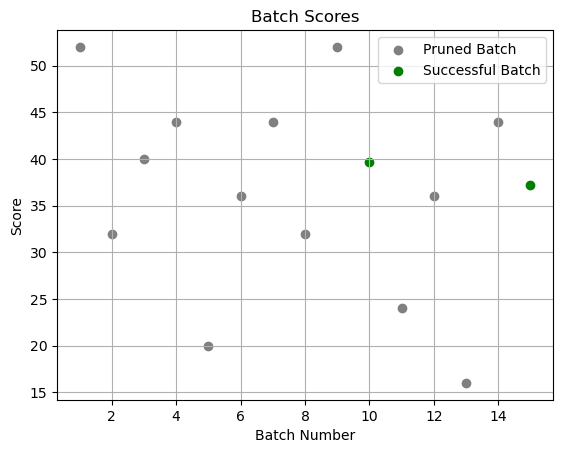

In [10]:
import matplotlib.pyplot as plt


trial_logs = optimized_program.trial_logs

trial_numbers = list(trial_logs.keys())
scores = [trial_logs[trial]["score"] for trial in trial_numbers]

full_eval = [trial_logs[trial]["full_eval"] for trial in trial_numbers]

for trial_number, score, pruned in zip(trial_numbers, scores, full_eval):
    if pruned is False:
        plt.scatter(
            trial_number,
            score,
            color="grey",
            label=(
                "Pruned Batch"
                if "Pruned Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )
    else:
        plt.scatter(
            trial_number,
            score,
            color="green",
            label=(
                "Successful Batch"
                if "Successful Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )

plt.xlabel("Batch Number")
plt.ylabel("Score")
plt.title("Batch Scores")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
best_score = 0
best_program_so_far = None


def get_signature(predictor):
    if hasattr(predictor, "extended_signature"):
        return predictor.extended_signature
    elif hasattr(predictor, "signature"):
        return predictor.signature


# print(f"Baseline program | Score: {best_score}:")
# for i, predictor in enumerate(WrapperEnglishSPT().predictors()):
#     print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
# print()

print("----------------")

for trial_num in optimized_program.trial_logs:
    program_score = optimized_program.trial_logs[trial_num]["score"]
    program_pruned = optimized_program.trial_logs[trial_num]["full_eval"]
    # if (
    #     program_score > best_score
    #     and program_pruned is True
    #     # and optimized_program.trial_logs[trial_num]["full_eval"]
    # ):
    if program_pruned is True:
        best_score = program_score
        best_program_so_far = optimized_program.trial_logs[trial_num]["program"]
    # if trial_num % 5 == 0:
    #     print(f"Best program after {trial_num} batches | Score: {best_score}:")
    #     for i, predictor in enumerate(best_program_so_far.predictors()):
    #         print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
    #     print()
    
        # print(f"Best program with best score: {best_score}")
        for i, predictor in enumerate(best_program_so_far.predictors()):
            print(f"Prompt {trial_num} Instruction: {get_signature(predictor).instructions}")
            print(best_score)
        print()

----------------
Prompt 10 Instruction: Pero también, les ha dado a los chinos un espacio público nacional para que —es como un curso de ciudadanía— se preparen para la futura democracia. Pero no ha cambiado el sistema político chino, y también el Gobierno central chino ha usado esta estructura de un servidor centralizado para fortalecer su poder para luchar contra el gobierno local y las diferentes facciones. ¿Cuál es el futuro?
Sentence 2: ¿Por qué? Porque esto haría necesario el criminalizar la corrupción de los diputados. En Alemania, tenemos un sistema dónde no tienes permitido sobornar a un servidor público, pero tienes permitido sobornar a un diputado. Esto está, bajo la ley Alemana, permitido. Y los miembros del parlamento no quieren cambiar esto, y es por esto que no pueden firmar la Convención de las Naciones Unidas contra el soborno en el extranjero, uno de los muy, muy pocos países que está predicando la honestidad y la buena gobernatura en todo el mundo, pero no es capaz d

In [12]:
program_spt_prompt_en_assertions.load(
    "compile-models/sp/es_spt_mipro_optimized_prompt_en_deepseek-q4"
)

In [13]:

custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_en_assertions,
    debug=True,
)

Evaluating: 900 examples
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  3


Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2


2025/04/21 08:50:53 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


2025/04/21 08:52:52 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1
Prediction:  1
Prediction:  2


2025/04/21 08:53:08 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:53:08 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:53:08 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1
Prediction:  0


Prediction:  1
Prediction:  4
Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1


2025/04/21 08:54:06 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:54:14 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  1


2025/04/21 08:56:14 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  4
Prediction:  2


2025/04/21 08:56:43 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:56:43 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  1


2025/04/21 08:58:15 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:58:21 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:58:26 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0
Prediction:  4
Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  1


2025/04/21 08:58:46 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 08:59:07 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  3
Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  1
Prediction:  2
Prediction:  1
Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  4


2025/04/21 09:01:56 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  4


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  3
Prediction:  1
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  4


2025/04/21 09:07:27 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  1


Prediction:  1
Prediction:  1
Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  2
Prediction:  4
Prediction:  3


2025/04/21 09:08:37 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:08:44 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:08:44 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0
Prediction:  4
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  2


2025/04/21 09:10:54 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:11:02 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:11:02 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0
Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  1


Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  1
Prediction:  1
Prediction:  3
Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  1


Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  4


2025/04/21 09:19:03 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  3


Prediction:  4


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  1
Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  4


2025/04/21 09:25:37 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:25:49 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


2025/04/21 09:25:55 INFO dspy.primitives.assertions: SuggestionFailed: The output shoulb be 1 or 2 or 3 or 4. Please revise accordingly.


Prediction:  0


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  4
Accurate examples: 358
Bad-formatted examples: 2
Accuracy: 39.86636971046771
